# Thyroid Disease Prediction Project

In [1]:
!pip install watermark
%load_ext watermark

In [2]:
%watermark -a "Mawero Rodney Garvin"

Author: Mawero Rodney Garvin



In [3]:
%watermark -gu "rodneymawero github profile:  https://github.com/rodneymawero"

Github username: rodneymawero github profile:  https://github.com/rodneymawero



In [4]:
%watermark -u -t -d

Last updated: 2024-01-28 19:37:41



Versions of modules and system information

In [5]:
%watermark -d -m -v -p pandas,numpy,matplotlib,seaborn,plotly,iterstrat,sklearn,catboost,xgboost,lightgbm,statsmodels,streamlit

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.15.0

pandas     : 2.1.4
numpy      : 1.23.5
matplotlib : 3.8.2
seaborn    : 0.12.2
plotly     : 5.9.0
iterstrat  : 0.1.6
sklearn    : 1.3.2
catboost   : 1.2.2
xgboost    : 1.7.3
lightgbm   : 3.3.5
statsmodels: 0.14.0
streamlit  : 1.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit



## 1.0 Introduction

The thyroid hormones are involved in important functions in the body. For example , the hormones control how the cells of the body use energy to sustain life (metabolism). The thyroid hormones also regulate body temperature, digestion, breathing and heart rate. These life processes speed up as thyroid hormone levels rise. But problems occur if the thyroid makes too much hormone(hyperthyrodism) or not enough (hypothyrodism) leading to thyroid disorders.

Goitre, for instance, can be caused by deficiency of iodine in the diet.  The body needs iodine to produce thyroid hormone. If you do not have enough iodine in your diet, the thyroid gets larger to try and capture all the iodine it can, so it can make the right amount of thyroid hormone. So, goitre can be a sign the thyroid is not able to make enough thyroid hormone. The use of iodized salt prevents iodine deficiency.

Thyroid problems are also often caused by autoimmune disorders, in which the immune system mistakenly attacks and destroys the body’s own cells. For example, an autoimmune disorder called Graves’ disease can cause the thyroid to be over-active, while one called Hashimoto’s disease can make the thyroid under-active.

Hypothyroidism is a condition where the thyroid gland is underactive and doesn't produce enough thyroid hormones. The primary hormones produced by the thyroid gland are Triiodothyronine (T3), Thyroxine (T4), and Thyroid-Stimulating Hormone (TSH). Testing the levels of these hormones in the body is important in determining whether one is hypothyroid or not.

### 1.1 Problem Statement

Hypothyrodism can be hard to diagnose. First, its symptoms are similar to other diseases. These include fatigue, losing weight,
fast heartbeat(tachycardia), irregular heartbeat (arrhythmia), enlarged thyroid gland, sometimes called a goiter, increased hunger, nervousness, changes in menstrual cycle, anxiety and irritability among others. https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284

Many patients mistakenly attribute syptoms to aging or other factors and unnecessarily delay treatment https://newsinhealth.nih.gov/2015/09/thinking-about-your-thyroid#:~:text=When%20thyroid%20glands%20don't,in%20people%20over%20age%2060.

Secondly, the disease can develop over months or even years, hence symptoms are often hard to pick up on. The objectives of this project is to build a machine learning model that will:
- 1. Predict whether a patient is hypothyroid or not,

- 2. Detemine the type of hypothyrodism based on clinical data.  

- 3. Deploy an app that will not only display the class, but the prediction probabilities for the given class.

### 1.2 Description of the Data


## Target
- hypothyroid, primary hypothyroid, compensated hypothyroid, secondary hypothyroid,
 negative.			|  classes -------------------- 5 Target Values

 __________________________________________________________________________________________

## Features
- age:				continuous. (numerical)
- sex:				M, F.
  on thyroxine:			f, t.
- query on thyroxine:		f, t.
- on antithyroid medication:	f, t.
- sick:				f, t.
- pregnant:			f, t.
- thyroid surgery:		f, t.
- I131 treatment:			f, t. --- Iodine 131 radioisotope treatment
- query hypothyroid:		f, t.
- query hyperthyroid:		f, t.
- lithium:			f, t.------------ Drugs used for some conditions such as psychiatric
- goitre:				f, t.
- tumor:				f, t.
- hypopituitary:			f, t.
- psych:				f, t.-------- Psychiatric condition (true, false)
___________________________________________________________________________________________

## Features cont'd: thyroid hormone measurements

#### measured: categorical
#### continuous numerical
- TSH measured:			f, t.
- TSH:				continuous.
- T3 measured:			f, t.
- T3:				continuous.
- TT4 measured:			f, t.
- TT4:				continuous.
- T4U measured:			f, t.
- T4U:				continuous.
- FTI measured:			f, t.
- FTI:				continuous.
- TBG measured:			f, t.
- TBG:				continuous.
- referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

Acronyms
- TSH: Thyroid-Stimulating Hormone
- T3: Triiodothyronine
- TT4: Total Thyroxine (Total T4)
- T4U: Thyroxine Uptake
- FTI: Free Thyroxine Index
- TBG: Thyroxine-Binding Globulin

These are essential thyroid hormone-related measurements that help in the diagnosis and management of thyroid disorders, including hypothyroidism.
---------------------------------------------------------------------------------------------------------------------------


- f, t = false , true
- ? - missing data

In [6]:
# Importing Libraries and Modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install catboost
!pip install iterative-stratification
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, classification_report, confusion_matrix, RocCurveDisplay,  hamming_loss, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from random import randint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

import time

import pickle


#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =100
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] =(6, 4)
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

You can download the thyroid dataset from UCI machinelearning repository https://archive.ics.uci.edu/dataset/102/thyroid+disease

In [7]:
# Loading hypothyroid dataset
train = pd.read_csv('allhypo.data',  sep=',')

train

41  F  f f.1 f.2 f.3 f.4 f.5 f.6 f.7 f.8 f.9 f.10 f.11 f.12 f.13  t  \
0     23  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
1     46  M  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
2     70  F  t   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
3     70  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
4     18  F  t   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
...   .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ... ..   
2794  70  M  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
2795  73  M  f   t   f   f   f   f   f   f   f   f    f    f    f    f  f   
2796  75  M  f   f   f   f   f   f   f   f   t   f    f    f    f    f  f   
2797  60  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   
2798  81  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f  t   

       1.3 t.1  2.5 t.2  125 t.3  1.14 t.4  109 f.14  ?   SVHC  negative.|3733  
0      4.1   t    2   t  102   f     ?   f    ?    f  ?  other  negative.|1442  
1     0.98   f    ?   t  109   t  0.91   t  120    f  ?  other  negative.|2965  
2     0.16   t  1.9   t  175   f     ?   f    ?    f  ?  other   negative.|806  
3     0.72   t  1.2   t   61   t  0.87   t   70    f  ?    SVI  negative.|2807  
4     0.03   f    ?   t  183   t   1.3   t  141    f  ?  other  negative.|3434  
...    ...  ..  ...  ..  ...  ..   ...  ..  ...  ... ..    ...             ...  
2794   2.7   f    ?   t  155   t  1.05   t  148    f  ?    SVI  negative.|3689  
2795     ?   t  0.7   t   63   t  0.88   t   72    f  ?  other  negative.|3652  
2796     ?   f    ?   t  147   t   0.8   t  183    f  ?  other  negative.|1287  
2797   1.4   f    ?   t  100   t  0.83   t  121    f  ?  other  negative.|3496  
2798   1.2   t  1.5   t  114   t  0.99   t  115    f  ?    SVI   negative.|724  

[2799 rows x 30 columns]

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
# loading the test data
test = pd.read_csv('allhypo.test', delimiter=',')

test

35  F  f f.1 f.2 f.3 f.4 f.5 f.6 f.7 f.8 f.9 f.10 f.11 f.12 f.13 f.14  \
0    63  M  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   
1    25  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   
2    53  F  f   f   f   f   f   f   f   t   f   f    f    f    f    f    t   
3    92  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   
4    67  M  f   f   f   f   f   f   f   t   f   f    f    f    f    f    t   
..   .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
966  30  F  f   f   f   f   f   f   f   f   f   f    f    t    f    f    f   
967  68  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   
968  74  F  f   f   f   f   f   f   f   f   t   f    f    f    f    f    t   
969  72  M  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   
970  64  F  f   f   f   f   f   f   f   f   f   f    f    f    f    f    t   

        ? f.15  ?.1 f.16  ?.2 f.17   ?.3 f.18  ?.4 f.19 ?.5  other  \
0     3.5    t  2.5    t  108    t  0.96    t  113    f   ?    SVI   
1     4.6    t  2.4    t   61    t  0.82    t   75    f   ?   SVHD   
2    0.25    t  2.1    t  145    t  1.03    t  141    f   ?  other   
3     0.7    t  1.3    t  120    t  0.84    t  143    f   ?    SVI   
4    0.81    f    ?    t   84    t  0.83    t  101    f   ?  other   
..    ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ..    ...   
966     ?    f    ?    f    ?    f     ?    f    ?    f   ?  other   
967     1    t  2.1    t  124    t  1.08    t  114    f   ?    SVI   
968   5.1    t  1.8    t  112    t  1.07    t  105    f   ?  other   
969   0.7    t    2    t   82    t  0.94    t   87    f   ?    SVI   
970     1    t  2.2    t   99    t  1.07    t   92    f   ?  other   

      negative.|219  
0    negative.|2059  
1     negative.|399  
2    negative.|1911  
3     negative.|487  
4    negative.|1234  
..              ...  
966  negative.|2924  
967   negative.|974  
968  negative.|1493  
969   negative.|252  
970  negative.|2008  

[971 rows x 30 columns]

In [10]:
# loading name dataframe
column_names = pd.read_csv('allhypo.names', delimiter=";")

column_names

Unnamed: 0  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5   hypothyroid, primary hypothyroid, compensated ...   
6                              secondary hypothyroid,   
7                           negative.\t\t\t|  classes   
8                             age:\t\t\t\tcontinuous.   
9                                   sex:\t\t\t\tM, F.   
10                           on thyroxine:\t\t\tf, t.   
11                       query on thyroxine:\t\tf, t.   
12                  on antithyroid medication:\tf, t.   
13                                 sick:\t\t\t\tf, t.   
14                               pregnant:\t\t\tf, t.   
15                          thyroid surgery:\t\tf, t.   
16                         I131 treatment:\t\t\tf, t.   
17                        query hypothyroid:\t\tf, t.   
18                       query hyperthyroid:\t\tf, t.   
19                                lithium:\t\t\tf, t.   
20                               goitre:\t\t\t\tf, t.   
21                                tumor:\t\t\t\tf, t.   
22                          hypopituitary:\t\t\tf, t.   
23                                psych:\t\t\t\tf, t.   
24                           TSH measured:\t\t\tf, t.   
25                            TSH:\t\t\t\tcontinuous.   
26                            T3 measured:\t\t\tf, t.   
27                             T3:\t\t\t\tcontinuous.   
28                           TT4 measured:\t\t\tf, t.   
29                            TT4:\t\t\t\tcontinuous.   
30                           T4U measured:\t\t\tf, t.   
31                            T4U:\t\t\t\tcontinuous.   
32                           FTI measured:\t\t\tf, t.   
33                            FTI:\t\t\t\tcontinuous.   
34                           TBG measured:\t\t\tf, t.   
35                            TBG:\t\t\t\tcontinuous.   
36  referral source:\t\tWEST, STMW, SVHC, SVI, SVH...   

                                           Unnamed: 1  
0    Thyroid disease records supplied by the Garav...  
1    Quinlan, New South Wales Institute, Syndney, ...  
2                                                 NaN  
3                                               1987.  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20                                                NaN  
21                                                NaN  
22                                                NaN  
23                                                NaN  
24                                                NaN  
25                                                NaN  
26                                                NaN  
27                                                NaN  
28                                                NaN  
29                                                NaN  
30                                                NaN  
31                                                NaN  
32                          

## 1.3 Understanding the Data

In [11]:
# Shape of the train data
train.shape

(2799, 30)

In [12]:
# checking column data types
train.dtypes

41                object
F                 object
f                 object
f.1               object
f.2               object
f.3               object
f.4               object
f.5               object
f.6               object
f.7               object
f.8               object
f.9               object
f.10              object
f.11              object
f.12              object
f.13              object
t                 object
1.3               object
t.1               object
2.5               object
t.2               object
125               object
t.3               object
1.14              object
t.4               object
109               object
f.14              object
?                 object
SVHC              object
negative.|3733    object
dtype: object

In [13]:
test.dtypes

35                int64
F                object
f                object
f.1              object
f.2              object
f.3              object
f.4              object
f.5              object
f.6              object
f.7              object
f.8              object
f.9              object
f.10             object
f.11             object
f.12             object
f.13             object
f.14             object
?                object
f.15             object
?.1              object
f.16             object
?.2              object
f.17             object
?.3              object
f.18             object
?.4              object
f.19             object
?.5              object
other            object
negative.|219    object
dtype: object

Numerical column dtypes are object types. Strings if present must be removed

In [14]:
# Checking the columns of the train dataset
train.columns # target is in the last col


Index(['41', 'F', 'f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6', 'f.7', 'f.8',
       'f.9', 'f.10', 'f.11', 'f.12', 'f.13', 't', '1.3', 't.1', '2.5', 't.2',
       '125', 't.3', '1.14', 't.4', '109', 'f.14', '?', 'SVHC',
       'negative.|3733'],
      dtype='object')

The column details are in allhypo.names. Column name data will be extracted and mapped to the train and test data.

In [15]:
# selecting relevant column from dataframe
column_names['Unnamed: 0']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5     hypothyroid, primary hypothyroid, compensated ...
6                                secondary hypothyroid,
7                             negative.\t\t\t|  classes
8                               age:\t\t\t\tcontinuous.
9                                     sex:\t\t\t\tM, F.
10                             on thyroxine:\t\t\tf, t.
11                         query on thyroxine:\t\tf, t.
12                    on antithyroid medication:\tf, t.
13                                   sick:\t\t\t\tf, t.
14                                 pregnant:\t\t\tf, t.
15                            thyroid surgery:\t\tf, t.
16                           I131 treatment:\t\t\tf, t.
17                          query hypothyroid:\t

In [16]:
test.columns

Index(['35', 'F', 'f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6', 'f.7', 'f.8',
       'f.9', 'f.10', 'f.11', 'f.12', 'f.13', 'f.14', '?', 'f.15', '?.1',
       'f.16', '?.2', 'f.17', '?.3', 'f.18', '?.4', 'f.19', '?.5', 'other',
       'negative.|219'],
      dtype='object')

Feature columns will be mapped first

In [17]:
# creating dictionary to rename columns
train_dict = {'41': 'age', 'F': 'sex', 'f': 'on thyroxine', 'f.1': 'query on thyroxine', 'f.2': 'on antithyroid medication', 'f.3': 'sick', 'f.4': 'pregnant', 'f.5': 'thyroid surgery', 'f.6': 'I131 treatment', 'f.7': 'query hypothyroid', 'f.8': 'query hyperthyroid', 'f.9': 'lithium', 'f.10': 'goitre', 'f.11': 'tumor', 'f.12': 'hypopituitary', 'f.13': 'psych', 't': 'TSH measured', '1.3': 'TSH', 't.1': 'T3 measured', '2.5': 'T3', 't.2': 'TT4 measured', '125': 'TT4', 't.3': 'T4U measured', '1.14': 'T4U', 't.4': 'FTI measured', '109': 'FTI', 'f.14': 'TBG measured', '?': 'TBG', 'SVHC': 'referral source'}

In [18]:
test_dict = {'35': 'age', 'F': 'sex', 'f': 'on thyroxine', 'f.1': 'query on thyroxine', 'f.2': 'on antithyroid medication', 'f.3': 'sick', 'f.4': 'pregnant', 'f.5': 'thyroid surgery', 'f.6': 'I131 treatment', 'f.7': 'query hypothyroid', 'f.8': 'query hyperthyroid', 'f.9': 'lithium', 'f.10': 'goitre', 'f.11': 'tumor', 'f.12': 'hypopituitary', 'f.13': 'psych', 'f.14': 'TSH measured', '?': 'TSH', 'f.15': 'T3 measured', '?.1': 'T3', 'f.16': 'TT4 measured', '?.2': 'TT4', 'f.17': 'T4U measured', '?.3': 'T4U', 'f.18': 'FTI measured', '?.4': 'FTI', 'f.19': 'TBG measured', '?.5': 'TBG', 'other': 'referral source' }

In [19]:
# renaming the columns
train = train.rename(columns=train_dict)
train

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     23   F            f                  f                         f    f   
1     46   M            f                  f                         f    f   
2     70   F            t                  f                         f    f   
3     70   F            f                  f                         f    f   
4     18   F            t                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
2794  70   M            f                  f                         f    f   
2795  73   M            f                  t                         f    f   
2796  75   M            f                  f                         f    f   
2797  60   F            f                  f                         f    f   
2798  81   F            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  \
0           f               f              f                 f   
1           f               f              f                 f   
2           f               f              f                 f   
3           f               f              f                 f   
4           f               f              f                 f   
...       ...             ...            ...               ...   
2794        f               f              f                 f   
2795        f               f              f                 f   
2796        f               f              f                 f   
2797        f               f              f                 f   
2798        f               f              f                 f   

     query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                     f       f      f     f             f     f            t   
1                     f       f      f     f             f     f            t   
2                     f       f      f     f             f     f            t   
3                     f       f      f     f             f     f            t   
4                     f       f      f     f             f     f            t   
...                 ...     ...    ...   ...           ...   ...          ...   
2794                  f       f      f     f             f     f            t   
2795                  f       f      f     f             f     f            f   
2796                  t       f      f     f             f     f            f   
2797                  f       f      f     f             f     f            t   
2798                  f       f      f     f             f     f            t   

       TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  \
0      4.1           t    2            t  102            f     ?            f   
1     0.98           f    ?            t  109            t  0.91            t   
2     0.16           t  1.9            t  175            f     ?            f   
3     0.72           t  1.2            t   61            t  0.87            t   
4     0.03           f    ?            t  183            t   1.3            t   
...    ...         ...  ...          ...  ...          ...   ...          ...   
2794   2.7           f    ?            t  155            t  1.05            t   
2795     ?           t  0.7            t   63            t  0.88            t   
2796     ?           f    ?            t  147            t   0.8            t   
2797   1.4           f    ?            t  100            t  0.83            t   
2798   1.2           t  1.5            t  114            t  0.99            t   

      FTI TBG measured TBG referral source  negative.|3733  
0       ?            f   ?           other  negative.|1442  
1     120            f   ?           other  negative.|2965  
2       ?            f   ?           other   negative.|806  
3      70            f   ?             SVI  negative.|2807  
4     141   

In [20]:
test = test.rename(columns=test_dict)
test

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     63   M            f                  f                         f    f   
1     25   F            f                  f                         f    f   
2     53   F            f                  f                         f    f   
3     92   F            f                  f                         f    f   
4     67   M            f                  f                         f    f   
..   ...  ..          ...                ...                       ...  ...   
966   30   F            f                  f                         f    f   
967   68   F            f                  f                         f    f   
968   74   F            f                  f                         f    f   
969   72   M            f                  f                         f    f   
970   64   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
0          f               f              f                 f   
1          f               f              f                 f   
2          f               f              f                 t   
3          f               f              f                 f   
4          f               f              f                 t   
..       ...             ...            ...               ...   
966        f               f              f                 f   
967        f               f              f                 f   
968        f               f              f                 f   
969        f               f              f                 f   
970        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                    f       f      f     f             f     f            t   
1                    f       f      f     f             f     f            t   
2                    f       f      f     f             f     f            t   
3                    f       f      f     f             f     f            t   
4                    f       f      f     f             f     f            t   
..                 ...     ...    ...   ...           ...   ...          ...   
966                  f       f      f     t             f     f            f   
967                  f       f      f     f             f     f            t   
968                  t       f      f     f             f     f            t   
969                  f       f      f     f             f     f            t   
970                  f       f      f     f             f     f            t   

      TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  \
0     3.5           t  2.5            t  108            t  0.96            t   
1     4.6           t  2.4            t   61            t  0.82            t   
2    0.25           t  2.1            t  145            t  1.03            t   
3     0.7           t  1.3            t  120            t  0.84            t   
4    0.81           f    ?            t   84            t  0.83            t   
..    ...         ...  ...          ...  ...          ...   ...          ...   
966     ?           f    ?            f    ?            f     ?            f   
967     1           t  2.1            t  124            t  1.08            t   
968   5.1           t  1.8            t  112            t  1.07            t   
969   0.7           t    2            t   82            t  0.94            t   
970     1           t  2.2            t   99            t  1.07            t   

     FTI TBG measured TBG referral source   negative.|219  
0    113            f   ?             SVI  negative.|2059  
1     75            f   ?            SVHD   negative.|399  
2    141            f   ?           other  negative.|1911  
3    143            f   ?             SVI   negative.|487  
4    101            f   ?           other  negative.|

Renaming target columns, creating id column

In [21]:
# Creating target column and id_no column by splitting the class values from the "id"no
train[['target', 'id_no']] = train["negative.|3733"].str.split(r'\.\|', n=1, expand=True)

train

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     23   F            f                  f                         f    f   
1     46   M            f                  f                         f    f   
2     70   F            t                  f                         f    f   
3     70   F            f                  f                         f    f   
4     18   F            t                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
2794  70   M            f                  f                         f    f   
2795  73   M            f                  t                         f    f   
2796  75   M            f                  f                         f    f   
2797  60   F            f                  f                         f    f   
2798  81   F            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  \
0           f               f              f                 f   
1           f               f              f                 f   
2           f               f              f                 f   
3           f               f              f                 f   
4           f               f              f                 f   
...       ...             ...            ...               ...   
2794        f               f              f                 f   
2795        f               f              f                 f   
2796        f               f              f                 f   
2797        f               f              f                 f   
2798        f               f              f                 f   

     query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                     f       f      f     f             f     f            t   
1                     f       f      f     f             f     f            t   
2                     f       f      f     f             f     f            t   
3                     f       f      f     f             f     f            t   
4                     f       f      f     f             f     f            t   
...                 ...     ...    ...   ...           ...   ...          ...   
2794                  f       f      f     f             f     f            t   
2795                  f       f      f     f             f     f            f   
2796                  t       f      f     f             f     f            f   
2797                  f       f      f     f             f     f            t   
2798                  f       f      f     f             f     f            t   

       TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  \
0      4.1           t    2            t  102            f     ?            f   
1     0.98           f    ?            t  109            t  0.91            t   
2     0.16           t  1.9            t  175            f     ?            f   
3     0.72           t  1.2            t   61            t  0.87            t   
4     0.03           f    ?            t  183            t   1.3            t   
...    ...         ...  ...          ...  ...          ...   ...          ...   
2794   2.7           f    ?            t  155            t  1.05            t   
2795     ?           t  0.7            t   63            t  0.88            t   
2796     ?           f    ?            t  147            t   0.8            t   
2797   1.4           f    ?            t  100            t  0.83            t   
2798   1.2           t  1.5            t  114            t  0.99            t   

      FTI TBG measured TBG referral source  negative.|3733    target id_no  
0       ?            f   ?           other  negative.|1442  negative  1442  
1     120            f   ?           other  negative.|2965  negative  2965  
2       ?            f   ?           other   negative.|806  negative   806  
3      70

In [22]:
# Creating target column and id_no column by splitting the class values from the "id"no

test[['target', 'id_no']] = test["negative.|219"].str.split(r'\.\|', n=1, expand=True)

test

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     63   M            f                  f                         f    f   
1     25   F            f                  f                         f    f   
2     53   F            f                  f                         f    f   
3     92   F            f                  f                         f    f   
4     67   M            f                  f                         f    f   
..   ...  ..          ...                ...                       ...  ...   
966   30   F            f                  f                         f    f   
967   68   F            f                  f                         f    f   
968   74   F            f                  f                         f    f   
969   72   M            f                  f                         f    f   
970   64   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
0          f               f              f                 f   
1          f               f              f                 f   
2          f               f              f                 t   
3          f               f              f                 f   
4          f               f              f                 t   
..       ...             ...            ...               ...   
966        f               f              f                 f   
967        f               f              f                 f   
968        f               f              f                 f   
969        f               f              f                 f   
970        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                    f       f      f     f             f     f            t   
1                    f       f      f     f             f     f            t   
2                    f       f      f     f             f     f            t   
3                    f       f      f     f             f     f            t   
4                    f       f      f     f             f     f            t   
..                 ...     ...    ...   ...           ...   ...          ...   
966                  f       f      f     t             f     f            f   
967                  f       f      f     f             f     f            t   
968                  t       f      f     f             f     f            t   
969                  f       f      f     f             f     f            t   
970                  f       f      f     f             f     f            t   

      TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  \
0     3.5           t  2.5            t  108            t  0.96            t   
1     4.6           t  2.4            t   61            t  0.82            t   
2    0.25           t  2.1            t  145            t  1.03            t   
3     0.7           t  1.3            t  120            t  0.84            t   
4    0.81           f    ?            t   84            t  0.83            t   
..    ...         ...  ...          ...  ...          ...   ...          ...   
966     ?           f    ?            f    ?            f     ?            f   
967     1           t  2.1            t  124            t  1.08            t   
968   5.1           t  1.8            t  112            t  1.07            t   
969   0.7           t    2            t   82            t  0.94            t   
970     1           t  2.2            t   99            t  1.07            t   

     FTI TBG measured TBG referral source   negative.|219    target id_no  
0    113            f   ?             SVI  negative.|2059  negative  2059  
1     75            f   ?            SVHD   negative.|399  negative   399  
2    141            f   ?           other  negative.|1911  negative  1911  
3    143            f   ?             SVI   negat

In [23]:
train.id_no.nunique(), train.shape # all ids are unique

(2799, (2799, 32))

In [24]:
test.id_no.nunique(), test.shape # all ids are unique

(971, (971, 32))

- There are strings after the target classes. They will be removed.

In [25]:
train.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [26]:
test.dtypes

age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [27]:
num_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'] # age is correct dtype

In [28]:
train[num_cols]

TSH   T3  TT4   T4U  FTI TBG
0      4.1    2  102     ?    ?   ?
1     0.98    ?  109  0.91  120   ?
2     0.16  1.9  175     ?    ?   ?
3     0.72  1.2   61  0.87   70   ?
4     0.03    ?  183   1.3  141   ?
...    ...  ...  ...   ...  ...  ..
2794   2.7    ?  155  1.05  148   ?
2795     ?  0.7   63  0.88   72   ?
2796     ?    ?  147   0.8  183   ?
2797   1.4    ?  100  0.83  121   ?
2798   1.2  1.5  114  0.99  115   ?

[2799 rows x 6 columns]

In [29]:
test[num_cols]

TSH   T3  TT4   T4U  FTI TBG
0     3.5  2.5  108  0.96  113   ?
1     4.6  2.4   61  0.82   75   ?
2    0.25  2.1  145  1.03  141   ?
3     0.7  1.3  120  0.84  143   ?
4    0.81    ?   84  0.83  101   ?
..    ...  ...  ...   ...  ...  ..
966     ?    ?    ?     ?    ?   ?
967     1  2.1  124  1.08  114   ?
968   5.1  1.8  112  1.07  105   ?
969   0.7    2   82  0.94   87   ?
970     1  2.2   99  1.07   92   ?

[971 rows x 6 columns]

## Understanding the target variable

In [30]:
train.target.unique() # train classes

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [31]:
test.target.unique() # test data does not have secondary hypothyroid class

array(['negative', 'compensated hypothyroid', 'primary hypothyroid'],
      dtype=object)

In [32]:
train.target.value_counts() # imbalanced

target
negative                   2579
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: count, dtype: int64

In [33]:
# Showing proportions of value counts
print(train.target.value_counts(normalize=True))

target
negative                  0.92
compensated hypothyroid   0.06
primary hypothyroid       0.02
secondary hypothyroid     0.00
Name: proportion, dtype: float64


<Axes: ylabel='target'>

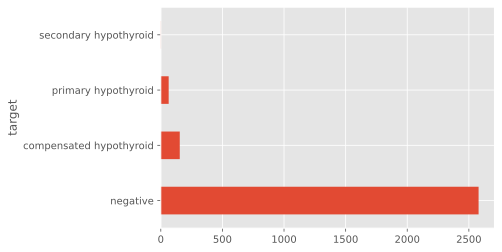

In [34]:
train.target.value_counts().plot(kind='barh')

In [35]:
test.target.value_counts()

target
negative                   900
compensated hypothyroid     40
primary hypothyroid         31
Name: count, dtype: int64

In [36]:
# Showing proportions of value counts
print(test.target.value_counts(normalize=True))

target
negative                  0.93
compensated hypothyroid   0.04
primary hypothyroid       0.03
Name: proportion, dtype: float64


<Axes: ylabel='target'>

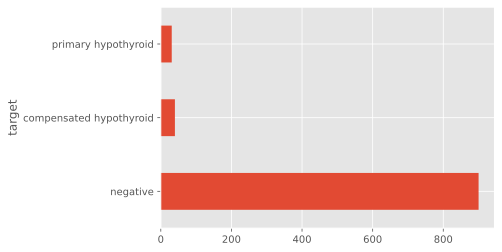

In [37]:
test.target.value_counts().plot(kind='barh')

- ### The targets of both train and test data are highly imbalanced, with over 8 and 7 percent respectively being hypothyroid positive cases

- ### The train data has 4 target classes, to the test data 3 target classes. Secondary hypothyroid class is absent in the test data.

- ### Techniques such as Synthetic Minority Over-sampling TEchnique (SMOTE) will be used to balance the classes. SMOTE is a technique to up-sample the minority classes while avoiding overfitting. It does this by generating new synthetic examples close to the other points (belonging to the minority class) in the  feature space.
https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c#:~:text=SMOTE%20is%20a%20technique%20to,minority%20class)%20in%20feature%20space. 

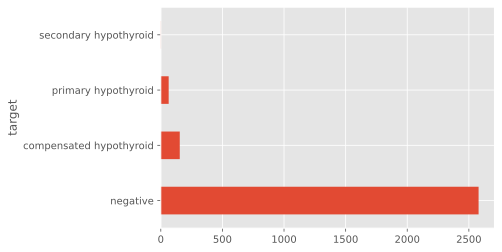

In [38]:
train.target.value_counts().plot(kind='barh')
plt.rcParams['figure.figsize'] = (6, 4)

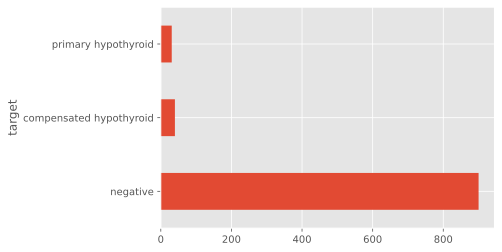

In [39]:
test.target.value_counts().plot(kind='barh')
plt.rcParams['figure.figsize'] = (6, 4)

### Creating 2 dataframes for the target values

In [40]:
# creating 2 dataframes for each target value
hypo_no = train[train.target == 'negative']
hypo_yes = train[train.target != 'negative'] # contains all positive classes

In [41]:
hypo_no['target'].value_counts()

target
negative    2579
Name: count, dtype: int64

In [42]:
hypo_yes['target'].value_counts()

target
compensated hypothyroid    154
primary hypothyroid         64
secondary hypothyroid        2
Name: count, dtype: int64

- ### 220 hypothyroid positive cases in the train data
- ### Compensated hypothyroid class has the highest number of positive cases followed by primary hypothyroid class.
- ### Secondary hypothyroid class only has two cases


#### Doing the same for the test data

In [43]:
# creating 2 dataframes for each target value
hypo_no_test = test[test.target == 'negative']
hypo_yes_test = test[test.target != 'negative']

In [44]:
hypo_no_test['target'].value_counts()

target
negative    900
Name: count, dtype: int64

In [45]:
hypo_yes_test['target'].value_counts()

target
compensated hypothyroid    40
primary hypothyroid        31
Name: count, dtype: int64

- ### 71 total cases of hypothyrodism in the test data
- ### Compensated hypothyroid class has the highest number of cases, followed by primary hypothyroid

### ***** Since the secondary hypothyroid class has only two instances in the training data, and is absent in the the test data, it will be $\color{red}{\text{dropped}}$ .

## Understanding feature columns

The major risk factors for hypothyroidism include the following:https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284

- Gender - women more affected than males
- A family history of thyroid disease.
- An autoimmune disease, such as type 1 diabetes or celiac disease.
- Have received treatment for **hyperthyroidism** (thyroid produces **too much** thyroid hormones).
- Received radiation to your neck or upper chest.
- Have had thyroid surgery.
- Medicine such as lithium, used to treat some psychiatric conditions
- Pregnancy

'age': The age of the individual in years.

'sex': The biological sex of the individual (male or female).

'on thyroxine': Whether the individual is currently taking thyroxine medication.

'query on thyroxine': Whether there is a query about being on thyroxine medication.

'on antithyroid medication': Whether the individual is currently taking medication that counters the effects of an overactive thyroid.

'sick': Whether the individual is currently sick.

'pregnant': Whether the individual is currently pregnant.

'thyroid surgery': Whether the individual has undergone thyroid surgery.

'I131 treatment': Whether the individual has undergone treatment with radioactive iodine (I131) for thyroid-related issues.

'query hypothyroid': Whether there is a query about having hypothyroidism (underactive thyroid).

'query hyperthyroid': Whether there is a query about having hyperthyroidism (overactive thyroid).

'lithium': Whether the individual is taking lithium medication.

'goitre': Whether the individual has a goiter, an enlarged thyroid gland.

'tumor': Whether the individual has a thyroid tumor.

'hypopituitary': Whether the individual has a condition involving reduced pituitary gland function.

'psych': Whether the individual has psychological or psychiatric conditions.

'TSH measured': Whether the Thyroid Stimulating Hormone (TSH) level has been measured.

'TSH': The actual level of Thyroid Stimulating Hormone (TSH) in the blood.

'T3 measured': Whether the Triiodothyronine (T3) level has been measured.

'T3': The actual level of Triiodothyronine (T3) in the blood.

'TT4 measured': Whether the Total Thyroxine (TT4) level has been measured.

### Undestanding Sex Variable

#### Train

In [46]:
train['sex'].value_counts()

sex
F    1829
M     860
?     110
Name: count, dtype: int64

- There are 110 missing values (filled with ?)

<Axes: ylabel='sex'>

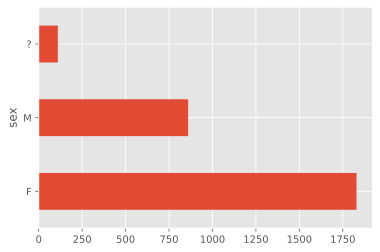

In [47]:
train['sex'].value_counts().plot(kind='barh')

In [48]:
hypo_yes['sex'].value_counts()

sex
F    158
M     53
?      9
Name: count, dtype: int64

In [49]:
hypo_yes['sex'].value_counts(normalize=True)

sex
F   0.72
M   0.24
?   0.04
Name: proportion, dtype: float64

Breaking down the hypothyroid positive cases by sex and the disease classification

<Axes: ylabel='sex'>

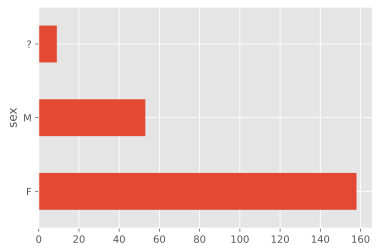

In [50]:
hypo_yes['sex'].value_counts().plot(kind='barh')

In [51]:
hypo_yes_by_sex = hypo_yes.groupby(['sex'])['target'].value_counts()

hypo_yes_by_sex

sex  target                 
?    compensated hypothyroid      5
     primary hypothyroid          4
F    compensated hypothyroid    111
     primary hypothyroid         46
     secondary hypothyroid        1
M    compensated hypothyroid     38
     primary hypothyroid         14
     secondary hypothyroid        1
Name: count, dtype: int64

<Axes: ylabel='sex,target'>

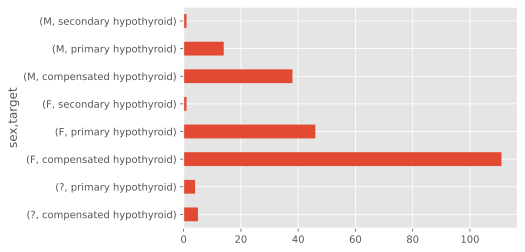

In [52]:
hypo_yes_by_sex.plot(kind='barh')

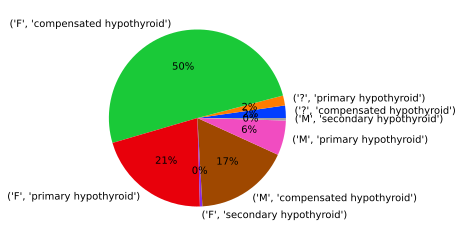

In [53]:
palette_color = sns.color_palette('bright')
plt.pie(hypo_yes_by_sex, labels=np.array(hypo_yes_by_sex.index), colors=palette_color, autopct='%.0f%%')
plt.show()

- ### 158 females account for 72 % of all the hypothyroid cases, males 24 % while 4% sex data was missing
- ### Compensated hypothyrodism has the highest number of cases, followed by primary hypothyrodism in both sexes.
- ### Sex is a major factor from the data. More females compared to males are affected

In [54]:
hypo_no['sex'].value_counts()

sex
F    1671
M     807
?     101
Name: count, dtype: int64

#### Test

In [55]:
hypo_yes_test['sex'].value_counts()

sex
F    57
M    12
?     2
Name: count, dtype: int64

In [56]:
hypo_yes_test['sex'].value_counts(normalize=True)

sex
F   0.80
M   0.17
?   0.03
Name: proportion, dtype: float64

<Axes: ylabel='sex'>

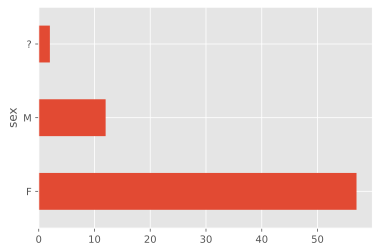

In [57]:
hypo_yes_test['sex'].value_counts().plot(kind ='barh')

In [58]:
hypo_yesTest_by_sex = hypo_yes_test.groupby(['sex'])['target'].value_counts()

hypo_yesTest_by_sex

sex  target                 
?    compensated hypothyroid     2
F    compensated hypothyroid    34
     primary hypothyroid        23
M    primary hypothyroid         8
     compensated hypothyroid     4
Name: count, dtype: int64

<Axes: ylabel='sex,target'>

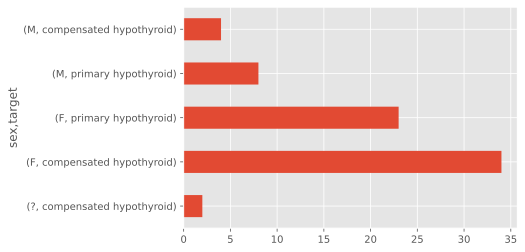

In [59]:
hypo_yesTest_by_sex.plot(kind='barh')

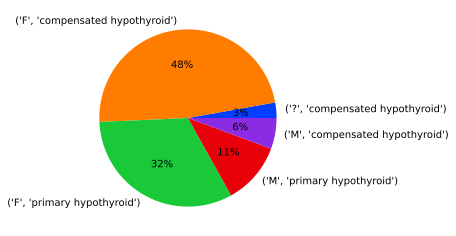

In [60]:
palette_color = sns.color_palette('bright')
plt.pie(hypo_yesTest_by_sex, labels=np.array(hypo_yesTest_by_sex.index), colors=palette_color, autopct='%.0f%%')
plt.show()

- ### In the test data, compensated hypothyroid cases(34) are more than primary hypothyroid cases(23) in females.
- ### In the males, Primary hypothyroid had more cases (8) than compensated hypothyroid (4)

## Undestanding query hypothyroid

#### Train

In [61]:
train['query hypothyroid'].value_counts()

query hypothyroid
f    2636
t     163
Name: count, dtype: int64

- ### 163 people suspected to be hypothyroid

In [62]:
hypo_yes['query hypothyroid'].value_counts()

query hypothyroid
f    194
t     26
Name: count, dtype: int64

- ### 26 people suspected to be hypothyroid are hypothyroid positive

Breaking down query hypothyroid by groupby into the different target classes

In [63]:
hypo_yes_qry_po = hypo_yes.groupby(['query hypothyroid'])['target'].value_counts()

hypo_yes_qry_po

query hypothyroid  target                 
f                  compensated hypothyroid    134
                   primary hypothyroid         59
                   secondary hypothyroid        1
t                  compensated hypothyroid     20
                   primary hypothyroid          5
                   secondary hypothyroid        1
Name: count, dtype: int64

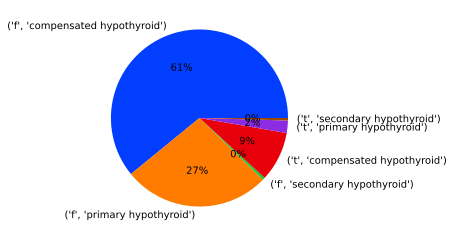

In [64]:
palette_color = sns.color_palette('bright')
plt.pie(hypo_yes_qry_po, labels=np.array(hypo_yes_qry_po.index), colors=palette_color, autopct='%.0f%%')
plt.show()

- ###  The 26 cases(query hypothyroid) are broken down as follows: 20 cases of compensated hypothyroidism, 5 cases of primary hypothyroidism, and One case of secondary hypothyroidism.

In [65]:
hypo_no['query hypothyroid'].value_counts()

query hypothyroid
f    2442
t     137
Name: count, dtype: int64

- ### 137 people suspected to be hypothyroid are actually hypothyroid negative

#### Test

In [66]:
test['query hypothyroid'].value_counts()

query hypothyroid
f    900
t     71
Name: count, dtype: int64

- ### 71 people suspected to be hypothyroid

In [67]:
hypo_yes_test['query hypothyroid'].value_counts()

query hypothyroid
f    58
t    13
Name: count, dtype: int64

- ### 13 people suspected to be hypothyroid confirmed to be hypothyroid positive - test data

In [68]:
hypo_no_test['query hypothyroid'].value_counts()

query hypothyroid
f    842
t     58
Name: count, dtype: int64

- ### 58 suspected hypothyroid cases are actually hypothyroid negative cases

## Undestanding on thyroxine variable

#### Train

In [69]:
train['on thyroxine'].value_counts()

on thyroxine
f    2469
t     330
Name: count, dtype: int64

In [70]:
hypo_yes['on thyroxine'].value_counts()

on thyroxine
f    215
t      5
Name: count, dtype: int64

- ### Only 5 people on thyroxine medication are actually hypothyroid

In [71]:
hypo_no['on thyroxine'].value_counts()

on thyroxine
f    2254
t     325
Name: count, dtype: int64

- ### It is inferred that 325 people on thyroxine are being treated for other conditions and not hypothyrodism

#### Test

In [72]:
test['on thyroxine'].value_counts()

on thyroxine
f    837
t    134
Name: count, dtype: int64

In [73]:
hypo_yes_test['on thyroxine'].value_counts()

on thyroxine
f    67
t     4
Name: count, dtype: int64

- ### Only 4 people on thyroxine are hypothyroid in the test data

In [74]:
hypo_no_test['on thyroxine'].value_counts()

on thyroxine
f    770
t    130
Name: count, dtype: int64

- ### It is also inferred that 130 people on thyroxine in the test data are being treated for other ailments

In [75]:
hypo_yes['query on thyroxine'].value_counts()

query on thyroxine
f    217
t      3
Name: count, dtype: int64

In [76]:
hypo_no['query on thyroxine'].value_counts()

query on thyroxine
f    2542
t      37
Name: count, dtype: int64

## Understanding Sick Variable

#### Train

In [77]:
train['sick'].value_counts()

sick
f    2689
t     110
Name: count, dtype: int64

In [78]:
hypo_yes['sick'].value_counts()

sick
f    209
t     11
Name: count, dtype: int64

- ### 11 people who were sick were hypothyroid

In [79]:
hypo_no['sick'].value_counts()

sick
f    2480
t      99
Name: count, dtype: int64

#### Test

In [80]:
test['sick'].value_counts()

sick
f    934
t     37
Name: count, dtype: int64

In [81]:
hypo_yes_test['sick'].value_counts()

sick
f    71
Name: count, dtype: int64

- ### Zero number of sick people who are hypothyroid in the test data

In [82]:
hypo_no_test['sick'].value_counts()

sick
f    863
t     37
Name: count, dtype: int64

## Understanding on antithyroid medication

#### Train

In [83]:
train['on antithyroid medication'].value_counts()

on antithyroid medication
f    2765
t      34
Name: count, dtype: int64

In [84]:
hypo_yes['on antithyroid medication'].value_counts()

on antithyroid medication
f    219
t      1
Name: count, dtype: int64

- ### Only one person on antithyroid medication is hypothyroid

In [85]:
hypo_no['on antithyroid medication'].value_counts()

on antithyroid medication
f    2546
t      33
Name: count, dtype: int64

- ### It is inferred that 33 people on antithyroid medication are being treated for other ailments

In [86]:
test['on antithyroid medication'].value_counts()

on antithyroid medication
f    962
t      9
Name: count, dtype: int64

In [87]:
hypo_yes_test['on antithyroid medication'].value_counts()

on antithyroid medication
f    71
Name: count, dtype: int64

In [88]:
hypo_no_test['on antithyroid medication'].value_counts()

on antithyroid medication
f    891
t      9
Name: count, dtype: int64

- ### None of the people on antithyroid medication is hypothyroid

## Understanding thyroid surgery

#### Train

In [89]:
train['thyroid surgery'].value_counts()

thyroid surgery
f    2760
t      39
Name: count, dtype: int64

In [90]:
hypo_yes['thyroid surgery'].value_counts()

thyroid surgery
f    218
t      2
Name: count, dtype: int64

- ### Only 2 people who had undergone thyroid surgery had hypothyroidism

In [91]:
hypo_no['thyroid surgery'].value_counts()

thyroid surgery
f    2542
t      37
Name: count, dtype: int64

#### Test

In [92]:
test['thyroid surgery'].value_counts()

thyroid surgery
f    957
t     14
Name: count, dtype: int64

In [93]:
hypo_yes_test['thyroid surgery'].value_counts()

thyroid surgery
f    71
Name: count, dtype: int64

In [94]:
hypo_no_test['thyroid surgery'].value_counts()

thyroid surgery
f    886
t     14
Name: count, dtype: int64

- ### In the test data, all the 14 people who had undergone hypothyroid surgery were hypothyroid negative

## Understanding I131 treatment

In [95]:
train['I131 treatment'].value_counts()

I131 treatment
f    2751
t      48
Name: count, dtype: int64

In [96]:
hypo_yes['I131 treatment'].value_counts()

I131 treatment
f    215
t      5
Name: count, dtype: int64

- ### 5 undergoing radioisotope treatment are hypothyroid

In [97]:
hypo_no['I131 treatment'].value_counts()

I131 treatment
f    2536
t      43
Name: count, dtype: int64

#### Test

In [98]:
test['I131 treatment'].value_counts()

I131 treatment
f    960
t     11
Name: count, dtype: int64

In [99]:
hypo_yes_test['I131 treatment'].value_counts()

I131 treatment
f    71
Name: count, dtype: int64

In [100]:
hypo_no_test['I131 treatment'].value_counts()

I131 treatment
f    889
t     11
Name: count, dtype: int64

- ### None of the 11 patients undergoing radioisotope treatment is hypothyroid -test data

## Understanding lithium variable

#### Train

In [101]:
train['lithium'].value_counts()

lithium
f    2785
t      14
Name: count, dtype: int64

In [102]:
hypo_yes['lithium'].value_counts()

lithium
f    219
t      1
Name: count, dtype: int64

- ### Only one person undergoing lithium treatment is hypothyroid

In [103]:
hypo_no['lithium'].value_counts()

lithium
f    2566
t      13
Name: count, dtype: int64

#### Test

In [104]:
test['lithium'].value_counts()

lithium
f    967
t      4
Name: count, dtype: int64

In [105]:
hypo_yes_test['lithium'].value_counts()

lithium
f    71
Name: count, dtype: int64

In [106]:
hypo_no_test['lithium'].value_counts()

lithium
f    896
t      4
Name: count, dtype: int64

- ### None of the patients undergoing lithium treatment is hypothyroid

## Understanding goitre variable

#### Train

In [107]:
train['goitre'].value_counts()

goitre
f    2774
t      25
Name: count, dtype: int64

In [108]:
hypo_yes['goitre'].value_counts()

goitre
f    220
Name: count, dtype: int64

In [109]:
hypo_no['goitre'].value_counts()

goitre
f    2554
t      25
Name: count, dtype: int64

#### Test

In [110]:
test['goitre'].value_counts()

goitre
f    962
t      9
Name: count, dtype: int64

In [111]:
hypo_yes_test['goitre'].value_counts()

goitre
f    71
Name: count, dtype: int64

In [112]:
hypo_no_test['goitre'].value_counts()

goitre
f    891
t      9
Name: count, dtype: int64

- ### None of the people with goitre had hypothyroidism in both train and test data. Goitre has several other possible causes, some of which may or may not be associated with abnormal thyroid hormone levels. https://my.clevelandclinic.org/health/diseases/12625-goiter#:~:text=Goiter%20may%20be%20associated%20with,or%20may%20not%20require%20treatment.

## Understanding tumor variable

#### Train

In [113]:
train['tumor'].value_counts()

tumor
f    2728
t      71
Name: count, dtype: int64

In [114]:
hypo_yes['tumor'].value_counts()

tumor
f    213
t      7
Name: count, dtype: int64

- ### 7 tumor patients were hypothyroid

In [115]:
hypo_no['tumor'].value_counts()

tumor
f    2515
t      64
Name: count, dtype: int64

#### Test

In [116]:
test['tumor'].value_counts()

tumor
f    946
t     25
Name: count, dtype: int64

In [117]:
hypo_yes_test['tumor'].value_counts()

tumor
f    70
t     1
Name: count, dtype: int64

- ### One tumor patient was hypothyroid -test data

In [118]:
hypo_no_test['tumor'].value_counts()

tumor
f    876
t     24
Name: count, dtype: int64

## Understanding hypopituitary variable

#### Train

In [119]:
train['hypopituitary'].value_counts()

hypopituitary
f    2798
t       1
Name: count, dtype: int64

In [120]:
hypo_yes['hypopituitary'].value_counts()

hypopituitary
f    220
Name: count, dtype: int64

In [121]:
hypo_no['hypopituitary'].value_counts()

hypopituitary
f    2578
t       1
Name: count, dtype: int64

- ### None of the patients with reduced pituitary gland was hypothyroid.
- ### 1 with reduced pituitary gland function was hypothyroid negative.

#### Test

In [122]:
test['hypopituitary'].value_counts()

hypopituitary
f    971
Name: count, dtype: int64

- ### None of the patients with reduced pituitary gland funtion was hypothyroid in both the train and test data.
- ### The cause of secondary hypothyroidism is failure of the pituitary gland to secrete thyroid stimulating hormone (TSH). The data sample may have been too small, hence more data needs to be collected as redued pituitary gland function is also factor

## Understanding psych variable

#### Train

In [123]:
train['psych'].value_counts()

psych
f    2664
t     135
Name: count, dtype: int64

In [124]:
hypo_yes['psych'].value_counts()

psych
f    213
t      7
Name: count, dtype: int64

- ### 7 patients under psychiatric treatment were hypothyroid

In [125]:
hypo_no['psych'].value_counts()

psych
f    2451
t     128
Name: count, dtype: int64

Test

In [126]:
test['psych'].value_counts()

psych
f    922
t     49
Name: count, dtype: int64

In [127]:
hypo_yes_test['psych'].value_counts()

psych
f    70
t     1
Name: count, dtype: int64

- ### 1 person undergoing psychiatric treatment is hypothyroid - test data

## Hyperthyroidism variable

### Those being treated for hyperthyroidism may be susceptible to developing hypothyrodism. This is mainly due to the effects of the treatment

#### Train

In [128]:
# Total variable value counts
train['query hyperthyroid'].value_counts()

query hyperthyroid
f    2626
t     173
Name: count, dtype: int64

In [129]:
# Variable value counts among hypothyroid positive cases
hypo_yes['query hyperthyroid'].value_counts()

query hyperthyroid
f    211
t      9
Name: count, dtype: int64

<Axes: ylabel='query hyperthyroid'>

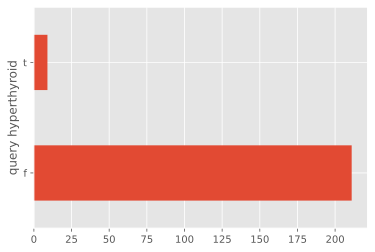

In [130]:
# Variable value counts among hypothyroid positive cases - bar chart
hypo_yes['query hyperthyroid'].value_counts().plot(kind='barh')

- ### Very few patients (only 9) being treated for hyperthyrodism are also hypothyroid

In [131]:
# Variable value counts among hypothyroid negative cases
hypo_no['query hyperthyroid'].value_counts()

query hyperthyroid
f    2415
t     164
Name: count, dtype: int64

<Axes: ylabel='query hyperthyroid'>

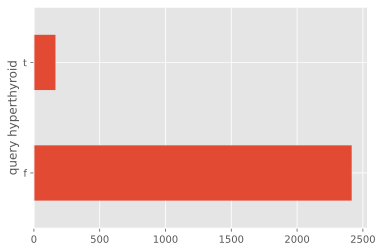

In [132]:
# Variable value counts among hypothyroid negative cases - Bar Chart
hypo_no['query hyperthyroid'].value_counts().plot(kind='barh')

#### Test

In [133]:
# Total variable value counts
test['query hyperthyroid'].value_counts()

query hyperthyroid
f    907
t     64
Name: count, dtype: int64

<Axes: ylabel='query hyperthyroid'>

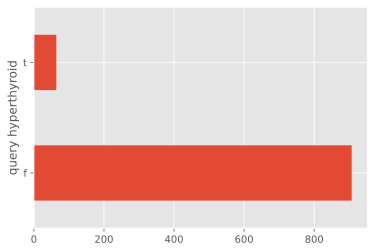

In [134]:
# Total variable value counts - Bar Chart
test['query hyperthyroid'].value_counts().plot(kind='barh')

In [135]:
hypo_yes_test['query hyperthyroid'].value_counts()

query hyperthyroid
f    65
t     6
Name: count, dtype: int64

<Axes: ylabel='query hyperthyroid'>

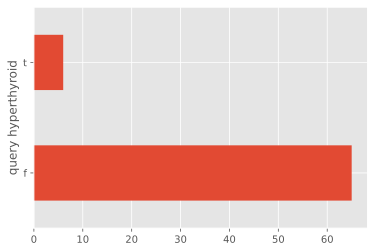

In [136]:
hypo_yes_test['query hyperthyroid'].value_counts().plot(kind='barh')

- ### Very few patients (only 6) being treated for hyperthyrodism are also hypothyroid -test data

In [137]:
hypo_no_test['query hyperthyroid'].value_counts()

query hyperthyroid
f    842
t     58
Name: count, dtype: int64

<Axes: ylabel='query hyperthyroid'>

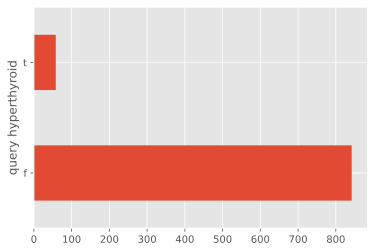

In [138]:
# Variable value counts among hypothyroid positive cases
hypo_no_test['query hyperthyroid'].value_counts().plot(kind='barh')

## Understanding Pregnancy Variable

In [139]:
# Total variable value counts
train['pregnant'].value_counts()

pregnant
f    2758
t      41
Name: count, dtype: int64

- ### 41 people are pregnant in the whole training dataset

#### Train

In [140]:
# Variable value counts among hypothyroid positive cases
hypo_yes['pregnant'].value_counts()

pregnant
f    220
Name: count, dtype: int64

In [141]:
# Variable value counts among hypothyroid negative cases
hypo_no['pregnant'].value_counts()

pregnant
f    2538
t      41
Name: count, dtype: int64

- ### all the 41 pregnant cases are in the hypothyroid negative class

- ### However, Some studies show prevalence of hyporthyrodism among pregnant women. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855970/ . The sample may have been too small to show any result as it was not only targeting pregnant women. The data has a wider demographic It includes males, even children.

#### Test

In [142]:
# Total variable value counts
test['pregnant'].value_counts()

pregnant
f    959
t     12
Name: count, dtype: int64

- ### There are 12 pregnant people in the test dataset

In [143]:
# Variable value counts among hypothyroid positive cases
hypo_yes_test['pregnant'].value_counts()

pregnant
f    71
Name: count, dtype: int64

In [144]:
hypo_no_test['pregnant'].value_counts()

pregnant
f    888
t     12
Name: count, dtype: int64

- ### Similar to the test data,  all the 12 pregnant cases are in the hypothyroid negative class.

In [145]:
# List of numerical columns
num_cols =['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']  # age is excluded as it will be handeled differently

# Age Variable to be checked last

## Understanding Age Variable

In [146]:
train['age'].unique()

array(['23', '46', '70', '18', '59', '80', '66', '68', '84', '67', '71',
       '28', '65', '42', '63', '51', '81', '54', '55', '60', '25', '73',
       '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35',
       '83', '21', '87', '53', '77', '27', '69', '74', '38', '76', '45',
       '36', '22', '43', '72', '82', '31', '39', '49', '62', '57', '1',
       '50', '30', '29', '75', '19', '7', '79', '17', '41', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

- ### Age has abnormally high value i.e 455.
- ### Missing values filled with ? strings . They will be replaced by NaN and imputed with fancy imputer

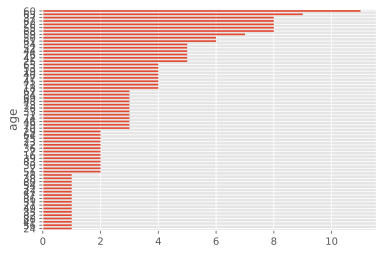

In [147]:
hypo_yes['age'].value_counts().sort_values().plot(kind='barh')

plt.rcParams['figure.figsize'] =(18, 8)

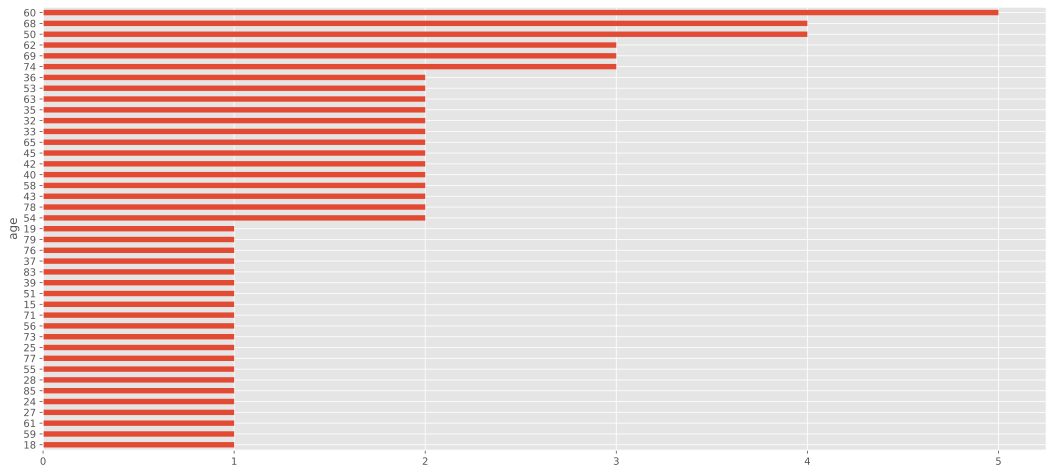

In [148]:
hypo_yes_test['age'].value_counts().sort_values().plot(kind='barh')


plt.rcParams['figure.figsize'] =(18, 8)

- ### Age 63,60 have the highest number of hypothyroid cases.
- ### Hypothyrodism affects a wide range of age groups, the youngest being 2 years, and 7 years respectively(could they be congenital?)

In [149]:
# Variable value counts among hypothyroid positive cases
hypo_yes['TSH'].value_counts()

TSH
12       16
11       12
6.2       8
10        7
13        6
         ..
160       1
18.4      1
33        1
0.015     1
468       1
Name: count, Length: 102, dtype: int64

In [150]:
# Variable value counts among hypothyroid positive cases
hypo_no['TSH'].value_counts()

TSH
?       284
0.2      88
1.3      80
1.1      69
1.4      66
       ... 
8.3       1
6.9       1
12.1      1
9         1
78        1
Name: count, Length: 194, dtype: int64

In [151]:
hypo_yes['TSH'] = pd.to_numeric(hypo_yes['TSH'], errors='coerce')

hypo_yes['TSH'].mean()

33.99325

In [152]:
hypo_no['TSH'] = pd.to_numeric(hypo_no['TSH'], errors='coerce')

hypo_no['TSH'].mean()

1.8628823529411762

- ### The mean TSH value is higher among the hypothyroid positive than hypothyroid negative.

In [153]:
hypo_yes['T3'] = pd.to_numeric(hypo_yes['T3'], errors='coerce')

hypo_yes['T3'].mean()

1.5122222222222221

In [154]:
hypo_no['T3'] = pd.to_numeric(hypo_no['T3'], errors='coerce')

hypo_no['T3'].mean()

2.070108161258604

- ### The mean T3 value is lower among the positive cases than the negative cases

In [155]:
train['T3'].unique()

array(['2', '?', '1.9', '1.2', '0.6', '2.2', '1.6', '3.8', '1.7', '1.8',
       '2.6', '2.1', '0.3', '5.5', '1.4', '3.1', '1.5', '2.5', '2.3',
       '2.4', '2.7', '0.9', '1', '2.8', '2.9', '0.8', '1.3', '0.4', '3.3',
       '3.5', '3.4', '1.1', '4.2', '3.7', '3', '0.7', '4.8', '4.3',
       '0.05', '3.2', '5.4', '4', '0.5', '0.2', '3.6', '5.2', '5', '6',
       '5.3', '3.9', '4.6', '4.5', '7.3', '4.7', '6.7', '4.1', '6.1',
       '0.1', '4.9', '10.6', '5.1', '7', '6.2', '4.4', '7.1'],
      dtype=object)

In [156]:
hypo_yes['T3'].unique()

array([nan, 1.4, 1.5, 1.6, 2.2, 2. , 0.4, 1.9, 1. , 0.7, 1.7, 2.5, 0.5,
       1.2, 1.3, 0.8, 0.2, 0.3, 1.1, 1.8, 0.9, 3.5, 2.3, 0.6, 3.9, 2.6,
       2.1, 4.1, 2.4, 3.1, 3.7, 2.9])


The range for normal values are: Total T3 -- 60 to 180 nanograms per deciliter (ng/dL), or 0.9 to 2.8 nanomoles per liter (nmol/L) Free T3 -- 130 to 450 picograms per deciliter (pg/dL), or 2.0 to 7.0 picomoles per liter (pmol/L)

In [157]:
train['T4U'].unique()

array(['?', '0.91', '0.87', '1.3', '0.92', '0.7', '0.93', '0.89', '0.95',
       '0.99', '1.13', '1.14', '0.86', '0.96', '0.94', '0.9', '1.02',
       '1.05', '0.62', '1.06', '1.55', '0.83', '1.09', '1.07', '1.27',
       '0.76', '1.16', '1', '0.56', '0.81', '0.68', '0.78', '0.85',
       '1.35', '1.15', '0.82', '1.03', '1.58', '0.79', '1.17', '0.71',
       '0.72', '0.88', '1.11', '1.2', '1.1', '1.33', '0.77', '1.24',
       '0.53', '1.44', '1.63', '1.51', '1.42', '1.23', '1.01', '0.98',
       '0.61', '1.12', '1.43', '1.25', '1.41', '1.68', '0.97', '0.84',
       '0.8', '1.04', '0.73', '1.08', '1.26', '1.46', '1.29', '1.34',
       '1.66', '1.21', '1.19', '0.75', '0.52', '1.83', '1.39', '1.5',
       '1.93', '1.18', '0.74', '0.58', '1.82', '0.6', '1.67', '1.22',
       '0.66', '0.67', '1.31', '0.54', '1.77', '1.59', '1.97', '1.69',
       '1.38', '1.28', '1.4', '0.69', '0.65', '1.74', '2.03', '1.73',
       '1.65', '1.36', '1.52', '0.57', '1.53', '1.84', '1.57', '1.75',
       '1.32'

In [158]:
hypo_yes['T4U'].unique()

array(['1.14', '1.16', '0.85', '0.82', '1.03', '0.99', '1.24', '0.86',
       '0.95', '?', '0.97', '1.01', '0.98', '1.13', '0.84', '0.9', '0.92',
       '0.88', '1.19', '1.26', '1', '1.2', '1.09', '0.96', '0.74', '1.11',
       '0.72', '0.7', '0.56', '1.04', '0.83', '1.08', '0.93', '1.07',
       '1.29', '1.38', '1.4', '0.89', '0.8', '0.94', '0.91', '0.66',
       '1.36', '0.81', '1.18', '1.65', '1.3', '1.02', '0.87', '1.33',
       '0.75', '1.5', '1.1', '1.06', '1.12', '1.17', '1.31', '1.39',
       '0.61', '0.76', '0.78', '1.23', '0.79', '1.22', '0.64', '1.37',
       '1.25', '1.15', '0.68', '1.27'], dtype=object)

In [159]:
hypo_yes['T4U'] = pd.to_numeric(hypo_yes['T4U'], errors='coerce')

hypo_yes['T4U'].mean()

1.0196

In [160]:
hypo_no['T4U'] = pd.to_numeric(hypo_no['T4U'], errors='coerce')

hypo_no['T4U'].mean()

0.9959661164205039

- ### The mean T4U values among hypothyroid positive cases is slightly higher than the negative cases

In [161]:
train['TBG'].unique()

array(['?'], dtype=object)

In [162]:
train['TSH'].unique()

array(['4.1', '0.98', '0.16', '0.72', '0.03', '?', '2.2', '0.6', '2.4',
       '1.1', '2.8', '3.3', '12', '1.2', '1.5', '6', '2.1', '0.1', '0.8',
       '1.9', '3.1', '0.2', '13', '0.3', '0.035', '2.5', '0.5', '1.7',
       '7.3', '1.8', '0.26', '45', '5.4', '0.99', '0.25', '0.92', '0.15',
       '0.64', '1', '0.4', '2', '2.6', '14.8', '15', '19', '0.02', '3',
       '2.9', '1.3', '3.2', '9', '1.6', '4.3', '0.005', '0.31', '0.61',
       '0.05', '7.8', '160', '0.025', '1.4', '0.01', '8.8', '151', '0.04',
       '3.9', '9.4', '2.7', '2.3', '0.94', '0.045', '3.5', '0.88', '0.08',
       '4.5', '0.68', '0.7', '0.67', '27', '6.1', '0.75', '0.55', '26',
       '5.2', '0.77', '0.07', '0.9', '11.4', '143', '0.45', '0.57',
       '0.65', '0.015', '16', '108', '0.83', '9.2', '86', '0.62', '0.59',
       '9.1', '5.9', '52', '0.33', '31', '5.8', '0.28', '51', '6.3',
       '4.4', '9.6', '3.4', '0.09', '24', '0.76', '42', '25', '10', '4.6',
       '8.6', '0.66', '6.2', '0.79', '28', '0.86', '9.7',

a few high values 468, 100, 188. Values above 100 may indicate hypothyrodism.

In [163]:
hypo_yes['TSH'].unique()

array([1.20e+01, 4.50e+01, 1.48e+01, 1.50e+01, 1.90e+01, 7.80e+00,
       1.60e+02, 8.80e+00, 1.51e+02, 9.40e+00, 6.10e+00, 1.14e+01,
       1.43e+02, 1.60e+01, 1.08e+02, 9.00e+00, 9.20e+00, 8.60e+01,
       9.10e+00, 5.20e+01, 3.10e+01, 5.10e+01, 9.60e+00, 2.40e+01,
       4.20e+01, 1.00e+01, 8.60e+00, 6.20e+00, 2.80e+01, 9.70e+00,
       1.80e+01, 5.50e+01, 1.40e+01, 6.70e+00, 7.60e+00, 8.00e+00,
       1.10e+01, 4.40e+01, 7.90e+00, 7.20e+00, 6.40e+00, 2.50e+01,
       3.30e+01, 7.10e+00, 1.99e+02, 1.88e+02, 9.80e+01, 2.20e+01,
       6.60e+00, 3.50e+01, 8.20e+00, 6.00e+01, 6.90e+00, 2.90e+01,
       1.30e+01, 7.50e+00, 3.40e+01, 1.03e+02, 8.90e+00, 9.30e+00,
       2.60e+01, 5.40e+01, 8.30e+00, 4.78e+02, 6.80e+00, 8.10e+00,
       1.00e+02, 5.80e+01, 4.10e+01, 1.83e+02, 1.84e+01, 4.30e+01,
       1.50e-02, 7.30e+00, 7.00e+01, 8.50e+00, 1.70e+01, 8.20e+01,
       3.80e+01, 9.90e+00, 9.80e+00, 7.00e+00, 1.11e+01, 2.70e+01,
       3.90e+01, 6.50e+00, 1.26e+02, 2.64e+01, 7.70e+00, 1.78e

In [164]:
hypo_no['TSH'].unique()

array([4.10e+00, 9.80e-01, 1.60e-01, 7.20e-01, 3.00e-02,      nan,
       2.20e+00, 6.00e-01, 2.40e+00, 1.10e+00, 2.80e+00, 3.30e+00,
       1.20e+00, 1.50e+00, 6.00e+00, 2.10e+00, 1.00e-01, 8.00e-01,
       1.90e+00, 3.10e+00, 2.00e-01, 1.30e+01, 3.00e-01, 3.50e-02,
       2.50e+00, 5.00e-01, 1.70e+00, 7.30e+00, 1.80e+00, 2.60e-01,
       5.40e+00, 9.90e-01, 2.50e-01, 9.20e-01, 1.50e-01, 6.40e-01,
       1.00e+00, 4.00e-01, 2.00e+00, 2.60e+00, 2.00e-02, 3.00e+00,
       2.90e+00, 1.30e+00, 3.20e+00, 9.00e+00, 1.60e+00, 4.30e+00,
       5.00e-03, 3.10e-01, 6.10e-01, 5.00e-02, 2.50e-02, 1.40e+00,
       1.00e-02, 4.00e-02, 3.90e+00, 7.80e+00, 2.70e+00, 2.30e+00,
       1.90e+01, 9.40e-01, 4.50e-02, 3.50e+00, 8.80e-01, 8.00e-02,
       4.50e+00, 6.80e-01, 7.00e-01, 6.70e-01, 2.70e+01, 7.50e-01,
       5.50e-01, 2.60e+01, 5.20e+00, 7.70e-01, 7.00e-02, 9.00e-01,
       4.50e-01, 5.70e-01, 6.50e-01, 1.50e-02, 8.30e-01, 6.20e-01,
       5.90e-01, 5.90e+00, 3.30e-01, 5.80e+00, 2.80e-01, 6.30e

In [165]:
train['TT4'].unique()

array(['102', '109', '175', '61', '183', '72', '80', '123', '83', '115',
       '152', '171', '97', '99', '70', '117', '121', '130', '108', '104',
       '134', '199', '57', '129', '113', '119', '84', '81', '95', '66',
       '101', '147', '120', '69', '?', '39', '87', '63', '133', '86',
       '163', '162', '103', '96', '151', '112', '82', '138', '71', '77',
       '93', '107', '237', '110', '67', '88', '160', '118', '136', '114',
       '116', '94', '161', '11', '32', '124', '137', '92', '135', '105',
       '150', '126', '146', '91', '217', '141', '159', '125', '122',
       '100', '111', '140', '205', '225', '85', '90', '74', '219', '127',
       '132', '128', '106', '144', '131', '56', '79', '142', '98', '177',
       '139', '78', '189', '180', '73', '145', '184', '38', '156', '75',
       '148', '14', '76', '54', '58', '27', '65', '193', '13', '143',
       '12', '64', '257', '164', '59', '167', '18', '41', '176', '37',
       '33', '44', '45', '154', '174', '203', '244', '62', '

In [166]:
hypo_yes['TT4'].unique()

array(['99', '39', '61', '82', '83', '95', '11', '105', '113', '32', '70',
       '74', '73', '75', '14', '117', '106', '27', '72', '65', '13', '12',
       '79', '63', '18', '94', '67', '84', '124', '?', '37', '33', '137',
       '44', '45', '69', '91', '128', '101', '144', '86', '59', '104',
       '60', '98', '126', '71', '64', '97', '96', '10', '146', '5.8',
       '42', '66', '68', '88', '15', '47', '123', '139', '52', '89',
       '122', '136', '62', '85', '4.8', '50', '81', '90', '87', '48',
       '102', '118', '22', '77', '141', '130', '131', '35', '108', '111',
       '31', '112', '109', '6', '116', '103', '2', '3', '119', '142',
       '78', '92', '120', '34', '29', '148', '23', '110', '21'],
      dtype=object)

In [167]:
hypo_no['TT4'].unique()

array(['102', '109', '175', '61', '183', '72', '80', '123', '83', '115',
       '152', '171', '97', '70', '117', '99', '121', '130', '108', '104',
       '134', '199', '57', '129', '113', '119', '84', '81', '95', '66',
       '101', '147', '120', '69', '?', '87', '63', '133', '86', '163',
       '162', '103', '96', '151', '112', '138', '71', '77', '93', '107',
       '237', '110', '67', '88', '160', '118', '136', '114', '116', '94',
       '161', '32', '124', '39', '137', '92', '135', '150', '126', '146',
       '91', '217', '141', '159', '125', '122', '100', '111', '140',
       '205', '225', '85', '90', '82', '74', '219', '127', '132', '128',
       '106', '144', '131', '56', '79', '142', '98', '177', '139', '78',
       '189', '180', '145', '184', '38', '156', '148', '76', '75', '54',
       '58', '105', '65', '193', '143', '64', '257', '164', '59', '167',
       '41', '176', '154', '174', '203', '244', '62', '73', '158', '187',
       '250', '181', '157', '223', '272', '166', '213'

In [168]:
#hypo_yes['TT4'].mean()

In [169]:
#hypo_no['TT4'].mean()

- ### The mean TT4 value is lower among the hypothyroid positive cases than the negative cases

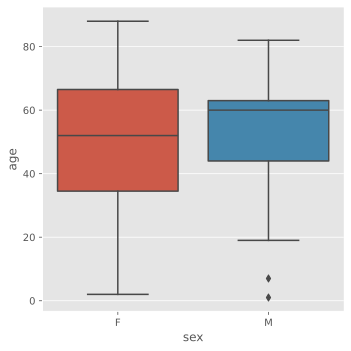

In [170]:
# Convert 'age' column to numeric
hypo_yes['age'] = pd.to_numeric(hypo_yes['age'], errors='coerce')

# Replace '?' with NaN
hypo_yes.replace('?', np.nan, inplace=True)

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_yes, x='sex', y='age', kind='box')
plt.show()

The outliers are underage. Their sex is male.

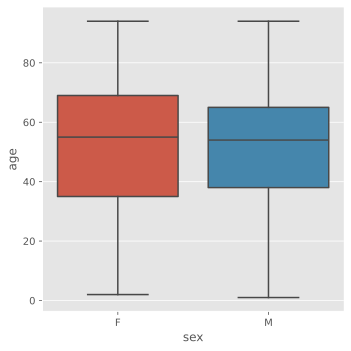

In [171]:
# Convert 'age' column to numeric
hypo_no['age'] = pd.to_numeric(hypo_no['age'], errors='coerce')

# Replace '?' and 455 with NaN
hypo_no.replace({'?'}, np.nan, inplace=True)

hypo_no.replace({455}, np.nan, inplace=True) # outlier, abnormal value

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_no, x='sex', y='age', kind='box')
plt.show()

In [172]:
hypo_yes['age'].unique()

array([65, 44, 27, 54, 34, 39, 62,  1, 50, 26, 42, 59, 79, 33, 63, 19, 55,
       70, 74, 67, 80, 75, 29, 68, 18, 45, 35, 46,  7, 77, 37, 78, 71, 73,
       76, 38, 23, 72, 60, 40, 28, 31, 47, 56, 53, 61, 36, 84, 64, 16, 25,
       69, 83, 48, 32, 86, 57, 41, 30,  2, 52, 49, 51, 82, 88, 24],
      dtype=int64)

In [173]:
# Calculate age statistics -hypothyroid positive
age_min = hypo_yes['age'].min()
age_max = hypo_yes['age'].max()
age_range = age_max - age_min
age_mean = hypo_yes['age'].mean()
age_median = hypo_yes['age'].median()

print(f"Minimum Age: {age_min}")
print(f"Maximum Age: {age_max}")
print(f"Age Range: {age_range}")
print(f"Mean Age: {age_mean}")
print(f"Median Age: {age_median}")

Minimum Age: 1
Maximum Age: 88
Age Range: 87
Mean Age: 50.872727272727275
Median Age: 54.5


In [174]:
# Calculate age statistics - hypothyroid negative
age_min = hypo_no['age'].min()
age_max = hypo_no['age'].max()
age_range = age_max - age_min
age_mean = hypo_no['age'].mean()
age_median = hypo_no['age'].median()

print(f"Minimum Age: {age_min}")
print(f"Maximum Age: {age_max}")
print(f"Age Range: {age_range}")
print(f"Mean Age: {age_mean}")
print(f"Median Age: {age_median}")

Minimum Age: 1.0
Maximum Age: 94.0
Age Range: 93.0
Mean Age: 51.77493209157936
Median Age: 54.0


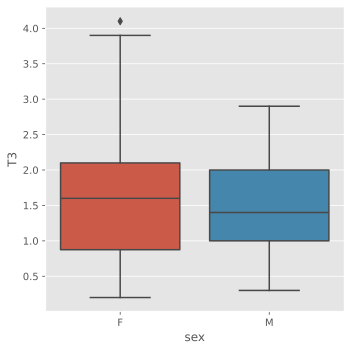

In [175]:
# Replace '?' with NaN
hypo_yes.replace('?', np.nan, inplace=True)

# Convert 'sex' column to numeric
hypo_yes['T3'] = pd.to_numeric(hypo_yes['T3'], errors='coerce')

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_yes, x='sex', y='T3', kind='box')
plt.show()

### Hypothyroid positve have lower median values compared to hypothyroid negative. Low T3 levels may mean you have hypothyroidism. https://medlineplus.gov/lab-tests/triiodothyronine-t3-tests/#:~:text=Low%20T3%20levels%20may%20mean,to%20help%20diagnose%20thyroid%20disease.


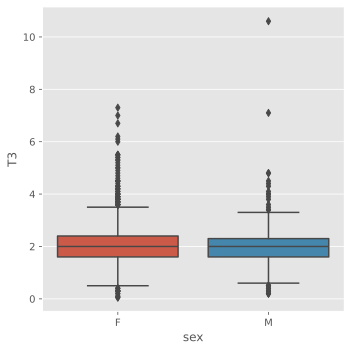

In [176]:
# Replace '?' with NaN
hypo_no.replace('?', np.nan, inplace=True)

# Convert 'sex' column to numeric
hypo_no['T3'] = pd.to_numeric(hypo_no['T3'], errors='coerce')

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_no, x='sex', y='T3', kind='box')
plt.show()

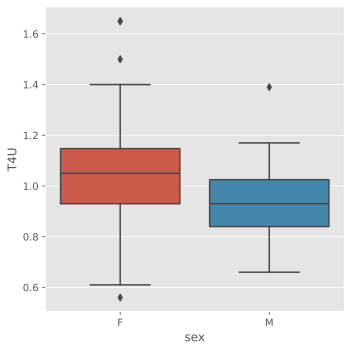

In [177]:
# Replace '?' with NaN
hypo_yes.replace('?', np.nan, inplace=True)

# Convert 'T4U' column to numeric
hypo_yes['T4U'] = pd.to_numeric(hypo_yes['T4U'], errors='coerce')

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_yes, x='sex', y='T4U', kind='box')
plt.show()

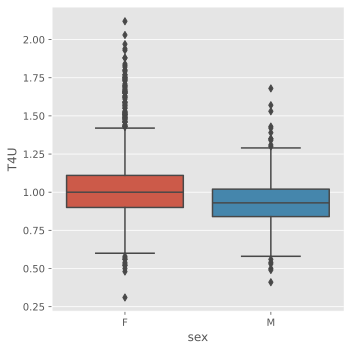

In [178]:
# Replace '?' with NaN
hypo_no.replace('?', np.nan, inplace=True)

# Convert 'T4U' column to numeric
hypo_no['T4U'] = pd.to_numeric(hypo_no['T4U'], errors='coerce')

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_no, x='sex', y='T4U', kind='box')
plt.show()

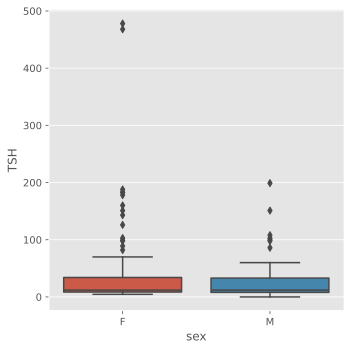

In [179]:
# Replace '?' with NaN
hypo_yes.replace('?', np.nan, inplace=True)

# Convert 'T4U' column to numeric
hypo_yes['TSH'] = pd.to_numeric(hypo_yes['TSH'], errors='coerce')

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_yes, x='sex', y='TSH', kind='box')
plt.show()

TSH has many outliers in the upper quartile for both male and female.

### The TSH test measures the level of thyroid-stimulating hormone in your blood. The TSH has a normal test range between 0.4 and 4.0 milli-international units of hormone per liter of blood (mIU/L).

### If you show signs of hypothyroidism and have a TSH reading above 4.5 mIU/L, you’re at risk of progressing to hypothyroidism. https://www.healthline.com/health/thyroid-function-tests#results

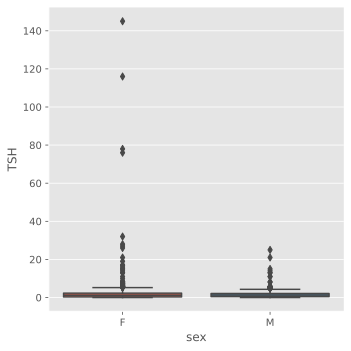

In [180]:
# Convert 'T4U' column to numeric
hypo_no['TSH'] = pd.to_numeric(hypo_no['TSH'], errors='coerce')

# Replace '?' with NaN
hypo_no.replace('?', np.nan, inplace=True)

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_no, x='sex', y='TSH', kind='box')
plt.show()

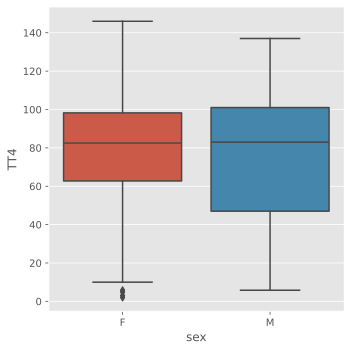

In [181]:
# Convert 'T4U' column to numeric
hypo_yes['TT4'] = pd.to_numeric(hypo_yes['TT4'], errors='coerce')

# Replace '?' with NaN
hypo_yes.replace('?', np.nan, inplace=True)

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_yes, x='sex', y='TT4', kind='box')
plt.show()

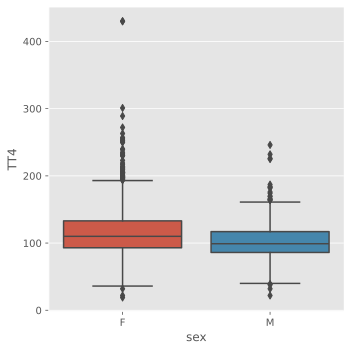

In [182]:
# Convert 'T4U' column to numeric
hypo_no['TT4'] = pd.to_numeric(hypo_no['TT4'], errors='coerce')

# Replace '?' with NaN
hypo_no.replace('?', np.nan, inplace=True)

# Create the visualization (e.g., box plot)
g = sns.catplot(data=hypo_no, x='sex', y='TT4', kind='box')
plt.show()

### A normal Total T4 level in adults ranges from 5.0 to 12.0μg/dL.  https://www.uclahealth.org/medical-services/surgery/endocrine-surgery/conditions-treated/thyroid/normal-thyroid-hormone-levels#:~:text=A%20normal%20Total%20T4%20level,used%20to%20assess%20thyroid%20function.

In [183]:
train['referral source'].value_counts()

referral source
other    1632
SVI       771
SVHC      274
STMW       91
SVHD       31
Name: count, dtype: int64

In [184]:
hypo_yes['referral source'].value_counts()

referral source
other    128
SVI       74
SVHC       8
STMW       7
SVHD       3
Name: count, dtype: int64

In [185]:
hypo_yes['referral source'].value_counts(normalize =True)

referral source
other   0.58
SVI     0.34
SVHC    0.04
STMW    0.03
SVHD    0.01
Name: proportion, dtype: float64

In [186]:
hypo_yes_test['referral source'].value_counts()

referral source
other    45
SVI      23
SVHC      3
Name: count, dtype: int64

- ### The major referal source among the hypothyroid positive is the other group. 128.

- ### The next group is Sympathovagal Imbalance. (SVI), accounting for 34 % of all hypothyroid cases. SVI is a heart complication of irritability of the vagus nerve, characterized by vasomotor instability, sweating, disordered peristalsis, and muscle spasms

## Multivariate Analysis

In [222]:
crosstab_result = pd.crosstab(hypo_yes['TSH'], hypo_yes['target'], dropna=True, margins=True)

crosstab_TSH.head(99)

target  compensated hypothyroid  primary hypothyroid  secondary hypothyroid  \
TSH                                                                           
0.015                         0                    0                      1   
4.6                           0                    0                      1   
6.1                           4                    0                      0   
6.2                           8                    0                      0   
6.3                           1                    0                      0   
6.4                           2                    0                      0   
6.5                           1                    0                      0   
6.6                           3                    0                      0   
6.7                           2                    1                      0   
6.8                           3                    1                      0   
6.9                           3                    0                      0   
7.0                           1                    0                      0   
7.1                           4                    0                      0   
7.2                           3                    0                      0   
7.3                           1                    0                      0   
7.4                           1                    0                      0   
7.5                           2                    0                      0   
7.6                           1                    0                      0   
7.7                           1                    0                      0   
7.8                           1                    0                      0   
7.9                           2                    0                      0   
8.0                           2                    0                      0   
8.1                           1                    1                      0   
8.2                           1                    0                      0   
8.3                           2                    0                      0   
8.5                           1                    0                      0   
8.6                           4                    0                      0   
8.8                           3                    0                      0   
8.9                           2                    0                      0   
9.0                           3                    0                      0   
9.1                           2                    0                      0   
9.2                           3                    0                      0   
9.3                           1                    0                      0   
9.4                           3                    0                      0   
9.6                           1                    0                      0   
9.7                           3                    1                      0   
9.8                           1                    0                      0   
9.9                           1                    0                      0   
10.0                          6                    1                      0   
10.3                          0                    1                      0   
11.0                         11                    1                      0   
11.1                          1                    0                      0   
11.4                          1                    0                      0   
12.0                         15                    1                      0   
13.0                          6                    0                      0   
14.0                          1                    0                      0   
14.8                          1                    0                      0   
15.0                          5                    0                      0   
16.0                          3                   

In [225]:
crosstab_T3 = pd.crosstab(hypo_yes['T3'], hypo_yes['target'], dropna=True, margins=True)

crosstab_T3

target  compensated hypothyroid  primary hypothyroid  secondary hypothyroid  \
T3                                                                            
0.2                           0                    6                      0   
0.3                           3                    3                      0   
0.4                           2                    8                      0   
0.5                           2                    2                      0   
0.6                           0                    2                      0   
0.7                           5                    4                      0   
0.8                           4                    3                      0   
0.9                           2                    1                      0   
1.0                           1                    4                      0   
1.1                           2                    1                      0   
1.2                           7                    2                      1   
1.3                           5                    3                      0   
1.4                           7                    3                      0   
1.5                           9                    1                      0   
1.6                           6                    2                      0   
1.7                           6                    2                      0   
1.8                           2                    1                      0   
1.9                           8                    1                      0   
2.0                          10                    2                      0   
2.1                           9                    2                      0   
2.2                          10                    1                      0   
2.3                           5                    1                      0   
2.4                           3                    0                      0   
2.5                           5                    1                      1   
2.6                           3                    0                      0   
2.9                           1                    0                      0   
3.1                           1                    0                      0   
3.5                           1                    0                      0   
3.7                           1                    0                      0   
3.9                           1                    0                      0   
4.1                           1                    0                      0   
All                         122                   56                      2   

target  All  
T3           
0.2       6  
0.3       6  
0.4      10  
0.5       4  
0.6       2  
0.7       9  
0.8       7  
0.9       3  
1.0       5  
1.1       3  
1.2      10  
1.3       8  
1.4      10  
1.5      10  
1.6       8  
1.7       8  
1.8       3  
1.9       9  
2.0      12  
2.1      11  
2.2      11  
2.3       6  
2.4       3  
2.5       7  
2.6       3  
2.9       1  
3.1       1  
3.5       1  
3.7       1  
3.9       1  
4.1       1  
All     180

In [227]:
crosstab_T4U = pd.crosstab(hypo_yes['T4U'], hypo_yes['target'], dropna=True, margins=True)

crosstab_T4U

target  compensated hypothyroid  primary hypothyroid  secondary hypothyroid  \
T4U                                                                           
0.56                          1                    0                      0   
0.61                          0                    1                      0   
0.64                          1                    0                      0   
0.66                          2                    0                      0   
0.68                          0                    1                      0   
0.7                           0                    1                      0   
0.72                          1                    1                      0   
0.74                          3                    1                      0   
0.75                          2                    0                      0   
0.76                          1                    0                      0   
0.78                          1                    0                      0   
0.79                          2                    0                      0   
0.8                           0                    2                      0   
0.81                          1                    0                      0   
0.82                          4                    0                      0   
0.83                          1                    1                      0   
0.84                          4                    2                      0   
0.85                          3                    0                      0   
0.86                          2                    0                      0   
0.87                          4                    1                      0   
0.88                          2                    0                      0   
0.89                          4                    0                      1   
0.9                           3                    1                      0   
0.91                          2                    0                      0   
0.92                          3                    0                      0   
0.93                          2                    1                      0   
0.94                          2                    0                      0   
0.95                          2                    0                      0   
0.96                          4                    1                      0   
0.97                          6                    2                      0   
0.98                          3                    2                      0   
0.99                          3                    2                      0   
1.0                           3                    1                      0   
1.01                          5                    1                      0   
1.02                          4                    0                      0   
1.03                          3                    1                      0   
1.04                          3                    3                      0   
1.06                          7                    1                      0   
1.07                          2                    0                      0   
1.08                          4                    3                      0   
1.09                          2                    1                      0   
1.1                           1                    2                      0   
1.11                          5                    4                      0   
1.12                          3                    0                      0   
1.13                          4                    1                      0   
1.14                          3                    0                      0   
1.15                          0                    1                      0   
1.16                          3                    3                      0   
1.17                          1                   

In [235]:
crosstab_TT4 = pd.crosstab(hypo_yes['TT4'], hypo_yes['target'], dropna=True, margins=True)

crosstab_TT4.head(99)

target  compensated hypothyroid  primary hypothyroid  secondary hypothyroid  \
TT4                                                                           
2.0                           0                    1                      0   
3.0                           0                    1                      0   
4.8                           0                    1                      0   
5.8                           0                    2                      0   
6.0                           0                    1                      0   
10.0                          0                    3                      0   
11.0                          0                    1                      0   
12.0                          0                    2                      0   
13.0                          0                    3                      0   
14.0                          0                    4                      0   
15.0                          0                    1                      0   
18.0                          0                    1                      0   
21.0                          0                    1                      0   
22.0                          0                    0                      1   
23.0                          0                    1                      0   
27.0                          0                    1                      0   
29.0                          0                    1                      0   
31.0                          0                    1                      0   
32.0                          0                    1                      0   
33.0                          0                    1                      0   
34.0                          0                    1                      0   
35.0                          0                    1                      0   
37.0                          0                    2                      0   
39.0                          0                    3                      0   
42.0                          0                    2                      0   
44.0                          1                    1                      0   
45.0                          0                    3                      0   
47.0                          0                    1                      0   
48.0                          0                    2                      1   
50.0                          0                    1                      0   
52.0                          0                    1                      0   
59.0                          0                    2                      0   
60.0                          0                    2                      0   
61.0                          2                    0                      0   
62.0                          1                    0                      0   
63.0                          1                    4                      0   
64.0                          2                    0                      0   
65.0                          2                    1                      0   
66.0                          3                    1                      0   
67.0                          3                    0                      0   
68.0                          2                    1                      0   
69.0                          2                    0                      0   
70.0                          1                    0                      0   
71.0                          2                    2                      0   
72.0                          2                    0                      0   
73.0                          4                    0                      0   
74.0                          2                    0                      0   
75.0                          1                    0                      0   
77.0                          5                   

In [232]:
crosstab_FTI = pd.crosstab(hypo_yes['FTI'], hypo_yes['target'], dropna=True, margins=True)

crosstab_FTI.head(99)

target  compensated hypothyroid  primary hypothyroid  secondary hypothyroid  \
FTI                                                                           
10                            0                    4                      0   
100                           2                    0                      0   
101                           4                    0                      0   
102                           4                    0                      0   
103                           4                    0                      0   
104                           2                    0                      0   
105                           2                    0                      0   
106                           1                    0                      0   
107                           1                    0                      0   
108                           3                    0                      0   
11                            0                    3                      0   
110                           2                    0                      0   
111                           1                    0                      0   
112                           5                    0                      0   
113                           1                    0                      0   
114                           4                    0                      0   
116                           1                    0                      0   
117                           1                    0                      0   
118                           1                    0                      0   
120                           2                    0                      0   
121                           1                    0                      0   
122                           1                    0                      0   
124                           1                    0                      0   
125                           2                    0                      0   
126                           1                    0                      0   
128                           1                    0                      0   
13                            0                    2                      0   
130                           1                    0                      0   
131                           1                    0                      0   
133                           1                    0                      0   
134                           1                    0                      0   
14                            0                    2                      0   
153                           1                    0                      0   
16                            0                    1                      0   
19                            0                    1                      0   
2                             0                    1                      0   
26                            0                    1                      0   
28                            0                    1                      0   
29                            0                    1                      0   
3                             0                    1                      0   
32                            0                    1                      0   
33                            0                    1                      0   
34                            0                    2                      0   
37                            0                    1                      0   
39                            0                    1                      0   
41                            0                    2                      0   
42                            0                    1                      0   
43                            0                    1                      0   
46                            0                   

## Data Preprocessing

### 2.1. Handling missing values

In [236]:
train.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
negative.|3733               0
target                       0
id_no                        0
dtype: i

In [237]:
test.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
negative.|219                0
target                       0
id_no                        0
dtype: i

### However, some values were filled with ? mark.

In [238]:
# List of numerical columns
num_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'] # age is excluded as it will be handled differently

In [239]:
train[num_cols].describe(include='all') # to show all columns, including those with strings

TSH    T3   TT4   T4U   FTI   TBG
count   2799  2799  2799  2799  2799  2799
unique   264    65   218   139   210     1
top        ?     ?     ?     ?     ?     ?
freq     284   585   184   297   295  2799

In [240]:
test[num_cols].describe(include='all')

TSH   T3  TT4  T4U  FTI  TBG
count   971  971  971  971  971  971
unique  204   55  174  110  162    1
top       ?    ?    ?    ?    ?    ?
freq     84  183   46   89   89  971

In [241]:
# Select columns containing "?" strings
selected_columns = train.columns[train.apply(lambda col: col.astype(str).str.contains('\?', na=False)).any()]

print(selected_columns)

Index(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')


### It was noted that when the thyroid hormone measured column*   was false f, the numerical column** was filled with a string ?. These will be imputed with the median
- *(TSH measured ,T3 measured, TT4 measured, T4U measured, FTI measured, TBG measured)
- **(TSH,	T3,	TT4, T4U,	FTI	, TBG)

In [242]:
train[num_cols]

TSH   T3  TT4   T4U  FTI TBG
0      4.1    2  102     ?    ?   ?
1     0.98    ?  109  0.91  120   ?
2     0.16  1.9  175     ?    ?   ?
3     0.72  1.2   61  0.87   70   ?
4     0.03    ?  183   1.3  141   ?
...    ...  ...  ...   ...  ...  ..
2794   2.7    ?  155  1.05  148   ?
2795     ?  0.7   63  0.88   72   ?
2796     ?    ?  147   0.8  183   ?
2797   1.4    ?  100  0.83  121   ?
2798   1.2  1.5  114  0.99  115   ?

[2799 rows x 6 columns]

In [243]:
train.describe()

age   sex on thyroxine query on thyroxine on antithyroid medication  \
count   2799  2799         2799               2799                      2799   
unique    94     3            2                  2                         2   
top       59     F            f                  f                         f   
freq      75  1829         2469               2759                      2765   

        sick pregnant thyroid surgery I131 treatment query hypothyroid  \
count   2799     2799            2799           2799              2799   
unique     2        2               2              2                 2   
top        f        f               f              f                 f   
freq    2689     2758            2760           2751              2636   

       query hyperthyroid lithium goitre tumor hypopituitary psych  \
count                2799    2799   2799  2799          2799  2799   
unique                  2       2      2     2             2     2   
top                     f       f      f     f             f     f   
freq                 2626    2785   2774  2728          2798  2664   

       TSH measured   TSH T3 measured    T3 TT4 measured   TT4 T4U measured  \
count          2799  2799        2799  2799         2799  2799         2799   
unique            2   264           2    65            2   218            2   
top               t     ?           t     ?            t     ?            t   
freq           2515   284        2214   585         2615   184         2502   

         T4U FTI measured   FTI TBG measured   TBG referral source  \
count   2799         2799  2799         2799  2799            2799   
unique   139            2   210            1     1               5   
top        ?            t     ?            f     ?           other   
freq     297         2504   295         2799  2799            1632   

        negative.|3733    target id_no  
count             2799      2799  2799  
unique            2799         4  2799  
top     negative.|1442  negative  1442  
freq                 1      2579     1

In [244]:
test

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     63   M            f                  f                         f    f   
1     25   F            f                  f                         f    f   
2     53   F            f                  f                         f    f   
3     92   F            f                  f                         f    f   
4     67   M            f                  f                         f    f   
..   ...  ..          ...                ...                       ...  ...   
966   30   F            f                  f                         f    f   
967   68   F            f                  f                         f    f   
968   74   F            f                  f                         f    f   
969   72   M            f                  f                         f    f   
970   64   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
0          f               f              f                 f   
1          f               f              f                 f   
2          f               f              f                 t   
3          f               f              f                 f   
4          f               f              f                 t   
..       ...             ...            ...               ...   
966        f               f              f                 f   
967        f               f              f                 f   
968        f               f              f                 f   
969        f               f              f                 f   
970        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                    f       f      f     f             f     f            t   
1                    f       f      f     f             f     f            t   
2                    f       f      f     f             f     f            t   
3                    f       f      f     f             f     f            t   
4                    f       f      f     f             f     f            t   
..                 ...     ...    ...   ...           ...   ...          ...   
966                  f       f      f     t             f     f            f   
967                  f       f      f     f             f     f            t   
968                  t       f      f     f             f     f            t   
969                  f       f      f     f             f     f            t   
970                  f       f      f     f             f     f            t   

      TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  \
0     3.5           t  2.5            t  108            t  0.96            t   
1     4.6           t  2.4            t   61            t  0.82            t   
2    0.25           t  2.1            t  145            t  1.03            t   
3     0.7           t  1.3            t  120            t  0.84            t   
4    0.81           f    ?            t   84            t  0.83            t   
..    ...         ...  ...          ...  ...          ...   ...          ...   
966     ?           f    ?            f    ?            f     ?            f   
967     1           t  2.1            t  124            t  1.08            t   
968   5.1           t  1.8            t  112            t  1.07            t   
969   0.7           t    2            t   82            t  0.94            t   
970     1           t  2.2            t   99            t  1.07            t   

     FTI TBG measured TBG referral source   negative.|219    target id_no  
0    113            f   ?             SVI  negative.|2059  negative  2059  
1     75            f   ?            SVHD   negative.|399  negative   399  
2    141            f   ?           other  negative.|1911  negative  1911  
3    143            f   ?             SVI   negat

In [245]:
import pandas as pd
import numpy as np
!pip install fancyimpute
from fancyimpute import KNN
from copy import deepcopy

# Defining a function to impute null values in numerical columns with zero
def imputation(data, num_cols):
    # Create a copy of the DataFrame
    data_copy = deepcopy(data)

    # Replace "?" with NaN to represent missing values
    data_copy[num_cols] = data_copy[num_cols].replace('?', float('nan'))

    # Convert the columns to numeric data types
    data_copy[num_cols] = data_copy[num_cols].apply(pd.to_numeric, errors='coerce')

    # Convert the columns to numeric data types
    data_copy['age'] = data_copy['age'].apply(pd.to_numeric, errors='coerce')

    # Replace "?" and 455 with NaN to represent missing values
    data_copy['age']= data_copy['age'].replace(['?', 455], float('nan'))

    # Impute nan values in 'age' column using median imputation
    data_copy['age'] = data_copy['age'].fillna(data_copy['age'].median())

    # Impute '?' values in 'sex' column with the most frequent value
    most_frequent_sex = data_copy['sex'].mode()[0]
    data_copy['sex'] = data_copy['sex'].replace('?', most_frequent_sex)

    # Impute the remaining null values with median
    data_copy[num_cols] = data_copy[num_cols].fillna(data_copy[num_cols].median())


    return data_copy

#Applying the functions
imputed_train = imputation(train, num_cols)
imputed_test = imputation(test, num_cols)

In [246]:
imputed_test = imputation(test, num_cols)

In [247]:
imputed_train.age.unique()

array([23., 46., 70., 18., 59., 80., 66., 68., 84., 67., 71., 28., 65.,
       42., 63., 51., 81., 54., 55., 60., 25., 73., 34., 78., 37., 85.,
       26., 58., 64., 44., 48., 61., 35., 83., 21., 87., 53., 77., 27.,
       69., 74., 38., 76., 45., 36., 22., 43., 72., 82., 31., 39., 49.,
       62., 57.,  1., 50., 30., 29., 75., 19.,  7., 79., 17., 41., 24.,
       15., 32., 47., 16., 52., 33., 13., 10., 89., 56., 20., 90., 40.,
       88., 14., 86., 94., 12.,  4., 11.,  8.,  5.,  2., 91.,  6., 93.,
       92.])

In [248]:
imputed_test.age.unique()

array([63, 25, 53, 92, 67, 60, 48, 27, 73, 19, 72, 16, 54, 39, 38, 33, 45,
       21, 51, 64, 40, 71, 49, 79, 20, 59, 37, 42, 46, 50, 69, 30, 31, 89,
       77, 68, 65, 24, 75, 80, 23, 11, 18, 62, 76, 22, 70, 47, 56, 26, 28,
       83, 74, 78, 58, 61, 55, 41, 85, 86, 32, 43, 17, 35, 57, 66, 34, 14,
       52, 93, 36, 81, 84, 15, 12, 44, 29, 82, 87, 88,  7], dtype=int64)

In [249]:
imputed_train.age.unique()

array([23., 46., 70., 18., 59., 80., 66., 68., 84., 67., 71., 28., 65.,
       42., 63., 51., 81., 54., 55., 60., 25., 73., 34., 78., 37., 85.,
       26., 58., 64., 44., 48., 61., 35., 83., 21., 87., 53., 77., 27.,
       69., 74., 38., 76., 45., 36., 22., 43., 72., 82., 31., 39., 49.,
       62., 57.,  1., 50., 30., 29., 75., 19.,  7., 79., 17., 41., 24.,
       15., 32., 47., 16., 52., 33., 13., 10., 89., 56., 20., 90., 40.,
       88., 14., 86., 94., 12.,  4., 11.,  8.,  5.,  2., 91.,  6., 93.,
       92.])

In [250]:
imputed_train.age.median()

54.0

In [251]:
hypo_yes.age.median()

54.5

## TBG column had ? strings in all rows, being replaced by 0. It will be dropped

Dropping Columns/ Values

In [252]:
#imp_train_target_id =imputed_train[['id_no', 'target']]

#imp_test_target_id

In [253]:
# List of columns to drop
drop_train = ['TBG', 'TBG measured', 'negative.|3733', 'id_no']

drop_test = ['TBG', 'TBG measured', 'negative.|219', 'id_no']

# Drop the specified columns
imputed_train_dropped = imputed_train.drop(columns=drop_train, axis=1)

imputed_test_dropped = imputed_test.drop(columns=drop_test, axis=1)

In [254]:
imputed_test_dropped

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     63   M            f                  f                         f    f   
1     25   F            f                  f                         f    f   
2     53   F            f                  f                         f    f   
3     92   F            f                  f                         f    f   
4     67   M            f                  f                         f    f   
..   ...  ..          ...                ...                       ...  ...   
966   30   F            f                  f                         f    f   
967   68   F            f                  f                         f    f   
968   74   F            f                  f                         f    f   
969   72   M            f                  f                         f    f   
970   64   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
0          f               f              f                 f   
1          f               f              f                 f   
2          f               f              f                 t   
3          f               f              f                 f   
4          f               f              f                 t   
..       ...             ...            ...               ...   
966        f               f              f                 f   
967        f               f              f                 f   
968        f               f              f                 f   
969        f               f              f                 f   
970        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                    f       f      f     f             f     f            t   
1                    f       f      f     f             f     f            t   
2                    f       f      f     f             f     f            t   
3                    f       f      f     f             f     f            t   
4                    f       f      f     f             f     f            t   
..                 ...     ...    ...   ...           ...   ...          ...   
966                  f       f      f     t             f     f            f   
967                  f       f      f     f             f     f            t   
968                  t       f      f     f             f     f            t   
969                  f       f      f     f             f     f            t   
970                  f       f      f     f             f     f            t   

     TSH T3 measured   T3 TT4 measured    TT4 T4U measured  T4U FTI measured  \
0   3.50           t 2.50            t 108.00            t 0.96            t   
1   4.60           t 2.40            t  61.00            t 0.82            t   
2   0.25           t 2.10            t 145.00            t 1.03            t   
3   0.70           t 1.30            t 120.00            t 0.84            t   
4   0.81           f 2.00            t  84.00            t 0.83            t   
..   ...         ...  ...          ...    ...          ...  ...          ...   
966 1.30           f 2.00            f 103.00            f 0.97            f   
967 1.00           t 2.10            t 124.00            t 1.08            t   
968 5.10           t 1.80            t 112.00            t 1.07            t   
969 0.70           t 2.00            t  82.00            t 0.94            t   
970 1.00           t 2.20            t  99.00            t 1.07            t   

       FTI referral source    target  
0   113.00             SVI  negative  
1    75.00            SVHD  negative  
2   141.00           other  negative  
3   143.00             SVI  negative  
4   101.00           other  negative  
..     ...             ...       ...  
966 106.00           other  negative  
967 114.00             SVI  negative  
96

In [255]:
imputed_train_dropped

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0    23.00   F            f                  f                         f    f   
1    46.00   M            f                  f                         f    f   
2    70.00   F            t                  f                         f    f   
3    70.00   F            f                  f                         f    f   
4    18.00   F            t                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
2794 70.00   M            f                  f                         f    f   
2795 73.00   M            f                  t                         f    f   
2796 75.00   M            f                  f                         f    f   
2797 60.00   F            f                  f                         f    f   
2798 81.00   F            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  \
0           f               f              f                 f   
1           f               f              f                 f   
2           f               f              f                 f   
3           f               f              f                 f   
4           f               f              f                 f   
...       ...             ...            ...               ...   
2794        f               f              f                 f   
2795        f               f              f                 f   
2796        f               f              f                 f   
2797        f               f              f                 f   
2798        f               f              f                 f   

     query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                     f       f      f     f             f     f            t   
1                     f       f      f     f             f     f            t   
2                     f       f      f     f             f     f            t   
3                     f       f      f     f             f     f            t   
4                     f       f      f     f             f     f            t   
...                 ...     ...    ...   ...           ...   ...          ...   
2794                  f       f      f     f             f     f            t   
2795                  f       f      f     f             f     f            f   
2796                  t       f      f     f             f     f            f   
2797                  f       f      f     f             f     f            t   
2798                  f       f      f     f             f     f            t   

      TSH T3 measured   T3 TT4 measured    TT4 T4U measured  T4U FTI measured  \
0    4.10           t 2.00            t 102.00            f 0.98            f   
1    0.98           f 2.00            t 109.00            t 0.91            t   
2    0.16           t 1.90            t 175.00            f 0.98            f   
3    0.72           t 1.20            t  61.00            t 0.87            t   
4    0.03           f 2.00            t 183.00            t 1.30            t   
...   ...         ...  ...          ...    ...          ...  ...          ...   
2794 2.70           f 2.00            t 155.00            t 1.05            t   
2795 1.40           t 0.70            t  63.00            t 0.88            t   
2796 1.40           f 2.00            t 147.00            t 0.80            t   
2797 1.40           f 2.00            t 100.00            t 0.83            t   
2798 1.20           t 1.50            t 114.00            t 0.99            t   

        FTI referral source    target  
0    107.00           other  negative  
1    120.00           other  negative  
2    107.00           other  negative  
3     70.00             SVI  negative  
4    141.00           other  negative  
...     ...             ...       ...  
2794 148.00    

In [256]:
# create a Boolean mask for the rows to remove
mask = imputed_train_dropped['target'] == 'secondary hypothyroid'

# select all rows except the ones that the secondary hypothyroid class
imputed_train_dropped = imputed_train_dropped[~mask]

# print the resulting DataFrame
print(imputed_train_dropped)

       age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0    23.00   F            f                  f                         f    f   
1    46.00   M            f                  f                         f    f   
2    70.00   F            t                  f                         f    f   
3    70.00   F            f                  f                         f    f   
4    18.00   F            t                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
2794 70.00   M            f                  f                         f    f   
2795 73.00   M            f                  t                         f    f   
2796 75.00   M            f                  f                         f    f   
2797 60.00   F            f                  f                         f    f   
2798 81.00   F            f                  f                         f    f   

     pregnant thyroid surge

In [257]:
imputed_train_dropped

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0    23.00   F            f                  f                         f    f   
1    46.00   M            f                  f                         f    f   
2    70.00   F            t                  f                         f    f   
3    70.00   F            f                  f                         f    f   
4    18.00   F            t                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
2794 70.00   M            f                  f                         f    f   
2795 73.00   M            f                  t                         f    f   
2796 75.00   M            f                  f                         f    f   
2797 60.00   F            f                  f                         f    f   
2798 81.00   F            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  \
0           f               f              f                 f   
1           f               f              f                 f   
2           f               f              f                 f   
3           f               f              f                 f   
4           f               f              f                 f   
...       ...             ...            ...               ...   
2794        f               f              f                 f   
2795        f               f              f                 f   
2796        f               f              f                 f   
2797        f               f              f                 f   
2798        f               f              f                 f   

     query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                     f       f      f     f             f     f            t   
1                     f       f      f     f             f     f            t   
2                     f       f      f     f             f     f            t   
3                     f       f      f     f             f     f            t   
4                     f       f      f     f             f     f            t   
...                 ...     ...    ...   ...           ...   ...          ...   
2794                  f       f      f     f             f     f            t   
2795                  f       f      f     f             f     f            f   
2796                  t       f      f     f             f     f            f   
2797                  f       f      f     f             f     f            t   
2798                  f       f      f     f             f     f            t   

      TSH T3 measured   T3 TT4 measured    TT4 T4U measured  T4U FTI measured  \
0    4.10           t 2.00            t 102.00            f 0.98            f   
1    0.98           f 2.00            t 109.00            t 0.91            t   
2    0.16           t 1.90            t 175.00            f 0.98            f   
3    0.72           t 1.20            t  61.00            t 0.87            t   
4    0.03           f 2.00            t 183.00            t 1.30            t   
...   ...         ...  ...          ...    ...          ...  ...          ...   
2794 2.70           f 2.00            t 155.00            t 1.05            t   
2795 1.40           t 0.70            t  63.00            t 0.88            t   
2796 1.40           f 2.00            t 147.00            t 0.80            t   
2797 1.40           f 2.00            t 100.00            t 0.83            t   
2798 1.20           t 1.50            t 114.00            t 0.99            t   

        FTI referral source    target  
0    107.00           other  negative  
1    120.00           other  negative  
2    107.00           other  negative  
3     70.00             SVI  negative  
4    141.00           other  negative  
...     ...             ...       ...  
2794 148.00    

### 2.2. Encoding categorical variables

In [258]:
imputed_train_dropped.replace({'f':0,'t':1, 'F':1, 'M':0, 'other': 5, 'SVI': 4, 'SVHD': 1, 'SVHC': 3, 'STMW': 2, 'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2, },inplace=True)

imputed_train_dropped

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0    23.00    1             0                   0                          0   
1    46.00    0             0                   0                          0   
2    70.00    1             1                   0                          0   
3    70.00    1             0                   0                          0   
4    18.00    1             1                   0                          0   
...    ...  ...           ...                 ...                        ...   
2794 70.00    0             0                   0                          0   
2795 73.00    0             0                   1                          0   
2796 75.00    0             0                   0                          0   
2797 60.00    1             0                   0                          0   
2798 81.00    1             0                   0                          0   

      sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0        0         0                0               0                  0   
1        0         0                0               0                  0   
2        0         0                0               0                  0   
3        0         0                0               0                  0   
4        0         0                0               0                  0   
...    ...       ...              ...             ...                ...   
2794     0         0                0               0                  0   
2795     0         0                0               0                  0   
2796     0         0                0               0                  0   
2797     0         0                0               0                  0   
2798     0         0                0               0                  0   

      query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  \
0                      0        0       0      0              0      0   
1                      0        0       0      0              0      0   
2                      0        0       0      0              0      0   
3                      0        0       0      0              0      0   
4                      0        0       0      0              0      0   
...                  ...      ...     ...    ...            ...    ...   
2794                   0        0       0      0              0      0   
2795                   0        0       0      0              0      0   
2796                   1        0       0      0              0      0   
2797                   0        0       0      0              0      0   
2798                   0        0       0      0              0      0   

      TSH measured  TSH  T3 measured   T3  TT4 measured    TT4  T4U measured  \
0                1 4.10            1 2.00             1 102.00             0   
1                1 0.98            0 2.00             1 109.00             1   
2                1 0.16            1 1.90             1 175.00             0   
3                1 0.72            1 1.20             1  61.00             1   
4                1 0.03            0 2.00             1 183.00             1   
...            ...  ...          ...  ...           ...    ...           ...   
2794             1 2.70            0 2.00             1 155.00             1   
2795             0 1.40            1 0.70             1  63.00             1   
2796             0 1.40            0 2.00             1 147.00             1   
2797             1 1.40            0 2.00             1 100.00             1   
2798             1 1.20            1 1.50             1 114.00             1   

      T4U  FTI measured    FTI  referral source  target  
0    0.98             0 107.00                5       0  
1    0.91             1 120.00                5       0  
2    0.98             0 107.00                5       0  
3    0.87             1  70.00                4    

In [259]:
imputed_test_dropped.replace({'f':0,'t':1, 'F':1, 'M':0, 'other': 5, 'SVI': 4, 'SVHD': 1, 'SVHC': 3, 'STMW': 2, 'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2},inplace=True)

imputed_test_dropped

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0     63    0             0                   0                          0   
1     25    1             0                   0                          0   
2     53    1             0                   0                          0   
3     92    1             0                   0                          0   
4     67    0             0                   0                          0   
..   ...  ...           ...                 ...                        ...   
966   30    1             0                   0                          0   
967   68    1             0                   0                          0   
968   74    1             0                   0                          0   
969   72    0             0                   0                          0   
970   64    1             0                   0                          0   

     sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0       0         0                0               0                  0   
1       0         0                0               0                  0   
2       0         0                0               0                  1   
3       0         0                0               0                  0   
4       0         0                0               0                  1   
..    ...       ...              ...             ...                ...   
966     0         0                0               0                  0   
967     0         0                0               0                  0   
968     0         0                0               0                  0   
969     0         0                0               0                  0   
970     0         0                0               0                  0   

     query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  \
0                     0        0       0      0              0      0   
1                     0        0       0      0              0      0   
2                     0        0       0      0              0      0   
3                     0        0       0      0              0      0   
4                     0        0       0      0              0      0   
..                  ...      ...     ...    ...            ...    ...   
966                   0        0       0      1              0      0   
967                   0        0       0      0              0      0   
968                   1        0       0      0              0      0   
969                   0        0       0      0              0      0   
970                   0        0       0      0              0      0   

     TSH measured  TSH  T3 measured   T3  TT4 measured    TT4  T4U measured  \
0               1 3.50            1 2.50             1 108.00             1   
1               1 4.60            1 2.40             1  61.00             1   
2               1 0.25            1 2.10             1 145.00             1   
3               1 0.70            1 1.30             1 120.00             1   
4               1 0.81            0 2.00             1  84.00             1   
..            ...  ...          ...  ...           ...    ...           ...   
966             0 1.30            0 2.00             0 103.00             0   
967             1 1.00            1 2.10             1 124.00             1   
968             1 5.10            1 1.80             1 112.00             1   
969             1 0.70            1 2.00             1  82.00             1   
970             1 1.00            1 2.20             1  99.00             1   

     T4U  FTI measured    FTI  referral source  target  
0   0.96             1 113.00                4       0  
1   0.82             1  75.00                1       0  
2   1.03             1 141.00                5       0  
3   0.84             1 143.00                4       0  
4   0.83             1 101.00                5       0  

In [260]:
imputed_train_dropped.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
referral source                int64
t

In [261]:
# Identify columns with int64 and object data types
int64_columns = imputed_train_dropped.select_dtypes(include=['int64']).columns
object_columns = imputed_train_dropped.select_dtypes(include=['object']).columns

# Convert int64 columns to categorical
imputed_train_dropped[int64_columns] = imputed_train_dropped[int64_columns].astype('category')

# Convert object columns to categorical
imputed_train_dropped[object_columns] = imputed_train_dropped[object_columns].astype('category')

# Check the data types after conversion
print(imputed_train_dropped.dtypes)

age                           float64
sex                          category
on thyroxine                 category
query on thyroxine           category
on antithyroid medication    category
sick                         category
pregnant                     category
thyroid surgery              category
I131 treatment               category
query hypothyroid            category
query hyperthyroid           category
lithium                      category
goitre                       category
tumor                        category
hypopituitary                category
psych                        category
TSH measured                 category
TSH                           float64
T3 measured                  category
T3                            float64
TT4 measured                 category
TT4                           float64
T4U measured                 category
T4U                           float64
FTI measured                 category
FTI                           float64
referral sou

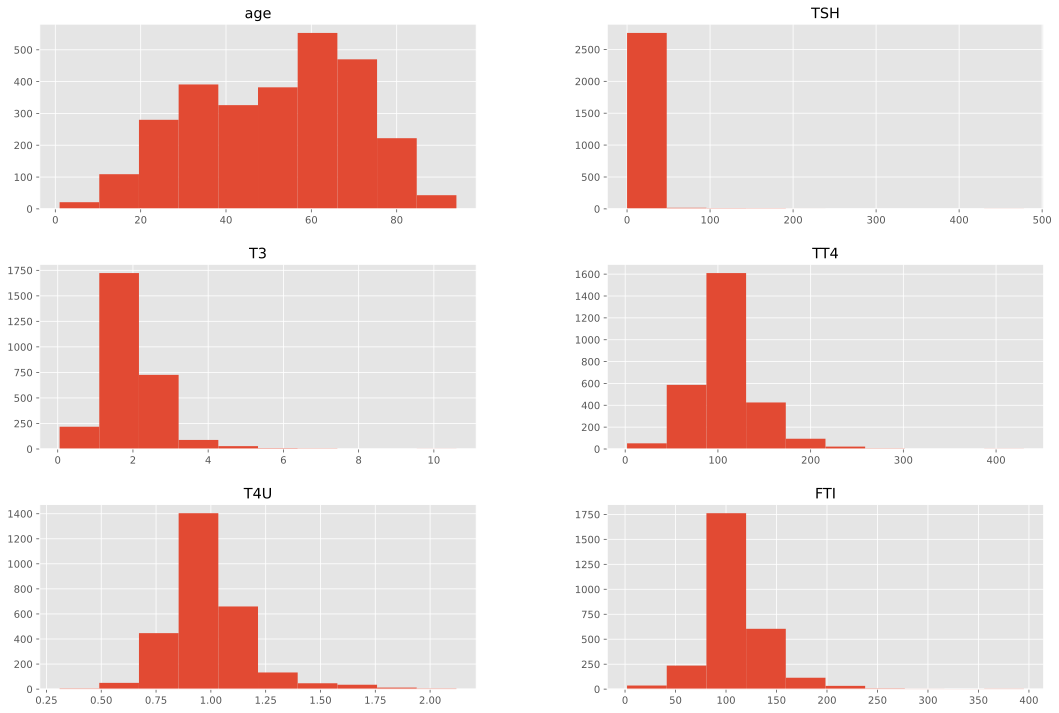

In [262]:
imputed_train_dropped.hist(figsize=(18,12))
plt.show()

Numerical dtypes are float64. However, the rest of the columns are categorical including age. These will be changed into the appropriate data types.

In [263]:
# Identify columns with int64 and object data types
int64_columns = imputed_test_dropped.select_dtypes(include=['int64']).columns
object_columns = imputed_test_dropped.select_dtypes(include=['object']).columns

# Convert int64 columns to categorical
imputed_test_dropped[int64_columns] = imputed_test_dropped[int64_columns].astype('category')

# Convert object columns to categorical
imputed_test_dropped[object_columns] = imputed_test_dropped[object_columns].astype('category')

# age column
imputed_test_dropped['age'] = imputed_test_dropped['age'].astype('int64')
# Check the data types after conversion
print(imputed_test_dropped.dtypes)

age                             int64
sex                          category
on thyroxine                 category
query on thyroxine           category
on antithyroid medication    category
sick                         category
pregnant                     category
thyroid surgery              category
I131 treatment               category
query hypothyroid            category
query hyperthyroid           category
lithium                      category
goitre                       category
tumor                        category
hypopituitary                category
psych                        category
TSH measured                 category
TSH                           float64
T3 measured                  category
T3                            float64
TT4 measured                 category
TT4                           float64
T4U measured                 category
T4U                           float64
FTI measured                 category
FTI                           float64
referral sou

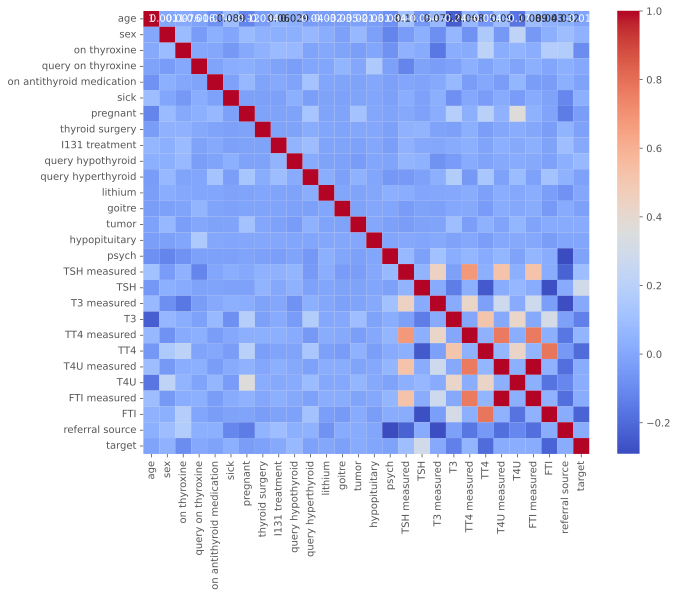

In [264]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(imputed_train_dropped.corr(), annot=True, cmap='coolwarm')
plt.show()

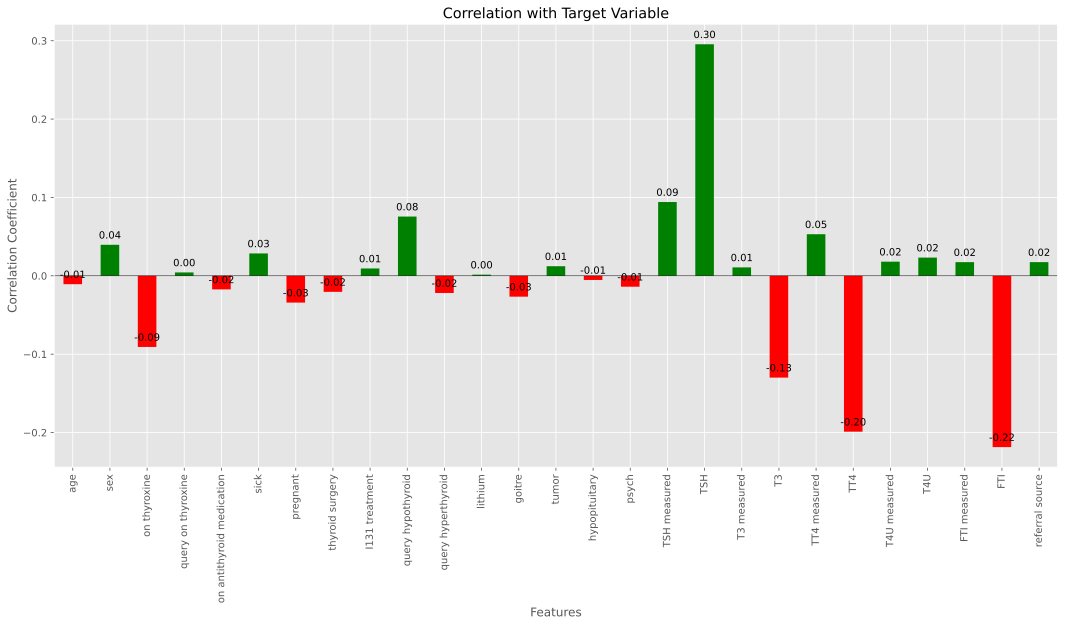

In [265]:
import matplotlib.pyplot as plt

# Calculate the correlations
target_correlation = imputed_train_dropped.corr()['target'].drop('target')

# Define colors: 'green' for positive, 'red' for negative correlation
colors = ['green' if x > 0 else 'red' for x in target_correlation]

# Create bar plot
ax = target_correlation.plot(kind='bar', color=colors)
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)  # Adds a horizontal line at y=0 for reference

# Adding the text on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


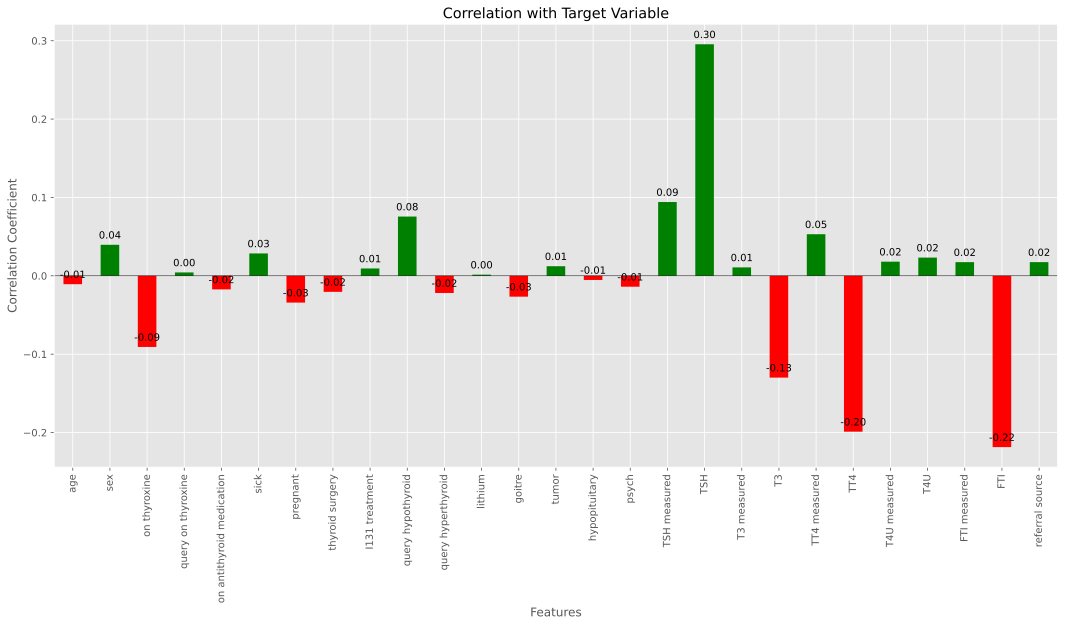

In [268]:
import matplotlib.pyplot as plt

# Calculate the correlations
target_correlation = imputed_train_dropped.corr()['target'].drop('target')

# Define colors: 'green' for positive, 'red' for negative
colors = ['green' if x > 0 else 'red' for x in target_correlation]

# Create bar plot
ax = target_correlation.plot(kind='bar', color=colors)
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)  # Adds a horizontal line at y=0 for reference

# Adding the text on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


##  Understanding the Hormones and Their Normal Functioning:


- T3 and T4: These are the main hormones produced by the thyroid gland. They play vital roles in metabolism, heart rate, and body temperature regulation.
- TSH: This is produced by the pituitary gland and stimulates the thyroid gland to produce T3 and T4.

## EXPLANATION of the THYROID TESTS ---- American Thyroid Association

- The major thyroid hormone secreted by the thyroid
gland is thyroxine, also called **T4** because it contains
**four iodine atoms**. 
- To exert its effects, T4 is converted to
**triiodothyronine (T3)** by the removal of an iodine atom. This
occurs mainly in the liver and in certain tissues where T3
acts, such as in the brain.
- The amount of T4 produced by
the thyroid gland is controlled by another hormone, which
is made in the pituitary gland located at the base of the
brain, called **thyroid stimulating hormone (abbreviated
TSH)**. 
- The amount of TSH that the pituitary sends into
the bloodstream depends on **the amount of T4 that the
pituitary sees**. If the pituitary sees **very little T4**, then it
produces more **TSH** to tell the thyroid gland to produce
more **T4**. **(Inverse Relationship)** 
This explains the Correlation plots above: TSH and T4: In primary hypothyroidism, there is typically a negative correlation between TSH and T4 levels: as TSH goes up, T4 levels tend to go down, and vice versa. This is because a low level of thyroid hormone (low T4) triggers the pituitary gland to produce more TSH.
- Once the T4 in the bloodstream goes above a
certain level, the pituitary’s production of TSH is shut off.
In fact, the thyroid and pituitary act in many ways like a
heater and a thermostat. When the heater is off and it
becomes cold, the thermostat reads the temperature and
turns on the heater. When the heat rises to an appropriate
level, the thermostat senses this and turns off the heater.
Thus, the thyroid and the pituitary, like a heater and
thermost

#### **In Summary:**
- TSH stimulates the thyroid gland to produce T3 and T4. It works through a **feedback** loop – when T3 and T4 levels are low, TSH production is increased, and vice versa. **(Homeostasis)**

Thyroid-Stimulating Hormone (TSH):

TSH is produced in the pituitary gland and stimulates the thyroid gland to produce T4 and T3.
In primary hypothyroidism (where the problem lies in the thyroid gland itself), TSH levels are typically high because the pituitary gland tries to stimulate a underperforming thyroid gland.
Conversely, low TSH levels might indicate secondary or tertiary hypothyroidism (issues with the pituitary or hypothalamus) or overmedication in people being treated for hypothyroidism.
Thyroxine (T4):

T4 is the main hormone produced by the thyroid gland.
In hypothyroidism, T4 levels are often low because the thyroid gland isn't producing enough of the hormone.
T4 is converted into T3, the more active thyroid hormone, in various tissues in the body.
Triiodothyronine (T3):

T3 is the more active thyroid hormone and is mostly formed from the conversion of T4.
T3 levels can also be low in hypothyroidism but are sometimes maintained even when T4 levels are low.
T3 levels are less reliable for diagnosing hypothyroidism because they can be affected by many other factors.

Correlation in Hypothyroidism:
TSH and T4: In primary hypothyroidism, there is typically a negative correlation between TSH and T4 levels: as TSH goes up, T4 levels tend to go down, and vice versa. This is because a low level of thyroid hormone (low T4) triggers the pituitary gland to produce more TSH.

TSH and T3: Similar to T4, low T3 levels can lead to increased TSH secretion. However, the correlation might be less direct compared to TSH and T4 because T3 levels can be influenced by factors other than just T4 to T3 conversion.

T4 and T3: In a healthy system, there’s usually a positive correlation between T4 and T3 since T3 is derived from T4. However, this correlation can be disrupted in various conditions, including hypothyroidism.

Clinical Implications:
Diagnosis: Evaluating the correlation between these hormones helps in diagnosing different types of thyroid disorders. For example, elevated TSH with low T4 suggests primary hypothyroidism.

Treatment Monitoring: In patients undergoing treatment for hypothyroidism, these correlations can help in monitoring the effectiveness of treatment and medication adjustment.

Complex Cases: In some cases, these correlations might not follow typical patterns, leading to complex diagnostic scenarios. For instance, in non-thyroidal illness or certain medications, T3 and T4 levels might be altered independently 

In [269]:
imp_train_target_id =imputed_train[['id_no', 'target']]

imp_train_target_id

id_no    target
0     1442  negative
1     2965  negative
2      806  negative
3     2807  negative
4     3434  negative
...    ...       ...
2794  3689  negative
2795  3652  negative
2796  1287  negative
2797  3496  negative
2798   724  negative

[2799 rows x 2 columns]

## 2.3. Feature scaling

In [270]:
# Define target and features

target = imputed_train_dropped.target

features = imputed_train_dropped.drop(imputed_train_dropped.columns[-1], axis=1).reset_index(drop=True)

In [271]:
target

0       0
1       0
2       0
3       0
4       0
       ..
2794    0
2795    0
2796    0
2797    0
2798    0
Name: target, Length: 2797, dtype: category
Categories (3, int64): [0, 1, 2]

In [272]:
# Defining y
y = target

In [273]:
features

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0    23.00   1            0                  0                         0    0   
1    46.00   0            0                  0                         0    0   
2    70.00   1            1                  0                         0    0   
3    70.00   1            0                  0                         0    0   
4    18.00   1            1                  0                         0    0   
...    ...  ..          ...                ...                       ...  ...   
2792 70.00   0            0                  0                         0    0   
2793 73.00   0            0                  1                         0    0   
2794 75.00   0            0                  0                         0    0   
2795 60.00   1            0                  0                         0    0   
2796 81.00   1            0                  0                         0    0   

     pregnant thyroid surgery I131 treatment query hypothyroid  \
0           0               0              0                 0   
1           0               0              0                 0   
2           0               0              0                 0   
3           0               0              0                 0   
4           0               0              0                 0   
...       ...             ...            ...               ...   
2792        0               0              0                 0   
2793        0               0              0                 0   
2794        0               0              0                 0   
2795        0               0              0                 0   
2796        0               0              0                 0   

     query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                     0       0      0     0             0     0            1   
1                     0       0      0     0             0     0            1   
2                     0       0      0     0             0     0            1   
3                     0       0      0     0             0     0            1   
4                     0       0      0     0             0     0            1   
...                 ...     ...    ...   ...           ...   ...          ...   
2792                  0       0      0     0             0     0            1   
2793                  0       0      0     0             0     0            0   
2794                  1       0      0     0             0     0            0   
2795                  0       0      0     0             0     0            1   
2796                  0       0      0     0             0     0            1   

      TSH T3 measured   T3 TT4 measured    TT4 T4U measured  T4U FTI measured  \
0    4.10           1 2.00            1 102.00            0 0.98            0   
1    0.98           0 2.00            1 109.00            1 0.91            1   
2    0.16           1 1.90            1 175.00            0 0.98            0   
3    0.72           1 1.20            1  61.00            1 0.87            1   
4    0.03           0 2.00            1 183.00            1 1.30            1   
...   ...         ...  ...          ...    ...          ...  ...          ...   
2792 2.70           0 2.00            1 155.00            1 1.05            1   
2793 1.40           1 0.70            1  63.00            1 0.88            1   
2794 1.40           0 2.00            1 147.00            1 0.80            1   
2795 1.40           0 2.00            1 100.00            1 0.83            1   
2796 1.20           1 1.50            1 114.00            1 0.99            1   

        FTI referral source  
0    107.00               5  
1    120.00               5  
2    107.00               5  
3     70.00               4  
4    141.00               5  
...     ...             ...  
2792 148.00               4  
2793  72.00               5  
2794 183.00              

In [274]:
features.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source'],
      dtype='object')

In [278]:
# Defining X
from sklearn.preprocessing import StandardScaler
# Create standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(features))
X.head(5)

0     1     2     3     4     5     6     7     8     9     10    11  \
0 -1.51  0.67 -0.37 -0.12 -0.11 -0.20 -0.12 -0.12 -0.13 -0.25 -0.26 -0.07   
1 -0.30 -1.50 -0.37 -0.12 -0.11 -0.20 -0.12 -0.12 -0.13 -0.25 -0.26 -0.07   
2  0.96  0.67  2.73 -0.12 -0.11 -0.20 -0.12 -0.12 -0.13 -0.25 -0.26 -0.07   
3  0.96  0.67 -0.37 -0.12 -0.11 -0.20 -0.12 -0.12 -0.13 -0.25 -0.26 -0.07   
4 -1.78  0.67  2.73 -0.12 -0.11 -0.20 -0.12 -0.12 -0.13 -0.25 -0.26 -0.07   

     12    13    14    15   16    17    18    19   20    21    22    23    24  \
0 -0.09 -0.16 -0.02 -0.23 0.34 -0.01  0.51 -0.03 0.27 -0.20 -2.91 -0.09 -2.92   
1 -0.09 -0.16 -0.02 -0.23 0.34 -0.17 -1.94 -0.03 0.27  0.01  0.34 -0.47  0.34   
2 -0.09 -0.16 -0.02 -0.23 0.34 -0.21  0.51 -0.16 0.27  1.94 -2.91 -0.09 -2.92   
3 -0.09 -0.16 -0.02 -0.23 0.34 -0.18  0.51 -1.12 0.27 -1.40  0.34 -0.69  0.34   
4 -0.09 -0.16 -0.02 -0.23 0.34 -0.21 -1.94 -0.03 0.27  2.17  0.34  1.65  0.34   

     25    26  
0 -0.11  0.70  
1  0.31  0.70  
2 -0.11  0.70  
3 -1.30 -0.44  
4  0.98  0.70

In [279]:
# Target of the test data
y_test = imputed_test_dropped['target']

y_test

0      0
1      0
2      0
3      0
4      0
      ..
966    0
967    0
968    0
969    0
970    0
Name: target, Length: 971, dtype: category
Categories (3, int64): [0, 1, 2]

In [280]:
# Drop the target column (y_test) and reset the index to get X_test
X_test  = imputed_test_dropped.drop(columns=['target']).reset_index(drop=True)

X_test

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     63   0            0                  0                         0    0   
1     25   1            0                  0                         0    0   
2     53   1            0                  0                         0    0   
3     92   1            0                  0                         0    0   
4     67   0            0                  0                         0    0   
..   ...  ..          ...                ...                       ...  ...   
966   30   1            0                  0                         0    0   
967   68   1            0                  0                         0    0   
968   74   1            0                  0                         0    0   
969   72   0            0                  0                         0    0   
970   64   1            0                  0                         0    0   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
0          0               0              0                 0   
1          0               0              0                 0   
2          0               0              0                 1   
3          0               0              0                 0   
4          0               0              0                 1   
..       ...             ...            ...               ...   
966        0               0              0                 0   
967        0               0              0                 0   
968        0               0              0                 0   
969        0               0              0                 0   
970        0               0              0                 0   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
0                    0       0      0     0             0     0            1   
1                    0       0      0     0             0     0            1   
2                    0       0      0     0             0     0            1   
3                    0       0      0     0             0     0            1   
4                    0       0      0     0             0     0            1   
..                 ...     ...    ...   ...           ...   ...          ...   
966                  0       0      0     1             0     0            0   
967                  0       0      0     0             0     0            1   
968                  1       0      0     0             0     0            1   
969                  0       0      0     0             0     0            1   
970                  0       0      0     0             0     0            1   

     TSH T3 measured   T3 TT4 measured    TT4 T4U measured  T4U FTI measured  \
0   3.50           1 2.50            1 108.00            1 0.96            1   
1   4.60           1 2.40            1  61.00            1 0.82            1   
2   0.25           1 2.10            1 145.00            1 1.03            1   
3   0.70           1 1.30            1 120.00            1 0.84            1   
4   0.81           0 2.00            1  84.00            1 0.83            1   
..   ...         ...  ...          ...    ...          ...  ...          ...   
966 1.30           0 2.00            0 103.00            0 0.97            0   
967 1.00           1 2.10            1 124.00            1 1.08            1   
968 5.10           1 1.80            1 112.00            1 1.07            1   
969 0.70           1 2.00            1  82.00            1 0.94            1   
970 1.00           1 2.20            1  99.00            1 1.07            1   

       FTI referral source  
0   113.00               4  
1    75.00               1  
2   141.00               5  
3   143.00               4  
4   101.00               5  
..     ...             ...  
966 106.00               5  
967 114.00               4  
968 105.00               5  
969  87.00               4  
970  92.00               5  

[971

In [281]:
# Scaling the test features
from sklearn.preprocessing import StandardScaler
# Create standard scaler
scaler = StandardScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.head(5)

0     1     2     3     4     5     6     7     8     9     10    11  \
0  0.61 -1.56 -0.40 -0.10 -0.10 -0.20 -0.11 -0.12 -0.11 -0.28 -0.27 -0.06   
1 -1.39  0.64 -0.40 -0.10 -0.10 -0.20 -0.11 -0.12 -0.11 -0.28 -0.27 -0.06   
2  0.08  0.64 -0.40 -0.10 -0.10 -0.20 -0.11 -0.12 -0.11  3.56 -0.27 -0.06   
3  2.14  0.64 -0.40 -0.10 -0.10 -0.20 -0.11 -0.12 -0.11 -0.28 -0.27 -0.06   
4  0.82 -1.56 -0.40 -0.10 -0.10 -0.20 -0.11 -0.12 -0.11  3.56 -0.27 -0.06   

     12    13   14    15   16    17    18    19   20    21   22    23   24  \
0 -0.10 -0.16 0.00 -0.23 0.31 -0.08  0.48  0.69 0.22  0.06 0.32 -0.13 0.32   
1 -0.10 -0.16 0.00 -0.23 0.31 -0.04  0.48  0.55 0.22 -1.28 0.32 -0.87 0.32   
2 -0.10 -0.16 0.00 -0.23 0.31 -0.18  0.48  0.15 0.22  1.11 0.32  0.24 0.32   
3 -0.10 -0.16 0.00 -0.23 0.31 -0.17  0.48 -0.91 0.22  0.40 0.32 -0.77 0.32   
4 -0.10 -0.16 0.00 -0.23 0.31 -0.17 -2.08  0.02 0.22 -0.63 0.32 -0.82 0.32   

     25    26  
0  0.12 -0.48  
1 -1.07 -4.07  
2  0.99  0.72  
3  1.05 -0.48  
4 -0.26  0.72

In [282]:
features.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source'],
      dtype='object')

In [283]:
# Saving the scaler
    
# Load the pickled scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

The data will be split into training and validation sets. The model will be then evaluated on the test data

In [284]:
# Use label binarizer on the training target
from sklearn.preprocessing import LabelBinarizer

lbl = LabelBinarizer()
y= lbl.fit_transform(y)
n_classes = n_classes = y.shape[1]  # Get the number of classes

In [285]:
# Use label binarizer on the training target
from sklearn.preprocessing import LabelBinarizer

lbl = LabelBinarizer()
y_test= lbl.fit_transform(y_test)
n_classes = y_test.shape[1]  # Get the number of classes

In [286]:
y.shape

(2797, 3)

In [287]:
y_test.shape

(971, 3)

In [288]:
# Save the label binarizer for model deployment
with open('lbl.pkl', 'wb') as f:
    pickle.dump(lbl, f)

In [289]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [290]:
y_val.shape

(560, 3)

## Logistic Regression Classifier

In [291]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression classifier inside a OneVsRestClassifier
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=42))  # Instantiate Logistic Regression
lr_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = lr_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, lr_clf.predict_proba(X_val), multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

confusion_matrices

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.6553571428571429
ROC AUC Score: 0.8400902476238956
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       516
           1       0.67      0.92      0.77        13
           2       0.07      0.35      0.11        31

   micro avg       0.76      0.93      0.83       560
   macro avg       0.58      0.75      0.62       560
weighted avg       0.93      0.93      0.93       560
 samples avg       0.79      0.93      0.84       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 41   3]
 [ 18 498]]
Confusion Matrix for Class 1 vs. Rest:
 [[541   6]
 [  1  12]]
Confusion Matrix for Class 2 vs. Rest:
 [[371 158]
 [ 20  11]]


In [292]:
# Make predictions on the test data
predictions = lr_clf.predict(X_test_scaled)

predictions_proba =lr_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.6426364572605562
ROC AUC Score: 0.8790638554407311
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.76      0.94      0.84        31
           2       0.05      0.42      0.09        40

   micro avg       0.75      0.96      0.84       971
   macro avg       0.60      0.78      0.64       971
weighted avg       0.95      0.96      0.95       971
 samples avg       0.80      0.96      0.85       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 64   7]
 [ 13 887]]
Confusion Matrix for Class 1 vs. Rest:
 [[931   9]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[629 302]
 [ 23  17]]


- Class 0 and 1 were classified well by the Logistic Regression classifier. However, Class 2 only 17 out of 40 were classified correctly. The Logistic Regressor had terrible precision scores on the test data on class 2 -compensatory hypothyroid (0.05). Class 1 29 True Positives, 2- missclassified FN.

- compensatory hypothyroid class 2 is highly misclassified by the logistic regression classifier. Very low precision and recall scores, despite modest accuracy and high ROC_AUC score

### Understanding multilabel confusion matrix

In multilabel confusion matrix # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix
,

- the count of true negatives for a particular class is M(0,0) First row, first column

- false negatives is M(1,0) Second row, first column

- true positives is M(1,1) Second row, second column

- and false positives is M(0,1) First row, second column

https://www.kaggle.com/code/kmkarakaya/multi-label-model-evaluation#Precision,-recall-and-F-measures
![MCM%20confusion%20matrix%20sample.png](attachment:MCM%20confusion%20matrix%20sample.png)

- A one vs rest classifier classifies the class of interest, against the Rest. For example, Confusion Matrix for Class 0 vs. Rest, Rest is (class 1 and 2). That is why a multilabel confusion matrix is being used as Rest takes up multiple labels.

## Support Vector Classifier

In [293]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Support Vector Classifier inside a OneVsRestClassifier
svc_clf = OneVsRestClassifier(SVC(probability=True, random_state=42))  # Instantiate SVC
svc_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = svc_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, svc_clf.predict_proba(X_val), multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)


Accuracy: 0.9482142857142857
ROC AUC Score: 0.9788255404434917
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       516
           1       0.67      0.92      0.77        13
           2       0.68      0.74      0.71        31

   micro avg       0.96      0.96      0.96       560
   macro avg       0.78      0.88      0.82       560
weighted avg       0.96      0.96      0.96       560
 samples avg       0.95      0.96      0.96       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 64   7]
 [ 13 887]]
Confusion Matrix for Class 1 vs. Rest:
 [[931   9]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[629 302]
 [ 23  17]]


In [294]:
X_train_resampled.shape, y_train_resampled.shape

((6189, 27), (6189, 3))

In [295]:
# Make predictions on the test data
predictions = svc_clf.predict(X_test_scaled)

predictions_proba =svc_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9505664263645726
ROC AUC Score: 0.9806542331787406
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.82      0.90      0.86        31
           2       0.59      0.60      0.59        40

   micro avg       0.97      0.97      0.97       971
   macro avg       0.80      0.83      0.81       971
weighted avg       0.97      0.97      0.97       971
 samples avg       0.96      0.97      0.96       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 61  10]
 [ 11 889]]
Confusion Matrix for Class 1 vs. Rest:
 [[934   6]
 [  3  28]]
Confusion Matrix for Class 2 vs. Rest:
 [[914  17]
 [ 16  24]]


- SVC had better precision scores on the test data than the Logistic classifier. In Class 2 - compensatory hypothyroid, SVC performed better with 24 True Positives, 16 False Negatives out of 40 patients. Class 1- Primary hypothyroid 28 True Positives, 3- missclassified FN

## Random Forest Classifier

In [296]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier inside a OneVsRestClassifier
rf_clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = rf_clf.predict(X_val)

y_pred_proba =rf_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9928571428571429
ROC AUC Score: 0.999383905378178
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       516
           1       0.93      1.00      0.96        13
           2       0.91      1.00      0.95        31

   micro avg       0.99      0.99      0.99       560
   macro avg       0.95      1.00      0.97       560
weighted avg       0.99      0.99      0.99       560
 samples avg       0.99      0.99      0.99       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 44   0]
 [  4 512]]
Confusion Matrix for Class 1 vs. Rest:
 [[546   1]
 [  0  13]]
Confusion Matrix for Class 2 vs. Rest:
 [[526   3]
 [  0  31]]


In [297]:
# Make predictions on the test data
predictions = rf_clf.predict(X_test_scaled)

predictions_proba =rf_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9680741503604532
ROC AUC Score: 0.9580665333971191
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       900
           1       0.97      0.94      0.95        31
           2       0.92      0.55      0.69        40

   micro avg       0.98      0.97      0.97       971
   macro avg       0.95      0.82      0.87       971
weighted avg       0.98      0.97      0.97       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 54  17]
 [ 10 890]]
Confusion Matrix for Class 1 vs. Rest:
 [[939   1]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[929   2]
 [ 18  22]]


- For Class 2 - compensatory hypothyroid class, the Random Forest Classifier predicted 22 True Positives out of 40, Two less than SVC Classifier. The model also predicted 29 True Positives for class 1 - primary hypothyroid class which was one more than the SVC Classifier.

## Decision Tree Classifier

In [298]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Decision Tree classifier inside a OneVsRestClassifier
dtree_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state = 42))
dtree_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred = dtree_clf.predict(X_val)

y_pred_proba =dtree_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9928571428571429
ROC AUC Score: 0.9862471052418332
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       0.86      0.92      0.89        13
           2       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00       560
   macro avg       0.95      0.97      0.96       560
weighted avg       1.00      1.00      1.00       560
 samples avg       0.99      1.00      1.00       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 44   0]
 [  1 515]]
Confusion Matrix for Class 1 vs. Rest:
 [[545   2]
 [  1  12]]
Confusion Matrix for Class 2 vs. Rest:
 [[529   0]
 [  0  31]]


In [299]:
# Make predictions on the test data
predictions = dtree_clf.predict(X_test_scaled)

predictions_proba =dtree_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)


Accuracy: 0.9660144181256437
ROC AUC Score: 0.8638615954878633
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       900
           1       0.93      0.90      0.92        31
           2       0.96      0.55      0.70        40

   micro avg       0.98      0.97      0.97       971
   macro avg       0.96      0.81      0.87       971
weighted avg       0.98      0.97      0.97       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 53  18]
 [ 12 888]]
Confusion Matrix for Class 1 vs. Rest:
 [[938   2]
 [  3  28]]
Confusion Matrix for Class 2 vs. Rest:
 [[930   1]
 [ 18  22]]


The decision tree classifier performed well on class 0 (negative) and 1 (primary hypothyroid). However For Class 2, the recall 0.55 and f1 score 0.7 despite high precision score of 0.96.

## KNN Classifier

In [300]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a KNN  inside a OneVsRestClassifier
knn_clf = OneVsRestClassifier(KNeighborsClassifier())
knn_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred = knn_clf.predict(X_val)

y_pred_proba =knn_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.8642857142857143
ROC AUC Score: 0.782509115665773
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       516
           1       0.64      0.54      0.58        13
           2       0.22      0.52      0.31        31

   micro avg       0.86      0.86      0.86       560
   macro avg       0.61      0.65      0.61       560
weighted avg       0.92      0.86      0.89       560
 samples avg       0.86      0.86      0.86       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 29  15]
 [ 55 461]]
Confusion Matrix for Class 1 vs. Rest:
 [[543   4]
 [  6   7]]
Confusion Matrix for Class 2 vs. Rest:
 [[472  57]
 [ 15  16]]


In [301]:
# Make predictions on the test data
predictions = knn_clf.predict(X_test_scaled)

predictions_proba =knn_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.8475798146240988
ROC AUC Score: 0.822207983841115
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       900
           1       0.77      0.74      0.75        31
           2       0.14      0.47      0.22        40

   micro avg       0.85      0.85      0.85       971
   macro avg       0.63      0.69      0.63       971
weighted avg       0.93      0.85      0.88       971
 samples avg       0.85      0.85      0.85       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 48  23]
 [119 781]]
Confusion Matrix for Class 1 vs. Rest:
 [[933   7]
 [  8  23]]
Confusion Matrix for Class 2 vs. Rest:
 [[814 117]
 [ 21  19]]


The K nearest neighbour classifier had very low precision (0.14) and recall scores(0.47). False Negatives (21) were more than True Positives (19)!

## Bagging Classifier

In [302]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Bagging classifier inside a OneVsRestClassifier
bagg_clf = OneVsRestClassifier(BaggingClassifier(random_state=42))
bagg_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = bagg_clf.predict(X_val)

y_pred_proba =bagg_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9946428571428572
ROC AUC Score: 0.9996249941405334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        31

   micro avg       1.00      0.99      1.00       560
   macro avg       0.97      0.97      0.97       560
weighted avg       1.00      0.99      1.00       560
 samples avg       0.99      0.99      0.99       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 44   0]
 [  2 514]]
Confusion Matrix for Class 1 vs. Rest:
 [[546   1]
 [  1  12]]
Confusion Matrix for Class 2 vs. Rest:
 [[529   0]
 [  0  31]]


In [303]:
# Make predictions on the test data
predictions = bagg_clf.predict(X_test_scaled)

predictions_proba =bagg_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9670442842430484
ROC AUC Score: 0.8733677704581746
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       900
           1       0.97      0.90      0.93        31
           2       0.96      0.57      0.72        40

   micro avg       0.98      0.97      0.97       971
   macro avg       0.97      0.82      0.88       971
weighted avg       0.98      0.97      0.97       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 53  18]
 [ 12 888]]
Confusion Matrix for Class 1 vs. Rest:
 [[939   1]
 [  3  28]]
Confusion Matrix for Class 2 vs. Rest:
 [[930   1]
 [ 17  23]]


Bagging Classifier also had low recall (0.57) and moderate f1 score (0.72) for class 2. It did well for class 0(N) and 1(primary)

## Gaussian Naive Bayes Classifier

In [304]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Gaussian Naive Bayes classifier inside a OneVsRestClassifier
gnb_clf = OneVsRestClassifier(GaussianNB())
gnb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = gnb_clf.predict(X_val)

y_pred_proba =gnb_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)


Accuracy: 0.13214285714285715
ROC AUC Score: 0.6806699463120435
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.22      0.36       516
           1       0.03      1.00      0.06        13
           2       0.07      0.94      0.13        31

   micro avg       0.16      0.28      0.21       560
   macro avg       0.36      0.72      0.18       560
weighted avg       0.90      0.28      0.34       560
 samples avg       0.21      0.28      0.23       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 40   4]
 [401 115]]
Confusion Matrix for Class 1 vs. Rest:
 [[133 414]
 [  0  13]]
Confusion Matrix for Class 2 vs. Rest:
 [[141 388]
 [  2  29]]


In [305]:
# Make predictions on the test data
predictions = gnb_clf.predict(X_test_scaled)

predictions_proba =gnb_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9268795056642637
ROC AUC Score: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       900
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        40

   micro avg       0.93      0.93      0.93       971
   macro avg       0.31      0.33      0.32       971
weighted avg       0.86      0.93      0.89       971
 samples avg       0.93      0.93      0.93       971

Confusion Matrix for Class 0 vs. Rest:
 [[  0  71]
 [  0 900]]
Confusion Matrix for Class 1 vs. Rest:
 [[940   0]
 [ 31   0]]
Confusion Matrix for Class 2 vs. Rest:
 [[931   0]
 [ 40   0]]


- Gausssian Naive Bayes performance in most metrics except for class 0(N), is very poor. It missclassified ALL instances of the classes of interest! It also misclassified Class 0 (71 false negative). The classifier's ROC_AUC score was 0.5, which is the flip-coin line when the ROC_AUC curve is plotted. It is as good as a cointoss, if not worse!

## LightGBM Classifier

In [306]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

import lightgbm as lgb

# Train a LightGBM classifier inside a OneVsRestClassifier
lgb_clf = OneVsRestClassifier(lgb.LGBMClassifier(random_state=42))
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = lgb_clf.predict(X_val)

y_pred_proba =lgb_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)



Accuracy: 0.9857142857142858
ROC AUC Score: 0.9997272374961462
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       516
           1       0.92      0.92      0.92        13
           2       0.89      1.00      0.94        31

   micro avg       0.99      0.99      0.99       560
   macro avg       0.94      0.97      0.95       560
weighted avg       0.99      0.99      0.99       560
 samples avg       0.99      0.99      0.99       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 44   0]
 [  4 512]]
Confusion Matrix for Class 1 vs. Rest:
 [[546   1]
 [  1  12]]
Confusion Matrix for Class 2 vs. Rest:
 [[525   4]
 [  0  31]]


In [307]:
# Make predictions on the test data
predictions = lgb_clf.predict(X_test_scaled)

predictions_proba =lgb_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9639546858908342
ROC AUC Score: 0.9332875751483435
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       900
           1       0.93      0.90      0.92        31
           2       0.70      0.70      0.70        40

   micro avg       0.97      0.97      0.97       971
   macro avg       0.87      0.86      0.87       971
weighted avg       0.97      0.97      0.97       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 54  17]
 [ 14 886]]
Confusion Matrix for Class 1 vs. Rest:
 [[938   2]
 [  3  28]]
Confusion Matrix for Class 2 vs. Rest:
 [[919  12]
 [ 12  28]]


- The LightGBM classifier is the best performer thus far. 28 True positives for Class 1 (primary hypothyroid) only 3 miss clasified as FN) - precision =0.93, recall =0.90. For Class 2 -compensatory hypothyroid class, 28 True Positives (only 12 miss classified as FN) -precision=0.7.

Trying other Gradient Boosting Models:

## XGBOOST classifier

In [308]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a XGBoost classifier inside a OneVsRestClassifier
xgb_clf = OneVsRestClassifier(XGBClassifier(random_state=42))
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set 
y_pred = xgb_clf.predict(X_val)

y_pred_proba =xgb_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9910714285714286
ROC AUC Score: 0.9991987334681888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       0.93      1.00      0.96        13
           2       0.91      0.97      0.94        31

   micro avg       0.99      0.99      0.99       560
   macro avg       0.95      0.99      0.97       560
weighted avg       0.99      0.99      0.99       560
 samples avg       0.99      0.99      0.99       560

Confusion Matrix for Class 0 vs. Rest:
 [[ 44   0]
 [  2 514]]
Confusion Matrix for Class 1 vs. Rest:
 [[546   1]
 [  0  13]]
Confusion Matrix for Class 2 vs. Rest:
 [[526   3]
 [  1  30]]


In [309]:
# Make predictions on the test data
predictions = xgb_clf.predict(X_test_scaled)

predictions_proba =xgb_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.964984552008239
ROC AUC Score: 0.88429335440958
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       900
           1       0.97      0.94      0.95        31
           2       0.92      0.57      0.71        40

   micro avg       0.98      0.96      0.97       971
   macro avg       0.96      0.83      0.88       971
weighted avg       0.98      0.96      0.97       971
 samples avg       0.96      0.96      0.96       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 53  18]
 [ 15 885]]
Confusion Matrix for Class 1 vs. Rest:
 [[939   1]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[929   2]
 [ 17  23]]


Xgboost classified performed well in class 0 and 1. However for class 2, -recall 0.57, f1 score-0.71. It's comparable to the random forest and decision tree models in terms of performance

## CATBOOST classifier

In [310]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Catboost classifier inside a OneVsRestClassifier
catboost_clf = OneVsRestClassifier(CatBoostClassifier(random_state=42))
catboost_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred = catboost_clf.predict(X_val)

y_pred_proba =catboost_clf.predict_proba(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

from sklearn.metrics import multilabel_confusion_matrix

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Learning rate set to 0.022437
0:	learn: 0.6404596	total: 921ms	remaining: 15m 20s
1:	learn: 0.5786910	total: 936ms	remaining: 7m 47s
2:	learn: 0.5329452	total: 945ms	remaining: 5m 14s
3:	learn: 0.4948952	total: 955ms	remaining: 3m 57s
4:	learn: 0.4578700	total: 963ms	remaining: 3m 11s
5:	learn: 0.4225609	total: 970ms	remaining: 2m 40s
6:	learn: 0.3847929	total: 979ms	remaining: 2m 18s
7:	learn: 0.3513241	total: 987ms	remaining: 2m 2s
8:	learn: 0.3222835	total: 995ms	remaining: 1m 49s
9:	learn: 0.2974170	total: 1s	remaining: 1m 39s
10:	learn: 0.2717170	total: 1.01s	remaining: 1m 30s
11:	learn: 0.2506792	total: 1.02s	remaining: 1m 23s
12:	learn: 0.2295948	total: 1.03s	remaining: 1m 17s
13:	learn: 0.2110979	total: 1.03s	remaining: 1m 12s
14:	learn: 0.1928674	total: 1.04s	remaining: 1m 8s
15:	learn: 0.1769755	total: 1.05s	remaining: 1m 4s
16:	learn: 0.1628708	total: 1.06s	remaining: 1m 1s
17:	learn: 0.1503611	total: 1.08s	remaining: 58.7s
18:	learn: 0.1378053	total: 1.09s	remaining: 56.1s


172:	learn: 0.0053799	total: 2.34s	remaining: 11.2s
173:	learn: 0.0053216	total: 2.35s	remaining: 11.1s
174:	learn: 0.0053181	total: 2.35s	remaining: 11.1s
175:	learn: 0.0052959	total: 2.36s	remaining: 11.1s
176:	learn: 0.0052903	total: 2.37s	remaining: 11s
177:	learn: 0.0052338	total: 2.38s	remaining: 11s
178:	learn: 0.0052230	total: 2.38s	remaining: 10.9s
179:	learn: 0.0052079	total: 2.39s	remaining: 10.9s
180:	learn: 0.0052015	total: 2.4s	remaining: 10.9s
181:	learn: 0.0051535	total: 2.4s	remaining: 10.8s
182:	learn: 0.0051395	total: 2.41s	remaining: 10.8s
183:	learn: 0.0051216	total: 2.42s	remaining: 10.7s
184:	learn: 0.0050881	total: 2.43s	remaining: 10.7s
185:	learn: 0.0050816	total: 2.43s	remaining: 10.7s
186:	learn: 0.0050554	total: 2.44s	remaining: 10.6s
187:	learn: 0.0050103	total: 2.45s	remaining: 10.6s
188:	learn: 0.0049681	total: 2.46s	remaining: 10.5s
189:	learn: 0.0049610	total: 2.46s	remaining: 10.5s
190:	learn: 0.0049437	total: 2.47s	remaining: 10.5s
191:	learn: 0.0049

358:	learn: 0.0028625	total: 3.75s	remaining: 6.7s
359:	learn: 0.0028601	total: 3.76s	remaining: 6.69s
360:	learn: 0.0028353	total: 3.77s	remaining: 6.67s
361:	learn: 0.0028353	total: 3.77s	remaining: 6.65s
362:	learn: 0.0028317	total: 3.78s	remaining: 6.64s
363:	learn: 0.0028317	total: 3.79s	remaining: 6.62s
364:	learn: 0.0028317	total: 3.8s	remaining: 6.61s
365:	learn: 0.0028192	total: 3.8s	remaining: 6.59s
366:	learn: 0.0028169	total: 3.81s	remaining: 6.57s
367:	learn: 0.0028096	total: 3.82s	remaining: 6.56s
368:	learn: 0.0028054	total: 3.83s	remaining: 6.54s
369:	learn: 0.0028020	total: 3.83s	remaining: 6.53s
370:	learn: 0.0027744	total: 3.84s	remaining: 6.51s
371:	learn: 0.0027744	total: 3.85s	remaining: 6.49s
372:	learn: 0.0027681	total: 3.85s	remaining: 6.48s
373:	learn: 0.0027677	total: 3.86s	remaining: 6.46s
374:	learn: 0.0027648	total: 3.87s	remaining: 6.45s
375:	learn: 0.0027621	total: 3.88s	remaining: 6.43s
376:	learn: 0.0027621	total: 3.88s	remaining: 6.42s
377:	learn: 0.0

525:	learn: 0.0022326	total: 4.9s	remaining: 4.41s
526:	learn: 0.0022326	total: 4.91s	remaining: 4.4s
527:	learn: 0.0022326	total: 4.91s	remaining: 4.39s
528:	learn: 0.0022311	total: 4.92s	remaining: 4.38s
529:	learn: 0.0022299	total: 4.92s	remaining: 4.37s
530:	learn: 0.0022299	total: 4.93s	remaining: 4.36s
531:	learn: 0.0022299	total: 4.94s	remaining: 4.34s
532:	learn: 0.0022299	total: 4.95s	remaining: 4.33s
533:	learn: 0.0022299	total: 4.95s	remaining: 4.32s
534:	learn: 0.0022299	total: 4.96s	remaining: 4.31s
535:	learn: 0.0022299	total: 4.96s	remaining: 4.3s
536:	learn: 0.0022241	total: 4.97s	remaining: 4.29s
537:	learn: 0.0022241	total: 4.98s	remaining: 4.27s
538:	learn: 0.0022220	total: 4.98s	remaining: 4.26s
539:	learn: 0.0022220	total: 4.99s	remaining: 4.25s
540:	learn: 0.0022196	total: 5s	remaining: 4.24s
541:	learn: 0.0022148	total: 5s	remaining: 4.23s
542:	learn: 0.0022034	total: 5.01s	remaining: 4.22s
543:	learn: 0.0022034	total: 5.02s	remaining: 4.21s
544:	learn: 0.0022034

701:	learn: 0.0020426	total: 6.07s	remaining: 2.58s
702:	learn: 0.0020426	total: 6.08s	remaining: 2.57s
703:	learn: 0.0020426	total: 6.08s	remaining: 2.56s
704:	learn: 0.0020426	total: 6.09s	remaining: 2.55s
705:	learn: 0.0020426	total: 6.09s	remaining: 2.54s
706:	learn: 0.0020426	total: 6.1s	remaining: 2.53s
707:	learn: 0.0020426	total: 6.11s	remaining: 2.52s
708:	learn: 0.0020426	total: 6.11s	remaining: 2.51s
709:	learn: 0.0020426	total: 6.12s	remaining: 2.5s
710:	learn: 0.0020404	total: 6.13s	remaining: 2.49s
711:	learn: 0.0020404	total: 6.13s	remaining: 2.48s
712:	learn: 0.0020232	total: 6.14s	remaining: 2.47s
713:	learn: 0.0020232	total: 6.15s	remaining: 2.46s
714:	learn: 0.0020232	total: 6.15s	remaining: 2.45s
715:	learn: 0.0020232	total: 6.16s	remaining: 2.44s
716:	learn: 0.0020232	total: 6.17s	remaining: 2.43s
717:	learn: 0.0020232	total: 6.17s	remaining: 2.42s
718:	learn: 0.0020232	total: 6.18s	remaining: 2.41s
719:	learn: 0.0020232	total: 6.18s	remaining: 2.4s
720:	learn: 0.0

879:	learn: 0.0020231	total: 7.26s	remaining: 991ms
880:	learn: 0.0020231	total: 7.29s	remaining: 984ms
881:	learn: 0.0020231	total: 7.3s	remaining: 977ms
882:	learn: 0.0020231	total: 7.31s	remaining: 969ms
883:	learn: 0.0020231	total: 7.32s	remaining: 961ms
884:	learn: 0.0020231	total: 7.33s	remaining: 953ms
885:	learn: 0.0020231	total: 7.34s	remaining: 945ms
886:	learn: 0.0020231	total: 7.35s	remaining: 937ms
887:	learn: 0.0020231	total: 7.36s	remaining: 928ms
888:	learn: 0.0020231	total: 7.37s	remaining: 920ms
889:	learn: 0.0020231	total: 7.37s	remaining: 911ms
890:	learn: 0.0020231	total: 7.38s	remaining: 903ms
891:	learn: 0.0020231	total: 7.39s	remaining: 894ms
892:	learn: 0.0020231	total: 7.39s	remaining: 886ms
893:	learn: 0.0020231	total: 7.4s	remaining: 877ms
894:	learn: 0.0020231	total: 7.41s	remaining: 869ms
895:	learn: 0.0020231	total: 7.41s	remaining: 860ms
896:	learn: 0.0020231	total: 7.42s	remaining: 852ms
897:	learn: 0.0020231	total: 7.42s	remaining: 843ms
898:	learn: 0.

47:	learn: 0.0200055	total: 385ms	remaining: 7.63s
48:	learn: 0.0192274	total: 393ms	remaining: 7.62s
49:	learn: 0.0182481	total: 400ms	remaining: 7.6s
50:	learn: 0.0173933	total: 407ms	remaining: 7.58s
51:	learn: 0.0168564	total: 415ms	remaining: 7.56s
52:	learn: 0.0162087	total: 422ms	remaining: 7.54s
53:	learn: 0.0156584	total: 429ms	remaining: 7.52s
54:	learn: 0.0150083	total: 437ms	remaining: 7.5s
55:	learn: 0.0146846	total: 444ms	remaining: 7.49s
56:	learn: 0.0140477	total: 452ms	remaining: 7.47s
57:	learn: 0.0136104	total: 459ms	remaining: 7.46s
58:	learn: 0.0131784	total: 467ms	remaining: 7.46s
59:	learn: 0.0126775	total: 475ms	remaining: 7.44s
60:	learn: 0.0122194	total: 482ms	remaining: 7.42s
61:	learn: 0.0120373	total: 489ms	remaining: 7.4s
62:	learn: 0.0116996	total: 497ms	remaining: 7.39s
63:	learn: 0.0114834	total: 504ms	remaining: 7.38s
64:	learn: 0.0111167	total: 512ms	remaining: 7.36s
65:	learn: 0.0108244	total: 519ms	remaining: 7.34s
66:	learn: 0.0104459	total: 526ms	

233:	learn: 0.0017905	total: 1.77s	remaining: 5.78s
234:	learn: 0.0017811	total: 1.77s	remaining: 5.78s
235:	learn: 0.0017728	total: 1.78s	remaining: 5.77s
236:	learn: 0.0017486	total: 1.79s	remaining: 5.76s
237:	learn: 0.0017393	total: 1.8s	remaining: 5.75s
238:	learn: 0.0017251	total: 1.8s	remaining: 5.74s
239:	learn: 0.0017216	total: 1.81s	remaining: 5.74s
240:	learn: 0.0016965	total: 1.82s	remaining: 5.73s
241:	learn: 0.0016874	total: 1.82s	remaining: 5.72s
242:	learn: 0.0016777	total: 1.83s	remaining: 5.71s
243:	learn: 0.0016568	total: 1.84s	remaining: 5.7s
244:	learn: 0.0016508	total: 1.85s	remaining: 5.69s
245:	learn: 0.0016423	total: 1.85s	remaining: 5.68s
246:	learn: 0.0016259	total: 1.86s	remaining: 5.68s
247:	learn: 0.0016183	total: 1.87s	remaining: 5.67s
248:	learn: 0.0016124	total: 1.88s	remaining: 5.66s
249:	learn: 0.0016075	total: 1.88s	remaining: 5.65s
250:	learn: 0.0016019	total: 1.89s	remaining: 5.64s
251:	learn: 0.0015939	total: 1.9s	remaining: 5.64s
252:	learn: 0.00

398:	learn: 0.0008859	total: 2.94s	remaining: 4.44s
399:	learn: 0.0008859	total: 2.95s	remaining: 4.43s
400:	learn: 0.0008804	total: 2.96s	remaining: 4.42s
401:	learn: 0.0008754	total: 2.97s	remaining: 4.41s
402:	learn: 0.0008719	total: 2.97s	remaining: 4.41s
403:	learn: 0.0008663	total: 2.98s	remaining: 4.4s
404:	learn: 0.0008607	total: 2.99s	remaining: 4.39s
405:	learn: 0.0008607	total: 2.99s	remaining: 4.38s
406:	learn: 0.0008535	total: 3s	remaining: 4.37s
407:	learn: 0.0008470	total: 3.01s	remaining: 4.37s
408:	learn: 0.0008470	total: 3.02s	remaining: 4.36s
409:	learn: 0.0008408	total: 3.02s	remaining: 4.35s
410:	learn: 0.0008408	total: 3.03s	remaining: 4.34s
411:	learn: 0.0008363	total: 3.04s	remaining: 4.33s
412:	learn: 0.0008350	total: 3.04s	remaining: 4.33s
413:	learn: 0.0008307	total: 3.05s	remaining: 4.32s
414:	learn: 0.0008307	total: 3.06s	remaining: 4.31s
415:	learn: 0.0008273	total: 3.06s	remaining: 4.3s
416:	learn: 0.0008244	total: 3.07s	remaining: 4.29s
417:	learn: 0.000

560:	learn: 0.0007475	total: 4.17s	remaining: 3.27s
561:	learn: 0.0007475	total: 4.18s	remaining: 3.26s
562:	learn: 0.0007475	total: 4.19s	remaining: 3.25s
563:	learn: 0.0007475	total: 4.19s	remaining: 3.24s
564:	learn: 0.0007475	total: 4.2s	remaining: 3.23s
565:	learn: 0.0007475	total: 4.21s	remaining: 3.23s
566:	learn: 0.0007475	total: 4.21s	remaining: 3.22s
567:	learn: 0.0007475	total: 4.22s	remaining: 3.21s
568:	learn: 0.0007475	total: 4.22s	remaining: 3.2s
569:	learn: 0.0007475	total: 4.23s	remaining: 3.19s
570:	learn: 0.0007475	total: 4.24s	remaining: 3.18s
571:	learn: 0.0007475	total: 4.25s	remaining: 3.18s
572:	learn: 0.0007475	total: 4.25s	remaining: 3.17s
573:	learn: 0.0007475	total: 4.26s	remaining: 3.16s
574:	learn: 0.0007475	total: 4.26s	remaining: 3.15s
575:	learn: 0.0007475	total: 4.27s	remaining: 3.14s
576:	learn: 0.0007475	total: 4.28s	remaining: 3.14s
577:	learn: 0.0007475	total: 4.28s	remaining: 3.13s
578:	learn: 0.0007475	total: 4.29s	remaining: 3.12s
579:	learn: 0.

744:	learn: 0.0007474	total: 5.63s	remaining: 1.93s
745:	learn: 0.0007474	total: 5.64s	remaining: 1.92s
746:	learn: 0.0007474	total: 5.64s	remaining: 1.91s
747:	learn: 0.0007474	total: 5.65s	remaining: 1.9s
748:	learn: 0.0007474	total: 5.66s	remaining: 1.9s
749:	learn: 0.0007474	total: 5.67s	remaining: 1.89s
750:	learn: 0.0007474	total: 5.67s	remaining: 1.88s
751:	learn: 0.0007474	total: 5.68s	remaining: 1.87s
752:	learn: 0.0007474	total: 5.68s	remaining: 1.86s
753:	learn: 0.0007474	total: 5.69s	remaining: 1.86s
754:	learn: 0.0007474	total: 5.7s	remaining: 1.85s
755:	learn: 0.0007474	total: 5.7s	remaining: 1.84s
756:	learn: 0.0007474	total: 5.71s	remaining: 1.83s
757:	learn: 0.0007474	total: 5.72s	remaining: 1.82s
758:	learn: 0.0007474	total: 5.72s	remaining: 1.82s
759:	learn: 0.0007474	total: 5.73s	remaining: 1.81s
760:	learn: 0.0007474	total: 5.74s	remaining: 1.8s
761:	learn: 0.0007474	total: 5.74s	remaining: 1.79s
762:	learn: 0.0007474	total: 5.75s	remaining: 1.79s
763:	learn: 0.000

928:	learn: 0.0007474	total: 6.88s	remaining: 526ms
929:	learn: 0.0007474	total: 6.89s	remaining: 518ms
930:	learn: 0.0007474	total: 6.89s	remaining: 511ms
931:	learn: 0.0007474	total: 6.94s	remaining: 506ms
932:	learn: 0.0007474	total: 6.96s	remaining: 500ms
933:	learn: 0.0007474	total: 6.97s	remaining: 493ms
934:	learn: 0.0007474	total: 6.98s	remaining: 486ms
935:	learn: 0.0007474	total: 6.99s	remaining: 478ms
936:	learn: 0.0007474	total: 7s	remaining: 471ms
937:	learn: 0.0007474	total: 7s	remaining: 463ms
938:	learn: 0.0007474	total: 7.01s	remaining: 456ms
939:	learn: 0.0007474	total: 7.05s	remaining: 450ms
940:	learn: 0.0007474	total: 7.06s	remaining: 443ms
941:	learn: 0.0007474	total: 7.07s	remaining: 435ms
942:	learn: 0.0007474	total: 7.09s	remaining: 429ms
943:	learn: 0.0007474	total: 7.1s	remaining: 421ms
944:	learn: 0.0007474	total: 7.11s	remaining: 414ms
945:	learn: 0.0007474	total: 7.12s	remaining: 406ms
946:	learn: 0.0007474	total: 7.12s	remaining: 399ms
947:	learn: 0.00074

88:	learn: 0.0172646	total: 1.02s	remaining: 10.5s
89:	learn: 0.0170574	total: 1.04s	remaining: 10.5s
90:	learn: 0.0168456	total: 1.04s	remaining: 10.4s
91:	learn: 0.0166466	total: 1.05s	remaining: 10.4s
92:	learn: 0.0164304	total: 1.06s	remaining: 10.4s
93:	learn: 0.0161434	total: 1.07s	remaining: 10.3s
94:	learn: 0.0159243	total: 1.08s	remaining: 10.3s
95:	learn: 0.0156731	total: 1.09s	remaining: 10.3s
96:	learn: 0.0154900	total: 1.1s	remaining: 10.2s
97:	learn: 0.0152818	total: 1.12s	remaining: 10.4s
98:	learn: 0.0150582	total: 1.14s	remaining: 10.3s
99:	learn: 0.0149793	total: 1.15s	remaining: 10.3s
100:	learn: 0.0147638	total: 1.15s	remaining: 10.3s
101:	learn: 0.0145405	total: 1.16s	remaining: 10.2s
102:	learn: 0.0143654	total: 1.17s	remaining: 10.2s
103:	learn: 0.0143251	total: 1.18s	remaining: 10.2s
104:	learn: 0.0141577	total: 1.19s	remaining: 10.1s
105:	learn: 0.0139951	total: 1.19s	remaining: 10.1s
106:	learn: 0.0138153	total: 1.2s	remaining: 10s
107:	learn: 0.0136609	total:

268:	learn: 0.0053802	total: 2.43s	remaining: 6.61s
269:	learn: 0.0053478	total: 2.44s	remaining: 6.6s
270:	learn: 0.0053184	total: 2.45s	remaining: 6.59s
271:	learn: 0.0053037	total: 2.46s	remaining: 6.58s
272:	learn: 0.0052773	total: 2.46s	remaining: 6.56s
273:	learn: 0.0052640	total: 2.47s	remaining: 6.55s
274:	learn: 0.0052274	total: 2.48s	remaining: 6.54s
275:	learn: 0.0052200	total: 2.48s	remaining: 6.52s
276:	learn: 0.0052060	total: 2.49s	remaining: 6.51s
277:	learn: 0.0051932	total: 2.5s	remaining: 6.49s
278:	learn: 0.0051845	total: 2.51s	remaining: 6.48s
279:	learn: 0.0051562	total: 2.51s	remaining: 6.47s
280:	learn: 0.0051466	total: 2.52s	remaining: 6.45s
281:	learn: 0.0051359	total: 2.53s	remaining: 6.44s
282:	learn: 0.0050971	total: 2.54s	remaining: 6.43s
283:	learn: 0.0050793	total: 2.54s	remaining: 6.41s
284:	learn: 0.0050671	total: 2.55s	remaining: 6.4s
285:	learn: 0.0050578	total: 2.56s	remaining: 6.39s
286:	learn: 0.0050453	total: 2.56s	remaining: 6.37s
287:	learn: 0.0

429:	learn: 0.0032243	total: 3.63s	remaining: 4.81s
430:	learn: 0.0032012	total: 3.64s	remaining: 4.8s
431:	learn: 0.0031809	total: 3.64s	remaining: 4.79s
432:	learn: 0.0031782	total: 3.65s	remaining: 4.78s
433:	learn: 0.0031751	total: 3.66s	remaining: 4.77s
434:	learn: 0.0031710	total: 3.67s	remaining: 4.76s
435:	learn: 0.0031601	total: 3.67s	remaining: 4.75s
436:	learn: 0.0031379	total: 3.68s	remaining: 4.74s
437:	learn: 0.0031154	total: 3.69s	remaining: 4.73s
438:	learn: 0.0031014	total: 3.69s	remaining: 4.72s
439:	learn: 0.0030953	total: 3.7s	remaining: 4.71s
440:	learn: 0.0030858	total: 3.71s	remaining: 4.7s
441:	learn: 0.0030815	total: 3.72s	remaining: 4.69s
442:	learn: 0.0030785	total: 3.73s	remaining: 4.68s
443:	learn: 0.0030582	total: 3.73s	remaining: 4.67s
444:	learn: 0.0030548	total: 3.74s	remaining: 4.66s
445:	learn: 0.0030543	total: 3.75s	remaining: 4.65s
446:	learn: 0.0030333	total: 3.75s	remaining: 4.64s
447:	learn: 0.0030333	total: 3.76s	remaining: 4.63s
448:	learn: 0.0

602:	learn: 0.0022504	total: 5.06s	remaining: 3.33s
603:	learn: 0.0022488	total: 5.07s	remaining: 3.32s
604:	learn: 0.0022438	total: 5.08s	remaining: 3.31s
605:	learn: 0.0022438	total: 5.09s	remaining: 3.31s
606:	learn: 0.0022438	total: 5.09s	remaining: 3.3s
607:	learn: 0.0022438	total: 5.1s	remaining: 3.29s
608:	learn: 0.0022438	total: 5.11s	remaining: 3.28s
609:	learn: 0.0022438	total: 5.12s	remaining: 3.27s
610:	learn: 0.0022438	total: 5.12s	remaining: 3.26s
611:	learn: 0.0022438	total: 5.13s	remaining: 3.25s
612:	learn: 0.0022438	total: 5.15s	remaining: 3.25s
613:	learn: 0.0022438	total: 5.16s	remaining: 3.25s
614:	learn: 0.0022438	total: 5.17s	remaining: 3.24s
615:	learn: 0.0022438	total: 5.2s	remaining: 3.24s
616:	learn: 0.0022438	total: 5.21s	remaining: 3.23s
617:	learn: 0.0022438	total: 5.23s	remaining: 3.23s
618:	learn: 0.0022411	total: 5.24s	remaining: 3.23s
619:	learn: 0.0022411	total: 5.25s	remaining: 3.22s
620:	learn: 0.0022411	total: 5.27s	remaining: 3.22s
621:	learn: 0.0

776:	learn: 0.0021142	total: 6.94s	remaining: 1.99s
777:	learn: 0.0021142	total: 6.95s	remaining: 1.98s
778:	learn: 0.0021142	total: 6.96s	remaining: 1.97s
779:	learn: 0.0021142	total: 6.97s	remaining: 1.96s
780:	learn: 0.0021142	total: 6.97s	remaining: 1.96s
781:	learn: 0.0021142	total: 6.98s	remaining: 1.95s
782:	learn: 0.0021142	total: 6.99s	remaining: 1.94s
783:	learn: 0.0021142	total: 7s	remaining: 1.93s
784:	learn: 0.0021142	total: 7s	remaining: 1.92s
785:	learn: 0.0021142	total: 7.01s	remaining: 1.91s
786:	learn: 0.0021142	total: 7.02s	remaining: 1.9s
787:	learn: 0.0021142	total: 7.03s	remaining: 1.89s
788:	learn: 0.0021142	total: 7.03s	remaining: 1.88s
789:	learn: 0.0021133	total: 7.04s	remaining: 1.87s
790:	learn: 0.0020994	total: 7.05s	remaining: 1.86s
791:	learn: 0.0020994	total: 7.06s	remaining: 1.85s
792:	learn: 0.0020994	total: 7.07s	remaining: 1.84s
793:	learn: 0.0020994	total: 7.08s	remaining: 1.83s
794:	learn: 0.0020994	total: 7.08s	remaining: 1.83s
795:	learn: 0.00209

946:	learn: 0.0020804	total: 8.12s	remaining: 455ms
947:	learn: 0.0020804	total: 8.13s	remaining: 446ms
948:	learn: 0.0020804	total: 8.14s	remaining: 438ms
949:	learn: 0.0020804	total: 8.15s	remaining: 429ms
950:	learn: 0.0020804	total: 8.16s	remaining: 421ms
951:	learn: 0.0020804	total: 8.17s	remaining: 412ms
952:	learn: 0.0020804	total: 8.18s	remaining: 403ms
953:	learn: 0.0020804	total: 8.19s	remaining: 395ms
954:	learn: 0.0020804	total: 8.2s	remaining: 386ms
955:	learn: 0.0020804	total: 8.21s	remaining: 378ms
956:	learn: 0.0020804	total: 8.22s	remaining: 369ms
957:	learn: 0.0020804	total: 8.23s	remaining: 361ms
958:	learn: 0.0020804	total: 8.24s	remaining: 352ms
959:	learn: 0.0020804	total: 8.25s	remaining: 344ms
960:	learn: 0.0020804	total: 8.26s	remaining: 335ms
961:	learn: 0.0020804	total: 8.27s	remaining: 327ms
962:	learn: 0.0020804	total: 8.27s	remaining: 318ms
963:	learn: 0.0020804	total: 8.28s	remaining: 309ms
964:	learn: 0.0020804	total: 8.29s	remaining: 301ms
965:	learn: 0

In [311]:
# Make predictions on the test data
predictions = catboost_clf.predict(X_test_scaled)

predictions_proba =catboost_clf.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)

Accuracy: 0.9701338825952626
ROC AUC Score: 0.990747194592268
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       900
           1       0.97      0.94      0.95        31
           2       0.96      0.68      0.79        40

   micro avg       0.98      0.97      0.98       971
   macro avg       0.97      0.87      0.91       971
weighted avg       0.98      0.97      0.98       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 56  15]
 [ 13 887]]
Confusion Matrix for Class 1 vs. Rest:
 [[939   1]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[930   1]
 [ 13  27]]


- Catboost has performed even better than Lightgbm! Precision 0.96, recall 0.68, f1 score 0.79 for Class 2. ROC_AUC score =0.99
- In comparison, Lightgbm Precision 0.70,  recall 0.70,  f1-score    0.70 - ROC_AUC score =0.93 for Class 2.
- Although Light gbm had 28 True positives to Catboosts 27 for Class 2 -compensatory hypothyroid class, there were more False negatives -12 compared to catboost- only one
- Confusion Matrix for Class 2 vs. Rest: Light GBM for comparison:

 [[919  12]

 [ 12  28]]

### Hyperparameter tuning of the best models

Catboost is selected for hyperparameter tuning selected for hyperparameter tuning as it generalized well on the test data. It is hoped the performance will improve, especially on class 2 - the compensatory hypothyroid class after hyperparameter tuning.

## Catboost Grid Search

In [312]:
# Showing the original hyperparameters used for the Classifier
catboost_clf.get_params()

{'estimator__random_state': 42,
 'estimator': <catboost.core.CatBoostClassifier at 0x1a278389540>,
 'n_jobs': None,
 'verbose': 0}

In [313]:
# Define the hyperparameter distribution
param_grid_catboost = {'estimator__iterations': [3000],
                  }

In [314]:
# Create the stratified K-fold cross-validator
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
catboost_grid = GridSearchCV(
    catboost_clf,
    param_grid=param_grid_catboost,
    cv=mskf,
    scoring='average_precision'
)

# Start the timer
start_time = time.time()

# Fit the grid search to your data
catboost_grid.fit(X_train_resampled, y_train_resampled)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Grid search took {elapsed_time} seconds.")

# Get the best estimator and best parameters
catboost_best_estimator = catboost_grid.best_estimator_
catboost_best_params = catboost_grid.best_params_

print("Best Estimator:")
print(catboost_best_estimator)

print("\nBest Parameters:")
print(catboost_best_params)

Learning rate set to 0.007448
0:	learn: 0.6750237	total: 9.02ms	remaining: 27.1s
1:	learn: 0.6556081	total: 16.5ms	remaining: 24.7s
2:	learn: 0.6391560	total: 24.1ms	remaining: 24.1s
3:	learn: 0.6224413	total: 33.4ms	remaining: 25s
4:	learn: 0.6067353	total: 42.2ms	remaining: 25.3s
5:	learn: 0.5895524	total: 49.3ms	remaining: 24.6s
6:	learn: 0.5722774	total: 57.1ms	remaining: 24.4s
7:	learn: 0.5558113	total: 64.6ms	remaining: 24.1s
8:	learn: 0.5408492	total: 70ms	remaining: 23.3s
9:	learn: 0.5253801	total: 76.8ms	remaining: 22.9s
10:	learn: 0.5103448	total: 83.7ms	remaining: 22.7s
11:	learn: 0.4977578	total: 90.4ms	remaining: 22.5s
12:	learn: 0.4866316	total: 97.2ms	remaining: 22.3s
13:	learn: 0.4743189	total: 105ms	remaining: 22.4s
14:	learn: 0.4597266	total: 113ms	remaining: 22.6s
15:	learn: 0.4472341	total: 120ms	remaining: 22.4s
16:	learn: 0.4324136	total: 127ms	remaining: 22.3s
17:	learn: 0.4203128	total: 135ms	remaining: 22.4s
18:	learn: 0.4081510	total: 154ms	remaining: 24.2s
19

182:	learn: 0.0130861	total: 1.54s	remaining: 23.7s
183:	learn: 0.0129300	total: 1.55s	remaining: 23.7s
184:	learn: 0.0127695	total: 1.56s	remaining: 23.8s
185:	learn: 0.0126737	total: 1.6s	remaining: 24.2s
186:	learn: 0.0125284	total: 1.6s	remaining: 24.2s
187:	learn: 0.0124480	total: 1.61s	remaining: 24.1s
188:	learn: 0.0122715	total: 1.62s	remaining: 24.1s
189:	learn: 0.0121240	total: 1.63s	remaining: 24.1s
190:	learn: 0.0119867	total: 1.64s	remaining: 24.1s
191:	learn: 0.0119101	total: 1.65s	remaining: 24.1s
192:	learn: 0.0117964	total: 1.67s	remaining: 24.3s
193:	learn: 0.0116989	total: 1.69s	remaining: 24.5s
194:	learn: 0.0116049	total: 1.7s	remaining: 24.5s
195:	learn: 0.0115213	total: 1.72s	remaining: 24.6s
196:	learn: 0.0114079	total: 1.74s	remaining: 24.7s
197:	learn: 0.0113047	total: 1.75s	remaining: 24.8s
198:	learn: 0.0112382	total: 1.77s	remaining: 24.9s
199:	learn: 0.0111405	total: 1.79s	remaining: 25.1s
200:	learn: 0.0110242	total: 1.8s	remaining: 25.1s
201:	learn: 0.01

358:	learn: 0.0056154	total: 3.15s	remaining: 23.2s
359:	learn: 0.0055947	total: 3.17s	remaining: 23.2s
360:	learn: 0.0055669	total: 3.17s	remaining: 23.2s
361:	learn: 0.0055365	total: 3.18s	remaining: 23.2s
362:	learn: 0.0054988	total: 3.19s	remaining: 23.1s
363:	learn: 0.0054806	total: 3.19s	remaining: 23.1s
364:	learn: 0.0054750	total: 3.2s	remaining: 23.1s
365:	learn: 0.0054699	total: 3.21s	remaining: 23.1s
366:	learn: 0.0054530	total: 3.22s	remaining: 23.1s
367:	learn: 0.0054487	total: 3.22s	remaining: 23.1s
368:	learn: 0.0054432	total: 3.23s	remaining: 23s
369:	learn: 0.0054276	total: 3.24s	remaining: 23s
370:	learn: 0.0054162	total: 3.25s	remaining: 23s
371:	learn: 0.0054041	total: 3.26s	remaining: 23s
372:	learn: 0.0053898	total: 3.27s	remaining: 23s
373:	learn: 0.0053730	total: 3.28s	remaining: 23s
374:	learn: 0.0053443	total: 3.29s	remaining: 23s
375:	learn: 0.0053201	total: 3.3s	remaining: 23.1s
376:	learn: 0.0053171	total: 3.31s	remaining: 23.1s
377:	learn: 0.0053061	total:

517:	learn: 0.0036404	total: 4.39s	remaining: 21s
518:	learn: 0.0036381	total: 4.4s	remaining: 21s
519:	learn: 0.0036355	total: 4.41s	remaining: 21s
520:	learn: 0.0036248	total: 4.41s	remaining: 21s
521:	learn: 0.0036083	total: 4.42s	remaining: 21s
522:	learn: 0.0035977	total: 4.42s	remaining: 21s
523:	learn: 0.0035924	total: 4.43s	remaining: 20.9s
524:	learn: 0.0035908	total: 4.44s	remaining: 20.9s
525:	learn: 0.0035890	total: 4.45s	remaining: 20.9s
526:	learn: 0.0035858	total: 4.45s	remaining: 20.9s
527:	learn: 0.0035746	total: 4.46s	remaining: 20.9s
528:	learn: 0.0035556	total: 4.47s	remaining: 20.9s
529:	learn: 0.0035474	total: 4.48s	remaining: 20.9s
530:	learn: 0.0035397	total: 4.49s	remaining: 20.9s
531:	learn: 0.0035324	total: 4.49s	remaining: 20.8s
532:	learn: 0.0035214	total: 4.5s	remaining: 20.8s
533:	learn: 0.0035131	total: 4.51s	remaining: 20.8s
534:	learn: 0.0035107	total: 4.52s	remaining: 20.8s
535:	learn: 0.0035077	total: 4.53s	remaining: 20.8s
536:	learn: 0.0034982	tota

677:	learn: 0.0026841	total: 5.57s	remaining: 19.1s
678:	learn: 0.0026799	total: 5.58s	remaining: 19.1s
679:	learn: 0.0026782	total: 5.59s	remaining: 19.1s
680:	learn: 0.0026670	total: 5.6s	remaining: 19.1s
681:	learn: 0.0026602	total: 5.6s	remaining: 19s
682:	learn: 0.0026569	total: 5.61s	remaining: 19s
683:	learn: 0.0026569	total: 5.62s	remaining: 19s
684:	learn: 0.0026539	total: 5.63s	remaining: 19s
685:	learn: 0.0026484	total: 5.64s	remaining: 19s
686:	learn: 0.0026423	total: 5.64s	remaining: 19s
687:	learn: 0.0026361	total: 5.65s	remaining: 19s
688:	learn: 0.0026310	total: 5.66s	remaining: 19s
689:	learn: 0.0026285	total: 5.67s	remaining: 19s
690:	learn: 0.0026270	total: 5.67s	remaining: 19s
691:	learn: 0.0026242	total: 5.68s	remaining: 18.9s
692:	learn: 0.0026171	total: 5.69s	remaining: 18.9s
693:	learn: 0.0026162	total: 5.7s	remaining: 18.9s
694:	learn: 0.0026138	total: 5.71s	remaining: 18.9s
695:	learn: 0.0026077	total: 5.72s	remaining: 18.9s
696:	learn: 0.0026061	total: 5.73s	

842:	learn: 0.0020503	total: 6.79s	remaining: 17.4s
843:	learn: 0.0020424	total: 6.79s	remaining: 17.4s
844:	learn: 0.0020403	total: 6.8s	remaining: 17.3s
845:	learn: 0.0020403	total: 6.81s	remaining: 17.3s
846:	learn: 0.0020353	total: 6.81s	remaining: 17.3s
847:	learn: 0.0020314	total: 6.82s	remaining: 17.3s
848:	learn: 0.0020209	total: 6.83s	remaining: 17.3s
849:	learn: 0.0020129	total: 6.83s	remaining: 17.3s
850:	learn: 0.0020069	total: 6.84s	remaining: 17.3s
851:	learn: 0.0020058	total: 6.85s	remaining: 17.3s
852:	learn: 0.0020058	total: 6.85s	remaining: 17.2s
853:	learn: 0.0020043	total: 6.86s	remaining: 17.2s
854:	learn: 0.0020032	total: 6.87s	remaining: 17.2s
855:	learn: 0.0019997	total: 6.87s	remaining: 17.2s
856:	learn: 0.0019997	total: 6.88s	remaining: 17.2s
857:	learn: 0.0019984	total: 6.88s	remaining: 17.2s
858:	learn: 0.0019919	total: 6.89s	remaining: 17.2s
859:	learn: 0.0019903	total: 6.9s	remaining: 17.2s
860:	learn: 0.0019895	total: 6.91s	remaining: 17.2s
861:	learn: 0.

1021:	learn: 0.0016346	total: 7.97s	remaining: 15.4s
1022:	learn: 0.0016346	total: 7.98s	remaining: 15.4s
1023:	learn: 0.0016346	total: 7.98s	remaining: 15.4s
1024:	learn: 0.0016346	total: 7.99s	remaining: 15.4s
1025:	learn: 0.0016285	total: 8s	remaining: 15.4s
1026:	learn: 0.0016285	total: 8s	remaining: 15.4s
1027:	learn: 0.0016247	total: 8.01s	remaining: 15.4s
1028:	learn: 0.0016230	total: 8.02s	remaining: 15.4s
1029:	learn: 0.0016212	total: 8.02s	remaining: 15.3s
1030:	learn: 0.0016205	total: 8.03s	remaining: 15.3s
1031:	learn: 0.0016192	total: 8.04s	remaining: 15.3s
1032:	learn: 0.0016171	total: 8.04s	remaining: 15.3s
1033:	learn: 0.0016171	total: 8.05s	remaining: 15.3s
1034:	learn: 0.0016171	total: 8.06s	remaining: 15.3s
1035:	learn: 0.0016134	total: 8.07s	remaining: 15.3s
1036:	learn: 0.0016119	total: 8.08s	remaining: 15.3s
1037:	learn: 0.0016119	total: 8.08s	remaining: 15.3s
1038:	learn: 0.0016107	total: 8.09s	remaining: 15.3s
1039:	learn: 0.0016107	total: 8.1s	remaining: 15.3s


1202:	learn: 0.0013986	total: 9.15s	remaining: 13.7s
1203:	learn: 0.0013942	total: 9.15s	remaining: 13.7s
1204:	learn: 0.0013939	total: 9.16s	remaining: 13.6s
1205:	learn: 0.0013935	total: 9.17s	remaining: 13.6s
1206:	learn: 0.0013924	total: 9.17s	remaining: 13.6s
1207:	learn: 0.0013899	total: 9.18s	remaining: 13.6s
1208:	learn: 0.0013880	total: 9.19s	remaining: 13.6s
1209:	learn: 0.0013880	total: 9.19s	remaining: 13.6s
1210:	learn: 0.0013880	total: 9.2s	remaining: 13.6s
1211:	learn: 0.0013823	total: 9.21s	remaining: 13.6s
1212:	learn: 0.0013823	total: 9.21s	remaining: 13.6s
1213:	learn: 0.0013823	total: 9.22s	remaining: 13.6s
1214:	learn: 0.0013806	total: 9.22s	remaining: 13.6s
1215:	learn: 0.0013803	total: 9.23s	remaining: 13.5s
1216:	learn: 0.0013794	total: 9.24s	remaining: 13.5s
1217:	learn: 0.0013774	total: 9.24s	remaining: 13.5s
1218:	learn: 0.0013774	total: 9.25s	remaining: 13.5s
1219:	learn: 0.0013749	total: 9.26s	remaining: 13.5s
1220:	learn: 0.0013739	total: 9.26s	remaining: 

1386:	learn: 0.0012351	total: 10.4s	remaining: 12.1s
1387:	learn: 0.0012351	total: 10.4s	remaining: 12s
1388:	learn: 0.0012324	total: 10.4s	remaining: 12s
1389:	learn: 0.0012311	total: 10.4s	remaining: 12s
1390:	learn: 0.0012311	total: 10.4s	remaining: 12s
1391:	learn: 0.0012311	total: 10.4s	remaining: 12s
1392:	learn: 0.0012303	total: 10.4s	remaining: 12s
1393:	learn: 0.0012303	total: 10.4s	remaining: 12s
1394:	learn: 0.0012303	total: 10.4s	remaining: 12s
1395:	learn: 0.0012303	total: 10.4s	remaining: 12s
1396:	learn: 0.0012303	total: 10.4s	remaining: 12s
1397:	learn: 0.0012301	total: 10.4s	remaining: 12s
1398:	learn: 0.0012287	total: 10.4s	remaining: 11.9s
1399:	learn: 0.0012287	total: 10.4s	remaining: 11.9s
1400:	learn: 0.0012283	total: 10.5s	remaining: 11.9s
1401:	learn: 0.0012277	total: 10.5s	remaining: 11.9s
1402:	learn: 0.0012277	total: 10.5s	remaining: 11.9s
1403:	learn: 0.0012277	total: 10.5s	remaining: 11.9s
1404:	learn: 0.0012277	total: 10.5s	remaining: 11.9s
1405:	learn: 0.

1549:	learn: 0.0011519	total: 11.6s	remaining: 10.8s
1550:	learn: 0.0011519	total: 11.6s	remaining: 10.8s
1551:	learn: 0.0011519	total: 11.6s	remaining: 10.8s
1552:	learn: 0.0011519	total: 11.6s	remaining: 10.8s
1553:	learn: 0.0011518	total: 11.6s	remaining: 10.8s
1554:	learn: 0.0011518	total: 11.6s	remaining: 10.8s
1555:	learn: 0.0011518	total: 11.6s	remaining: 10.8s
1556:	learn: 0.0011518	total: 11.6s	remaining: 10.8s
1557:	learn: 0.0011518	total: 11.6s	remaining: 10.7s
1558:	learn: 0.0011518	total: 11.6s	remaining: 10.7s
1559:	learn: 0.0011512	total: 11.6s	remaining: 10.7s
1560:	learn: 0.0011512	total: 11.6s	remaining: 10.7s
1561:	learn: 0.0011512	total: 11.6s	remaining: 10.7s
1562:	learn: 0.0011509	total: 11.6s	remaining: 10.7s
1563:	learn: 0.0011509	total: 11.7s	remaining: 10.7s
1564:	learn: 0.0011504	total: 11.7s	remaining: 10.7s
1565:	learn: 0.0011504	total: 11.7s	remaining: 10.7s
1566:	learn: 0.0011504	total: 11.7s	remaining: 10.7s
1567:	learn: 0.0011502	total: 11.7s	remaining:

1721:	learn: 0.0010686	total: 12.7s	remaining: 9.45s
1722:	learn: 0.0010686	total: 12.7s	remaining: 9.45s
1723:	learn: 0.0010685	total: 12.8s	remaining: 9.44s
1724:	learn: 0.0010685	total: 12.8s	remaining: 9.43s
1725:	learn: 0.0010685	total: 12.8s	remaining: 9.42s
1726:	learn: 0.0010685	total: 12.8s	remaining: 9.41s
1727:	learn: 0.0010685	total: 12.8s	remaining: 9.41s
1728:	learn: 0.0010668	total: 12.8s	remaining: 9.4s
1729:	learn: 0.0010630	total: 12.8s	remaining: 9.39s
1730:	learn: 0.0010613	total: 12.8s	remaining: 9.38s
1731:	learn: 0.0010598	total: 12.8s	remaining: 9.38s
1732:	learn: 0.0010598	total: 12.8s	remaining: 9.37s
1733:	learn: 0.0010598	total: 12.8s	remaining: 9.36s
1734:	learn: 0.0010598	total: 12.8s	remaining: 9.35s
1735:	learn: 0.0010598	total: 12.8s	remaining: 9.34s
1736:	learn: 0.0010598	total: 12.8s	remaining: 9.33s
1737:	learn: 0.0010598	total: 12.8s	remaining: 9.32s
1738:	learn: 0.0010598	total: 12.8s	remaining: 9.31s
1739:	learn: 0.0010598	total: 12.9s	remaining: 

1878:	learn: 0.0009617	total: 13.7s	remaining: 8.18s
1879:	learn: 0.0009604	total: 13.7s	remaining: 8.18s
1880:	learn: 0.0009593	total: 13.7s	remaining: 8.17s
1881:	learn: 0.0009582	total: 13.7s	remaining: 8.16s
1882:	learn: 0.0009582	total: 13.7s	remaining: 8.15s
1883:	learn: 0.0009553	total: 13.7s	remaining: 8.14s
1884:	learn: 0.0009553	total: 13.8s	remaining: 8.14s
1885:	learn: 0.0009553	total: 13.8s	remaining: 8.13s
1886:	learn: 0.0009553	total: 13.8s	remaining: 8.12s
1887:	learn: 0.0009543	total: 13.8s	remaining: 8.11s
1888:	learn: 0.0009533	total: 13.8s	remaining: 8.1s
1889:	learn: 0.0009533	total: 13.8s	remaining: 8.1s
1890:	learn: 0.0009533	total: 13.8s	remaining: 8.09s
1891:	learn: 0.0009533	total: 13.8s	remaining: 8.08s
1892:	learn: 0.0009533	total: 13.8s	remaining: 8.07s
1893:	learn: 0.0009533	total: 13.8s	remaining: 8.06s
1894:	learn: 0.0009533	total: 13.8s	remaining: 8.05s
1895:	learn: 0.0009533	total: 13.8s	remaining: 8.05s
1896:	learn: 0.0009503	total: 13.8s	remaining: 8

2034:	learn: 0.0009328	total: 14.7s	remaining: 6.98s
2035:	learn: 0.0009328	total: 14.7s	remaining: 6.97s
2036:	learn: 0.0009328	total: 14.7s	remaining: 6.97s
2037:	learn: 0.0009328	total: 14.8s	remaining: 6.96s
2038:	learn: 0.0009328	total: 14.8s	remaining: 6.96s
2039:	learn: 0.0009328	total: 14.8s	remaining: 6.95s
2040:	learn: 0.0009328	total: 14.8s	remaining: 6.94s
2041:	learn: 0.0009328	total: 14.8s	remaining: 6.93s
2042:	learn: 0.0009328	total: 14.8s	remaining: 6.93s
2043:	learn: 0.0009328	total: 14.8s	remaining: 6.92s
2044:	learn: 0.0009328	total: 14.8s	remaining: 6.91s
2045:	learn: 0.0009328	total: 14.8s	remaining: 6.91s
2046:	learn: 0.0009328	total: 14.8s	remaining: 6.9s
2047:	learn: 0.0009328	total: 14.8s	remaining: 6.89s
2048:	learn: 0.0009328	total: 14.8s	remaining: 6.88s
2049:	learn: 0.0009328	total: 14.8s	remaining: 6.88s
2050:	learn: 0.0009328	total: 14.8s	remaining: 6.87s
2051:	learn: 0.0009328	total: 14.9s	remaining: 6.86s
2052:	learn: 0.0009328	total: 14.9s	remaining: 

2209:	learn: 0.0009286	total: 15.9s	remaining: 5.7s
2210:	learn: 0.0009286	total: 15.9s	remaining: 5.69s
2211:	learn: 0.0009286	total: 16s	remaining: 5.68s
2212:	learn: 0.0009286	total: 16s	remaining: 5.67s
2213:	learn: 0.0009286	total: 16s	remaining: 5.67s
2214:	learn: 0.0009286	total: 16s	remaining: 5.66s
2215:	learn: 0.0009286	total: 16s	remaining: 5.65s
2216:	learn: 0.0009286	total: 16s	remaining: 5.64s
2217:	learn: 0.0009286	total: 16s	remaining: 5.64s
2218:	learn: 0.0009286	total: 16s	remaining: 5.63s
2219:	learn: 0.0009286	total: 16s	remaining: 5.62s
2220:	learn: 0.0009286	total: 16s	remaining: 5.61s
2221:	learn: 0.0009286	total: 16s	remaining: 5.61s
2222:	learn: 0.0009286	total: 16s	remaining: 5.6s
2223:	learn: 0.0009286	total: 16s	remaining: 5.59s
2224:	learn: 0.0009286	total: 16s	remaining: 5.58s
2225:	learn: 0.0009286	total: 16s	remaining: 5.58s
2226:	learn: 0.0009286	total: 16s	remaining: 5.57s
2227:	learn: 0.0009286	total: 16s	remaining: 5.56s
2228:	learn: 0.0009286	total:

2378:	learn: 0.0009284	total: 17.1s	remaining: 4.45s
2379:	learn: 0.0009284	total: 17.1s	remaining: 4.45s
2380:	learn: 0.0009284	total: 17.1s	remaining: 4.44s
2381:	learn: 0.0009284	total: 17.1s	remaining: 4.43s
2382:	learn: 0.0009284	total: 17.1s	remaining: 4.42s
2383:	learn: 0.0009284	total: 17.1s	remaining: 4.42s
2384:	learn: 0.0009284	total: 17.1s	remaining: 4.41s
2385:	learn: 0.0009284	total: 17.1s	remaining: 4.4s
2386:	learn: 0.0009284	total: 17.1s	remaining: 4.39s
2387:	learn: 0.0009284	total: 17.1s	remaining: 4.39s
2388:	learn: 0.0009284	total: 17.1s	remaining: 4.38s
2389:	learn: 0.0009284	total: 17.1s	remaining: 4.37s
2390:	learn: 0.0009284	total: 17.1s	remaining: 4.37s
2391:	learn: 0.0009283	total: 17.2s	remaining: 4.36s
2392:	learn: 0.0009283	total: 17.2s	remaining: 4.35s
2393:	learn: 0.0009283	total: 17.2s	remaining: 4.35s
2394:	learn: 0.0009283	total: 17.2s	remaining: 4.34s
2395:	learn: 0.0009283	total: 17.2s	remaining: 4.34s
2396:	learn: 0.0009283	total: 17.2s	remaining: 

2557:	learn: 0.0009282	total: 18.6s	remaining: 3.21s
2558:	learn: 0.0009281	total: 18.6s	remaining: 3.2s
2559:	learn: 0.0009281	total: 18.6s	remaining: 3.19s
2560:	learn: 0.0009281	total: 18.6s	remaining: 3.19s
2561:	learn: 0.0009281	total: 18.6s	remaining: 3.18s
2562:	learn: 0.0009281	total: 18.6s	remaining: 3.17s
2563:	learn: 0.0009281	total: 18.6s	remaining: 3.16s
2564:	learn: 0.0009281	total: 18.6s	remaining: 3.16s
2565:	learn: 0.0009281	total: 18.6s	remaining: 3.15s
2566:	learn: 0.0009281	total: 18.6s	remaining: 3.14s
2567:	learn: 0.0009281	total: 18.6s	remaining: 3.13s
2568:	learn: 0.0009281	total: 18.6s	remaining: 3.13s
2569:	learn: 0.0009281	total: 18.7s	remaining: 3.12s
2570:	learn: 0.0009281	total: 18.7s	remaining: 3.11s
2571:	learn: 0.0009281	total: 18.7s	remaining: 3.11s
2572:	learn: 0.0009281	total: 18.7s	remaining: 3.1s
2573:	learn: 0.0009281	total: 18.7s	remaining: 3.09s
2574:	learn: 0.0009281	total: 18.7s	remaining: 3.08s
2575:	learn: 0.0009281	total: 18.7s	remaining: 3

2717:	learn: 0.0009280	total: 20s	remaining: 2.08s
2718:	learn: 0.0009280	total: 20s	remaining: 2.07s
2719:	learn: 0.0009280	total: 20s	remaining: 2.06s
2720:	learn: 0.0009280	total: 20s	remaining: 2.05s
2721:	learn: 0.0009280	total: 20s	remaining: 2.05s
2722:	learn: 0.0009280	total: 20.1s	remaining: 2.04s
2723:	learn: 0.0009280	total: 20.1s	remaining: 2.03s
2724:	learn: 0.0009280	total: 20.1s	remaining: 2.02s
2725:	learn: 0.0009280	total: 20.1s	remaining: 2.02s
2726:	learn: 0.0009280	total: 20.1s	remaining: 2.01s
2727:	learn: 0.0009280	total: 20.1s	remaining: 2s
2728:	learn: 0.0009280	total: 20.1s	remaining: 2s
2729:	learn: 0.0009280	total: 20.1s	remaining: 1.99s
2730:	learn: 0.0009280	total: 20.2s	remaining: 1.98s
2731:	learn: 0.0009280	total: 20.2s	remaining: 1.98s
2732:	learn: 0.0009280	total: 20.2s	remaining: 1.97s
2733:	learn: 0.0009280	total: 20.2s	remaining: 1.97s
2734:	learn: 0.0009280	total: 20.2s	remaining: 1.96s
2735:	learn: 0.0009280	total: 20.2s	remaining: 1.95s
2736:	lea

2891:	learn: 0.0009280	total: 21.4s	remaining: 800ms
2892:	learn: 0.0009280	total: 21.4s	remaining: 793ms
2893:	learn: 0.0009280	total: 21.4s	remaining: 785ms
2894:	learn: 0.0009280	total: 21.4s	remaining: 778ms
2895:	learn: 0.0009280	total: 21.5s	remaining: 770ms
2896:	learn: 0.0009280	total: 21.5s	remaining: 763ms
2897:	learn: 0.0009280	total: 21.5s	remaining: 756ms
2898:	learn: 0.0009280	total: 21.5s	remaining: 748ms
2899:	learn: 0.0009280	total: 21.5s	remaining: 741ms
2900:	learn: 0.0009280	total: 21.5s	remaining: 733ms
2901:	learn: 0.0009280	total: 21.5s	remaining: 726ms
2902:	learn: 0.0009280	total: 21.5s	remaining: 718ms
2903:	learn: 0.0009280	total: 21.5s	remaining: 711ms
2904:	learn: 0.0009280	total: 21.5s	remaining: 703ms
2905:	learn: 0.0009280	total: 21.5s	remaining: 696ms
2906:	learn: 0.0009280	total: 21.5s	remaining: 689ms
2907:	learn: 0.0009280	total: 21.5s	remaining: 681ms
2908:	learn: 0.0009280	total: 21.5s	remaining: 674ms
2909:	learn: 0.0009280	total: 21.5s	remaining:

56:	learn: 0.1209038	total: 399ms	remaining: 20.6s
57:	learn: 0.1174961	total: 406ms	remaining: 20.6s
58:	learn: 0.1142791	total: 413ms	remaining: 20.6s
59:	learn: 0.1111447	total: 420ms	remaining: 20.6s
60:	learn: 0.1083453	total: 426ms	remaining: 20.5s
61:	learn: 0.1056938	total: 433ms	remaining: 20.5s
62:	learn: 0.1025258	total: 442ms	remaining: 20.6s
63:	learn: 0.0996740	total: 449ms	remaining: 20.6s
64:	learn: 0.0969138	total: 456ms	remaining: 20.6s
65:	learn: 0.0941220	total: 463ms	remaining: 20.6s
66:	learn: 0.0918269	total: 470ms	remaining: 20.6s
67:	learn: 0.0895893	total: 476ms	remaining: 20.5s
68:	learn: 0.0871091	total: 483ms	remaining: 20.5s
69:	learn: 0.0850649	total: 490ms	remaining: 20.5s
70:	learn: 0.0829819	total: 499ms	remaining: 20.6s
71:	learn: 0.0807236	total: 507ms	remaining: 20.6s
72:	learn: 0.0787311	total: 517ms	remaining: 20.7s
73:	learn: 0.0767376	total: 525ms	remaining: 20.7s
74:	learn: 0.0749382	total: 531ms	remaining: 20.7s
75:	learn: 0.0732318	total: 539

227:	learn: 0.0062190	total: 1.62s	remaining: 19.7s
228:	learn: 0.0061582	total: 1.63s	remaining: 19.7s
229:	learn: 0.0060931	total: 1.64s	remaining: 19.7s
230:	learn: 0.0060371	total: 1.64s	remaining: 19.7s
231:	learn: 0.0059707	total: 1.65s	remaining: 19.7s
232:	learn: 0.0059117	total: 1.66s	remaining: 19.7s
233:	learn: 0.0058576	total: 1.67s	remaining: 19.7s
234:	learn: 0.0058207	total: 1.67s	remaining: 19.7s
235:	learn: 0.0057616	total: 1.68s	remaining: 19.7s
236:	learn: 0.0057173	total: 1.69s	remaining: 19.7s
237:	learn: 0.0056810	total: 1.69s	remaining: 19.6s
238:	learn: 0.0056191	total: 1.7s	remaining: 19.6s
239:	learn: 0.0055753	total: 1.71s	remaining: 19.6s
240:	learn: 0.0055337	total: 1.71s	remaining: 19.6s
241:	learn: 0.0055041	total: 1.72s	remaining: 19.6s
242:	learn: 0.0054528	total: 1.73s	remaining: 19.6s
243:	learn: 0.0054159	total: 1.73s	remaining: 19.6s
244:	learn: 0.0053688	total: 1.74s	remaining: 19.6s
245:	learn: 0.0053269	total: 1.75s	remaining: 19.6s
246:	learn: 0

391:	learn: 0.0022675	total: 2.85s	remaining: 19s
392:	learn: 0.0022583	total: 2.86s	remaining: 19s
393:	learn: 0.0022435	total: 2.87s	remaining: 19s
394:	learn: 0.0022321	total: 2.87s	remaining: 18.9s
395:	learn: 0.0022197	total: 2.88s	remaining: 18.9s
396:	learn: 0.0022081	total: 2.89s	remaining: 18.9s
397:	learn: 0.0022010	total: 2.89s	remaining: 18.9s
398:	learn: 0.0021909	total: 2.9s	remaining: 18.9s
399:	learn: 0.0021761	total: 2.91s	remaining: 18.9s
400:	learn: 0.0021692	total: 2.91s	remaining: 18.9s
401:	learn: 0.0021615	total: 2.92s	remaining: 18.9s
402:	learn: 0.0021510	total: 2.93s	remaining: 18.9s
403:	learn: 0.0021419	total: 2.93s	remaining: 18.9s
404:	learn: 0.0021296	total: 2.94s	remaining: 18.8s
405:	learn: 0.0021220	total: 2.95s	remaining: 18.8s
406:	learn: 0.0021110	total: 2.95s	remaining: 18.8s
407:	learn: 0.0020999	total: 2.96s	remaining: 18.8s
408:	learn: 0.0020914	total: 2.97s	remaining: 18.8s
409:	learn: 0.0020857	total: 2.97s	remaining: 18.8s
410:	learn: 0.00207

567:	learn: 0.0012353	total: 4.24s	remaining: 18.2s
568:	learn: 0.0012315	total: 4.25s	remaining: 18.2s
569:	learn: 0.0012281	total: 4.26s	remaining: 18.2s
570:	learn: 0.0012242	total: 4.27s	remaining: 18.2s
571:	learn: 0.0012199	total: 4.28s	remaining: 18.2s
572:	learn: 0.0012143	total: 4.29s	remaining: 18.2s
573:	learn: 0.0012109	total: 4.3s	remaining: 18.2s
574:	learn: 0.0012089	total: 4.31s	remaining: 18.2s
575:	learn: 0.0012041	total: 4.32s	remaining: 18.2s
576:	learn: 0.0012041	total: 4.33s	remaining: 18.2s
577:	learn: 0.0012025	total: 4.34s	remaining: 18.2s
578:	learn: 0.0012004	total: 4.35s	remaining: 18.2s
579:	learn: 0.0011975	total: 4.36s	remaining: 18.2s
580:	learn: 0.0011952	total: 4.37s	remaining: 18.2s
581:	learn: 0.0011912	total: 4.38s	remaining: 18.2s
582:	learn: 0.0011865	total: 4.39s	remaining: 18.2s
583:	learn: 0.0011828	total: 4.4s	remaining: 18.2s
584:	learn: 0.0011809	total: 4.41s	remaining: 18.2s
585:	learn: 0.0011766	total: 4.42s	remaining: 18.2s
586:	learn: 0.

741:	learn: 0.0008480	total: 5.64s	remaining: 17.2s
742:	learn: 0.0008443	total: 5.65s	remaining: 17.2s
743:	learn: 0.0008430	total: 5.66s	remaining: 17.1s
744:	learn: 0.0008409	total: 5.66s	remaining: 17.1s
745:	learn: 0.0008393	total: 5.67s	remaining: 17.1s
746:	learn: 0.0008375	total: 5.68s	remaining: 17.1s
747:	learn: 0.0008358	total: 5.68s	remaining: 17.1s
748:	learn: 0.0008343	total: 5.69s	remaining: 17.1s
749:	learn: 0.0008343	total: 5.7s	remaining: 17.1s
750:	learn: 0.0008333	total: 5.7s	remaining: 17.1s
751:	learn: 0.0008307	total: 5.71s	remaining: 17.1s
752:	learn: 0.0008285	total: 5.71s	remaining: 17.1s
753:	learn: 0.0008271	total: 5.72s	remaining: 17s
754:	learn: 0.0008252	total: 5.73s	remaining: 17s
755:	learn: 0.0008225	total: 5.74s	remaining: 17s
756:	learn: 0.0008210	total: 5.74s	remaining: 17s
757:	learn: 0.0008210	total: 5.75s	remaining: 17s
758:	learn: 0.0008197	total: 5.75s	remaining: 17s
759:	learn: 0.0008185	total: 5.76s	remaining: 17s
760:	learn: 0.0008185	total:

926:	learn: 0.0006955	total: 6.82s	remaining: 15.3s
927:	learn: 0.0006944	total: 6.83s	remaining: 15.3s
928:	learn: 0.0006934	total: 6.84s	remaining: 15.2s
929:	learn: 0.0006921	total: 6.84s	remaining: 15.2s
930:	learn: 0.0006919	total: 6.85s	remaining: 15.2s
931:	learn: 0.0006919	total: 6.86s	remaining: 15.2s
932:	learn: 0.0006919	total: 6.86s	remaining: 15.2s
933:	learn: 0.0006909	total: 6.87s	remaining: 15.2s
934:	learn: 0.0006909	total: 6.87s	remaining: 15.2s
935:	learn: 0.0006900	total: 6.88s	remaining: 15.2s
936:	learn: 0.0006889	total: 6.89s	remaining: 15.2s
937:	learn: 0.0006889	total: 6.89s	remaining: 15.2s
938:	learn: 0.0006878	total: 6.9s	remaining: 15.1s
939:	learn: 0.0006864	total: 6.91s	remaining: 15.1s
940:	learn: 0.0006864	total: 6.91s	remaining: 15.1s
941:	learn: 0.0006864	total: 6.92s	remaining: 15.1s
942:	learn: 0.0006864	total: 6.92s	remaining: 15.1s
943:	learn: 0.0006864	total: 6.93s	remaining: 15.1s
944:	learn: 0.0006864	total: 6.94s	remaining: 15.1s
945:	learn: 0

1088:	learn: 0.0006403	total: 7.82s	remaining: 13.7s
1089:	learn: 0.0006403	total: 7.83s	remaining: 13.7s
1090:	learn: 0.0006403	total: 7.83s	remaining: 13.7s
1091:	learn: 0.0006403	total: 7.84s	remaining: 13.7s
1092:	learn: 0.0006403	total: 7.84s	remaining: 13.7s
1093:	learn: 0.0006403	total: 7.85s	remaining: 13.7s
1094:	learn: 0.0006403	total: 7.86s	remaining: 13.7s
1095:	learn: 0.0006403	total: 7.86s	remaining: 13.7s
1096:	learn: 0.0006403	total: 7.87s	remaining: 13.7s
1097:	learn: 0.0006403	total: 7.88s	remaining: 13.6s
1098:	learn: 0.0006403	total: 7.88s	remaining: 13.6s
1099:	learn: 0.0006391	total: 7.89s	remaining: 13.6s
1100:	learn: 0.0006377	total: 7.89s	remaining: 13.6s
1101:	learn: 0.0006371	total: 7.9s	remaining: 13.6s
1102:	learn: 0.0006371	total: 7.91s	remaining: 13.6s
1103:	learn: 0.0006371	total: 7.91s	remaining: 13.6s
1104:	learn: 0.0006365	total: 7.92s	remaining: 13.6s
1105:	learn: 0.0006365	total: 7.93s	remaining: 13.6s
1106:	learn: 0.0006365	total: 7.93s	remaining: 

1270:	learn: 0.0006267	total: 9.07s	remaining: 12.3s
1271:	learn: 0.0006267	total: 9.09s	remaining: 12.3s
1272:	learn: 0.0006267	total: 9.11s	remaining: 12.4s
1273:	learn: 0.0006267	total: 9.12s	remaining: 12.4s
1274:	learn: 0.0006267	total: 9.19s	remaining: 12.4s
1275:	learn: 0.0006267	total: 9.21s	remaining: 12.4s
1276:	learn: 0.0006267	total: 9.23s	remaining: 12.5s
1277:	learn: 0.0006267	total: 9.25s	remaining: 12.5s
1278:	learn: 0.0006267	total: 9.28s	remaining: 12.5s
1279:	learn: 0.0006267	total: 9.3s	remaining: 12.5s
1280:	learn: 0.0006267	total: 9.32s	remaining: 12.5s
1281:	learn: 0.0006267	total: 9.33s	remaining: 12.5s
1282:	learn: 0.0006267	total: 9.36s	remaining: 12.5s
1283:	learn: 0.0006267	total: 9.37s	remaining: 12.5s
1284:	learn: 0.0006267	total: 9.38s	remaining: 12.5s
1285:	learn: 0.0006267	total: 9.39s	remaining: 12.5s
1286:	learn: 0.0006267	total: 9.4s	remaining: 12.5s
1287:	learn: 0.0006267	total: 9.41s	remaining: 12.5s
1288:	learn: 0.0006267	total: 9.44s	remaining: 1

1447:	learn: 0.0006250	total: 11.2s	remaining: 12s
1448:	learn: 0.0006250	total: 11.2s	remaining: 12s
1449:	learn: 0.0006250	total: 11.2s	remaining: 12s
1450:	learn: 0.0006250	total: 11.2s	remaining: 12s
1451:	learn: 0.0006250	total: 11.2s	remaining: 12s
1452:	learn: 0.0006250	total: 11.2s	remaining: 12s
1453:	learn: 0.0006250	total: 11.3s	remaining: 12s
1454:	learn: 0.0006250	total: 11.3s	remaining: 12s
1455:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1456:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1457:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1458:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1459:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1460:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1461:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1462:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1463:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1464:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1465:	learn: 0.0006250	total: 11.3s	remaining: 11.9s
1466:	lea

1628:	learn: 0.0006248	total: 12.4s	remaining: 10.5s
1629:	learn: 0.0006248	total: 12.5s	remaining: 10.5s
1630:	learn: 0.0006248	total: 12.5s	remaining: 10.5s
1631:	learn: 0.0006248	total: 12.5s	remaining: 10.5s
1632:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1633:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1634:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1635:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1636:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1637:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1638:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1639:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1640:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1641:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1642:	learn: 0.0006248	total: 12.5s	remaining: 10.4s
1643:	learn: 0.0006248	total: 12.5s	remaining: 10.3s
1644:	learn: 0.0006248	total: 12.6s	remaining: 10.3s
1645:	learn: 0.0006248	total: 12.6s	remaining: 10.3s
1646:	learn: 0.0006248	total: 12.6s	remaining:

1789:	learn: 0.0006247	total: 13.5s	remaining: 9.11s
1790:	learn: 0.0006247	total: 13.5s	remaining: 9.1s
1791:	learn: 0.0006247	total: 13.5s	remaining: 9.09s
1792:	learn: 0.0006247	total: 13.5s	remaining: 9.08s
1793:	learn: 0.0006247	total: 13.5s	remaining: 9.07s
1794:	learn: 0.0006247	total: 13.5s	remaining: 9.06s
1795:	learn: 0.0006247	total: 13.5s	remaining: 9.05s
1796:	learn: 0.0006247	total: 13.5s	remaining: 9.05s
1797:	learn: 0.0006247	total: 13.5s	remaining: 9.04s
1798:	learn: 0.0006247	total: 13.5s	remaining: 9.03s
1799:	learn: 0.0006247	total: 13.5s	remaining: 9.02s
1800:	learn: 0.0006247	total: 13.5s	remaining: 9.01s
1801:	learn: 0.0006247	total: 13.5s	remaining: 9s
1802:	learn: 0.0006247	total: 13.5s	remaining: 8.99s
1803:	learn: 0.0006247	total: 13.6s	remaining: 8.99s
1804:	learn: 0.0006247	total: 13.6s	remaining: 8.98s
1805:	learn: 0.0006247	total: 13.6s	remaining: 8.97s
1806:	learn: 0.0006247	total: 13.6s	remaining: 8.96s
1807:	learn: 0.0006247	total: 13.6s	remaining: 8.9

1945:	learn: 0.0006246	total: 14.5s	remaining: 7.83s
1946:	learn: 0.0006246	total: 14.5s	remaining: 7.83s
1947:	learn: 0.0006246	total: 14.5s	remaining: 7.82s
1948:	learn: 0.0006246	total: 14.5s	remaining: 7.81s
1949:	learn: 0.0006246	total: 14.5s	remaining: 7.8s
1950:	learn: 0.0006246	total: 14.5s	remaining: 7.8s
1951:	learn: 0.0006246	total: 14.5s	remaining: 7.79s
1952:	learn: 0.0006246	total: 14.5s	remaining: 7.78s
1953:	learn: 0.0006246	total: 14.5s	remaining: 7.77s
1954:	learn: 0.0006246	total: 14.5s	remaining: 7.76s
1955:	learn: 0.0006246	total: 14.5s	remaining: 7.76s
1956:	learn: 0.0006246	total: 14.5s	remaining: 7.75s
1957:	learn: 0.0006246	total: 14.5s	remaining: 7.74s
1958:	learn: 0.0006246	total: 14.6s	remaining: 7.73s
1959:	learn: 0.0006246	total: 14.6s	remaining: 7.72s
1960:	learn: 0.0006246	total: 14.6s	remaining: 7.72s
1961:	learn: 0.0006246	total: 14.6s	remaining: 7.71s
1962:	learn: 0.0006246	total: 14.6s	remaining: 7.7s
1963:	learn: 0.0006246	total: 14.6s	remaining: 7.

2105:	learn: 0.0006245	total: 15.5s	remaining: 6.57s
2106:	learn: 0.0006244	total: 15.5s	remaining: 6.56s
2107:	learn: 0.0006244	total: 15.5s	remaining: 6.55s
2108:	learn: 0.0006245	total: 15.5s	remaining: 6.55s
2109:	learn: 0.0006244	total: 15.5s	remaining: 6.54s
2110:	learn: 0.0006244	total: 15.5s	remaining: 6.53s
2111:	learn: 0.0006244	total: 15.5s	remaining: 6.52s
2112:	learn: 0.0006244	total: 15.5s	remaining: 6.52s
2113:	learn: 0.0006244	total: 15.5s	remaining: 6.51s
2114:	learn: 0.0006244	total: 15.5s	remaining: 6.5s
2115:	learn: 0.0006244	total: 15.5s	remaining: 6.5s
2116:	learn: 0.0006244	total: 15.6s	remaining: 6.49s
2117:	learn: 0.0006244	total: 15.6s	remaining: 6.48s
2118:	learn: 0.0006244	total: 15.6s	remaining: 6.47s
2119:	learn: 0.0006244	total: 15.6s	remaining: 6.46s
2120:	learn: 0.0006244	total: 15.6s	remaining: 6.46s
2121:	learn: 0.0006244	total: 15.6s	remaining: 6.45s
2122:	learn: 0.0006244	total: 15.6s	remaining: 6.44s
2123:	learn: 0.0006244	total: 15.6s	remaining: 6

2283:	learn: 0.0006242	total: 16.7s	remaining: 5.23s
2284:	learn: 0.0006242	total: 16.7s	remaining: 5.23s
2285:	learn: 0.0006242	total: 16.7s	remaining: 5.22s
2286:	learn: 0.0006242	total: 16.7s	remaining: 5.21s
2287:	learn: 0.0006242	total: 16.7s	remaining: 5.2s
2288:	learn: 0.0006242	total: 16.7s	remaining: 5.2s
2289:	learn: 0.0006242	total: 16.7s	remaining: 5.19s
2290:	learn: 0.0006242	total: 16.8s	remaining: 5.19s
2291:	learn: 0.0006242	total: 16.8s	remaining: 5.18s
2292:	learn: 0.0006242	total: 16.8s	remaining: 5.17s
2293:	learn: 0.0006242	total: 16.8s	remaining: 5.17s
2294:	learn: 0.0006242	total: 16.8s	remaining: 5.16s
2295:	learn: 0.0006242	total: 16.8s	remaining: 5.15s
2296:	learn: 0.0006242	total: 16.8s	remaining: 5.14s
2297:	learn: 0.0006242	total: 16.8s	remaining: 5.14s
2298:	learn: 0.0006242	total: 16.8s	remaining: 5.13s
2299:	learn: 0.0006242	total: 16.8s	remaining: 5.12s
2300:	learn: 0.0006242	total: 16.8s	remaining: 5.11s
2301:	learn: 0.0006242	total: 16.8s	remaining: 5

2471:	learn: 0.0006240	total: 17.9s	remaining: 3.82s
2472:	learn: 0.0006240	total: 17.9s	remaining: 3.81s
2473:	learn: 0.0006240	total: 17.9s	remaining: 3.8s
2474:	learn: 0.0006240	total: 17.9s	remaining: 3.8s
2475:	learn: 0.0006240	total: 17.9s	remaining: 3.79s
2476:	learn: 0.0006240	total: 17.9s	remaining: 3.78s
2477:	learn: 0.0006240	total: 17.9s	remaining: 3.77s
2478:	learn: 0.0006240	total: 17.9s	remaining: 3.77s
2479:	learn: 0.0006240	total: 17.9s	remaining: 3.76s
2480:	learn: 0.0006240	total: 17.9s	remaining: 3.75s
2481:	learn: 0.0006240	total: 17.9s	remaining: 3.74s
2482:	learn: 0.0006240	total: 17.9s	remaining: 3.74s
2483:	learn: 0.0006240	total: 18s	remaining: 3.73s
2484:	learn: 0.0006240	total: 18s	remaining: 3.72s
2485:	learn: 0.0006240	total: 18s	remaining: 3.71s
2486:	learn: 0.0006240	total: 18s	remaining: 3.71s
2487:	learn: 0.0006240	total: 18s	remaining: 3.7s
2488:	learn: 0.0006240	total: 18s	remaining: 3.69s
2489:	learn: 0.0006240	total: 18s	remaining: 3.68s
2490:	lear

2632:	learn: 0.0006239	total: 19.1s	remaining: 2.66s
2633:	learn: 0.0006239	total: 19.1s	remaining: 2.65s
2634:	learn: 0.0006239	total: 19.1s	remaining: 2.65s
2635:	learn: 0.0006239	total: 19.1s	remaining: 2.64s
2636:	learn: 0.0006239	total: 19.1s	remaining: 2.63s
2637:	learn: 0.0006239	total: 19.1s	remaining: 2.63s
2638:	learn: 0.0006239	total: 19.2s	remaining: 2.62s
2639:	learn: 0.0006239	total: 19.2s	remaining: 2.61s
2640:	learn: 0.0006239	total: 19.2s	remaining: 2.61s
2641:	learn: 0.0006239	total: 19.2s	remaining: 2.6s
2642:	learn: 0.0006239	total: 19.2s	remaining: 2.59s
2643:	learn: 0.0006239	total: 19.2s	remaining: 2.58s
2644:	learn: 0.0006239	total: 19.2s	remaining: 2.58s
2645:	learn: 0.0006239	total: 19.2s	remaining: 2.57s
2646:	learn: 0.0006239	total: 19.2s	remaining: 2.56s
2647:	learn: 0.0006239	total: 19.2s	remaining: 2.56s
2648:	learn: 0.0006239	total: 19.2s	remaining: 2.55s
2649:	learn: 0.0006239	total: 19.3s	remaining: 2.54s
2650:	learn: 0.0006239	total: 19.3s	remaining: 

2798:	learn: 0.0006237	total: 20.5s	remaining: 1.47s
2799:	learn: 0.0006237	total: 20.5s	remaining: 1.46s
2800:	learn: 0.0006237	total: 20.5s	remaining: 1.45s
2801:	learn: 0.0006237	total: 20.5s	remaining: 1.45s
2802:	learn: 0.0006237	total: 20.5s	remaining: 1.44s
2803:	learn: 0.0006237	total: 20.5s	remaining: 1.43s
2804:	learn: 0.0006237	total: 20.5s	remaining: 1.43s
2805:	learn: 0.0006237	total: 20.5s	remaining: 1.42s
2806:	learn: 0.0006237	total: 20.5s	remaining: 1.41s
2807:	learn: 0.0006237	total: 20.5s	remaining: 1.4s
2808:	learn: 0.0006237	total: 20.5s	remaining: 1.4s
2809:	learn: 0.0006237	total: 20.5s	remaining: 1.39s
2810:	learn: 0.0006237	total: 20.5s	remaining: 1.38s
2811:	learn: 0.0006237	total: 20.5s	remaining: 1.37s
2812:	learn: 0.0006237	total: 20.5s	remaining: 1.37s
2813:	learn: 0.0006237	total: 20.6s	remaining: 1.36s
2814:	learn: 0.0006237	total: 20.6s	remaining: 1.35s
2815:	learn: 0.0006237	total: 20.6s	remaining: 1.34s
2816:	learn: 0.0006237	total: 20.6s	remaining: 1

2959:	learn: 0.0006237	total: 21.4s	remaining: 290ms
2960:	learn: 0.0006236	total: 21.5s	remaining: 283ms
2961:	learn: 0.0006237	total: 21.5s	remaining: 275ms
2962:	learn: 0.0006236	total: 21.5s	remaining: 268ms
2963:	learn: 0.0006237	total: 21.5s	remaining: 261ms
2964:	learn: 0.0006237	total: 21.5s	remaining: 254ms
2965:	learn: 0.0006237	total: 21.5s	remaining: 246ms
2966:	learn: 0.0006236	total: 21.5s	remaining: 239ms
2967:	learn: 0.0006236	total: 21.5s	remaining: 232ms
2968:	learn: 0.0006236	total: 21.5s	remaining: 224ms
2969:	learn: 0.0006236	total: 21.5s	remaining: 217ms
2970:	learn: 0.0006236	total: 21.5s	remaining: 210ms
2971:	learn: 0.0006236	total: 21.5s	remaining: 203ms
2972:	learn: 0.0006236	total: 21.5s	remaining: 195ms
2973:	learn: 0.0006236	total: 21.5s	remaining: 188ms
2974:	learn: 0.0006236	total: 21.5s	remaining: 181ms
2975:	learn: 0.0006236	total: 21.5s	remaining: 174ms
2976:	learn: 0.0006236	total: 21.5s	remaining: 166ms
2977:	learn: 0.0006236	total: 21.6s	remaining:

133:	learn: 0.0466577	total: 1.03s	remaining: 22.1s
134:	learn: 0.0461602	total: 1.04s	remaining: 22.1s
135:	learn: 0.0455726	total: 1.05s	remaining: 22.1s
136:	learn: 0.0450860	total: 1.05s	remaining: 22.1s
137:	learn: 0.0445735	total: 1.06s	remaining: 22.1s
138:	learn: 0.0442062	total: 1.07s	remaining: 22s
139:	learn: 0.0438726	total: 1.08s	remaining: 22s
140:	learn: 0.0434237	total: 1.08s	remaining: 22s
141:	learn: 0.0429854	total: 1.09s	remaining: 22.1s
142:	learn: 0.0425060	total: 1.1s	remaining: 22.1s
143:	learn: 0.0420898	total: 1.11s	remaining: 22.1s
144:	learn: 0.0417255	total: 1.12s	remaining: 22.1s
145:	learn: 0.0413484	total: 1.13s	remaining: 22.1s
146:	learn: 0.0408513	total: 1.14s	remaining: 22.1s
147:	learn: 0.0404065	total: 1.14s	remaining: 22s
148:	learn: 0.0400321	total: 1.15s	remaining: 22s
149:	learn: 0.0395248	total: 1.16s	remaining: 22s
150:	learn: 0.0391375	total: 1.16s	remaining: 22s
151:	learn: 0.0387539	total: 1.17s	remaining: 21.9s
152:	learn: 0.0383471	total

293:	learn: 0.0148529	total: 2.25s	remaining: 20.7s
294:	learn: 0.0148018	total: 2.25s	remaining: 20.7s
295:	learn: 0.0147816	total: 2.26s	remaining: 20.7s
296:	learn: 0.0147041	total: 2.27s	remaining: 20.7s
297:	learn: 0.0146421	total: 2.28s	remaining: 20.7s
298:	learn: 0.0145374	total: 2.29s	remaining: 20.7s
299:	learn: 0.0144844	total: 2.3s	remaining: 20.7s
300:	learn: 0.0144195	total: 2.31s	remaining: 20.7s
301:	learn: 0.0143533	total: 2.32s	remaining: 20.7s
302:	learn: 0.0143046	total: 2.32s	remaining: 20.7s
303:	learn: 0.0142400	total: 2.33s	remaining: 20.7s
304:	learn: 0.0141824	total: 2.34s	remaining: 20.7s
305:	learn: 0.0140911	total: 2.35s	remaining: 20.7s
306:	learn: 0.0140731	total: 2.35s	remaining: 20.6s
307:	learn: 0.0139783	total: 2.36s	remaining: 20.6s
308:	learn: 0.0139087	total: 2.37s	remaining: 20.6s
309:	learn: 0.0138299	total: 2.38s	remaining: 20.6s
310:	learn: 0.0137437	total: 2.38s	remaining: 20.6s
311:	learn: 0.0136747	total: 2.39s	remaining: 20.6s
312:	learn: 0

454:	learn: 0.0087891	total: 3.48s	remaining: 19.5s
455:	learn: 0.0087717	total: 3.49s	remaining: 19.5s
456:	learn: 0.0087495	total: 3.5s	remaining: 19.4s
457:	learn: 0.0087249	total: 3.5s	remaining: 19.4s
458:	learn: 0.0086869	total: 3.51s	remaining: 19.4s
459:	learn: 0.0086630	total: 3.52s	remaining: 19.4s
460:	learn: 0.0086432	total: 3.52s	remaining: 19.4s
461:	learn: 0.0086121	total: 3.53s	remaining: 19.4s
462:	learn: 0.0086025	total: 3.54s	remaining: 19.4s
463:	learn: 0.0085657	total: 3.55s	remaining: 19.4s
464:	learn: 0.0085436	total: 3.56s	remaining: 19.4s
465:	learn: 0.0085223	total: 3.56s	remaining: 19.4s
466:	learn: 0.0084895	total: 3.57s	remaining: 19.4s
467:	learn: 0.0084811	total: 3.58s	remaining: 19.4s
468:	learn: 0.0084555	total: 3.58s	remaining: 19.3s
469:	learn: 0.0084413	total: 3.59s	remaining: 19.3s
470:	learn: 0.0084292	total: 3.6s	remaining: 19.3s
471:	learn: 0.0084228	total: 3.61s	remaining: 19.3s
472:	learn: 0.0084043	total: 3.61s	remaining: 19.3s
473:	learn: 0.0

618:	learn: 0.0064625	total: 4.91s	remaining: 18.9s
619:	learn: 0.0064470	total: 4.92s	remaining: 18.9s
620:	learn: 0.0064425	total: 4.93s	remaining: 18.9s
621:	learn: 0.0064341	total: 4.93s	remaining: 18.9s
622:	learn: 0.0064180	total: 4.94s	remaining: 18.9s
623:	learn: 0.0064129	total: 4.95s	remaining: 18.9s
624:	learn: 0.0063979	total: 4.96s	remaining: 18.9s
625:	learn: 0.0063924	total: 4.97s	remaining: 18.8s
626:	learn: 0.0063869	total: 4.98s	remaining: 18.8s
627:	learn: 0.0063790	total: 4.99s	remaining: 18.8s
628:	learn: 0.0063694	total: 5s	remaining: 18.8s
629:	learn: 0.0063644	total: 5.01s	remaining: 18.8s
630:	learn: 0.0063439	total: 5.01s	remaining: 18.8s
631:	learn: 0.0063344	total: 5.02s	remaining: 18.8s
632:	learn: 0.0063301	total: 5.03s	remaining: 18.8s
633:	learn: 0.0063246	total: 5.04s	remaining: 18.8s
634:	learn: 0.0063192	total: 5.05s	remaining: 18.8s
635:	learn: 0.0063130	total: 5.06s	remaining: 18.8s
636:	learn: 0.0063080	total: 5.07s	remaining: 18.8s
637:	learn: 0.0

781:	learn: 0.0050885	total: 6.29s	remaining: 17.8s
782:	learn: 0.0050844	total: 6.29s	remaining: 17.8s
783:	learn: 0.0050730	total: 6.3s	remaining: 17.8s
784:	learn: 0.0050688	total: 6.31s	remaining: 17.8s
785:	learn: 0.0050647	total: 6.32s	remaining: 17.8s
786:	learn: 0.0050612	total: 6.33s	remaining: 17.8s
787:	learn: 0.0050534	total: 6.33s	remaining: 17.8s
788:	learn: 0.0050404	total: 6.34s	remaining: 17.8s
789:	learn: 0.0050353	total: 6.35s	remaining: 17.8s
790:	learn: 0.0050242	total: 6.36s	remaining: 17.8s
791:	learn: 0.0050206	total: 6.36s	remaining: 17.7s
792:	learn: 0.0050130	total: 6.37s	remaining: 17.7s
793:	learn: 0.0050095	total: 6.38s	remaining: 17.7s
794:	learn: 0.0050051	total: 6.39s	remaining: 17.7s
795:	learn: 0.0050018	total: 6.4s	remaining: 17.7s
796:	learn: 0.0049872	total: 6.41s	remaining: 17.7s
797:	learn: 0.0049843	total: 6.42s	remaining: 17.7s
798:	learn: 0.0049791	total: 6.42s	remaining: 17.7s
799:	learn: 0.0049757	total: 6.43s	remaining: 17.7s
800:	learn: 0.

940:	learn: 0.0041653	total: 7.7s	remaining: 16.8s
941:	learn: 0.0041629	total: 7.71s	remaining: 16.8s
942:	learn: 0.0041584	total: 7.72s	remaining: 16.8s
943:	learn: 0.0041459	total: 7.72s	remaining: 16.8s
944:	learn: 0.0041433	total: 7.73s	remaining: 16.8s
945:	learn: 0.0041410	total: 7.74s	remaining: 16.8s
946:	learn: 0.0041351	total: 7.75s	remaining: 16.8s
947:	learn: 0.0041319	total: 7.76s	remaining: 16.8s
948:	learn: 0.0041286	total: 7.77s	remaining: 16.8s
949:	learn: 0.0041255	total: 7.78s	remaining: 16.8s
950:	learn: 0.0041232	total: 7.79s	remaining: 16.8s
951:	learn: 0.0041195	total: 7.79s	remaining: 16.8s
952:	learn: 0.0041132	total: 7.8s	remaining: 16.8s
953:	learn: 0.0041019	total: 7.81s	remaining: 16.8s
954:	learn: 0.0041003	total: 7.82s	remaining: 16.8s
955:	learn: 0.0040992	total: 7.83s	remaining: 16.7s
956:	learn: 0.0040962	total: 7.84s	remaining: 16.7s
957:	learn: 0.0040941	total: 7.85s	remaining: 16.7s
958:	learn: 0.0040921	total: 7.86s	remaining: 16.7s
959:	learn: 0.

1116:	learn: 0.0033387	total: 9.15s	remaining: 15.4s
1117:	learn: 0.0033371	total: 9.16s	remaining: 15.4s
1118:	learn: 0.0033325	total: 9.16s	remaining: 15.4s
1119:	learn: 0.0033293	total: 9.17s	remaining: 15.4s
1120:	learn: 0.0033265	total: 9.18s	remaining: 15.4s
1121:	learn: 0.0033229	total: 9.19s	remaining: 15.4s
1122:	learn: 0.0033216	total: 9.2s	remaining: 15.4s
1123:	learn: 0.0033202	total: 9.21s	remaining: 15.4s
1124:	learn: 0.0033150	total: 9.22s	remaining: 15.4s
1125:	learn: 0.0033139	total: 9.23s	remaining: 15.4s
1126:	learn: 0.0033122	total: 9.24s	remaining: 15.4s
1127:	learn: 0.0033110	total: 9.25s	remaining: 15.3s
1128:	learn: 0.0033029	total: 9.25s	remaining: 15.3s
1129:	learn: 0.0033012	total: 9.26s	remaining: 15.3s
1130:	learn: 0.0032990	total: 9.27s	remaining: 15.3s
1131:	learn: 0.0032929	total: 9.28s	remaining: 15.3s
1132:	learn: 0.0032910	total: 9.29s	remaining: 15.3s
1133:	learn: 0.0032884	total: 9.3s	remaining: 15.3s
1134:	learn: 0.0032873	total: 9.31s	remaining: 1

1296:	learn: 0.0028204	total: 10.6s	remaining: 13.9s
1297:	learn: 0.0028195	total: 10.6s	remaining: 13.9s
1298:	learn: 0.0028186	total: 10.6s	remaining: 13.9s
1299:	learn: 0.0028167	total: 10.6s	remaining: 13.9s
1300:	learn: 0.0028148	total: 10.6s	remaining: 13.9s
1301:	learn: 0.0028093	total: 10.6s	remaining: 13.8s
1302:	learn: 0.0028077	total: 10.6s	remaining: 13.8s
1303:	learn: 0.0028058	total: 10.6s	remaining: 13.8s
1304:	learn: 0.0028058	total: 10.6s	remaining: 13.8s
1305:	learn: 0.0028048	total: 10.6s	remaining: 13.8s
1306:	learn: 0.0028038	total: 10.6s	remaining: 13.8s
1307:	learn: 0.0027994	total: 10.7s	remaining: 13.8s
1308:	learn: 0.0027967	total: 10.7s	remaining: 13.8s
1309:	learn: 0.0027938	total: 10.7s	remaining: 13.8s
1310:	learn: 0.0027928	total: 10.7s	remaining: 13.8s
1311:	learn: 0.0027904	total: 10.7s	remaining: 13.7s
1312:	learn: 0.0027893	total: 10.7s	remaining: 13.7s
1313:	learn: 0.0027883	total: 10.7s	remaining: 13.7s
1314:	learn: 0.0027854	total: 10.7s	remaining:

1466:	learn: 0.0024788	total: 11.8s	remaining: 12.3s
1467:	learn: 0.0024758	total: 11.8s	remaining: 12.3s
1468:	learn: 0.0024727	total: 11.8s	remaining: 12.3s
1469:	learn: 0.0024710	total: 11.8s	remaining: 12.3s
1470:	learn: 0.0024710	total: 11.8s	remaining: 12.3s
1471:	learn: 0.0024703	total: 11.9s	remaining: 12.3s
1472:	learn: 0.0024695	total: 11.9s	remaining: 12.3s
1473:	learn: 0.0024666	total: 11.9s	remaining: 12.3s
1474:	learn: 0.0024633	total: 11.9s	remaining: 12.3s
1475:	learn: 0.0024633	total: 11.9s	remaining: 12.3s
1476:	learn: 0.0024633	total: 11.9s	remaining: 12.3s
1477:	learn: 0.0024626	total: 11.9s	remaining: 12.3s
1478:	learn: 0.0024593	total: 11.9s	remaining: 12.2s
1479:	learn: 0.0024563	total: 11.9s	remaining: 12.2s
1480:	learn: 0.0024563	total: 11.9s	remaining: 12.2s
1481:	learn: 0.0024563	total: 11.9s	remaining: 12.2s
1482:	learn: 0.0024554	total: 11.9s	remaining: 12.2s
1483:	learn: 0.0024549	total: 11.9s	remaining: 12.2s
1484:	learn: 0.0024504	total: 12s	remaining: 1

1643:	learn: 0.0021658	total: 13.5s	remaining: 11.1s
1644:	learn: 0.0021639	total: 13.5s	remaining: 11.1s
1645:	learn: 0.0021618	total: 13.5s	remaining: 11.1s
1646:	learn: 0.0021618	total: 13.5s	remaining: 11.1s
1647:	learn: 0.0021605	total: 13.5s	remaining: 11.1s
1648:	learn: 0.0021605	total: 13.5s	remaining: 11.1s
1649:	learn: 0.0021585	total: 13.5s	remaining: 11.1s
1650:	learn: 0.0021544	total: 13.5s	remaining: 11s
1651:	learn: 0.0021504	total: 13.5s	remaining: 11s
1652:	learn: 0.0021486	total: 13.5s	remaining: 11s
1653:	learn: 0.0021457	total: 13.5s	remaining: 11s
1654:	learn: 0.0021438	total: 13.5s	remaining: 11s
1655:	learn: 0.0021419	total: 13.6s	remaining: 11s
1656:	learn: 0.0021419	total: 13.6s	remaining: 11s
1657:	learn: 0.0021406	total: 13.6s	remaining: 11s
1658:	learn: 0.0021388	total: 13.6s	remaining: 11s
1659:	learn: 0.0021369	total: 13.6s	remaining: 11s
1660:	learn: 0.0021369	total: 13.6s	remaining: 10.9s
1661:	learn: 0.0021348	total: 13.6s	remaining: 10.9s
1662:	learn: 

1815:	learn: 0.0019566	total: 14.7s	remaining: 9.57s
1816:	learn: 0.0019566	total: 14.7s	remaining: 9.56s
1817:	learn: 0.0019566	total: 14.7s	remaining: 9.55s
1818:	learn: 0.0019566	total: 14.7s	remaining: 9.54s
1819:	learn: 0.0019566	total: 14.7s	remaining: 9.54s
1820:	learn: 0.0019566	total: 14.7s	remaining: 9.53s
1821:	learn: 0.0019566	total: 14.7s	remaining: 9.52s
1822:	learn: 0.0019546	total: 14.7s	remaining: 9.51s
1823:	learn: 0.0019546	total: 14.7s	remaining: 9.5s
1824:	learn: 0.0019535	total: 14.7s	remaining: 9.49s
1825:	learn: 0.0019535	total: 14.7s	remaining: 9.48s
1826:	learn: 0.0019535	total: 14.8s	remaining: 9.47s
1827:	learn: 0.0019535	total: 14.8s	remaining: 9.46s
1828:	learn: 0.0019535	total: 14.8s	remaining: 9.46s
1829:	learn: 0.0019535	total: 14.8s	remaining: 9.45s
1830:	learn: 0.0019535	total: 14.8s	remaining: 9.44s
1831:	learn: 0.0019535	total: 14.8s	remaining: 9.43s
1832:	learn: 0.0019535	total: 14.8s	remaining: 9.42s
1833:	learn: 0.0019535	total: 14.8s	remaining: 

1981:	learn: 0.0019474	total: 15.9s	remaining: 8.18s
1982:	learn: 0.0019474	total: 15.9s	remaining: 8.17s
1983:	learn: 0.0019474	total: 15.9s	remaining: 8.17s
1984:	learn: 0.0019474	total: 16s	remaining: 8.16s
1985:	learn: 0.0019474	total: 16s	remaining: 8.15s
1986:	learn: 0.0019474	total: 16s	remaining: 8.14s
1987:	learn: 0.0019474	total: 16s	remaining: 8.13s
1988:	learn: 0.0019474	total: 16s	remaining: 8.12s
1989:	learn: 0.0019474	total: 16s	remaining: 8.12s
1990:	learn: 0.0019474	total: 16s	remaining: 8.11s
1991:	learn: 0.0019474	total: 16s	remaining: 8.1s
1992:	learn: 0.0019474	total: 16s	remaining: 8.09s
1993:	learn: 0.0019474	total: 16s	remaining: 8.08s
1994:	learn: 0.0019474	total: 16s	remaining: 8.07s
1995:	learn: 0.0019474	total: 16s	remaining: 8.07s
1996:	learn: 0.0019474	total: 16s	remaining: 8.06s
1997:	learn: 0.0019474	total: 16.1s	remaining: 8.05s
1998:	learn: 0.0019474	total: 16.1s	remaining: 8.04s
1999:	learn: 0.0019474	total: 16.1s	remaining: 8.03s
2000:	learn: 0.00194

2160:	learn: 0.0019407	total: 17.2s	remaining: 6.69s
2161:	learn: 0.0019407	total: 17.2s	remaining: 6.68s
2162:	learn: 0.0019407	total: 17.2s	remaining: 6.67s
2163:	learn: 0.0019407	total: 17.2s	remaining: 6.66s
2164:	learn: 0.0019407	total: 17.3s	remaining: 6.65s
2165:	learn: 0.0019407	total: 17.3s	remaining: 6.65s
2166:	learn: 0.0019407	total: 17.3s	remaining: 6.64s
2167:	learn: 0.0019407	total: 17.3s	remaining: 6.63s
2168:	learn: 0.0019407	total: 17.3s	remaining: 6.62s
2169:	learn: 0.0019407	total: 17.3s	remaining: 6.61s
2170:	learn: 0.0019407	total: 17.3s	remaining: 6.61s
2171:	learn: 0.0019407	total: 17.3s	remaining: 6.6s
2172:	learn: 0.0019397	total: 17.3s	remaining: 6.59s
2173:	learn: 0.0019397	total: 17.3s	remaining: 6.58s
2174:	learn: 0.0019397	total: 17.3s	remaining: 6.57s
2175:	learn: 0.0019397	total: 17.3s	remaining: 6.56s
2176:	learn: 0.0019397	total: 17.3s	remaining: 6.55s
2177:	learn: 0.0019397	total: 17.3s	remaining: 6.55s
2178:	learn: 0.0019397	total: 17.4s	remaining: 

2338:	learn: 0.0019386	total: 18.4s	remaining: 5.21s
2339:	learn: 0.0019386	total: 18.4s	remaining: 5.2s
2340:	learn: 0.0019376	total: 18.5s	remaining: 5.19s
2341:	learn: 0.0019376	total: 18.5s	remaining: 5.19s
2342:	learn: 0.0019376	total: 18.5s	remaining: 5.18s
2343:	learn: 0.0019376	total: 18.5s	remaining: 5.17s
2344:	learn: 0.0019376	total: 18.5s	remaining: 5.16s
2345:	learn: 0.0019376	total: 18.5s	remaining: 5.15s
2346:	learn: 0.0019376	total: 18.5s	remaining: 5.15s
2347:	learn: 0.0019376	total: 18.5s	remaining: 5.14s
2348:	learn: 0.0019376	total: 18.5s	remaining: 5.13s
2349:	learn: 0.0019376	total: 18.5s	remaining: 5.12s
2350:	learn: 0.0019376	total: 18.5s	remaining: 5.11s
2351:	learn: 0.0019376	total: 18.5s	remaining: 5.11s
2352:	learn: 0.0019376	total: 18.5s	remaining: 5.1s
2353:	learn: 0.0019376	total: 18.5s	remaining: 5.09s
2354:	learn: 0.0019376	total: 18.6s	remaining: 5.08s
2355:	learn: 0.0019376	total: 18.6s	remaining: 5.07s
2356:	learn: 0.0019376	total: 18.6s	remaining: 5

2497:	learn: 0.0019365	total: 19.7s	remaining: 3.95s
2498:	learn: 0.0019365	total: 19.7s	remaining: 3.94s
2499:	learn: 0.0019365	total: 19.7s	remaining: 3.93s
2500:	learn: 0.0019365	total: 19.7s	remaining: 3.93s
2501:	learn: 0.0019365	total: 19.7s	remaining: 3.92s
2502:	learn: 0.0019365	total: 19.7s	remaining: 3.91s
2503:	learn: 0.0019365	total: 19.7s	remaining: 3.9s
2504:	learn: 0.0019365	total: 19.7s	remaining: 3.9s
2505:	learn: 0.0019365	total: 19.7s	remaining: 3.89s
2506:	learn: 0.0019365	total: 19.7s	remaining: 3.88s
2507:	learn: 0.0019365	total: 19.7s	remaining: 3.87s
2508:	learn: 0.0019365	total: 19.7s	remaining: 3.86s
2509:	learn: 0.0019365	total: 19.7s	remaining: 3.85s
2510:	learn: 0.0019365	total: 19.8s	remaining: 3.85s
2511:	learn: 0.0019365	total: 19.8s	remaining: 3.84s
2512:	learn: 0.0019365	total: 19.8s	remaining: 3.83s
2513:	learn: 0.0019365	total: 19.8s	remaining: 3.82s
2514:	learn: 0.0019365	total: 19.8s	remaining: 3.81s
2515:	learn: 0.0019365	total: 19.8s	remaining: 3

2655:	learn: 0.0019365	total: 20.9s	remaining: 2.7s
2656:	learn: 0.0019365	total: 20.9s	remaining: 2.69s
2657:	learn: 0.0019365	total: 20.9s	remaining: 2.69s
2658:	learn: 0.0019365	total: 20.9s	remaining: 2.68s
2659:	learn: 0.0019365	total: 20.9s	remaining: 2.67s
2660:	learn: 0.0019365	total: 20.9s	remaining: 2.66s
2661:	learn: 0.0019365	total: 20.9s	remaining: 2.65s
2662:	learn: 0.0019365	total: 20.9s	remaining: 2.65s
2663:	learn: 0.0019365	total: 20.9s	remaining: 2.64s
2664:	learn: 0.0019365	total: 20.9s	remaining: 2.63s
2665:	learn: 0.0019365	total: 20.9s	remaining: 2.62s
2666:	learn: 0.0019365	total: 20.9s	remaining: 2.61s
2667:	learn: 0.0019365	total: 20.9s	remaining: 2.6s
2668:	learn: 0.0019365	total: 20.9s	remaining: 2.6s
2669:	learn: 0.0019365	total: 20.9s	remaining: 2.59s
2670:	learn: 0.0019365	total: 21s	remaining: 2.58s
2671:	learn: 0.0019365	total: 21s	remaining: 2.57s
2672:	learn: 0.0019365	total: 21s	remaining: 2.57s
2673:	learn: 0.0019365	total: 21s	remaining: 2.56s
2674

2837:	learn: 0.0019365	total: 22.3s	remaining: 1.27s
2838:	learn: 0.0019365	total: 22.3s	remaining: 1.26s
2839:	learn: 0.0019365	total: 22.3s	remaining: 1.26s
2840:	learn: 0.0019365	total: 22.3s	remaining: 1.25s
2841:	learn: 0.0019365	total: 22.3s	remaining: 1.24s
2842:	learn: 0.0019365	total: 22.3s	remaining: 1.23s
2843:	learn: 0.0019365	total: 22.3s	remaining: 1.22s
2844:	learn: 0.0019365	total: 22.3s	remaining: 1.22s
2845:	learn: 0.0019365	total: 22.3s	remaining: 1.21s
2846:	learn: 0.0019365	total: 22.4s	remaining: 1.2s
2847:	learn: 0.0019365	total: 22.4s	remaining: 1.19s
2848:	learn: 0.0019365	total: 22.4s	remaining: 1.19s
2849:	learn: 0.0019365	total: 22.4s	remaining: 1.18s
2850:	learn: 0.0019365	total: 22.4s	remaining: 1.17s
2851:	learn: 0.0019365	total: 22.4s	remaining: 1.16s
2852:	learn: 0.0019365	total: 22.4s	remaining: 1.15s
2853:	learn: 0.0019365	total: 22.4s	remaining: 1.15s
2854:	learn: 0.0019365	total: 22.4s	remaining: 1.14s
2855:	learn: 0.0019365	total: 22.4s	remaining: 

Learning rate set to 0.007448
0:	learn: 0.6721459	total: 7.49ms	remaining: 22.4s
1:	learn: 0.6550734	total: 14.3ms	remaining: 21.4s
2:	learn: 0.6377095	total: 21.4ms	remaining: 21.3s
3:	learn: 0.6214484	total: 28.1ms	remaining: 21.1s
4:	learn: 0.6048553	total: 35.4ms	remaining: 21.2s
5:	learn: 0.5897734	total: 44.9ms	remaining: 22.4s
6:	learn: 0.5710144	total: 52.7ms	remaining: 22.5s
7:	learn: 0.5540755	total: 60.8ms	remaining: 22.7s
8:	learn: 0.5398501	total: 66.5ms	remaining: 22.1s
9:	learn: 0.5234530	total: 73.3ms	remaining: 21.9s
10:	learn: 0.5089208	total: 80.1ms	remaining: 21.8s
11:	learn: 0.4959952	total: 86.9ms	remaining: 21.6s
12:	learn: 0.4814997	total: 94.3ms	remaining: 21.7s
13:	learn: 0.4681873	total: 101ms	remaining: 21.6s
14:	learn: 0.4567835	total: 108ms	remaining: 21.5s
15:	learn: 0.4445450	total: 117ms	remaining: 21.7s
16:	learn: 0.4339809	total: 128ms	remaining: 22.4s
17:	learn: 0.4206486	total: 137ms	remaining: 22.6s
18:	learn: 0.4083973	total: 148ms	remaining: 23.2

180:	learn: 0.0172749	total: 1.41s	remaining: 22s
181:	learn: 0.0170981	total: 1.42s	remaining: 22s
182:	learn: 0.0169193	total: 1.43s	remaining: 22s
183:	learn: 0.0167480	total: 1.43s	remaining: 22s
184:	learn: 0.0166020	total: 1.44s	remaining: 21.9s
185:	learn: 0.0164559	total: 1.45s	remaining: 22s
186:	learn: 0.0163087	total: 1.46s	remaining: 21.9s
187:	learn: 0.0161887	total: 1.47s	remaining: 21.9s
188:	learn: 0.0160239	total: 1.47s	remaining: 21.9s
189:	learn: 0.0159311	total: 1.48s	remaining: 21.9s
190:	learn: 0.0157820	total: 1.49s	remaining: 21.9s
191:	learn: 0.0156974	total: 1.49s	remaining: 21.8s
192:	learn: 0.0156107	total: 1.5s	remaining: 21.8s
193:	learn: 0.0154595	total: 1.51s	remaining: 21.8s
194:	learn: 0.0153669	total: 1.51s	remaining: 21.8s
195:	learn: 0.0152250	total: 1.52s	remaining: 21.7s
196:	learn: 0.0151268	total: 1.53s	remaining: 21.7s
197:	learn: 0.0150203	total: 1.53s	remaining: 21.7s
198:	learn: 0.0149205	total: 1.54s	remaining: 21.7s
199:	learn: 0.0148041	t

357:	learn: 0.0086851	total: 2.66s	remaining: 19.7s
358:	learn: 0.0086811	total: 2.67s	remaining: 19.7s
359:	learn: 0.0086756	total: 2.68s	remaining: 19.6s
360:	learn: 0.0086395	total: 2.69s	remaining: 19.6s
361:	learn: 0.0086329	total: 2.7s	remaining: 19.6s
362:	learn: 0.0085975	total: 2.7s	remaining: 19.6s
363:	learn: 0.0085762	total: 2.71s	remaining: 19.6s
364:	learn: 0.0085723	total: 2.72s	remaining: 19.6s
365:	learn: 0.0085189	total: 2.72s	remaining: 19.6s
366:	learn: 0.0084670	total: 2.73s	remaining: 19.6s
367:	learn: 0.0084501	total: 2.74s	remaining: 19.6s
368:	learn: 0.0084447	total: 2.74s	remaining: 19.6s
369:	learn: 0.0084406	total: 2.75s	remaining: 19.6s
370:	learn: 0.0084123	total: 2.76s	remaining: 19.6s
371:	learn: 0.0083963	total: 2.77s	remaining: 19.5s
372:	learn: 0.0083840	total: 2.77s	remaining: 19.5s
373:	learn: 0.0083699	total: 2.78s	remaining: 19.5s
374:	learn: 0.0083663	total: 2.79s	remaining: 19.5s
375:	learn: 0.0083011	total: 2.79s	remaining: 19.5s
376:	learn: 0.

524:	learn: 0.0060656	total: 4.08s	remaining: 19.3s
525:	learn: 0.0060314	total: 4.09s	remaining: 19.3s
526:	learn: 0.0060153	total: 4.11s	remaining: 19.3s
527:	learn: 0.0059908	total: 4.11s	remaining: 19.3s
528:	learn: 0.0059829	total: 4.13s	remaining: 19.3s
529:	learn: 0.0059589	total: 4.13s	remaining: 19.3s
530:	learn: 0.0059561	total: 4.14s	remaining: 19.3s
531:	learn: 0.0059467	total: 4.15s	remaining: 19.3s
532:	learn: 0.0059300	total: 4.16s	remaining: 19.2s
533:	learn: 0.0059064	total: 4.17s	remaining: 19.2s
534:	learn: 0.0059031	total: 4.17s	remaining: 19.2s
535:	learn: 0.0059009	total: 4.18s	remaining: 19.2s
536:	learn: 0.0058978	total: 4.19s	remaining: 19.2s
537:	learn: 0.0058953	total: 4.2s	remaining: 19.2s
538:	learn: 0.0058844	total: 4.21s	remaining: 19.2s
539:	learn: 0.0058700	total: 4.21s	remaining: 19.2s
540:	learn: 0.0058678	total: 4.22s	remaining: 19.2s
541:	learn: 0.0058596	total: 4.23s	remaining: 19.2s
542:	learn: 0.0058511	total: 4.24s	remaining: 19.2s
543:	learn: 0

711:	learn: 0.0044491	total: 5.51s	remaining: 17.7s
712:	learn: 0.0044401	total: 5.52s	remaining: 17.7s
713:	learn: 0.0044304	total: 5.52s	remaining: 17.7s
714:	learn: 0.0044178	total: 5.53s	remaining: 17.7s
715:	learn: 0.0044075	total: 5.54s	remaining: 17.7s
716:	learn: 0.0043967	total: 5.55s	remaining: 17.7s
717:	learn: 0.0043871	total: 5.56s	remaining: 17.7s
718:	learn: 0.0043870	total: 5.56s	remaining: 17.7s
719:	learn: 0.0043841	total: 5.57s	remaining: 17.6s
720:	learn: 0.0043757	total: 5.58s	remaining: 17.6s
721:	learn: 0.0043658	total: 5.58s	remaining: 17.6s
722:	learn: 0.0043623	total: 5.59s	remaining: 17.6s
723:	learn: 0.0043610	total: 5.6s	remaining: 17.6s
724:	learn: 0.0043569	total: 5.6s	remaining: 17.6s
725:	learn: 0.0043559	total: 5.61s	remaining: 17.6s
726:	learn: 0.0043524	total: 5.62s	remaining: 17.6s
727:	learn: 0.0043483	total: 5.62s	remaining: 17.6s
728:	learn: 0.0043423	total: 5.63s	remaining: 17.5s
729:	learn: 0.0043411	total: 5.64s	remaining: 17.5s
730:	learn: 0.

884:	learn: 0.0035252	total: 6.74s	remaining: 16.1s
885:	learn: 0.0035233	total: 6.75s	remaining: 16.1s
886:	learn: 0.0035233	total: 6.75s	remaining: 16.1s
887:	learn: 0.0035190	total: 6.76s	remaining: 16.1s
888:	learn: 0.0034980	total: 6.77s	remaining: 16.1s
889:	learn: 0.0034860	total: 6.78s	remaining: 16.1s
890:	learn: 0.0034852	total: 6.79s	remaining: 16.1s
891:	learn: 0.0034822	total: 6.79s	remaining: 16.1s
892:	learn: 0.0034822	total: 6.8s	remaining: 16s
893:	learn: 0.0034822	total: 6.81s	remaining: 16s
894:	learn: 0.0034752	total: 6.81s	remaining: 16s
895:	learn: 0.0034724	total: 6.82s	remaining: 16s
896:	learn: 0.0034709	total: 6.83s	remaining: 16s
897:	learn: 0.0034687	total: 6.83s	remaining: 16s
898:	learn: 0.0034682	total: 6.84s	remaining: 16s
899:	learn: 0.0034664	total: 6.85s	remaining: 16s
900:	learn: 0.0034620	total: 6.85s	remaining: 16s
901:	learn: 0.0034548	total: 6.86s	remaining: 16s
902:	learn: 0.0034535	total: 6.87s	remaining: 15.9s
903:	learn: 0.0034535	total: 6.87

1062:	learn: 0.0028108	total: 7.97s	remaining: 14.5s
1063:	learn: 0.0027987	total: 7.98s	remaining: 14.5s
1064:	learn: 0.0027987	total: 7.99s	remaining: 14.5s
1065:	learn: 0.0027987	total: 7.99s	remaining: 14.5s
1066:	learn: 0.0027978	total: 8s	remaining: 14.5s
1067:	learn: 0.0027920	total: 8.01s	remaining: 14.5s
1068:	learn: 0.0027920	total: 8.02s	remaining: 14.5s
1069:	learn: 0.0027823	total: 8.03s	remaining: 14.5s
1070:	learn: 0.0027808	total: 8.03s	remaining: 14.5s
1071:	learn: 0.0027799	total: 8.04s	remaining: 14.5s
1072:	learn: 0.0027799	total: 8.04s	remaining: 14.4s
1073:	learn: 0.0027759	total: 8.05s	remaining: 14.4s
1074:	learn: 0.0027759	total: 8.06s	remaining: 14.4s
1075:	learn: 0.0027720	total: 8.06s	remaining: 14.4s
1076:	learn: 0.0027711	total: 8.07s	remaining: 14.4s
1077:	learn: 0.0027585	total: 8.08s	remaining: 14.4s
1078:	learn: 0.0027574	total: 8.09s	remaining: 14.4s
1079:	learn: 0.0027546	total: 8.09s	remaining: 14.4s
1080:	learn: 0.0027495	total: 8.1s	remaining: 14.

1236:	learn: 0.0023421	total: 9.2s	remaining: 13.1s
1237:	learn: 0.0023421	total: 9.21s	remaining: 13.1s
1238:	learn: 0.0023402	total: 9.22s	remaining: 13.1s
1239:	learn: 0.0023376	total: 9.23s	remaining: 13.1s
1240:	learn: 0.0023376	total: 9.23s	remaining: 13.1s
1241:	learn: 0.0023376	total: 9.24s	remaining: 13.1s
1242:	learn: 0.0023376	total: 9.25s	remaining: 13.1s
1243:	learn: 0.0023376	total: 9.26s	remaining: 13.1s
1244:	learn: 0.0023345	total: 9.26s	remaining: 13.1s
1245:	learn: 0.0023341	total: 9.27s	remaining: 13s
1246:	learn: 0.0023341	total: 9.27s	remaining: 13s
1247:	learn: 0.0023270	total: 9.28s	remaining: 13s
1248:	learn: 0.0023265	total: 9.29s	remaining: 13s
1249:	learn: 0.0023265	total: 9.29s	remaining: 13s
1250:	learn: 0.0023256	total: 9.3s	remaining: 13s
1251:	learn: 0.0023245	total: 9.31s	remaining: 13s
1252:	learn: 0.0023195	total: 9.31s	remaining: 13s
1253:	learn: 0.0023184	total: 9.32s	remaining: 13s
1254:	learn: 0.0023177	total: 9.33s	remaining: 13s
1255:	learn: 0.

1395:	learn: 0.0022345	total: 10.2s	remaining: 11.8s
1396:	learn: 0.0022345	total: 10.2s	remaining: 11.7s
1397:	learn: 0.0022340	total: 10.2s	remaining: 11.7s
1398:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1399:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1400:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1401:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1402:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1403:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1404:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1405:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1406:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1407:	learn: 0.0022319	total: 10.3s	remaining: 11.7s
1408:	learn: 0.0022319	total: 10.3s	remaining: 11.6s
1409:	learn: 0.0022319	total: 10.3s	remaining: 11.6s
1410:	learn: 0.0022319	total: 10.3s	remaining: 11.6s
1411:	learn: 0.0022319	total: 10.3s	remaining: 11.6s
1412:	learn: 0.0022319	total: 10.3s	remaining: 11.6s
1413:	learn: 0.0022319	total: 10.4s	remaining:

1568:	learn: 0.0022094	total: 11.3s	remaining: 10.3s
1569:	learn: 0.0022093	total: 11.3s	remaining: 10.3s
1570:	learn: 0.0022094	total: 11.3s	remaining: 10.3s
1571:	learn: 0.0022093	total: 11.4s	remaining: 10.3s
1572:	learn: 0.0022093	total: 11.4s	remaining: 10.3s
1573:	learn: 0.0022093	total: 11.4s	remaining: 10.3s
1574:	learn: 0.0022079	total: 11.4s	remaining: 10.3s
1575:	learn: 0.0022079	total: 11.4s	remaining: 10.3s
1576:	learn: 0.0022079	total: 11.4s	remaining: 10.3s
1577:	learn: 0.0022079	total: 11.4s	remaining: 10.3s
1578:	learn: 0.0022075	total: 11.4s	remaining: 10.3s
1579:	learn: 0.0022070	total: 11.4s	remaining: 10.3s
1580:	learn: 0.0022070	total: 11.4s	remaining: 10.2s
1581:	learn: 0.0022066	total: 11.4s	remaining: 10.2s
1582:	learn: 0.0022063	total: 11.4s	remaining: 10.2s
1583:	learn: 0.0022063	total: 11.4s	remaining: 10.2s
1584:	learn: 0.0022059	total: 11.4s	remaining: 10.2s
1585:	learn: 0.0022059	total: 11.4s	remaining: 10.2s
1586:	learn: 0.0022059	total: 11.4s	remaining:

1725:	learn: 0.0021699	total: 12.3s	remaining: 9.11s
1726:	learn: 0.0021688	total: 12.4s	remaining: 9.11s
1727:	learn: 0.0021688	total: 12.4s	remaining: 9.1s
1728:	learn: 0.0021688	total: 12.4s	remaining: 9.1s
1729:	learn: 0.0021688	total: 12.4s	remaining: 9.09s
1730:	learn: 0.0021685	total: 12.4s	remaining: 9.08s
1731:	learn: 0.0021590	total: 12.4s	remaining: 9.07s
1732:	learn: 0.0021590	total: 12.4s	remaining: 9.06s
1733:	learn: 0.0021590	total: 12.4s	remaining: 9.06s
1734:	learn: 0.0021590	total: 12.4s	remaining: 9.05s
1735:	learn: 0.0021590	total: 12.4s	remaining: 9.04s
1736:	learn: 0.0021568	total: 12.4s	remaining: 9.03s
1737:	learn: 0.0021564	total: 12.4s	remaining: 9.03s
1738:	learn: 0.0021562	total: 12.4s	remaining: 9.02s
1739:	learn: 0.0021562	total: 12.4s	remaining: 9.01s
1740:	learn: 0.0021560	total: 12.4s	remaining: 9s
1741:	learn: 0.0021559	total: 12.5s	remaining: 8.99s
1742:	learn: 0.0021559	total: 12.5s	remaining: 8.99s
1743:	learn: 0.0021549	total: 12.5s	remaining: 8.98

1882:	learn: 0.0020862	total: 13.4s	remaining: 7.92s
1883:	learn: 0.0020862	total: 13.4s	remaining: 7.92s
1884:	learn: 0.0020861	total: 13.4s	remaining: 7.91s
1885:	learn: 0.0020861	total: 13.4s	remaining: 7.9s
1886:	learn: 0.0020860	total: 13.4s	remaining: 7.9s
1887:	learn: 0.0020860	total: 13.4s	remaining: 7.89s
1888:	learn: 0.0020854	total: 13.4s	remaining: 7.88s
1889:	learn: 0.0020854	total: 13.4s	remaining: 7.88s
1890:	learn: 0.0020853	total: 13.4s	remaining: 7.87s
1891:	learn: 0.0020853	total: 13.4s	remaining: 7.86s
1892:	learn: 0.0020853	total: 13.4s	remaining: 7.85s
1893:	learn: 0.0020853	total: 13.4s	remaining: 7.84s
1894:	learn: 0.0020853	total: 13.4s	remaining: 7.84s
1895:	learn: 0.0020853	total: 13.4s	remaining: 7.83s
1896:	learn: 0.0020853	total: 13.5s	remaining: 7.82s
1897:	learn: 0.0020853	total: 13.5s	remaining: 7.81s
1898:	learn: 0.0020850	total: 13.5s	remaining: 7.81s
1899:	learn: 0.0020848	total: 13.5s	remaining: 7.8s
1900:	learn: 0.0020848	total: 13.5s	remaining: 7.

2065:	learn: 0.0020575	total: 14.6s	remaining: 6.59s
2066:	learn: 0.0020575	total: 14.6s	remaining: 6.59s
2067:	learn: 0.0020575	total: 14.6s	remaining: 6.58s
2068:	learn: 0.0020575	total: 14.6s	remaining: 6.57s
2069:	learn: 0.0020575	total: 14.6s	remaining: 6.57s
2070:	learn: 0.0020575	total: 14.6s	remaining: 6.56s
2071:	learn: 0.0020575	total: 14.6s	remaining: 6.55s
2072:	learn: 0.0020575	total: 14.6s	remaining: 6.54s
2073:	learn: 0.0020575	total: 14.6s	remaining: 6.54s
2074:	learn: 0.0020575	total: 14.6s	remaining: 6.53s
2075:	learn: 0.0020575	total: 14.7s	remaining: 6.52s
2076:	learn: 0.0020575	total: 14.7s	remaining: 6.51s
2077:	learn: 0.0020575	total: 14.7s	remaining: 6.51s
2078:	learn: 0.0020575	total: 14.7s	remaining: 6.5s
2079:	learn: 0.0020575	total: 14.7s	remaining: 6.49s
2080:	learn: 0.0020575	total: 14.7s	remaining: 6.49s
2081:	learn: 0.0020575	total: 14.7s	remaining: 6.48s
2082:	learn: 0.0020575	total: 14.7s	remaining: 6.47s
2083:	learn: 0.0020575	total: 14.7s	remaining: 

2229:	learn: 0.0020575	total: 15.6s	remaining: 5.39s
2230:	learn: 0.0020575	total: 15.6s	remaining: 5.38s
2231:	learn: 0.0020575	total: 15.6s	remaining: 5.37s
2232:	learn: 0.0020575	total: 15.6s	remaining: 5.37s
2233:	learn: 0.0020575	total: 15.6s	remaining: 5.36s
2234:	learn: 0.0020575	total: 15.6s	remaining: 5.35s
2235:	learn: 0.0020575	total: 15.6s	remaining: 5.34s
2236:	learn: 0.0020575	total: 15.6s	remaining: 5.34s
2237:	learn: 0.0020575	total: 15.7s	remaining: 5.33s
2238:	learn: 0.0020575	total: 15.7s	remaining: 5.32s
2239:	learn: 0.0020575	total: 15.7s	remaining: 5.32s
2240:	learn: 0.0020575	total: 15.7s	remaining: 5.31s
2241:	learn: 0.0020575	total: 15.7s	remaining: 5.3s
2242:	learn: 0.0020575	total: 15.7s	remaining: 5.29s
2243:	learn: 0.0020575	total: 15.7s	remaining: 5.29s
2244:	learn: 0.0020575	total: 15.7s	remaining: 5.28s
2245:	learn: 0.0020575	total: 15.7s	remaining: 5.27s
2246:	learn: 0.0020575	total: 15.7s	remaining: 5.26s
2247:	learn: 0.0020575	total: 15.7s	remaining: 

2394:	learn: 0.0020574	total: 16.6s	remaining: 4.2s
2395:	learn: 0.0020574	total: 16.6s	remaining: 4.19s
2396:	learn: 0.0020574	total: 16.6s	remaining: 4.18s
2397:	learn: 0.0020574	total: 16.6s	remaining: 4.18s
2398:	learn: 0.0020574	total: 16.6s	remaining: 4.17s
2399:	learn: 0.0020574	total: 16.7s	remaining: 4.16s
2400:	learn: 0.0020574	total: 16.7s	remaining: 4.16s
2401:	learn: 0.0020574	total: 16.7s	remaining: 4.15s
2402:	learn: 0.0020574	total: 16.7s	remaining: 4.14s
2403:	learn: 0.0020574	total: 16.7s	remaining: 4.13s
2404:	learn: 0.0020574	total: 16.7s	remaining: 4.13s
2405:	learn: 0.0020574	total: 16.7s	remaining: 4.12s
2406:	learn: 0.0020574	total: 16.7s	remaining: 4.11s
2407:	learn: 0.0020574	total: 16.7s	remaining: 4.11s
2408:	learn: 0.0020574	total: 16.7s	remaining: 4.1s
2409:	learn: 0.0020574	total: 16.7s	remaining: 4.09s
2410:	learn: 0.0020574	total: 16.7s	remaining: 4.08s
2411:	learn: 0.0020574	total: 16.7s	remaining: 4.08s
2412:	learn: 0.0020574	total: 16.7s	remaining: 4

2556:	learn: 0.0020511	total: 17.6s	remaining: 3.06s
2557:	learn: 0.0020511	total: 17.6s	remaining: 3.05s
2558:	learn: 0.0020511	total: 17.7s	remaining: 3.04s
2559:	learn: 0.0020511	total: 17.7s	remaining: 3.04s
2560:	learn: 0.0020511	total: 17.7s	remaining: 3.03s
2561:	learn: 0.0020511	total: 17.7s	remaining: 3.02s
2562:	learn: 0.0020511	total: 17.7s	remaining: 3.02s
2563:	learn: 0.0020511	total: 17.7s	remaining: 3.01s
2564:	learn: 0.0020511	total: 17.7s	remaining: 3s
2565:	learn: 0.0020511	total: 17.7s	remaining: 2.99s
2566:	learn: 0.0020511	total: 17.7s	remaining: 2.99s
2567:	learn: 0.0020511	total: 17.7s	remaining: 2.98s
2568:	learn: 0.0020511	total: 17.7s	remaining: 2.97s
2569:	learn: 0.0020511	total: 17.7s	remaining: 2.97s
2570:	learn: 0.0020511	total: 17.7s	remaining: 2.96s
2571:	learn: 0.0020511	total: 17.7s	remaining: 2.95s
2572:	learn: 0.0020511	total: 17.8s	remaining: 2.94s
2573:	learn: 0.0020511	total: 17.8s	remaining: 2.94s
2574:	learn: 0.0020511	total: 17.8s	remaining: 2.

2732:	learn: 0.0020506	total: 18.9s	remaining: 1.84s
2733:	learn: 0.0020506	total: 18.9s	remaining: 1.84s
2734:	learn: 0.0020506	total: 18.9s	remaining: 1.83s
2735:	learn: 0.0020506	total: 18.9s	remaining: 1.82s
2736:	learn: 0.0020506	total: 18.9s	remaining: 1.82s
2737:	learn: 0.0020506	total: 18.9s	remaining: 1.81s
2738:	learn: 0.0020506	total: 18.9s	remaining: 1.8s
2739:	learn: 0.0020506	total: 18.9s	remaining: 1.8s
2740:	learn: 0.0020506	total: 18.9s	remaining: 1.79s
2741:	learn: 0.0020506	total: 18.9s	remaining: 1.78s
2742:	learn: 0.0020506	total: 18.9s	remaining: 1.77s
2743:	learn: 0.0020506	total: 19s	remaining: 1.77s
2744:	learn: 0.0020506	total: 19s	remaining: 1.76s
2745:	learn: 0.0020506	total: 19s	remaining: 1.75s
2746:	learn: 0.0020506	total: 19s	remaining: 1.75s
2747:	learn: 0.0020506	total: 19s	remaining: 1.74s
2748:	learn: 0.0020506	total: 19s	remaining: 1.73s
2749:	learn: 0.0020506	total: 19s	remaining: 1.73s
2750:	learn: 0.0020506	total: 19s	remaining: 1.72s
2751:	learn

2893:	learn: 0.0020506	total: 20.1s	remaining: 736ms
2894:	learn: 0.0020506	total: 20.1s	remaining: 729ms
2895:	learn: 0.0020506	total: 20.1s	remaining: 722ms
2896:	learn: 0.0020506	total: 20.1s	remaining: 716ms
2897:	learn: 0.0020506	total: 20.1s	remaining: 709ms
2898:	learn: 0.0020506	total: 20.1s	remaining: 702ms
2899:	learn: 0.0020506	total: 20.1s	remaining: 695ms
2900:	learn: 0.0020506	total: 20.2s	remaining: 688ms
2901:	learn: 0.0020506	total: 20.2s	remaining: 681ms
2902:	learn: 0.0020506	total: 20.2s	remaining: 674ms
2903:	learn: 0.0020506	total: 20.2s	remaining: 667ms
2904:	learn: 0.0020506	total: 20.2s	remaining: 660ms
2905:	learn: 0.0020506	total: 20.2s	remaining: 653ms
2906:	learn: 0.0020506	total: 20.2s	remaining: 646ms
2907:	learn: 0.0020506	total: 20.2s	remaining: 639ms
2908:	learn: 0.0020506	total: 20.2s	remaining: 632ms
2909:	learn: 0.0020506	total: 20.2s	remaining: 625ms
2910:	learn: 0.0020506	total: 20.2s	remaining: 618ms
2911:	learn: 0.0020506	total: 20.2s	remaining:

57:	learn: 0.1296804	total: 406ms	remaining: 20.6s
58:	learn: 0.1266184	total: 414ms	remaining: 20.6s
59:	learn: 0.1235220	total: 422ms	remaining: 20.7s
60:	learn: 0.1206674	total: 430ms	remaining: 20.7s
61:	learn: 0.1180125	total: 439ms	remaining: 20.8s
62:	learn: 0.1144570	total: 449ms	remaining: 20.9s
63:	learn: 0.1114554	total: 456ms	remaining: 20.9s
64:	learn: 0.1083197	total: 463ms	remaining: 20.9s
65:	learn: 0.1055242	total: 470ms	remaining: 20.9s
66:	learn: 0.1030156	total: 477ms	remaining: 20.9s
67:	learn: 0.1004558	total: 484ms	remaining: 20.9s
68:	learn: 0.0978314	total: 490ms	remaining: 20.8s
69:	learn: 0.0955082	total: 497ms	remaining: 20.8s
70:	learn: 0.0928514	total: 504ms	remaining: 20.8s
71:	learn: 0.0903164	total: 511ms	remaining: 20.8s
72:	learn: 0.0881272	total: 518ms	remaining: 20.8s
73:	learn: 0.0861475	total: 524ms	remaining: 20.7s
74:	learn: 0.0842150	total: 531ms	remaining: 20.7s
75:	learn: 0.0823889	total: 538ms	remaining: 20.7s
76:	learn: 0.0805145	total: 545

230:	learn: 0.0096034	total: 1.64s	remaining: 19.7s
231:	learn: 0.0095103	total: 1.65s	remaining: 19.7s
232:	learn: 0.0094322	total: 1.66s	remaining: 19.7s
233:	learn: 0.0094086	total: 1.66s	remaining: 19.7s
234:	learn: 0.0093494	total: 1.67s	remaining: 19.7s
235:	learn: 0.0092686	total: 1.68s	remaining: 19.7s
236:	learn: 0.0092230	total: 1.69s	remaining: 19.7s
237:	learn: 0.0091593	total: 1.7s	remaining: 19.7s
238:	learn: 0.0090863	total: 1.7s	remaining: 19.7s
239:	learn: 0.0090222	total: 1.71s	remaining: 19.7s
240:	learn: 0.0089986	total: 1.72s	remaining: 19.6s
241:	learn: 0.0089508	total: 1.72s	remaining: 19.6s
242:	learn: 0.0088893	total: 1.73s	remaining: 19.6s
243:	learn: 0.0088270	total: 1.74s	remaining: 19.6s
244:	learn: 0.0087520	total: 1.74s	remaining: 19.6s
245:	learn: 0.0086814	total: 1.75s	remaining: 19.6s
246:	learn: 0.0086434	total: 1.76s	remaining: 19.6s
247:	learn: 0.0086191	total: 1.76s	remaining: 19.6s
248:	learn: 0.0085842	total: 1.77s	remaining: 19.6s
249:	learn: 0.

417:	learn: 0.0043612	total: 2.96s	remaining: 18.3s
418:	learn: 0.0043457	total: 2.97s	remaining: 18.3s
419:	learn: 0.0043383	total: 2.97s	remaining: 18.3s
420:	learn: 0.0043274	total: 2.98s	remaining: 18.3s
421:	learn: 0.0043035	total: 2.99s	remaining: 18.3s
422:	learn: 0.0042738	total: 3s	remaining: 18.3s
423:	learn: 0.0042637	total: 3.01s	remaining: 18.3s
424:	learn: 0.0042505	total: 3.01s	remaining: 18.3s
425:	learn: 0.0042382	total: 3.02s	remaining: 18.2s
426:	learn: 0.0042211	total: 3.03s	remaining: 18.2s
427:	learn: 0.0042112	total: 3.03s	remaining: 18.2s
428:	learn: 0.0041877	total: 3.04s	remaining: 18.2s
429:	learn: 0.0041827	total: 3.05s	remaining: 18.2s
430:	learn: 0.0041543	total: 3.05s	remaining: 18.2s
431:	learn: 0.0041468	total: 3.06s	remaining: 18.2s
432:	learn: 0.0041187	total: 3.07s	remaining: 18.2s
433:	learn: 0.0041084	total: 3.07s	remaining: 18.2s
434:	learn: 0.0040977	total: 3.08s	remaining: 18.2s
435:	learn: 0.0040920	total: 3.09s	remaining: 18.2s
436:	learn: 0.0

593:	learn: 0.0026181	total: 4.19s	remaining: 17s
594:	learn: 0.0026118	total: 4.2s	remaining: 17s
595:	learn: 0.0026078	total: 4.21s	remaining: 17s
596:	learn: 0.0026016	total: 4.21s	remaining: 17s
597:	learn: 0.0025918	total: 4.22s	remaining: 17s
598:	learn: 0.0025871	total: 4.23s	remaining: 17s
599:	learn: 0.0025839	total: 4.24s	remaining: 17s
600:	learn: 0.0025736	total: 4.25s	remaining: 16.9s
601:	learn: 0.0025537	total: 4.25s	remaining: 16.9s
602:	learn: 0.0025429	total: 4.26s	remaining: 16.9s
603:	learn: 0.0025365	total: 4.27s	remaining: 16.9s
604:	learn: 0.0025322	total: 4.27s	remaining: 16.9s
605:	learn: 0.0025282	total: 4.28s	remaining: 16.9s
606:	learn: 0.0025221	total: 4.29s	remaining: 16.9s
607:	learn: 0.0025146	total: 4.29s	remaining: 16.9s
608:	learn: 0.0025092	total: 4.3s	remaining: 16.9s
609:	learn: 0.0024958	total: 4.31s	remaining: 16.9s
610:	learn: 0.0024915	total: 4.31s	remaining: 16.9s
611:	learn: 0.0024904	total: 4.32s	remaining: 16.9s
612:	learn: 0.0024857	total:

767:	learn: 0.0017334	total: 5.42s	remaining: 15.8s
768:	learn: 0.0017282	total: 5.43s	remaining: 15.8s
769:	learn: 0.0017219	total: 5.44s	remaining: 15.8s
770:	learn: 0.0017203	total: 5.45s	remaining: 15.7s
771:	learn: 0.0017165	total: 5.46s	remaining: 15.7s
772:	learn: 0.0017138	total: 5.46s	remaining: 15.7s
773:	learn: 0.0017118	total: 5.47s	remaining: 15.7s
774:	learn: 0.0017068	total: 5.48s	remaining: 15.7s
775:	learn: 0.0017003	total: 5.49s	remaining: 15.7s
776:	learn: 0.0016989	total: 5.49s	remaining: 15.7s
777:	learn: 0.0016957	total: 5.5s	remaining: 15.7s
778:	learn: 0.0016908	total: 5.51s	remaining: 15.7s
779:	learn: 0.0016866	total: 5.51s	remaining: 15.7s
780:	learn: 0.0016838	total: 5.52s	remaining: 15.7s
781:	learn: 0.0016789	total: 5.53s	remaining: 15.7s
782:	learn: 0.0016767	total: 5.53s	remaining: 15.7s
783:	learn: 0.0016739	total: 5.54s	remaining: 15.7s
784:	learn: 0.0016719	total: 5.55s	remaining: 15.7s
785:	learn: 0.0016719	total: 5.55s	remaining: 15.6s
786:	learn: 0

944:	learn: 0.0012593	total: 6.66s	remaining: 14.5s
945:	learn: 0.0012561	total: 6.67s	remaining: 14.5s
946:	learn: 0.0012532	total: 6.68s	remaining: 14.5s
947:	learn: 0.0012493	total: 6.69s	remaining: 14.5s
948:	learn: 0.0012483	total: 6.7s	remaining: 14.5s
949:	learn: 0.0012456	total: 6.71s	remaining: 14.5s
950:	learn: 0.0012423	total: 6.71s	remaining: 14.5s
951:	learn: 0.0012402	total: 6.72s	remaining: 14.5s
952:	learn: 0.0012402	total: 6.72s	remaining: 14.4s
953:	learn: 0.0012374	total: 6.73s	remaining: 14.4s
954:	learn: 0.0012336	total: 6.74s	remaining: 14.4s
955:	learn: 0.0012317	total: 6.75s	remaining: 14.4s
956:	learn: 0.0012303	total: 6.75s	remaining: 14.4s
957:	learn: 0.0012303	total: 6.76s	remaining: 14.4s
958:	learn: 0.0012292	total: 6.76s	remaining: 14.4s
959:	learn: 0.0012275	total: 6.77s	remaining: 14.4s
960:	learn: 0.0012251	total: 6.78s	remaining: 14.4s
961:	learn: 0.0012240	total: 6.79s	remaining: 14.4s
962:	learn: 0.0012240	total: 6.8s	remaining: 14.4s
963:	learn: 0.

1124:	learn: 0.0010191	total: 7.9s	remaining: 13.2s
1125:	learn: 0.0010171	total: 7.91s	remaining: 13.2s
1126:	learn: 0.0010158	total: 7.91s	remaining: 13.2s
1127:	learn: 0.0010145	total: 7.92s	remaining: 13.1s
1128:	learn: 0.0010145	total: 7.93s	remaining: 13.1s
1129:	learn: 0.0010135	total: 7.94s	remaining: 13.1s
1130:	learn: 0.0010101	total: 7.94s	remaining: 13.1s
1131:	learn: 0.0010085	total: 7.95s	remaining: 13.1s
1132:	learn: 0.0010085	total: 7.96s	remaining: 13.1s
1133:	learn: 0.0010085	total: 7.96s	remaining: 13.1s
1134:	learn: 0.0010084	total: 7.97s	remaining: 13.1s
1135:	learn: 0.0010063	total: 7.98s	remaining: 13.1s
1136:	learn: 0.0010062	total: 7.98s	remaining: 13.1s
1137:	learn: 0.0010032	total: 7.99s	remaining: 13.1s
1138:	learn: 0.0010015	total: 8s	remaining: 13.1s
1139:	learn: 0.0010015	total: 8s	remaining: 13.1s
1140:	learn: 0.0010001	total: 8.01s	remaining: 13.1s
1141:	learn: 0.0009987	total: 8.02s	remaining: 13s
1142:	learn: 0.0009987	total: 8.02s	remaining: 13s
1143

1311:	learn: 0.0008781	total: 9.13s	remaining: 11.7s
1312:	learn: 0.0008781	total: 9.14s	remaining: 11.7s
1313:	learn: 0.0008754	total: 9.14s	remaining: 11.7s
1314:	learn: 0.0008746	total: 9.15s	remaining: 11.7s
1315:	learn: 0.0008746	total: 9.16s	remaining: 11.7s
1316:	learn: 0.0008737	total: 9.17s	remaining: 11.7s
1317:	learn: 0.0008737	total: 9.17s	remaining: 11.7s
1318:	learn: 0.0008737	total: 9.18s	remaining: 11.7s
1319:	learn: 0.0008737	total: 9.19s	remaining: 11.7s
1320:	learn: 0.0008737	total: 9.19s	remaining: 11.7s
1321:	learn: 0.0008737	total: 9.2s	remaining: 11.7s
1322:	learn: 0.0008737	total: 9.2s	remaining: 11.7s
1323:	learn: 0.0008737	total: 9.21s	remaining: 11.7s
1324:	learn: 0.0008737	total: 9.21s	remaining: 11.6s
1325:	learn: 0.0008737	total: 9.22s	remaining: 11.6s
1326:	learn: 0.0008737	total: 9.23s	remaining: 11.6s
1327:	learn: 0.0008737	total: 9.23s	remaining: 11.6s
1328:	learn: 0.0008737	total: 9.24s	remaining: 11.6s
1329:	learn: 0.0008737	total: 9.24s	remaining: 1

1469:	learn: 0.0008183	total: 10.2s	remaining: 10.6s
1470:	learn: 0.0008183	total: 10.2s	remaining: 10.6s
1471:	learn: 0.0008183	total: 10.2s	remaining: 10.6s
1472:	learn: 0.0008176	total: 10.2s	remaining: 10.5s
1473:	learn: 0.0008176	total: 10.2s	remaining: 10.5s
1474:	learn: 0.0008167	total: 10.2s	remaining: 10.5s
1475:	learn: 0.0008167	total: 10.2s	remaining: 10.5s
1476:	learn: 0.0008167	total: 10.2s	remaining: 10.5s
1477:	learn: 0.0008167	total: 10.2s	remaining: 10.5s
1478:	learn: 0.0008167	total: 10.2s	remaining: 10.5s
1479:	learn: 0.0008150	total: 10.2s	remaining: 10.5s
1480:	learn: 0.0008150	total: 10.2s	remaining: 10.5s
1481:	learn: 0.0008150	total: 10.2s	remaining: 10.5s
1482:	learn: 0.0008150	total: 10.2s	remaining: 10.5s
1483:	learn: 0.0008149	total: 10.2s	remaining: 10.5s
1484:	learn: 0.0008132	total: 10.2s	remaining: 10.5s
1485:	learn: 0.0008132	total: 10.3s	remaining: 10.4s
1486:	learn: 0.0008132	total: 10.3s	remaining: 10.4s
1487:	learn: 0.0008127	total: 10.3s	remaining:

1627:	learn: 0.0007669	total: 11.2s	remaining: 9.41s
1628:	learn: 0.0007669	total: 11.2s	remaining: 9.41s
1629:	learn: 0.0007668	total: 11.2s	remaining: 9.4s
1630:	learn: 0.0007668	total: 11.2s	remaining: 9.4s
1631:	learn: 0.0007668	total: 11.2s	remaining: 9.39s
1632:	learn: 0.0007668	total: 11.2s	remaining: 9.38s
1633:	learn: 0.0007668	total: 11.2s	remaining: 9.38s
1634:	learn: 0.0007655	total: 11.2s	remaining: 9.37s
1635:	learn: 0.0007640	total: 11.2s	remaining: 9.36s
1636:	learn: 0.0007640	total: 11.2s	remaining: 9.36s
1637:	learn: 0.0007640	total: 11.2s	remaining: 9.35s
1638:	learn: 0.0007640	total: 11.2s	remaining: 9.34s
1639:	learn: 0.0007634	total: 11.3s	remaining: 9.33s
1640:	learn: 0.0007634	total: 11.3s	remaining: 9.32s
1641:	learn: 0.0007634	total: 11.3s	remaining: 9.32s
1642:	learn: 0.0007634	total: 11.3s	remaining: 9.31s
1643:	learn: 0.0007625	total: 11.3s	remaining: 9.3s
1644:	learn: 0.0007625	total: 11.3s	remaining: 9.29s
1645:	learn: 0.0007611	total: 11.3s	remaining: 9.

1789:	learn: 0.0007260	total: 12.2s	remaining: 8.24s
1790:	learn: 0.0007260	total: 12.2s	remaining: 8.24s
1791:	learn: 0.0007260	total: 12.2s	remaining: 8.23s
1792:	learn: 0.0007260	total: 12.2s	remaining: 8.22s
1793:	learn: 0.0007260	total: 12.2s	remaining: 8.22s
1794:	learn: 0.0007260	total: 12.2s	remaining: 8.21s
1795:	learn: 0.0007260	total: 12.2s	remaining: 8.21s
1796:	learn: 0.0007260	total: 12.2s	remaining: 8.2s
1797:	learn: 0.0007259	total: 12.3s	remaining: 8.19s
1798:	learn: 0.0007260	total: 12.3s	remaining: 8.18s
1799:	learn: 0.0007259	total: 12.3s	remaining: 8.18s
1800:	learn: 0.0007259	total: 12.3s	remaining: 8.17s
1801:	learn: 0.0007260	total: 12.3s	remaining: 8.16s
1802:	learn: 0.0007259	total: 12.3s	remaining: 8.15s
1803:	learn: 0.0007259	total: 12.3s	remaining: 8.15s
1804:	learn: 0.0007259	total: 12.3s	remaining: 8.14s
1805:	learn: 0.0007259	total: 12.3s	remaining: 8.13s
1806:	learn: 0.0007259	total: 12.3s	remaining: 8.12s
1807:	learn: 0.0007259	total: 12.3s	remaining: 

1956:	learn: 0.0007196	total: 13.4s	remaining: 7.13s
1957:	learn: 0.0007196	total: 13.4s	remaining: 7.13s
1958:	learn: 0.0007196	total: 13.4s	remaining: 7.12s
1959:	learn: 0.0007196	total: 13.4s	remaining: 7.12s
1960:	learn: 0.0007196	total: 13.4s	remaining: 7.11s
1961:	learn: 0.0007196	total: 13.4s	remaining: 7.11s
1962:	learn: 0.0007196	total: 13.4s	remaining: 7.1s
1963:	learn: 0.0007196	total: 13.4s	remaining: 7.09s
1964:	learn: 0.0007196	total: 13.5s	remaining: 7.09s
1965:	learn: 0.0007196	total: 13.5s	remaining: 7.08s
1966:	learn: 0.0007196	total: 13.5s	remaining: 7.08s
1967:	learn: 0.0007188	total: 13.5s	remaining: 7.07s
1968:	learn: 0.0007184	total: 13.5s	remaining: 7.06s
1969:	learn: 0.0007184	total: 13.5s	remaining: 7.06s
1970:	learn: 0.0007184	total: 13.5s	remaining: 7.05s
1971:	learn: 0.0007184	total: 13.5s	remaining: 7.04s
1972:	learn: 0.0007184	total: 13.5s	remaining: 7.04s
1973:	learn: 0.0007184	total: 13.5s	remaining: 7.03s
1974:	learn: 0.0007184	total: 13.5s	remaining: 

2128:	learn: 0.0007178	total: 14.6s	remaining: 5.98s
2129:	learn: 0.0007178	total: 14.6s	remaining: 5.97s
2130:	learn: 0.0007178	total: 14.6s	remaining: 5.96s
2131:	learn: 0.0007178	total: 14.6s	remaining: 5.96s
2132:	learn: 0.0007178	total: 14.6s	remaining: 5.95s
2133:	learn: 0.0007178	total: 14.6s	remaining: 5.94s
2134:	learn: 0.0007178	total: 14.7s	remaining: 5.94s
2135:	learn: 0.0007178	total: 14.7s	remaining: 5.93s
2136:	learn: 0.0007178	total: 14.7s	remaining: 5.92s
2137:	learn: 0.0007178	total: 14.7s	remaining: 5.92s
2138:	learn: 0.0007178	total: 14.7s	remaining: 5.91s
2139:	learn: 0.0007178	total: 14.7s	remaining: 5.9s
2140:	learn: 0.0007178	total: 14.7s	remaining: 5.89s
2141:	learn: 0.0007178	total: 14.7s	remaining: 5.89s
2142:	learn: 0.0007178	total: 14.7s	remaining: 5.88s
2143:	learn: 0.0007178	total: 14.7s	remaining: 5.87s
2144:	learn: 0.0007178	total: 14.7s	remaining: 5.87s
2145:	learn: 0.0007178	total: 14.7s	remaining: 5.86s
2146:	learn: 0.0007178	total: 14.7s	remaining: 

2292:	learn: 0.0007167	total: 15.6s	remaining: 4.82s
2293:	learn: 0.0007167	total: 15.6s	remaining: 4.81s
2294:	learn: 0.0007167	total: 15.6s	remaining: 4.81s
2295:	learn: 0.0007167	total: 15.7s	remaining: 4.8s
2296:	learn: 0.0007167	total: 15.7s	remaining: 4.79s
2297:	learn: 0.0007167	total: 15.7s	remaining: 4.79s
2298:	learn: 0.0007167	total: 15.7s	remaining: 4.78s
2299:	learn: 0.0007167	total: 15.7s	remaining: 4.77s
2300:	learn: 0.0007167	total: 15.7s	remaining: 4.77s
2301:	learn: 0.0007167	total: 15.7s	remaining: 4.76s
2302:	learn: 0.0007167	total: 15.7s	remaining: 4.75s
2303:	learn: 0.0007167	total: 15.7s	remaining: 4.75s
2304:	learn: 0.0007167	total: 15.7s	remaining: 4.74s
2305:	learn: 0.0007167	total: 15.7s	remaining: 4.73s
2306:	learn: 0.0007167	total: 15.7s	remaining: 4.72s
2307:	learn: 0.0007167	total: 15.7s	remaining: 4.72s
2308:	learn: 0.0007167	total: 15.7s	remaining: 4.71s
2309:	learn: 0.0007167	total: 15.7s	remaining: 4.7s
2310:	learn: 0.0007167	total: 15.7s	remaining: 4

2456:	learn: 0.0007150	total: 16.7s	remaining: 3.68s
2457:	learn: 0.0007150	total: 16.7s	remaining: 3.67s
2458:	learn: 0.0007149	total: 16.7s	remaining: 3.67s
2459:	learn: 0.0007149	total: 16.7s	remaining: 3.66s
2460:	learn: 0.0007149	total: 16.7s	remaining: 3.65s
2461:	learn: 0.0007149	total: 16.7s	remaining: 3.65s
2462:	learn: 0.0007149	total: 16.7s	remaining: 3.64s
2463:	learn: 0.0007149	total: 16.7s	remaining: 3.63s
2464:	learn: 0.0007149	total: 16.7s	remaining: 3.63s
2465:	learn: 0.0007149	total: 16.7s	remaining: 3.62s
2466:	learn: 0.0007149	total: 16.7s	remaining: 3.61s
2467:	learn: 0.0007149	total: 16.7s	remaining: 3.6s
2468:	learn: 0.0007149	total: 16.7s	remaining: 3.6s
2469:	learn: 0.0007149	total: 16.7s	remaining: 3.59s
2470:	learn: 0.0007149	total: 16.7s	remaining: 3.58s
2471:	learn: 0.0007149	total: 16.8s	remaining: 3.58s
2472:	learn: 0.0007149	total: 16.8s	remaining: 3.57s
2473:	learn: 0.0007149	total: 16.8s	remaining: 3.56s
2474:	learn: 0.0007149	total: 16.8s	remaining: 3

2637:	learn: 0.0007147	total: 17.8s	remaining: 2.44s
2638:	learn: 0.0007146	total: 17.8s	remaining: 2.43s
2639:	learn: 0.0007147	total: 17.8s	remaining: 2.43s
2640:	learn: 0.0007147	total: 17.8s	remaining: 2.42s
2641:	learn: 0.0007147	total: 17.8s	remaining: 2.41s
2642:	learn: 0.0007147	total: 17.8s	remaining: 2.41s
2643:	learn: 0.0007147	total: 17.8s	remaining: 2.4s
2644:	learn: 0.0007147	total: 17.8s	remaining: 2.39s
2645:	learn: 0.0007147	total: 17.8s	remaining: 2.39s
2646:	learn: 0.0007147	total: 17.8s	remaining: 2.38s
2647:	learn: 0.0007146	total: 17.9s	remaining: 2.37s
2648:	learn: 0.0007147	total: 17.9s	remaining: 2.37s
2649:	learn: 0.0007146	total: 17.9s	remaining: 2.36s
2650:	learn: 0.0007146	total: 17.9s	remaining: 2.35s
2651:	learn: 0.0007146	total: 17.9s	remaining: 2.35s
2652:	learn: 0.0007146	total: 17.9s	remaining: 2.34s
2653:	learn: 0.0007146	total: 17.9s	remaining: 2.33s
2654:	learn: 0.0007146	total: 17.9s	remaining: 2.33s
2655:	learn: 0.0007146	total: 17.9s	remaining: 

2796:	learn: 0.0007126	total: 18.8s	remaining: 1.36s
2797:	learn: 0.0007126	total: 18.8s	remaining: 1.36s
2798:	learn: 0.0007126	total: 18.8s	remaining: 1.35s
2799:	learn: 0.0007126	total: 18.8s	remaining: 1.34s
2800:	learn: 0.0007126	total: 18.8s	remaining: 1.34s
2801:	learn: 0.0007126	total: 18.8s	remaining: 1.33s
2802:	learn: 0.0007126	total: 18.8s	remaining: 1.32s
2803:	learn: 0.0007126	total: 18.8s	remaining: 1.32s
2804:	learn: 0.0007126	total: 18.8s	remaining: 1.31s
2805:	learn: 0.0007126	total: 18.8s	remaining: 1.3s
2806:	learn: 0.0007126	total: 18.8s	remaining: 1.3s
2807:	learn: 0.0007126	total: 18.9s	remaining: 1.29s
2808:	learn: 0.0007126	total: 18.9s	remaining: 1.28s
2809:	learn: 0.0007126	total: 18.9s	remaining: 1.27s
2810:	learn: 0.0007126	total: 18.9s	remaining: 1.27s
2811:	learn: 0.0007126	total: 18.9s	remaining: 1.26s
2812:	learn: 0.0007126	total: 18.9s	remaining: 1.25s
2813:	learn: 0.0007126	total: 18.9s	remaining: 1.25s
2814:	learn: 0.0007126	total: 18.9s	remaining: 1

2960:	learn: 0.0007121	total: 19.8s	remaining: 261ms
2961:	learn: 0.0007121	total: 19.8s	remaining: 254ms
2962:	learn: 0.0007121	total: 19.8s	remaining: 248ms
2963:	learn: 0.0007121	total: 19.8s	remaining: 241ms
2964:	learn: 0.0007121	total: 19.8s	remaining: 234ms
2965:	learn: 0.0007121	total: 19.8s	remaining: 227ms
2966:	learn: 0.0007121	total: 19.9s	remaining: 221ms
2967:	learn: 0.0007121	total: 19.9s	remaining: 214ms
2968:	learn: 0.0007121	total: 19.9s	remaining: 207ms
2969:	learn: 0.0007121	total: 19.9s	remaining: 201ms
2970:	learn: 0.0007121	total: 19.9s	remaining: 194ms
2971:	learn: 0.0007121	total: 19.9s	remaining: 187ms
2972:	learn: 0.0007121	total: 19.9s	remaining: 181ms
2973:	learn: 0.0007121	total: 19.9s	remaining: 174ms
2974:	learn: 0.0007121	total: 19.9s	remaining: 167ms
2975:	learn: 0.0007121	total: 19.9s	remaining: 161ms
2976:	learn: 0.0007121	total: 19.9s	remaining: 154ms
2977:	learn: 0.0007121	total: 19.9s	remaining: 147ms
2978:	learn: 0.0007121	total: 19.9s	remaining:

144:	learn: 0.0373510	total: 1.01s	remaining: 19.9s
145:	learn: 0.0368749	total: 1.02s	remaining: 19.9s
146:	learn: 0.0365750	total: 1.03s	remaining: 19.9s
147:	learn: 0.0360228	total: 1.03s	remaining: 19.9s
148:	learn: 0.0356540	total: 1.04s	remaining: 20s
149:	learn: 0.0352224	total: 1.05s	remaining: 20s
150:	learn: 0.0348403	total: 1.06s	remaining: 20s
151:	learn: 0.0344669	total: 1.07s	remaining: 20s
152:	learn: 0.0341187	total: 1.07s	remaining: 20s
153:	learn: 0.0337718	total: 1.08s	remaining: 20s
154:	learn: 0.0333920	total: 1.09s	remaining: 20s
155:	learn: 0.0331330	total: 1.09s	remaining: 19.9s
156:	learn: 0.0328723	total: 1.1s	remaining: 19.9s
157:	learn: 0.0326014	total: 1.11s	remaining: 19.9s
158:	learn: 0.0321938	total: 1.11s	remaining: 19.9s
159:	learn: 0.0318676	total: 1.12s	remaining: 19.9s
160:	learn: 0.0316339	total: 1.13s	remaining: 19.9s
161:	learn: 0.0314012	total: 1.13s	remaining: 19.9s
162:	learn: 0.0311148	total: 1.14s	remaining: 19.9s
163:	learn: 0.0308654	total

317:	learn: 0.0139320	total: 2.22s	remaining: 18.7s
318:	learn: 0.0139045	total: 2.23s	remaining: 18.7s
319:	learn: 0.0138635	total: 2.24s	remaining: 18.7s
320:	learn: 0.0138078	total: 2.25s	remaining: 18.7s
321:	learn: 0.0137907	total: 2.25s	remaining: 18.8s
322:	learn: 0.0137700	total: 2.27s	remaining: 18.8s
323:	learn: 0.0136933	total: 2.27s	remaining: 18.8s
324:	learn: 0.0136650	total: 2.28s	remaining: 18.8s
325:	learn: 0.0136537	total: 2.29s	remaining: 18.7s
326:	learn: 0.0136307	total: 2.29s	remaining: 18.7s
327:	learn: 0.0136062	total: 2.3s	remaining: 18.7s
328:	learn: 0.0135704	total: 2.31s	remaining: 18.7s
329:	learn: 0.0135343	total: 2.31s	remaining: 18.7s
330:	learn: 0.0135125	total: 2.32s	remaining: 18.7s
331:	learn: 0.0135020	total: 2.33s	remaining: 18.7s
332:	learn: 0.0134592	total: 2.33s	remaining: 18.7s
333:	learn: 0.0134544	total: 2.34s	remaining: 18.7s
334:	learn: 0.0134114	total: 2.35s	remaining: 18.7s
335:	learn: 0.0133746	total: 2.35s	remaining: 18.6s
336:	learn: 0

487:	learn: 0.0098011	total: 3.4s	remaining: 17.5s
488:	learn: 0.0097920	total: 3.41s	remaining: 17.5s
489:	learn: 0.0097854	total: 3.41s	remaining: 17.5s
490:	learn: 0.0097526	total: 3.42s	remaining: 17.5s
491:	learn: 0.0097490	total: 3.43s	remaining: 17.5s
492:	learn: 0.0097224	total: 3.44s	remaining: 17.5s
493:	learn: 0.0096922	total: 3.45s	remaining: 17.5s
494:	learn: 0.0096822	total: 3.45s	remaining: 17.5s
495:	learn: 0.0096798	total: 3.46s	remaining: 17.5s
496:	learn: 0.0096533	total: 3.47s	remaining: 17.5s
497:	learn: 0.0096229	total: 3.47s	remaining: 17.5s
498:	learn: 0.0095793	total: 3.48s	remaining: 17.4s
499:	learn: 0.0095718	total: 3.49s	remaining: 17.4s
500:	learn: 0.0095389	total: 3.49s	remaining: 17.4s
501:	learn: 0.0095325	total: 3.5s	remaining: 17.4s
502:	learn: 0.0095258	total: 3.51s	remaining: 17.4s
503:	learn: 0.0095150	total: 3.51s	remaining: 17.4s
504:	learn: 0.0095075	total: 3.52s	remaining: 17.4s
505:	learn: 0.0094986	total: 3.53s	remaining: 17.4s
506:	learn: 0.

665:	learn: 0.0073591	total: 4.64s	remaining: 16.2s
666:	learn: 0.0073432	total: 4.64s	remaining: 16.2s
667:	learn: 0.0073278	total: 4.65s	remaining: 16.2s
668:	learn: 0.0073147	total: 4.66s	remaining: 16.2s
669:	learn: 0.0073107	total: 4.67s	remaining: 16.2s
670:	learn: 0.0073001	total: 4.67s	remaining: 16.2s
671:	learn: 0.0072828	total: 4.68s	remaining: 16.2s
672:	learn: 0.0072773	total: 4.69s	remaining: 16.2s
673:	learn: 0.0072625	total: 4.7s	remaining: 16.2s
674:	learn: 0.0072572	total: 4.71s	remaining: 16.2s
675:	learn: 0.0072418	total: 4.71s	remaining: 16.2s
676:	learn: 0.0072389	total: 4.72s	remaining: 16.2s
677:	learn: 0.0072283	total: 4.73s	remaining: 16.2s
678:	learn: 0.0072145	total: 4.73s	remaining: 16.2s
679:	learn: 0.0071936	total: 4.74s	remaining: 16.2s
680:	learn: 0.0071683	total: 4.75s	remaining: 16.2s
681:	learn: 0.0071607	total: 4.75s	remaining: 16.2s
682:	learn: 0.0071561	total: 4.76s	remaining: 16.1s
683:	learn: 0.0071387	total: 4.77s	remaining: 16.1s
684:	learn: 0

842:	learn: 0.0057607	total: 5.88s	remaining: 15s
843:	learn: 0.0057579	total: 5.88s	remaining: 15s
844:	learn: 0.0057517	total: 5.89s	remaining: 15s
845:	learn: 0.0057447	total: 5.9s	remaining: 15s
846:	learn: 0.0057317	total: 5.91s	remaining: 15s
847:	learn: 0.0057190	total: 5.92s	remaining: 15s
848:	learn: 0.0057105	total: 5.92s	remaining: 15s
849:	learn: 0.0056935	total: 5.93s	remaining: 15s
850:	learn: 0.0056812	total: 5.94s	remaining: 15s
851:	learn: 0.0056794	total: 5.95s	remaining: 15s
852:	learn: 0.0056765	total: 5.95s	remaining: 15s
853:	learn: 0.0056736	total: 5.96s	remaining: 15s
854:	learn: 0.0056694	total: 5.96s	remaining: 15s
855:	learn: 0.0056685	total: 5.97s	remaining: 15s
856:	learn: 0.0056657	total: 5.98s	remaining: 14.9s
857:	learn: 0.0056617	total: 5.99s	remaining: 14.9s
858:	learn: 0.0056544	total: 5.99s	remaining: 14.9s
859:	learn: 0.0056520	total: 6s	remaining: 14.9s
860:	learn: 0.0056414	total: 6s	remaining: 14.9s
861:	learn: 0.0056368	total: 6.01s	remaining: 1

1002:	learn: 0.0047512	total: 7.11s	remaining: 14.2s
1003:	learn: 0.0047345	total: 7.12s	remaining: 14.1s
1004:	learn: 0.0047286	total: 7.12s	remaining: 14.1s
1005:	learn: 0.0047122	total: 7.13s	remaining: 14.1s
1006:	learn: 0.0047094	total: 7.14s	remaining: 14.1s
1007:	learn: 0.0047008	total: 7.15s	remaining: 14.1s
1008:	learn: 0.0046933	total: 7.16s	remaining: 14.1s
1009:	learn: 0.0046922	total: 7.16s	remaining: 14.1s
1010:	learn: 0.0046889	total: 7.17s	remaining: 14.1s
1011:	learn: 0.0046866	total: 7.18s	remaining: 14.1s
1012:	learn: 0.0046839	total: 7.18s	remaining: 14.1s
1013:	learn: 0.0046822	total: 7.19s	remaining: 14.1s
1014:	learn: 0.0046757	total: 7.2s	remaining: 14.1s
1015:	learn: 0.0046708	total: 7.2s	remaining: 14.1s
1016:	learn: 0.0046690	total: 7.21s	remaining: 14.1s
1017:	learn: 0.0046676	total: 7.22s	remaining: 14.1s
1018:	learn: 0.0046622	total: 7.22s	remaining: 14s
1019:	learn: 0.0046525	total: 7.23s	remaining: 14s
1020:	learn: 0.0046369	total: 7.24s	remaining: 14s
1

1158:	learn: 0.0038880	total: 8.35s	remaining: 13.3s
1159:	learn: 0.0038762	total: 8.36s	remaining: 13.3s
1160:	learn: 0.0038708	total: 8.37s	remaining: 13.3s
1161:	learn: 0.0038682	total: 8.38s	remaining: 13.3s
1162:	learn: 0.0038570	total: 8.4s	remaining: 13.3s
1163:	learn: 0.0038509	total: 8.41s	remaining: 13.3s
1164:	learn: 0.0038501	total: 8.41s	remaining: 13.3s
1165:	learn: 0.0038446	total: 8.42s	remaining: 13.3s
1166:	learn: 0.0038408	total: 8.43s	remaining: 13.2s
1167:	learn: 0.0038350	total: 8.44s	remaining: 13.2s
1168:	learn: 0.0038279	total: 8.45s	remaining: 13.2s
1169:	learn: 0.0038261	total: 8.46s	remaining: 13.2s
1170:	learn: 0.0038252	total: 8.46s	remaining: 13.2s
1171:	learn: 0.0038252	total: 8.47s	remaining: 13.2s
1172:	learn: 0.0038132	total: 8.48s	remaining: 13.2s
1173:	learn: 0.0038111	total: 8.49s	remaining: 13.2s
1174:	learn: 0.0038081	total: 8.5s	remaining: 13.2s
1175:	learn: 0.0038064	total: 8.5s	remaining: 13.2s
1176:	learn: 0.0038060	total: 8.51s	remaining: 13

1343:	learn: 0.0032412	total: 9.78s	remaining: 12s
1344:	learn: 0.0032402	total: 9.79s	remaining: 12s
1345:	learn: 0.0032397	total: 9.79s	remaining: 12s
1346:	learn: 0.0032397	total: 9.8s	remaining: 12s
1347:	learn: 0.0032321	total: 9.81s	remaining: 12s
1348:	learn: 0.0032312	total: 9.82s	remaining: 12s
1349:	learn: 0.0032312	total: 9.82s	remaining: 12s
1350:	learn: 0.0032277	total: 9.83s	remaining: 12s
1351:	learn: 0.0032206	total: 9.84s	remaining: 12s
1352:	learn: 0.0032198	total: 9.84s	remaining: 12s
1353:	learn: 0.0032191	total: 9.85s	remaining: 12s
1354:	learn: 0.0032182	total: 9.86s	remaining: 12s
1355:	learn: 0.0032157	total: 9.86s	remaining: 12s
1356:	learn: 0.0032110	total: 9.87s	remaining: 12s
1357:	learn: 0.0032102	total: 9.88s	remaining: 11.9s
1358:	learn: 0.0032102	total: 9.88s	remaining: 11.9s
1359:	learn: 0.0032102	total: 9.89s	remaining: 11.9s
1360:	learn: 0.0032102	total: 9.89s	remaining: 11.9s
1361:	learn: 0.0032098	total: 9.9s	remaining: 11.9s
1362:	learn: 0.0032093	

1524:	learn: 0.0028468	total: 11s	remaining: 10.7s
1525:	learn: 0.0028468	total: 11s	remaining: 10.6s
1526:	learn: 0.0028468	total: 11s	remaining: 10.6s
1527:	learn: 0.0028468	total: 11s	remaining: 10.6s
1528:	learn: 0.0028458	total: 11s	remaining: 10.6s
1529:	learn: 0.0028396	total: 11s	remaining: 10.6s
1530:	learn: 0.0028328	total: 11.1s	remaining: 10.6s
1531:	learn: 0.0028295	total: 11.1s	remaining: 10.6s
1532:	learn: 0.0028269	total: 11.1s	remaining: 10.6s
1533:	learn: 0.0028269	total: 11.1s	remaining: 10.6s
1534:	learn: 0.0028226	total: 11.1s	remaining: 10.6s
1535:	learn: 0.0028192	total: 11.1s	remaining: 10.6s
1536:	learn: 0.0028119	total: 11.1s	remaining: 10.6s
1537:	learn: 0.0028102	total: 11.1s	remaining: 10.6s
1538:	learn: 0.0028101	total: 11.1s	remaining: 10.5s
1539:	learn: 0.0028033	total: 11.1s	remaining: 10.5s
1540:	learn: 0.0028008	total: 11.1s	remaining: 10.5s
1541:	learn: 0.0028003	total: 11.1s	remaining: 10.5s
1542:	learn: 0.0027992	total: 11.1s	remaining: 10.5s
1543:

1702:	learn: 0.0024184	total: 12.2s	remaining: 9.32s
1703:	learn: 0.0024123	total: 12.2s	remaining: 9.31s
1704:	learn: 0.0024123	total: 12.2s	remaining: 9.3s
1705:	learn: 0.0024104	total: 12.3s	remaining: 9.3s
1706:	learn: 0.0024099	total: 12.3s	remaining: 9.29s
1707:	learn: 0.0024053	total: 12.3s	remaining: 9.28s
1708:	learn: 0.0024006	total: 12.3s	remaining: 9.28s
1709:	learn: 0.0023947	total: 12.3s	remaining: 9.27s
1710:	learn: 0.0023901	total: 12.3s	remaining: 9.26s
1711:	learn: 0.0023901	total: 12.3s	remaining: 9.25s
1712:	learn: 0.0023896	total: 12.3s	remaining: 9.25s
1713:	learn: 0.0023890	total: 12.3s	remaining: 9.24s
1714:	learn: 0.0023886	total: 12.3s	remaining: 9.23s
1715:	learn: 0.0023885	total: 12.3s	remaining: 9.22s
1716:	learn: 0.0023841	total: 12.3s	remaining: 9.21s
1717:	learn: 0.0023795	total: 12.3s	remaining: 9.21s
1718:	learn: 0.0023766	total: 12.3s	remaining: 9.2s
1719:	learn: 0.0023744	total: 12.4s	remaining: 9.19s
1720:	learn: 0.0023739	total: 12.4s	remaining: 9.

1882:	learn: 0.0020950	total: 13.5s	remaining: 7.99s
1883:	learn: 0.0020914	total: 13.5s	remaining: 7.98s
1884:	learn: 0.0020914	total: 13.5s	remaining: 7.98s
1885:	learn: 0.0020914	total: 13.5s	remaining: 7.97s
1886:	learn: 0.0020914	total: 13.5s	remaining: 7.96s
1887:	learn: 0.0020914	total: 13.5s	remaining: 7.96s
1888:	learn: 0.0020889	total: 13.5s	remaining: 7.95s
1889:	learn: 0.0020874	total: 13.5s	remaining: 7.94s
1890:	learn: 0.0020871	total: 13.5s	remaining: 7.93s
1891:	learn: 0.0020871	total: 13.5s	remaining: 7.93s
1892:	learn: 0.0020871	total: 13.5s	remaining: 7.92s
1893:	learn: 0.0020871	total: 13.5s	remaining: 7.91s
1894:	learn: 0.0020871	total: 13.6s	remaining: 7.9s
1895:	learn: 0.0020871	total: 13.6s	remaining: 7.89s
1896:	learn: 0.0020871	total: 13.6s	remaining: 7.89s
1897:	learn: 0.0020871	total: 13.6s	remaining: 7.88s
1898:	learn: 0.0020871	total: 13.6s	remaining: 7.87s
1899:	learn: 0.0020871	total: 13.6s	remaining: 7.86s
1900:	learn: 0.0020871	total: 13.6s	remaining: 

2043:	learn: 0.0020478	total: 14.5s	remaining: 6.78s
2044:	learn: 0.0020478	total: 14.5s	remaining: 6.77s
2045:	learn: 0.0020478	total: 14.5s	remaining: 6.76s
2046:	learn: 0.0020478	total: 14.5s	remaining: 6.76s
2047:	learn: 0.0020478	total: 14.5s	remaining: 6.75s
2048:	learn: 0.0020478	total: 14.5s	remaining: 6.74s
2049:	learn: 0.0020478	total: 14.5s	remaining: 6.74s
2050:	learn: 0.0020478	total: 14.5s	remaining: 6.73s
2051:	learn: 0.0020478	total: 14.5s	remaining: 6.72s
2052:	learn: 0.0020478	total: 14.6s	remaining: 6.71s
2053:	learn: 0.0020478	total: 14.6s	remaining: 6.71s
2054:	learn: 0.0020478	total: 14.6s	remaining: 6.7s
2055:	learn: 0.0020478	total: 14.6s	remaining: 6.69s
2056:	learn: 0.0020478	total: 14.6s	remaining: 6.68s
2057:	learn: 0.0020478	total: 14.6s	remaining: 6.67s
2058:	learn: 0.0020478	total: 14.6s	remaining: 6.67s
2059:	learn: 0.0020478	total: 14.6s	remaining: 6.66s
2060:	learn: 0.0020478	total: 14.6s	remaining: 6.65s
2061:	learn: 0.0020477	total: 14.6s	remaining: 

2204:	learn: 0.0020432	total: 15.5s	remaining: 5.59s
2205:	learn: 0.0020432	total: 15.5s	remaining: 5.58s
2206:	learn: 0.0020432	total: 15.5s	remaining: 5.58s
2207:	learn: 0.0020432	total: 15.5s	remaining: 5.57s
2208:	learn: 0.0020432	total: 15.5s	remaining: 5.56s
2209:	learn: 0.0020432	total: 15.5s	remaining: 5.55s
2210:	learn: 0.0020432	total: 15.5s	remaining: 5.55s
2211:	learn: 0.0020432	total: 15.6s	remaining: 5.54s
2212:	learn: 0.0020432	total: 15.6s	remaining: 5.53s
2213:	learn: 0.0020432	total: 15.6s	remaining: 5.53s
2214:	learn: 0.0020432	total: 15.6s	remaining: 5.52s
2215:	learn: 0.0020432	total: 15.6s	remaining: 5.51s
2216:	learn: 0.0020432	total: 15.6s	remaining: 5.5s
2217:	learn: 0.0020432	total: 15.6s	remaining: 5.5s
2218:	learn: 0.0020432	total: 15.6s	remaining: 5.49s
2219:	learn: 0.0020432	total: 15.6s	remaining: 5.48s
2220:	learn: 0.0020432	total: 15.6s	remaining: 5.47s
2221:	learn: 0.0020432	total: 15.6s	remaining: 5.47s
2222:	learn: 0.0020432	total: 15.6s	remaining: 5

2364:	learn: 0.0020430	total: 16.5s	remaining: 4.43s
2365:	learn: 0.0020430	total: 16.5s	remaining: 4.42s
2366:	learn: 0.0020430	total: 16.5s	remaining: 4.42s
2367:	learn: 0.0020430	total: 16.5s	remaining: 4.41s
2368:	learn: 0.0020430	total: 16.5s	remaining: 4.4s
2369:	learn: 0.0020430	total: 16.5s	remaining: 4.4s
2370:	learn: 0.0020430	total: 16.5s	remaining: 4.39s
2371:	learn: 0.0020430	total: 16.6s	remaining: 4.38s
2372:	learn: 0.0020430	total: 16.6s	remaining: 4.38s
2373:	learn: 0.0020430	total: 16.6s	remaining: 4.37s
2374:	learn: 0.0020430	total: 16.6s	remaining: 4.36s
2375:	learn: 0.0020430	total: 16.6s	remaining: 4.35s
2376:	learn: 0.0020430	total: 16.6s	remaining: 4.35s
2377:	learn: 0.0020430	total: 16.6s	remaining: 4.34s
2378:	learn: 0.0020430	total: 16.6s	remaining: 4.33s
2379:	learn: 0.0020430	total: 16.6s	remaining: 4.33s
2380:	learn: 0.0020430	total: 16.6s	remaining: 4.32s
2381:	learn: 0.0020430	total: 16.6s	remaining: 4.31s
2382:	learn: 0.0020430	total: 16.6s	remaining: 4

2536:	learn: 0.0020379	total: 17.7s	remaining: 3.23s
2537:	learn: 0.0020379	total: 17.7s	remaining: 3.23s
2538:	learn: 0.0020379	total: 17.7s	remaining: 3.22s
2539:	learn: 0.0020379	total: 17.7s	remaining: 3.21s
2540:	learn: 0.0020379	total: 17.8s	remaining: 3.21s
2541:	learn: 0.0020379	total: 17.8s	remaining: 3.2s
2542:	learn: 0.0020379	total: 17.8s	remaining: 3.19s
2543:	learn: 0.0020379	total: 17.8s	remaining: 3.19s
2544:	learn: 0.0020379	total: 17.8s	remaining: 3.18s
2545:	learn: 0.0020379	total: 17.8s	remaining: 3.17s
2546:	learn: 0.0020379	total: 17.8s	remaining: 3.16s
2547:	learn: 0.0020379	total: 17.8s	remaining: 3.16s
2548:	learn: 0.0020379	total: 17.8s	remaining: 3.15s
2549:	learn: 0.0020379	total: 17.8s	remaining: 3.14s
2550:	learn: 0.0020379	total: 17.8s	remaining: 3.14s
2551:	learn: 0.0020379	total: 17.8s	remaining: 3.13s
2552:	learn: 0.0020379	total: 17.8s	remaining: 3.12s
2553:	learn: 0.0020379	total: 17.8s	remaining: 3.11s
2554:	learn: 0.0020379	total: 17.8s	remaining: 

2718:	learn: 0.0020334	total: 19s	remaining: 1.96s
2719:	learn: 0.0020334	total: 19s	remaining: 1.95s
2720:	learn: 0.0020334	total: 19s	remaining: 1.95s
2721:	learn: 0.0020334	total: 19s	remaining: 1.94s
2722:	learn: 0.0020334	total: 19s	remaining: 1.93s
2723:	learn: 0.0020334	total: 19s	remaining: 1.93s
2724:	learn: 0.0020334	total: 19s	remaining: 1.92s
2725:	learn: 0.0020334	total: 19s	remaining: 1.91s
2726:	learn: 0.0020334	total: 19s	remaining: 1.91s
2727:	learn: 0.0020334	total: 19s	remaining: 1.9s
2728:	learn: 0.0020334	total: 19s	remaining: 1.89s
2729:	learn: 0.0020334	total: 19.1s	remaining: 1.88s
2730:	learn: 0.0020334	total: 19.1s	remaining: 1.88s
2731:	learn: 0.0020334	total: 19.1s	remaining: 1.87s
2732:	learn: 0.0020334	total: 19.1s	remaining: 1.86s
2733:	learn: 0.0020334	total: 19.1s	remaining: 1.86s
2734:	learn: 0.0020334	total: 19.1s	remaining: 1.85s
2735:	learn: 0.0020334	total: 19.1s	remaining: 1.84s
2736:	learn: 0.0020333	total: 19.1s	remaining: 1.84s
2737:	learn: 0.0

2897:	learn: 0.0020233	total: 20.2s	remaining: 710ms
2898:	learn: 0.0020233	total: 20.2s	remaining: 703ms
2899:	learn: 0.0020233	total: 20.2s	remaining: 696ms
2900:	learn: 0.0020233	total: 20.2s	remaining: 690ms
2901:	learn: 0.0020233	total: 20.2s	remaining: 683ms
2902:	learn: 0.0020233	total: 20.2s	remaining: 676ms
2903:	learn: 0.0020233	total: 20.2s	remaining: 669ms
2904:	learn: 0.0020233	total: 20.2s	remaining: 662ms
2905:	learn: 0.0020233	total: 20.2s	remaining: 655ms
2906:	learn: 0.0020233	total: 20.2s	remaining: 648ms
2907:	learn: 0.0020233	total: 20.3s	remaining: 641ms
2908:	learn: 0.0020189	total: 20.3s	remaining: 634ms
2909:	learn: 0.0020189	total: 20.3s	remaining: 627ms
2910:	learn: 0.0020189	total: 20.3s	remaining: 620ms
2911:	learn: 0.0020189	total: 20.3s	remaining: 613ms
2912:	learn: 0.0020189	total: 20.3s	remaining: 606ms
2913:	learn: 0.0020189	total: 20.3s	remaining: 599ms
2914:	learn: 0.0020189	total: 20.3s	remaining: 592ms
2915:	learn: 0.0020189	total: 20.3s	remaining:

76:	learn: 0.0898105	total: 605ms	remaining: 23s
77:	learn: 0.0883557	total: 613ms	remaining: 23s
78:	learn: 0.0859837	total: 622ms	remaining: 23s
79:	learn: 0.0842318	total: 630ms	remaining: 23s
80:	learn: 0.0822354	total: 637ms	remaining: 23s
81:	learn: 0.0808595	total: 646ms	remaining: 23s
82:	learn: 0.0787723	total: 655ms	remaining: 23s
83:	learn: 0.0770433	total: 661ms	remaining: 23s
84:	learn: 0.0752040	total: 668ms	remaining: 22.9s
85:	learn: 0.0736198	total: 675ms	remaining: 22.9s
86:	learn: 0.0714888	total: 682ms	remaining: 22.8s
87:	learn: 0.0700242	total: 688ms	remaining: 22.8s
88:	learn: 0.0685072	total: 695ms	remaining: 22.7s
89:	learn: 0.0667908	total: 702ms	remaining: 22.7s
90:	learn: 0.0651461	total: 708ms	remaining: 22.6s
91:	learn: 0.0637450	total: 715ms	remaining: 22.6s
92:	learn: 0.0621665	total: 722ms	remaining: 22.6s
93:	learn: 0.0607620	total: 729ms	remaining: 22.5s
94:	learn: 0.0596083	total: 735ms	remaining: 22.5s
95:	learn: 0.0583260	total: 742ms	remaining: 22

243:	learn: 0.0112915	total: 1.82s	remaining: 20.5s
244:	learn: 0.0112838	total: 1.83s	remaining: 20.6s
245:	learn: 0.0112515	total: 1.84s	remaining: 20.6s
246:	learn: 0.0111914	total: 1.85s	remaining: 20.6s
247:	learn: 0.0111855	total: 1.86s	remaining: 20.7s
248:	learn: 0.0111783	total: 1.87s	remaining: 20.7s
249:	learn: 0.0111657	total: 1.88s	remaining: 20.7s
250:	learn: 0.0111096	total: 1.89s	remaining: 20.7s
251:	learn: 0.0110884	total: 1.89s	remaining: 20.6s
252:	learn: 0.0110732	total: 1.9s	remaining: 20.7s
253:	learn: 0.0110638	total: 1.91s	remaining: 20.7s
254:	learn: 0.0110573	total: 1.92s	remaining: 20.7s
255:	learn: 0.0110511	total: 1.93s	remaining: 20.7s
256:	learn: 0.0110399	total: 1.93s	remaining: 20.6s
257:	learn: 0.0110354	total: 1.94s	remaining: 20.6s
258:	learn: 0.0110256	total: 1.95s	remaining: 20.6s
259:	learn: 0.0110130	total: 1.96s	remaining: 20.6s
260:	learn: 0.0109268	total: 1.97s	remaining: 20.6s
261:	learn: 0.0109049	total: 1.97s	remaining: 20.6s
262:	learn: 0

416:	learn: 0.0072866	total: 3.28s	remaining: 20.3s
417:	learn: 0.0072698	total: 3.29s	remaining: 20.4s
418:	learn: 0.0072553	total: 3.3s	remaining: 20.4s
419:	learn: 0.0072533	total: 3.31s	remaining: 20.4s
420:	learn: 0.0072476	total: 3.33s	remaining: 20.4s
421:	learn: 0.0072314	total: 3.33s	remaining: 20.4s
422:	learn: 0.0072239	total: 3.34s	remaining: 20.4s
423:	learn: 0.0072214	total: 3.35s	remaining: 20.4s
424:	learn: 0.0072025	total: 3.36s	remaining: 20.3s
425:	learn: 0.0071903	total: 3.37s	remaining: 20.3s
426:	learn: 0.0071871	total: 3.37s	remaining: 20.3s
427:	learn: 0.0071810	total: 3.38s	remaining: 20.3s
428:	learn: 0.0071748	total: 3.38s	remaining: 20.3s
429:	learn: 0.0071697	total: 3.39s	remaining: 20.3s
430:	learn: 0.0071512	total: 3.4s	remaining: 20.3s
431:	learn: 0.0071136	total: 3.41s	remaining: 20.2s
432:	learn: 0.0071099	total: 3.41s	remaining: 20.2s
433:	learn: 0.0070720	total: 3.42s	remaining: 20.2s
434:	learn: 0.0070675	total: 3.43s	remaining: 20.2s
435:	learn: 0.

582:	learn: 0.0055106	total: 4.51s	remaining: 18.7s
583:	learn: 0.0055084	total: 4.52s	remaining: 18.7s
584:	learn: 0.0055023	total: 4.53s	remaining: 18.7s
585:	learn: 0.0054903	total: 4.54s	remaining: 18.7s
586:	learn: 0.0054851	total: 4.54s	remaining: 18.7s
587:	learn: 0.0054783	total: 4.55s	remaining: 18.7s
588:	learn: 0.0054543	total: 4.56s	remaining: 18.7s
589:	learn: 0.0054484	total: 4.57s	remaining: 18.7s
590:	learn: 0.0054413	total: 4.58s	remaining: 18.6s
591:	learn: 0.0054390	total: 4.58s	remaining: 18.6s
592:	learn: 0.0054368	total: 4.59s	remaining: 18.6s
593:	learn: 0.0054296	total: 4.59s	remaining: 18.6s
594:	learn: 0.0054277	total: 4.6s	remaining: 18.6s
595:	learn: 0.0054207	total: 4.61s	remaining: 18.6s
596:	learn: 0.0054192	total: 4.62s	remaining: 18.6s
597:	learn: 0.0053999	total: 4.62s	remaining: 18.6s
598:	learn: 0.0053881	total: 4.63s	remaining: 18.6s
599:	learn: 0.0053867	total: 4.64s	remaining: 18.5s
600:	learn: 0.0053807	total: 4.64s	remaining: 18.5s
601:	learn: 0

756:	learn: 0.0043813	total: 5.74s	remaining: 17s
757:	learn: 0.0043799	total: 5.75s	remaining: 17s
758:	learn: 0.0043747	total: 5.76s	remaining: 17s
759:	learn: 0.0043555	total: 5.76s	remaining: 17s
760:	learn: 0.0043501	total: 5.77s	remaining: 17s
761:	learn: 0.0043464	total: 5.78s	remaining: 17s
762:	learn: 0.0043443	total: 5.79s	remaining: 17s
763:	learn: 0.0043384	total: 5.8s	remaining: 17s
764:	learn: 0.0043374	total: 5.8s	remaining: 17s
765:	learn: 0.0043362	total: 5.81s	remaining: 16.9s
766:	learn: 0.0043208	total: 5.82s	remaining: 16.9s
767:	learn: 0.0043154	total: 5.82s	remaining: 16.9s
768:	learn: 0.0043119	total: 5.83s	remaining: 16.9s
769:	learn: 0.0043016	total: 5.84s	remaining: 16.9s
770:	learn: 0.0042993	total: 5.84s	remaining: 16.9s
771:	learn: 0.0042965	total: 5.85s	remaining: 16.9s
772:	learn: 0.0042947	total: 5.86s	remaining: 16.9s
773:	learn: 0.0042902	total: 5.86s	remaining: 16.9s
774:	learn: 0.0042738	total: 5.87s	remaining: 16.9s
775:	learn: 0.0042721	total: 5.8

929:	learn: 0.0035723	total: 6.97s	remaining: 15.5s
930:	learn: 0.0035706	total: 6.98s	remaining: 15.5s
931:	learn: 0.0035569	total: 6.99s	remaining: 15.5s
932:	learn: 0.0035549	total: 7s	remaining: 15.5s
933:	learn: 0.0035527	total: 7s	remaining: 15.5s
934:	learn: 0.0035434	total: 7.01s	remaining: 15.5s
935:	learn: 0.0035415	total: 7.02s	remaining: 15.5s
936:	learn: 0.0035406	total: 7.03s	remaining: 15.5s
937:	learn: 0.0035402	total: 7.04s	remaining: 15.5s
938:	learn: 0.0035391	total: 7.04s	remaining: 15.5s
939:	learn: 0.0035349	total: 7.05s	remaining: 15.5s
940:	learn: 0.0035328	total: 7.06s	remaining: 15.4s
941:	learn: 0.0035321	total: 7.06s	remaining: 15.4s
942:	learn: 0.0035312	total: 7.07s	remaining: 15.4s
943:	learn: 0.0035290	total: 7.08s	remaining: 15.4s
944:	learn: 0.0035290	total: 7.08s	remaining: 15.4s
945:	learn: 0.0035272	total: 7.09s	remaining: 15.4s
946:	learn: 0.0035181	total: 7.1s	remaining: 15.4s
947:	learn: 0.0035171	total: 7.1s	remaining: 15.4s
948:	learn: 0.003515

1106:	learn: 0.0029552	total: 8.21s	remaining: 14s
1107:	learn: 0.0029540	total: 8.21s	remaining: 14s
1108:	learn: 0.0029528	total: 8.22s	remaining: 14s
1109:	learn: 0.0029513	total: 8.23s	remaining: 14s
1110:	learn: 0.0029500	total: 8.24s	remaining: 14s
1111:	learn: 0.0029472	total: 8.25s	remaining: 14s
1112:	learn: 0.0029472	total: 8.25s	remaining: 14s
1113:	learn: 0.0029460	total: 8.26s	remaining: 14s
1114:	learn: 0.0029438	total: 8.27s	remaining: 14s
1115:	learn: 0.0029299	total: 8.27s	remaining: 14s
1116:	learn: 0.0029276	total: 8.28s	remaining: 14s
1117:	learn: 0.0029261	total: 8.29s	remaining: 13.9s
1118:	learn: 0.0029261	total: 8.29s	remaining: 13.9s
1119:	learn: 0.0029224	total: 8.3s	remaining: 13.9s
1120:	learn: 0.0029205	total: 8.31s	remaining: 13.9s
1121:	learn: 0.0029158	total: 8.31s	remaining: 13.9s
1122:	learn: 0.0029128	total: 8.32s	remaining: 13.9s
1123:	learn: 0.0029128	total: 8.32s	remaining: 13.9s
1124:	learn: 0.0029031	total: 8.33s	remaining: 13.9s
1125:	learn: 0.0

1288:	learn: 0.0026268	total: 9.43s	remaining: 12.5s
1289:	learn: 0.0026253	total: 9.44s	remaining: 12.5s
1290:	learn: 0.0026208	total: 9.45s	remaining: 12.5s
1291:	learn: 0.0026208	total: 9.46s	remaining: 12.5s
1292:	learn: 0.0026198	total: 9.46s	remaining: 12.5s
1293:	learn: 0.0026188	total: 9.47s	remaining: 12.5s
1294:	learn: 0.0026187	total: 9.48s	remaining: 12.5s
1295:	learn: 0.0026178	total: 9.49s	remaining: 12.5s
1296:	learn: 0.0026178	total: 9.49s	remaining: 12.5s
1297:	learn: 0.0026167	total: 9.5s	remaining: 12.5s
1298:	learn: 0.0026062	total: 9.51s	remaining: 12.4s
1299:	learn: 0.0026057	total: 9.51s	remaining: 12.4s
1300:	learn: 0.0026057	total: 9.52s	remaining: 12.4s
1301:	learn: 0.0026049	total: 9.53s	remaining: 12.4s
1302:	learn: 0.0026044	total: 9.54s	remaining: 12.4s
1303:	learn: 0.0026035	total: 9.54s	remaining: 12.4s
1304:	learn: 0.0026030	total: 9.55s	remaining: 12.4s
1305:	learn: 0.0025969	total: 9.55s	remaining: 12.4s
1306:	learn: 0.0025969	total: 9.56s	remaining: 

1444:	learn: 0.0025063	total: 10.5s	remaining: 11.3s
1445:	learn: 0.0025046	total: 10.5s	remaining: 11.2s
1446:	learn: 0.0025045	total: 10.5s	remaining: 11.2s
1447:	learn: 0.0025032	total: 10.5s	remaining: 11.2s
1448:	learn: 0.0025032	total: 10.5s	remaining: 11.2s
1449:	learn: 0.0025032	total: 10.5s	remaining: 11.2s
1450:	learn: 0.0025032	total: 10.5s	remaining: 11.2s
1451:	learn: 0.0025011	total: 10.5s	remaining: 11.2s
1452:	learn: 0.0025002	total: 10.5s	remaining: 11.2s
1453:	learn: 0.0025002	total: 10.5s	remaining: 11.2s
1454:	learn: 0.0025002	total: 10.5s	remaining: 11.2s
1455:	learn: 0.0025001	total: 10.5s	remaining: 11.2s
1456:	learn: 0.0025000	total: 10.5s	remaining: 11.2s
1457:	learn: 0.0024999	total: 10.6s	remaining: 11.2s
1458:	learn: 0.0024976	total: 10.6s	remaining: 11.2s
1459:	learn: 0.0024976	total: 10.6s	remaining: 11.1s
1460:	learn: 0.0024976	total: 10.6s	remaining: 11.1s
1461:	learn: 0.0024976	total: 10.6s	remaining: 11.1s
1462:	learn: 0.0024976	total: 10.6s	remaining:

1601:	learn: 0.0024536	total: 11.5s	remaining: 10s
1602:	learn: 0.0024536	total: 11.5s	remaining: 10s
1603:	learn: 0.0024536	total: 11.5s	remaining: 10s
1604:	learn: 0.0024536	total: 11.5s	remaining: 9.99s
1605:	learn: 0.0024536	total: 11.5s	remaining: 9.99s
1606:	learn: 0.0024536	total: 11.5s	remaining: 9.98s
1607:	learn: 0.0024536	total: 11.5s	remaining: 9.97s
1608:	learn: 0.0024536	total: 11.5s	remaining: 9.96s
1609:	learn: 0.0024536	total: 11.5s	remaining: 9.96s
1610:	learn: 0.0024536	total: 11.5s	remaining: 9.95s
1611:	learn: 0.0024536	total: 11.5s	remaining: 9.94s
1612:	learn: 0.0024536	total: 11.6s	remaining: 9.93s
1613:	learn: 0.0024536	total: 11.6s	remaining: 9.92s
1614:	learn: 0.0024536	total: 11.6s	remaining: 9.91s
1615:	learn: 0.0024536	total: 11.6s	remaining: 9.91s
1616:	learn: 0.0024521	total: 11.6s	remaining: 9.9s
1617:	learn: 0.0024508	total: 11.6s	remaining: 9.89s
1618:	learn: 0.0024508	total: 11.6s	remaining: 9.88s
1619:	learn: 0.0024508	total: 11.6s	remaining: 9.88s


1759:	learn: 0.0024090	total: 12.5s	remaining: 8.8s
1760:	learn: 0.0024014	total: 12.5s	remaining: 8.8s
1761:	learn: 0.0024014	total: 12.5s	remaining: 8.79s
1762:	learn: 0.0024014	total: 12.5s	remaining: 8.78s
1763:	learn: 0.0024014	total: 12.5s	remaining: 8.78s
1764:	learn: 0.0024010	total: 12.5s	remaining: 8.77s
1765:	learn: 0.0024007	total: 12.5s	remaining: 8.76s
1766:	learn: 0.0024001	total: 12.5s	remaining: 8.75s
1767:	learn: 0.0024001	total: 12.6s	remaining: 8.75s
1768:	learn: 0.0024001	total: 12.6s	remaining: 8.74s
1769:	learn: 0.0024000	total: 12.6s	remaining: 8.73s
1770:	learn: 0.0023988	total: 12.6s	remaining: 8.72s
1771:	learn: 0.0023988	total: 12.6s	remaining: 8.72s
1772:	learn: 0.0023988	total: 12.6s	remaining: 8.71s
1773:	learn: 0.0023987	total: 12.6s	remaining: 8.7s
1774:	learn: 0.0023986	total: 12.6s	remaining: 8.69s
1775:	learn: 0.0023986	total: 12.6s	remaining: 8.69s
1776:	learn: 0.0023986	total: 12.6s	remaining: 8.68s
1777:	learn: 0.0023984	total: 12.6s	remaining: 8.

1939:	learn: 0.0023394	total: 13.7s	remaining: 7.46s
1940:	learn: 0.0023394	total: 13.7s	remaining: 7.46s
1941:	learn: 0.0023392	total: 13.7s	remaining: 7.45s
1942:	learn: 0.0023312	total: 13.7s	remaining: 7.44s
1943:	learn: 0.0023312	total: 13.7s	remaining: 7.43s
1944:	learn: 0.0023312	total: 13.7s	remaining: 7.43s
1945:	learn: 0.0023312	total: 13.7s	remaining: 7.42s
1946:	learn: 0.0023312	total: 13.7s	remaining: 7.41s
1947:	learn: 0.0023312	total: 13.7s	remaining: 7.41s
1948:	learn: 0.0023312	total: 13.7s	remaining: 7.4s
1949:	learn: 0.0023312	total: 13.7s	remaining: 7.39s
1950:	learn: 0.0023311	total: 13.7s	remaining: 7.38s
1951:	learn: 0.0023311	total: 13.7s	remaining: 7.38s
1952:	learn: 0.0023311	total: 13.7s	remaining: 7.37s
1953:	learn: 0.0023311	total: 13.8s	remaining: 7.36s
1954:	learn: 0.0023311	total: 13.8s	remaining: 7.35s
1955:	learn: 0.0023311	total: 13.8s	remaining: 7.34s
1956:	learn: 0.0023311	total: 13.8s	remaining: 7.34s
1957:	learn: 0.0023311	total: 13.8s	remaining: 

2103:	learn: 0.0022977	total: 14.7s	remaining: 6.25s
2104:	learn: 0.0022974	total: 14.7s	remaining: 6.25s
2105:	learn: 0.0022973	total: 14.7s	remaining: 6.24s
2106:	learn: 0.0022973	total: 14.7s	remaining: 6.23s
2107:	learn: 0.0022973	total: 14.7s	remaining: 6.23s
2108:	learn: 0.0022972	total: 14.7s	remaining: 6.22s
2109:	learn: 0.0022973	total: 14.7s	remaining: 6.21s
2110:	learn: 0.0022972	total: 14.7s	remaining: 6.21s
2111:	learn: 0.0022972	total: 14.7s	remaining: 6.2s
2112:	learn: 0.0022972	total: 14.8s	remaining: 6.19s
2113:	learn: 0.0022972	total: 14.8s	remaining: 6.18s
2114:	learn: 0.0022972	total: 14.8s	remaining: 6.18s
2115:	learn: 0.0022972	total: 14.8s	remaining: 6.17s
2116:	learn: 0.0022970	total: 14.8s	remaining: 6.16s
2117:	learn: 0.0022970	total: 14.8s	remaining: 6.15s
2118:	learn: 0.0022970	total: 14.8s	remaining: 6.15s
2119:	learn: 0.0022970	total: 14.8s	remaining: 6.14s
2120:	learn: 0.0022970	total: 14.8s	remaining: 6.13s
2121:	learn: 0.0022970	total: 14.8s	remaining: 

2264:	learn: 0.0022859	total: 15.7s	remaining: 5.1s
2265:	learn: 0.0022859	total: 15.7s	remaining: 5.09s
2266:	learn: 0.0022859	total: 15.7s	remaining: 5.08s
2267:	learn: 0.0022859	total: 15.7s	remaining: 5.08s
2268:	learn: 0.0022859	total: 15.7s	remaining: 5.07s
2269:	learn: 0.0022859	total: 15.7s	remaining: 5.06s
2270:	learn: 0.0022859	total: 15.8s	remaining: 5.06s
2271:	learn: 0.0022859	total: 15.8s	remaining: 5.05s
2272:	learn: 0.0022859	total: 15.8s	remaining: 5.04s
2273:	learn: 0.0022859	total: 15.8s	remaining: 5.04s
2274:	learn: 0.0022859	total: 15.8s	remaining: 5.03s
2275:	learn: 0.0022859	total: 15.8s	remaining: 5.02s
2276:	learn: 0.0022859	total: 15.8s	remaining: 5.01s
2277:	learn: 0.0022859	total: 15.8s	remaining: 5.01s
2278:	learn: 0.0022857	total: 15.8s	remaining: 5s
2279:	learn: 0.0022857	total: 15.8s	remaining: 4.99s
2280:	learn: 0.0022857	total: 15.8s	remaining: 4.99s
2281:	learn: 0.0022857	total: 15.8s	remaining: 4.98s
2282:	learn: 0.0022793	total: 15.8s	remaining: 4.9

2431:	learn: 0.0022793	total: 16.7s	remaining: 3.91s
2432:	learn: 0.0022793	total: 16.7s	remaining: 3.9s
2433:	learn: 0.0022793	total: 16.8s	remaining: 3.9s
2434:	learn: 0.0022793	total: 16.8s	remaining: 3.89s
2435:	learn: 0.0022793	total: 16.8s	remaining: 3.88s
2436:	learn: 0.0022793	total: 16.8s	remaining: 3.88s
2437:	learn: 0.0022793	total: 16.8s	remaining: 3.87s
2438:	learn: 0.0022793	total: 16.8s	remaining: 3.86s
2439:	learn: 0.0022793	total: 16.8s	remaining: 3.85s
2440:	learn: 0.0022793	total: 16.8s	remaining: 3.85s
2441:	learn: 0.0022793	total: 16.8s	remaining: 3.84s
2442:	learn: 0.0022793	total: 16.8s	remaining: 3.83s
2443:	learn: 0.0022793	total: 16.8s	remaining: 3.83s
2444:	learn: 0.0022793	total: 16.8s	remaining: 3.82s
2445:	learn: 0.0022793	total: 16.8s	remaining: 3.81s
2446:	learn: 0.0022793	total: 16.8s	remaining: 3.8s
2447:	learn: 0.0022793	total: 16.8s	remaining: 3.8s
2448:	learn: 0.0022793	total: 16.8s	remaining: 3.79s
2449:	learn: 0.0022793	total: 16.9s	remaining: 3.7

2592:	learn: 0.0022793	total: 17.9s	remaining: 2.81s
2593:	learn: 0.0022793	total: 17.9s	remaining: 2.8s
2594:	learn: 0.0022793	total: 17.9s	remaining: 2.8s
2595:	learn: 0.0022793	total: 17.9s	remaining: 2.79s
2596:	learn: 0.0022793	total: 17.9s	remaining: 2.78s
2597:	learn: 0.0022793	total: 18s	remaining: 2.78s
2598:	learn: 0.0022793	total: 18s	remaining: 2.77s
2599:	learn: 0.0022793	total: 18s	remaining: 2.76s
2600:	learn: 0.0022793	total: 18s	remaining: 2.76s
2601:	learn: 0.0022793	total: 18s	remaining: 2.75s
2602:	learn: 0.0022793	total: 18s	remaining: 2.74s
2603:	learn: 0.0022793	total: 18s	remaining: 2.74s
2604:	learn: 0.0022793	total: 18s	remaining: 2.73s
2605:	learn: 0.0022793	total: 18s	remaining: 2.72s
2606:	learn: 0.0022793	total: 18s	remaining: 2.71s
2607:	learn: 0.0022793	total: 18s	remaining: 2.71s
2608:	learn: 0.0022793	total: 18s	remaining: 2.7s
2609:	learn: 0.0022793	total: 18s	remaining: 2.69s
2610:	learn: 0.0022793	total: 18s	remaining: 2.69s
2611:	learn: 0.0022793	t

2769:	learn: 0.0022793	total: 19.1s	remaining: 1.59s
2770:	learn: 0.0022793	total: 19.1s	remaining: 1.58s
2771:	learn: 0.0022793	total: 19.1s	remaining: 1.57s
2772:	learn: 0.0022793	total: 19.1s	remaining: 1.57s
2773:	learn: 0.0022793	total: 19.2s	remaining: 1.56s
2774:	learn: 0.0022793	total: 19.2s	remaining: 1.55s
2775:	learn: 0.0022793	total: 19.2s	remaining: 1.55s
2776:	learn: 0.0022793	total: 19.2s	remaining: 1.54s
2777:	learn: 0.0022793	total: 19.2s	remaining: 1.53s
2778:	learn: 0.0022793	total: 19.2s	remaining: 1.52s
2779:	learn: 0.0022793	total: 19.2s	remaining: 1.52s
2780:	learn: 0.0022793	total: 19.2s	remaining: 1.51s
2781:	learn: 0.0022793	total: 19.2s	remaining: 1.5s
2782:	learn: 0.0022793	total: 19.2s	remaining: 1.5s
2783:	learn: 0.0022793	total: 19.2s	remaining: 1.49s
2784:	learn: 0.0022793	total: 19.2s	remaining: 1.48s
2785:	learn: 0.0022793	total: 19.2s	remaining: 1.48s
2786:	learn: 0.0022793	total: 19.2s	remaining: 1.47s
2787:	learn: 0.0022793	total: 19.2s	remaining: 1

2934:	learn: 0.0022793	total: 20.1s	remaining: 446ms
2935:	learn: 0.0022793	total: 20.2s	remaining: 439ms
2936:	learn: 0.0022793	total: 20.2s	remaining: 433ms
2937:	learn: 0.0022793	total: 20.2s	remaining: 426ms
2938:	learn: 0.0022793	total: 20.2s	remaining: 419ms
2939:	learn: 0.0022793	total: 20.2s	remaining: 412ms
2940:	learn: 0.0022793	total: 20.2s	remaining: 405ms
2941:	learn: 0.0022793	total: 20.2s	remaining: 398ms
2942:	learn: 0.0022793	total: 20.2s	remaining: 391ms
2943:	learn: 0.0022793	total: 20.2s	remaining: 384ms
2944:	learn: 0.0022793	total: 20.2s	remaining: 378ms
2945:	learn: 0.0022793	total: 20.2s	remaining: 371ms
2946:	learn: 0.0022793	total: 20.2s	remaining: 364ms
2947:	learn: 0.0022793	total: 20.2s	remaining: 357ms
2948:	learn: 0.0022793	total: 20.2s	remaining: 350ms
2949:	learn: 0.0022793	total: 20.2s	remaining: 343ms
2950:	learn: 0.0022793	total: 20.3s	remaining: 336ms
2951:	learn: 0.0022793	total: 20.3s	remaining: 329ms
2952:	learn: 0.0022793	total: 20.3s	remaining:

116:	learn: 0.0338983	total: 840ms	remaining: 20.7s
117:	learn: 0.0332455	total: 848ms	remaining: 20.7s
118:	learn: 0.0327439	total: 856ms	remaining: 20.7s
119:	learn: 0.0321662	total: 865ms	remaining: 20.8s
120:	learn: 0.0315701	total: 872ms	remaining: 20.8s
121:	learn: 0.0310190	total: 882ms	remaining: 20.8s
122:	learn: 0.0304798	total: 889ms	remaining: 20.8s
123:	learn: 0.0298870	total: 896ms	remaining: 20.8s
124:	learn: 0.0293018	total: 903ms	remaining: 20.8s
125:	learn: 0.0286960	total: 910ms	remaining: 20.8s
126:	learn: 0.0281555	total: 917ms	remaining: 20.7s
127:	learn: 0.0276606	total: 924ms	remaining: 20.7s
128:	learn: 0.0272247	total: 931ms	remaining: 20.7s
129:	learn: 0.0267872	total: 938ms	remaining: 20.7s
130:	learn: 0.0263558	total: 945ms	remaining: 20.7s
131:	learn: 0.0258948	total: 952ms	remaining: 20.7s
132:	learn: 0.0254571	total: 958ms	remaining: 20.7s
133:	learn: 0.0250075	total: 965ms	remaining: 20.6s
134:	learn: 0.0246891	total: 972ms	remaining: 20.6s
135:	learn: 

289:	learn: 0.0066931	total: 2.08s	remaining: 19.4s
290:	learn: 0.0066590	total: 2.08s	remaining: 19.4s
291:	learn: 0.0065978	total: 2.09s	remaining: 19.4s
292:	learn: 0.0065853	total: 2.1s	remaining: 19.4s
293:	learn: 0.0065581	total: 2.11s	remaining: 19.4s
294:	learn: 0.0065286	total: 2.12s	remaining: 19.4s
295:	learn: 0.0064571	total: 2.13s	remaining: 19.4s
296:	learn: 0.0063994	total: 2.13s	remaining: 19.4s
297:	learn: 0.0063839	total: 2.14s	remaining: 19.4s
298:	learn: 0.0063454	total: 2.15s	remaining: 19.4s
299:	learn: 0.0063255	total: 2.15s	remaining: 19.4s
300:	learn: 0.0062950	total: 2.16s	remaining: 19.4s
301:	learn: 0.0062844	total: 2.17s	remaining: 19.4s
302:	learn: 0.0062580	total: 2.17s	remaining: 19.4s
303:	learn: 0.0062446	total: 2.18s	remaining: 19.4s
304:	learn: 0.0062204	total: 2.19s	remaining: 19.3s
305:	learn: 0.0062098	total: 2.2s	remaining: 19.3s
306:	learn: 0.0061841	total: 2.2s	remaining: 19.3s
307:	learn: 0.0061357	total: 2.21s	remaining: 19.3s
308:	learn: 0.0

455:	learn: 0.0034697	total: 3.32s	remaining: 18.5s
456:	learn: 0.0034560	total: 3.33s	remaining: 18.5s
457:	learn: 0.0034462	total: 3.33s	remaining: 18.5s
458:	learn: 0.0034398	total: 3.34s	remaining: 18.5s
459:	learn: 0.0034313	total: 3.35s	remaining: 18.5s
460:	learn: 0.0034248	total: 3.36s	remaining: 18.5s
461:	learn: 0.0034166	total: 3.37s	remaining: 18.5s
462:	learn: 0.0034033	total: 3.38s	remaining: 18.5s
463:	learn: 0.0033905	total: 3.38s	remaining: 18.5s
464:	learn: 0.0033847	total: 3.39s	remaining: 18.5s
465:	learn: 0.0033757	total: 3.4s	remaining: 18.5s
466:	learn: 0.0033554	total: 3.4s	remaining: 18.5s
467:	learn: 0.0033441	total: 3.41s	remaining: 18.4s
468:	learn: 0.0033302	total: 3.42s	remaining: 18.4s
469:	learn: 0.0033184	total: 3.42s	remaining: 18.4s
470:	learn: 0.0033105	total: 3.43s	remaining: 18.4s
471:	learn: 0.0033007	total: 3.44s	remaining: 18.4s
472:	learn: 0.0032944	total: 3.44s	remaining: 18.4s
473:	learn: 0.0032829	total: 3.45s	remaining: 18.4s
474:	learn: 0.

629:	learn: 0.0021432	total: 4.55s	remaining: 17.1s
630:	learn: 0.0021371	total: 4.56s	remaining: 17.1s
631:	learn: 0.0021255	total: 4.57s	remaining: 17.1s
632:	learn: 0.0021131	total: 4.58s	remaining: 17.1s
633:	learn: 0.0021096	total: 4.59s	remaining: 17.1s
634:	learn: 0.0021064	total: 4.59s	remaining: 17.1s
635:	learn: 0.0021015	total: 4.6s	remaining: 17.1s
636:	learn: 0.0020986	total: 4.61s	remaining: 17.1s
637:	learn: 0.0020966	total: 4.62s	remaining: 17.1s
638:	learn: 0.0020935	total: 4.62s	remaining: 17.1s
639:	learn: 0.0020834	total: 4.63s	remaining: 17.1s
640:	learn: 0.0020795	total: 4.64s	remaining: 17.1s
641:	learn: 0.0020747	total: 4.64s	remaining: 17.1s
642:	learn: 0.0020670	total: 4.65s	remaining: 17s
643:	learn: 0.0020612	total: 4.66s	remaining: 17s
644:	learn: 0.0020558	total: 4.66s	remaining: 17s
645:	learn: 0.0020468	total: 4.67s	remaining: 17s
646:	learn: 0.0020443	total: 4.68s	remaining: 17s
647:	learn: 0.0020418	total: 4.68s	remaining: 17s
648:	learn: 0.0020343	tot

803:	learn: 0.0014353	total: 5.79s	remaining: 15.8s
804:	learn: 0.0014324	total: 5.8s	remaining: 15.8s
805:	learn: 0.0014303	total: 5.81s	remaining: 15.8s
806:	learn: 0.0014273	total: 5.82s	remaining: 15.8s
807:	learn: 0.0014246	total: 5.83s	remaining: 15.8s
808:	learn: 0.0014223	total: 5.83s	remaining: 15.8s
809:	learn: 0.0014171	total: 5.84s	remaining: 15.8s
810:	learn: 0.0014131	total: 5.85s	remaining: 15.8s
811:	learn: 0.0014102	total: 5.86s	remaining: 15.8s
812:	learn: 0.0014065	total: 5.86s	remaining: 15.8s
813:	learn: 0.0014046	total: 5.87s	remaining: 15.8s
814:	learn: 0.0014020	total: 5.88s	remaining: 15.8s
815:	learn: 0.0014004	total: 5.88s	remaining: 15.7s
816:	learn: 0.0013986	total: 5.89s	remaining: 15.7s
817:	learn: 0.0013929	total: 5.9s	remaining: 15.7s
818:	learn: 0.0013883	total: 5.9s	remaining: 15.7s
819:	learn: 0.0013857	total: 5.91s	remaining: 15.7s
820:	learn: 0.0013819	total: 5.92s	remaining: 15.7s
821:	learn: 0.0013772	total: 5.92s	remaining: 15.7s
822:	learn: 0.0

977:	learn: 0.0010851	total: 7.01s	remaining: 14.5s
978:	learn: 0.0010823	total: 7.02s	remaining: 14.5s
979:	learn: 0.0010823	total: 7.03s	remaining: 14.5s
980:	learn: 0.0010811	total: 7.03s	remaining: 14.5s
981:	learn: 0.0010799	total: 7.04s	remaining: 14.5s
982:	learn: 0.0010799	total: 7.05s	remaining: 14.5s
983:	learn: 0.0010784	total: 7.06s	remaining: 14.5s
984:	learn: 0.0010784	total: 7.06s	remaining: 14.4s
985:	learn: 0.0010767	total: 7.07s	remaining: 14.4s
986:	learn: 0.0010740	total: 7.08s	remaining: 14.4s
987:	learn: 0.0010741	total: 7.08s	remaining: 14.4s
988:	learn: 0.0010722	total: 7.09s	remaining: 14.4s
989:	learn: 0.0010694	total: 7.1s	remaining: 14.4s
990:	learn: 0.0010677	total: 7.1s	remaining: 14.4s
991:	learn: 0.0010664	total: 7.11s	remaining: 14.4s
992:	learn: 0.0010648	total: 7.12s	remaining: 14.4s
993:	learn: 0.0010639	total: 7.12s	remaining: 14.4s
994:	learn: 0.0010639	total: 7.13s	remaining: 14.4s
995:	learn: 0.0010606	total: 7.14s	remaining: 14.4s
996:	learn: 0.

1143:	learn: 0.0009329	total: 8.24s	remaining: 13.4s
1144:	learn: 0.0009307	total: 8.25s	remaining: 13.4s
1145:	learn: 0.0009290	total: 8.26s	remaining: 13.4s
1146:	learn: 0.0009290	total: 8.27s	remaining: 13.4s
1147:	learn: 0.0009290	total: 8.28s	remaining: 13.4s
1148:	learn: 0.0009290	total: 8.28s	remaining: 13.3s
1149:	learn: 0.0009290	total: 8.29s	remaining: 13.3s
1150:	learn: 0.0009279	total: 8.3s	remaining: 13.3s
1151:	learn: 0.0009269	total: 8.31s	remaining: 13.3s
1152:	learn: 0.0009269	total: 8.31s	remaining: 13.3s
1153:	learn: 0.0009269	total: 8.32s	remaining: 13.3s
1154:	learn: 0.0009269	total: 8.32s	remaining: 13.3s
1155:	learn: 0.0009269	total: 8.33s	remaining: 13.3s
1156:	learn: 0.0009259	total: 8.34s	remaining: 13.3s
1157:	learn: 0.0009241	total: 8.34s	remaining: 13.3s
1158:	learn: 0.0009241	total: 8.35s	remaining: 13.3s
1159:	learn: 0.0009241	total: 8.36s	remaining: 13.3s
1160:	learn: 0.0009241	total: 8.36s	remaining: 13.2s
1161:	learn: 0.0009233	total: 8.37s	remaining: 

1327:	learn: 0.0008564	total: 9.45s	remaining: 11.9s
1328:	learn: 0.0008564	total: 9.46s	remaining: 11.9s
1329:	learn: 0.0008564	total: 9.47s	remaining: 11.9s
1330:	learn: 0.0008564	total: 9.48s	remaining: 11.9s
1331:	learn: 0.0008564	total: 9.48s	remaining: 11.9s
1332:	learn: 0.0008564	total: 9.49s	remaining: 11.9s
1333:	learn: 0.0008564	total: 9.5s	remaining: 11.9s
1334:	learn: 0.0008564	total: 9.51s	remaining: 11.9s
1335:	learn: 0.0008550	total: 9.51s	remaining: 11.8s
1336:	learn: 0.0008550	total: 9.52s	remaining: 11.8s
1337:	learn: 0.0008550	total: 9.52s	remaining: 11.8s
1338:	learn: 0.0008550	total: 9.53s	remaining: 11.8s
1339:	learn: 0.0008550	total: 9.54s	remaining: 11.8s
1340:	learn: 0.0008535	total: 9.54s	remaining: 11.8s
1341:	learn: 0.0008525	total: 9.55s	remaining: 11.8s
1342:	learn: 0.0008525	total: 9.56s	remaining: 11.8s
1343:	learn: 0.0008525	total: 9.56s	remaining: 11.8s
1344:	learn: 0.0008525	total: 9.57s	remaining: 11.8s
1345:	learn: 0.0008525	total: 9.57s	remaining: 

1483:	learn: 0.0008273	total: 10.5s	remaining: 10.7s
1484:	learn: 0.0008269	total: 10.5s	remaining: 10.7s
1485:	learn: 0.0008269	total: 10.5s	remaining: 10.7s
1486:	learn: 0.0008269	total: 10.5s	remaining: 10.7s
1487:	learn: 0.0008269	total: 10.5s	remaining: 10.7s
1488:	learn: 0.0008269	total: 10.5s	remaining: 10.6s
1489:	learn: 0.0008269	total: 10.5s	remaining: 10.6s
1490:	learn: 0.0008269	total: 10.5s	remaining: 10.6s
1491:	learn: 0.0008269	total: 10.5s	remaining: 10.6s
1492:	learn: 0.0008247	total: 10.5s	remaining: 10.6s
1493:	learn: 0.0008247	total: 10.5s	remaining: 10.6s
1494:	learn: 0.0008247	total: 10.5s	remaining: 10.6s
1495:	learn: 0.0008247	total: 10.5s	remaining: 10.6s
1496:	learn: 0.0008247	total: 10.5s	remaining: 10.6s
1497:	learn: 0.0008237	total: 10.6s	remaining: 10.6s
1498:	learn: 0.0008237	total: 10.6s	remaining: 10.6s
1499:	learn: 0.0008236	total: 10.6s	remaining: 10.6s
1500:	learn: 0.0008226	total: 10.6s	remaining: 10.6s
1501:	learn: 0.0008226	total: 10.6s	remaining:

1642:	learn: 0.0008127	total: 11.5s	remaining: 9.46s
1643:	learn: 0.0008127	total: 11.5s	remaining: 9.46s
1644:	learn: 0.0008127	total: 11.5s	remaining: 9.45s
1645:	learn: 0.0008127	total: 11.5s	remaining: 9.45s
1646:	learn: 0.0008127	total: 11.5s	remaining: 9.44s
1647:	learn: 0.0008127	total: 11.5s	remaining: 9.43s
1648:	learn: 0.0008127	total: 11.5s	remaining: 9.43s
1649:	learn: 0.0008127	total: 11.5s	remaining: 9.42s
1650:	learn: 0.0008127	total: 11.5s	remaining: 9.41s
1651:	learn: 0.0008127	total: 11.5s	remaining: 9.4s
1652:	learn: 0.0008127	total: 11.5s	remaining: 9.4s
1653:	learn: 0.0008127	total: 11.5s	remaining: 9.39s
1654:	learn: 0.0008127	total: 11.5s	remaining: 9.38s
1655:	learn: 0.0008124	total: 11.5s	remaining: 9.37s
1656:	learn: 0.0008124	total: 11.6s	remaining: 9.37s
1657:	learn: 0.0008124	total: 11.6s	remaining: 9.36s
1658:	learn: 0.0008124	total: 11.6s	remaining: 9.35s
1659:	learn: 0.0008124	total: 11.6s	remaining: 9.34s
1660:	learn: 0.0008124	total: 11.6s	remaining: 9

1821:	learn: 0.0007995	total: 12.8s	remaining: 8.3s
1822:	learn: 0.0007995	total: 12.9s	remaining: 8.3s
1823:	learn: 0.0007995	total: 12.9s	remaining: 8.29s
1824:	learn: 0.0007995	total: 12.9s	remaining: 8.29s
1825:	learn: 0.0007995	total: 12.9s	remaining: 8.28s
1826:	learn: 0.0007995	total: 12.9s	remaining: 8.28s
1827:	learn: 0.0007995	total: 12.9s	remaining: 8.27s
1828:	learn: 0.0007995	total: 12.9s	remaining: 8.26s
1829:	learn: 0.0007995	total: 12.9s	remaining: 8.26s
1830:	learn: 0.0007995	total: 12.9s	remaining: 8.25s
1831:	learn: 0.0007974	total: 12.9s	remaining: 8.24s
1832:	learn: 0.0007974	total: 12.9s	remaining: 8.23s
1833:	learn: 0.0007974	total: 12.9s	remaining: 8.23s
1834:	learn: 0.0007974	total: 12.9s	remaining: 8.22s
1835:	learn: 0.0007974	total: 13s	remaining: 8.21s
1836:	learn: 0.0007974	total: 13s	remaining: 8.21s
1837:	learn: 0.0007974	total: 13s	remaining: 8.2s
1838:	learn: 0.0007972	total: 13s	remaining: 8.19s
1839:	learn: 0.0007972	total: 13s	remaining: 8.19s
1840:	

2004:	learn: 0.0007885	total: 14.1s	remaining: 6.98s
2005:	learn: 0.0007885	total: 14.1s	remaining: 6.97s
2006:	learn: 0.0007885	total: 14.1s	remaining: 6.96s
2007:	learn: 0.0007885	total: 14.1s	remaining: 6.96s
2008:	learn: 0.0007885	total: 14.1s	remaining: 6.95s
2009:	learn: 0.0007885	total: 14.1s	remaining: 6.95s
2010:	learn: 0.0007885	total: 14.1s	remaining: 6.94s
2011:	learn: 0.0007885	total: 14.1s	remaining: 6.93s
2012:	learn: 0.0007885	total: 14.1s	remaining: 6.92s
2013:	learn: 0.0007885	total: 14.1s	remaining: 6.92s
2014:	learn: 0.0007885	total: 14.1s	remaining: 6.91s
2015:	learn: 0.0007885	total: 14.1s	remaining: 6.9s
2016:	learn: 0.0007884	total: 14.1s	remaining: 6.89s
2017:	learn: 0.0007885	total: 14.2s	remaining: 6.89s
2018:	learn: 0.0007884	total: 14.2s	remaining: 6.88s
2019:	learn: 0.0007885	total: 14.2s	remaining: 6.87s
2020:	learn: 0.0007884	total: 14.2s	remaining: 6.86s
2021:	learn: 0.0007884	total: 14.2s	remaining: 6.86s
2022:	learn: 0.0007885	total: 14.2s	remaining: 

2169:	learn: 0.0007756	total: 15.1s	remaining: 5.77s
2170:	learn: 0.0007756	total: 15.1s	remaining: 5.76s
2171:	learn: 0.0007756	total: 15.1s	remaining: 5.76s
2172:	learn: 0.0007756	total: 15.1s	remaining: 5.75s
2173:	learn: 0.0007756	total: 15.1s	remaining: 5.74s
2174:	learn: 0.0007756	total: 15.1s	remaining: 5.74s
2175:	learn: 0.0007756	total: 15.1s	remaining: 5.73s
2176:	learn: 0.0007756	total: 15.1s	remaining: 5.72s
2177:	learn: 0.0007756	total: 15.1s	remaining: 5.72s
2178:	learn: 0.0007756	total: 15.2s	remaining: 5.71s
2179:	learn: 0.0007756	total: 15.2s	remaining: 5.7s
2180:	learn: 0.0007756	total: 15.2s	remaining: 5.69s
2181:	learn: 0.0007756	total: 15.2s	remaining: 5.69s
2182:	learn: 0.0007756	total: 15.2s	remaining: 5.68s
2183:	learn: 0.0007756	total: 15.2s	remaining: 5.67s
2184:	learn: 0.0007756	total: 15.2s	remaining: 5.67s
2185:	learn: 0.0007756	total: 15.2s	remaining: 5.66s
2186:	learn: 0.0007756	total: 15.2s	remaining: 5.65s
2187:	learn: 0.0007756	total: 15.2s	remaining: 

2337:	learn: 0.0007627	total: 16.1s	remaining: 4.57s
2338:	learn: 0.0007627	total: 16.1s	remaining: 4.56s
2339:	learn: 0.0007627	total: 16.1s	remaining: 4.55s
2340:	learn: 0.0007627	total: 16.2s	remaining: 4.55s
2341:	learn: 0.0007627	total: 16.2s	remaining: 4.54s
2342:	learn: 0.0007627	total: 16.2s	remaining: 4.53s
2343:	learn: 0.0007627	total: 16.2s	remaining: 4.53s
2344:	learn: 0.0007627	total: 16.2s	remaining: 4.52s
2345:	learn: 0.0007611	total: 16.2s	remaining: 4.51s
2346:	learn: 0.0007611	total: 16.2s	remaining: 4.51s
2347:	learn: 0.0007611	total: 16.2s	remaining: 4.5s
2348:	learn: 0.0007611	total: 16.2s	remaining: 4.49s
2349:	learn: 0.0007611	total: 16.2s	remaining: 4.48s
2350:	learn: 0.0007595	total: 16.2s	remaining: 4.48s
2351:	learn: 0.0007594	total: 16.2s	remaining: 4.47s
2352:	learn: 0.0007594	total: 16.2s	remaining: 4.46s
2353:	learn: 0.0007594	total: 16.2s	remaining: 4.46s
2354:	learn: 0.0007594	total: 16.2s	remaining: 4.45s
2355:	learn: 0.0007594	total: 16.3s	remaining: 

2524:	learn: 0.0007541	total: 17.4s	remaining: 3.27s
2525:	learn: 0.0007541	total: 17.4s	remaining: 3.26s
2526:	learn: 0.0007541	total: 17.4s	remaining: 3.25s
2527:	learn: 0.0007541	total: 17.4s	remaining: 3.25s
2528:	learn: 0.0007541	total: 17.4s	remaining: 3.24s
2529:	learn: 0.0007541	total: 17.4s	remaining: 3.23s
2530:	learn: 0.0007541	total: 17.4s	remaining: 3.23s
2531:	learn: 0.0007541	total: 17.4s	remaining: 3.22s
2532:	learn: 0.0007541	total: 17.4s	remaining: 3.21s
2533:	learn: 0.0007541	total: 17.4s	remaining: 3.2s
2534:	learn: 0.0007541	total: 17.4s	remaining: 3.2s
2535:	learn: 0.0007541	total: 17.4s	remaining: 3.19s
2536:	learn: 0.0007541	total: 17.4s	remaining: 3.18s
2537:	learn: 0.0007541	total: 17.4s	remaining: 3.18s
2538:	learn: 0.0007541	total: 17.5s	remaining: 3.17s
2539:	learn: 0.0007541	total: 17.5s	remaining: 3.16s
2540:	learn: 0.0007541	total: 17.5s	remaining: 3.15s
2541:	learn: 0.0007541	total: 17.5s	remaining: 3.15s
2542:	learn: 0.0007540	total: 17.5s	remaining: 3

2685:	learn: 0.0007487	total: 18.4s	remaining: 2.15s
2686:	learn: 0.0007487	total: 18.4s	remaining: 2.14s
2687:	learn: 0.0007487	total: 18.4s	remaining: 2.13s
2688:	learn: 0.0007487	total: 18.4s	remaining: 2.13s
2689:	learn: 0.0007486	total: 18.4s	remaining: 2.12s
2690:	learn: 0.0007486	total: 18.4s	remaining: 2.11s
2691:	learn: 0.0007486	total: 18.4s	remaining: 2.11s
2692:	learn: 0.0007486	total: 18.4s	remaining: 2.1s
2693:	learn: 0.0007486	total: 18.4s	remaining: 2.09s
2694:	learn: 0.0007486	total: 18.4s	remaining: 2.09s
2695:	learn: 0.0007486	total: 18.4s	remaining: 2.08s
2696:	learn: 0.0007486	total: 18.4s	remaining: 2.07s
2697:	learn: 0.0007486	total: 18.5s	remaining: 2.06s
2698:	learn: 0.0007486	total: 18.5s	remaining: 2.06s
2699:	learn: 0.0007486	total: 18.5s	remaining: 2.05s
2700:	learn: 0.0007486	total: 18.5s	remaining: 2.04s
2701:	learn: 0.0007486	total: 18.5s	remaining: 2.04s
2702:	learn: 0.0007486	total: 18.5s	remaining: 2.03s
2703:	learn: 0.0007486	total: 18.5s	remaining: 

2849:	learn: 0.0007431	total: 19.4s	remaining: 1.02s
2850:	learn: 0.0007431	total: 19.4s	remaining: 1.01s
2851:	learn: 0.0007431	total: 19.4s	remaining: 1.01s
2852:	learn: 0.0007431	total: 19.4s	remaining: 1s
2853:	learn: 0.0007431	total: 19.4s	remaining: 994ms
2854:	learn: 0.0007431	total: 19.4s	remaining: 987ms
2855:	learn: 0.0007431	total: 19.4s	remaining: 980ms
2856:	learn: 0.0007431	total: 19.4s	remaining: 973ms
2857:	learn: 0.0007431	total: 19.4s	remaining: 966ms
2858:	learn: 0.0007431	total: 19.5s	remaining: 960ms
2859:	learn: 0.0007431	total: 19.5s	remaining: 953ms
2860:	learn: 0.0007431	total: 19.5s	remaining: 946ms
2861:	learn: 0.0007431	total: 19.5s	remaining: 939ms
2862:	learn: 0.0007431	total: 19.5s	remaining: 932ms
2863:	learn: 0.0007431	total: 19.5s	remaining: 925ms
2864:	learn: 0.0007431	total: 19.5s	remaining: 919ms
2865:	learn: 0.0007431	total: 19.5s	remaining: 912ms
2866:	learn: 0.0007431	total: 19.5s	remaining: 905ms
2867:	learn: 0.0007431	total: 19.5s	remaining: 89

27:	learn: 0.3351653	total: 192ms	remaining: 20.4s
28:	learn: 0.3261265	total: 200ms	remaining: 20.5s
29:	learn: 0.3183984	total: 208ms	remaining: 20.6s
30:	learn: 0.3106366	total: 216ms	remaining: 20.7s
31:	learn: 0.3035768	total: 224ms	remaining: 20.8s
32:	learn: 0.2953715	total: 233ms	remaining: 20.9s
33:	learn: 0.2882393	total: 241ms	remaining: 21.1s
34:	learn: 0.2811821	total: 248ms	remaining: 21s
35:	learn: 0.2746643	total: 257ms	remaining: 21.1s
36:	learn: 0.2675692	total: 265ms	remaining: 21.2s
37:	learn: 0.2610729	total: 272ms	remaining: 21.2s
38:	learn: 0.2544012	total: 278ms	remaining: 21.1s
39:	learn: 0.2478276	total: 285ms	remaining: 21.1s
40:	learn: 0.2420359	total: 292ms	remaining: 21.1s
41:	learn: 0.2367536	total: 299ms	remaining: 21s
42:	learn: 0.2305847	total: 306ms	remaining: 21s
43:	learn: 0.2241806	total: 312ms	remaining: 21s
44:	learn: 0.2198815	total: 319ms	remaining: 21s
45:	learn: 0.2154047	total: 326ms	remaining: 20.9s
46:	learn: 0.2101738	total: 333ms	remaini

199:	learn: 0.0287590	total: 1.42s	remaining: 19.9s
200:	learn: 0.0285741	total: 1.43s	remaining: 19.9s
201:	learn: 0.0283823	total: 1.44s	remaining: 19.9s
202:	learn: 0.0281758	total: 1.45s	remaining: 19.9s
203:	learn: 0.0279667	total: 1.46s	remaining: 20s
204:	learn: 0.0277386	total: 1.46s	remaining: 20s
205:	learn: 0.0275712	total: 1.47s	remaining: 19.9s
206:	learn: 0.0274110	total: 1.48s	remaining: 19.9s
207:	learn: 0.0272056	total: 1.48s	remaining: 19.9s
208:	learn: 0.0270728	total: 1.49s	remaining: 19.9s
209:	learn: 0.0268818	total: 1.5s	remaining: 19.9s
210:	learn: 0.0267111	total: 1.5s	remaining: 19.9s
211:	learn: 0.0265471	total: 1.51s	remaining: 19.9s
212:	learn: 0.0263249	total: 1.52s	remaining: 19.9s
213:	learn: 0.0261237	total: 1.52s	remaining: 19.9s
214:	learn: 0.0259710	total: 1.53s	remaining: 19.9s
215:	learn: 0.0258106	total: 1.54s	remaining: 19.8s
216:	learn: 0.0256828	total: 1.55s	remaining: 19.8s
217:	learn: 0.0255373	total: 1.55s	remaining: 19.8s
218:	learn: 0.0254

370:	learn: 0.0132842	total: 2.63s	remaining: 18.6s
371:	learn: 0.0132393	total: 2.64s	remaining: 18.6s
372:	learn: 0.0132157	total: 2.65s	remaining: 18.6s
373:	learn: 0.0131906	total: 2.65s	remaining: 18.6s
374:	learn: 0.0131333	total: 2.66s	remaining: 18.6s
375:	learn: 0.0131033	total: 2.67s	remaining: 18.6s
376:	learn: 0.0130683	total: 2.68s	remaining: 18.6s
377:	learn: 0.0130254	total: 2.68s	remaining: 18.6s
378:	learn: 0.0129952	total: 2.69s	remaining: 18.6s
379:	learn: 0.0129494	total: 2.7s	remaining: 18.6s
380:	learn: 0.0129105	total: 2.7s	remaining: 18.6s
381:	learn: 0.0128725	total: 2.71s	remaining: 18.6s
382:	learn: 0.0128320	total: 2.72s	remaining: 18.6s
383:	learn: 0.0127935	total: 2.73s	remaining: 18.6s
384:	learn: 0.0127605	total: 2.73s	remaining: 18.6s
385:	learn: 0.0127173	total: 2.74s	remaining: 18.5s
386:	learn: 0.0126746	total: 2.75s	remaining: 18.5s
387:	learn: 0.0126602	total: 2.75s	remaining: 18.5s
388:	learn: 0.0126221	total: 2.76s	remaining: 18.5s
389:	learn: 0.

545:	learn: 0.0089745	total: 3.87s	remaining: 17.4s
546:	learn: 0.0089655	total: 3.88s	remaining: 17.4s
547:	learn: 0.0089425	total: 3.89s	remaining: 17.4s
548:	learn: 0.0089317	total: 3.9s	remaining: 17.4s
549:	learn: 0.0089216	total: 3.9s	remaining: 17.4s
550:	learn: 0.0088955	total: 3.91s	remaining: 17.4s
551:	learn: 0.0088787	total: 3.92s	remaining: 17.4s
552:	learn: 0.0088695	total: 3.93s	remaining: 17.4s
553:	learn: 0.0088433	total: 3.93s	remaining: 17.4s
554:	learn: 0.0088266	total: 3.94s	remaining: 17.4s
555:	learn: 0.0088147	total: 3.95s	remaining: 17.4s
556:	learn: 0.0088000	total: 3.95s	remaining: 17.3s
557:	learn: 0.0087855	total: 3.96s	remaining: 17.3s
558:	learn: 0.0087665	total: 3.97s	remaining: 17.3s
559:	learn: 0.0087562	total: 3.97s	remaining: 17.3s
560:	learn: 0.0087260	total: 3.98s	remaining: 17.3s
561:	learn: 0.0087123	total: 3.99s	remaining: 17.3s
562:	learn: 0.0086978	total: 4s	remaining: 17.3s
563:	learn: 0.0086912	total: 4s	remaining: 17.3s
564:	learn: 0.008663

709:	learn: 0.0068911	total: 5.04s	remaining: 16.2s
710:	learn: 0.0068800	total: 5.04s	remaining: 16.2s
711:	learn: 0.0068721	total: 5.05s	remaining: 16.2s
712:	learn: 0.0068539	total: 5.06s	remaining: 16.2s
713:	learn: 0.0068400	total: 5.07s	remaining: 16.2s
714:	learn: 0.0068347	total: 5.08s	remaining: 16.2s
715:	learn: 0.0068308	total: 5.08s	remaining: 16.2s
716:	learn: 0.0068171	total: 5.09s	remaining: 16.2s
717:	learn: 0.0068086	total: 5.1s	remaining: 16.2s
718:	learn: 0.0067937	total: 5.11s	remaining: 16.2s
719:	learn: 0.0067891	total: 5.11s	remaining: 16.2s
720:	learn: 0.0067786	total: 5.12s	remaining: 16.2s
721:	learn: 0.0067731	total: 5.13s	remaining: 16.2s
722:	learn: 0.0067695	total: 5.13s	remaining: 16.2s
723:	learn: 0.0067657	total: 5.14s	remaining: 16.2s
724:	learn: 0.0067597	total: 5.14s	remaining: 16.1s
725:	learn: 0.0067578	total: 5.15s	remaining: 16.1s
726:	learn: 0.0067405	total: 5.16s	remaining: 16.1s
727:	learn: 0.0067282	total: 5.17s	remaining: 16.1s
728:	learn: 0

883:	learn: 0.0055018	total: 6.27s	remaining: 15s
884:	learn: 0.0054930	total: 6.29s	remaining: 15s
885:	learn: 0.0054830	total: 6.3s	remaining: 15s
886:	learn: 0.0054744	total: 6.31s	remaining: 15s
887:	learn: 0.0054725	total: 6.32s	remaining: 15s
888:	learn: 0.0054689	total: 6.33s	remaining: 15s
889:	learn: 0.0054646	total: 6.34s	remaining: 15s
890:	learn: 0.0054609	total: 6.35s	remaining: 15s
891:	learn: 0.0054475	total: 6.36s	remaining: 15s
892:	learn: 0.0054433	total: 6.37s	remaining: 15s
893:	learn: 0.0054284	total: 6.37s	remaining: 15s
894:	learn: 0.0054218	total: 6.38s	remaining: 15s
895:	learn: 0.0054174	total: 6.39s	remaining: 15s
896:	learn: 0.0054133	total: 6.4s	remaining: 15s
897:	learn: 0.0054068	total: 6.41s	remaining: 15s
898:	learn: 0.0054014	total: 6.41s	remaining: 15s
899:	learn: 0.0053985	total: 6.42s	remaining: 15s
900:	learn: 0.0053889	total: 6.43s	remaining: 15s
901:	learn: 0.0053790	total: 6.44s	remaining: 15s
902:	learn: 0.0053643	total: 6.45s	remaining: 15s
90

1051:	learn: 0.0044613	total: 7.72s	remaining: 14.3s
1052:	learn: 0.0044588	total: 7.73s	remaining: 14.3s
1053:	learn: 0.0044516	total: 7.74s	remaining: 14.3s
1054:	learn: 0.0044475	total: 7.75s	remaining: 14.3s
1055:	learn: 0.0044424	total: 7.76s	remaining: 14.3s
1056:	learn: 0.0044411	total: 7.77s	remaining: 14.3s
1057:	learn: 0.0044377	total: 7.78s	remaining: 14.3s
1058:	learn: 0.0044329	total: 7.79s	remaining: 14.3s
1059:	learn: 0.0044310	total: 7.79s	remaining: 14.3s
1060:	learn: 0.0044268	total: 7.8s	remaining: 14.3s
1061:	learn: 0.0044171	total: 7.81s	remaining: 14.3s
1062:	learn: 0.0044086	total: 7.82s	remaining: 14.2s
1063:	learn: 0.0044047	total: 7.83s	remaining: 14.2s
1064:	learn: 0.0043992	total: 7.83s	remaining: 14.2s
1065:	learn: 0.0043980	total: 7.84s	remaining: 14.2s
1066:	learn: 0.0043933	total: 7.85s	remaining: 14.2s
1067:	learn: 0.0043835	total: 7.86s	remaining: 14.2s
1068:	learn: 0.0043758	total: 7.87s	remaining: 14.2s
1069:	learn: 0.0043747	total: 7.88s	remaining: 

1217:	learn: 0.0037419	total: 8.96s	remaining: 13.1s
1218:	learn: 0.0037410	total: 8.97s	remaining: 13.1s
1219:	learn: 0.0037398	total: 8.98s	remaining: 13.1s
1220:	learn: 0.0037392	total: 8.98s	remaining: 13.1s
1221:	learn: 0.0037304	total: 8.99s	remaining: 13.1s
1222:	learn: 0.0037297	total: 9s	remaining: 13.1s
1223:	learn: 0.0037269	total: 9.01s	remaining: 13.1s
1224:	learn: 0.0037184	total: 9.01s	remaining: 13.1s
1225:	learn: 0.0037180	total: 9.02s	remaining: 13.1s
1226:	learn: 0.0037097	total: 9.03s	remaining: 13s
1227:	learn: 0.0037070	total: 9.04s	remaining: 13s
1228:	learn: 0.0037057	total: 9.04s	remaining: 13s
1229:	learn: 0.0037047	total: 9.05s	remaining: 13s
1230:	learn: 0.0037028	total: 9.05s	remaining: 13s
1231:	learn: 0.0037019	total: 9.06s	remaining: 13s
1232:	learn: 0.0037005	total: 9.07s	remaining: 13s
1233:	learn: 0.0036927	total: 9.07s	remaining: 13s
1234:	learn: 0.0036913	total: 9.08s	remaining: 13s
1235:	learn: 0.0036875	total: 9.09s	remaining: 13s
1236:	learn: 0.0

1395:	learn: 0.0032334	total: 10.2s	remaining: 11.7s
1396:	learn: 0.0032243	total: 10.2s	remaining: 11.7s
1397:	learn: 0.0032241	total: 10.2s	remaining: 11.7s
1398:	learn: 0.0032227	total: 10.2s	remaining: 11.7s
1399:	learn: 0.0032206	total: 10.2s	remaining: 11.7s
1400:	learn: 0.0032178	total: 10.2s	remaining: 11.7s
1401:	learn: 0.0032172	total: 10.2s	remaining: 11.7s
1402:	learn: 0.0032153	total: 10.3s	remaining: 11.7s
1403:	learn: 0.0032072	total: 10.3s	remaining: 11.7s
1404:	learn: 0.0032069	total: 10.3s	remaining: 11.7s
1405:	learn: 0.0032060	total: 10.3s	remaining: 11.6s
1406:	learn: 0.0031984	total: 10.3s	remaining: 11.6s
1407:	learn: 0.0031935	total: 10.3s	remaining: 11.6s
1408:	learn: 0.0031931	total: 10.3s	remaining: 11.6s
1409:	learn: 0.0031930	total: 10.3s	remaining: 11.6s
1410:	learn: 0.0031926	total: 10.3s	remaining: 11.6s
1411:	learn: 0.0031924	total: 10.3s	remaining: 11.6s
1412:	learn: 0.0031874	total: 10.3s	remaining: 11.6s
1413:	learn: 0.0031866	total: 10.3s	remaining:

1570:	learn: 0.0027622	total: 11.4s	remaining: 10.4s
1571:	learn: 0.0027622	total: 11.4s	remaining: 10.4s
1572:	learn: 0.0027598	total: 11.4s	remaining: 10.4s
1573:	learn: 0.0027553	total: 11.4s	remaining: 10.4s
1574:	learn: 0.0027493	total: 11.5s	remaining: 10.4s
1575:	learn: 0.0027487	total: 11.5s	remaining: 10.4s
1576:	learn: 0.0027473	total: 11.5s	remaining: 10.4s
1577:	learn: 0.0027439	total: 11.5s	remaining: 10.3s
1578:	learn: 0.0027437	total: 11.5s	remaining: 10.3s
1579:	learn: 0.0027331	total: 11.5s	remaining: 10.3s
1580:	learn: 0.0027331	total: 11.5s	remaining: 10.3s
1581:	learn: 0.0027297	total: 11.5s	remaining: 10.3s
1582:	learn: 0.0027281	total: 11.5s	remaining: 10.3s
1583:	learn: 0.0027241	total: 11.5s	remaining: 10.3s
1584:	learn: 0.0027212	total: 11.5s	remaining: 10.3s
1585:	learn: 0.0027201	total: 11.5s	remaining: 10.3s
1586:	learn: 0.0027185	total: 11.5s	remaining: 10.3s
1587:	learn: 0.0027154	total: 11.5s	remaining: 10.3s
1588:	learn: 0.0027139	total: 11.6s	remaining:

1746:	learn: 0.0024938	total: 12.6s	remaining: 9.07s
1747:	learn: 0.0024938	total: 12.6s	remaining: 9.06s
1748:	learn: 0.0024938	total: 12.7s	remaining: 9.05s
1749:	learn: 0.0024925	total: 12.7s	remaining: 9.04s
1750:	learn: 0.0024916	total: 12.7s	remaining: 9.04s
1751:	learn: 0.0024886	total: 12.7s	remaining: 9.03s
1752:	learn: 0.0024874	total: 12.7s	remaining: 9.03s
1753:	learn: 0.0024850	total: 12.7s	remaining: 9.02s
1754:	learn: 0.0024822	total: 12.7s	remaining: 9.01s
1755:	learn: 0.0024821	total: 12.7s	remaining: 9.01s
1756:	learn: 0.0024795	total: 12.7s	remaining: 9s
1757:	learn: 0.0024764	total: 12.7s	remaining: 8.99s
1758:	learn: 0.0024764	total: 12.7s	remaining: 8.98s
1759:	learn: 0.0024753	total: 12.7s	remaining: 8.97s
1760:	learn: 0.0024741	total: 12.7s	remaining: 8.97s
1761:	learn: 0.0024738	total: 12.8s	remaining: 8.96s
1762:	learn: 0.0024729	total: 12.8s	remaining: 8.95s
1763:	learn: 0.0024705	total: 12.8s	remaining: 8.94s
1764:	learn: 0.0024705	total: 12.8s	remaining: 8.

1927:	learn: 0.0023142	total: 13.9s	remaining: 7.71s
1928:	learn: 0.0023142	total: 13.9s	remaining: 7.71s
1929:	learn: 0.0023142	total: 13.9s	remaining: 7.7s
1930:	learn: 0.0023142	total: 13.9s	remaining: 7.69s
1931:	learn: 0.0023132	total: 13.9s	remaining: 7.69s
1932:	learn: 0.0023132	total: 13.9s	remaining: 7.68s
1933:	learn: 0.0023123	total: 13.9s	remaining: 7.67s
1934:	learn: 0.0023123	total: 13.9s	remaining: 7.67s
1935:	learn: 0.0023100	total: 13.9s	remaining: 7.66s
1936:	learn: 0.0023100	total: 13.9s	remaining: 7.65s
1937:	learn: 0.0023100	total: 13.9s	remaining: 7.64s
1938:	learn: 0.0023090	total: 14s	remaining: 7.64s
1939:	learn: 0.0023089	total: 14s	remaining: 7.63s
1940:	learn: 0.0023067	total: 14s	remaining: 7.62s
1941:	learn: 0.0023067	total: 14s	remaining: 7.61s
1942:	learn: 0.0023041	total: 14s	remaining: 7.61s
1943:	learn: 0.0023041	total: 14s	remaining: 7.6s
1944:	learn: 0.0023041	total: 14s	remaining: 7.59s
1945:	learn: 0.0023040	total: 14s	remaining: 7.58s
1946:	learn

2097:	learn: 0.0022243	total: 15.1s	remaining: 6.49s
2098:	learn: 0.0022214	total: 15.1s	remaining: 6.48s
2099:	learn: 0.0022214	total: 15.1s	remaining: 6.47s
2100:	learn: 0.0022213	total: 15.1s	remaining: 6.46s
2101:	learn: 0.0022213	total: 15.1s	remaining: 6.46s
2102:	learn: 0.0022213	total: 15.1s	remaining: 6.45s
2103:	learn: 0.0022213	total: 15.1s	remaining: 6.44s
2104:	learn: 0.0022213	total: 15.1s	remaining: 6.44s
2105:	learn: 0.0022213	total: 15.1s	remaining: 6.43s
2106:	learn: 0.0022213	total: 15.2s	remaining: 6.42s
2107:	learn: 0.0022213	total: 15.2s	remaining: 6.41s
2108:	learn: 0.0022213	total: 15.2s	remaining: 6.41s
2109:	learn: 0.0022213	total: 15.2s	remaining: 6.4s
2110:	learn: 0.0022206	total: 15.2s	remaining: 6.39s
2111:	learn: 0.0022186	total: 15.2s	remaining: 6.39s
2112:	learn: 0.0022186	total: 15.2s	remaining: 6.38s
2113:	learn: 0.0022186	total: 15.2s	remaining: 6.37s
2114:	learn: 0.0022186	total: 15.2s	remaining: 6.37s
2115:	learn: 0.0022186	total: 15.2s	remaining: 

2257:	learn: 0.0021786	total: 16.1s	remaining: 5.3s
2258:	learn: 0.0021783	total: 16.1s	remaining: 5.29s
2259:	learn: 0.0021783	total: 16.1s	remaining: 5.28s
2260:	learn: 0.0021783	total: 16.1s	remaining: 5.28s
2261:	learn: 0.0021783	total: 16.1s	remaining: 5.27s
2262:	learn: 0.0021783	total: 16.2s	remaining: 5.26s
2263:	learn: 0.0021783	total: 16.2s	remaining: 5.25s
2264:	learn: 0.0021783	total: 16.2s	remaining: 5.25s
2265:	learn: 0.0021783	total: 16.2s	remaining: 5.24s
2266:	learn: 0.0021783	total: 16.2s	remaining: 5.23s
2267:	learn: 0.0021783	total: 16.2s	remaining: 5.22s
2268:	learn: 0.0021775	total: 16.2s	remaining: 5.22s
2269:	learn: 0.0021775	total: 16.2s	remaining: 5.21s
2270:	learn: 0.0021775	total: 16.2s	remaining: 5.2s
2271:	learn: 0.0021775	total: 16.2s	remaining: 5.19s
2272:	learn: 0.0021775	total: 16.2s	remaining: 5.19s
2273:	learn: 0.0021775	total: 16.2s	remaining: 5.18s
2274:	learn: 0.0021775	total: 16.2s	remaining: 5.17s
2275:	learn: 0.0021767	total: 16.2s	remaining: 5

2417:	learn: 0.0021558	total: 17.1s	remaining: 4.12s
2418:	learn: 0.0021558	total: 17.1s	remaining: 4.12s
2419:	learn: 0.0021558	total: 17.1s	remaining: 4.11s
2420:	learn: 0.0021558	total: 17.2s	remaining: 4.1s
2421:	learn: 0.0021558	total: 17.2s	remaining: 4.09s
2422:	learn: 0.0021550	total: 17.2s	remaining: 4.09s
2423:	learn: 0.0021550	total: 17.2s	remaining: 4.08s
2424:	learn: 0.0021550	total: 17.2s	remaining: 4.07s
2425:	learn: 0.0021550	total: 17.2s	remaining: 4.07s
2426:	learn: 0.0021550	total: 17.2s	remaining: 4.06s
2427:	learn: 0.0021550	total: 17.2s	remaining: 4.05s
2428:	learn: 0.0021550	total: 17.2s	remaining: 4.04s
2429:	learn: 0.0021550	total: 17.2s	remaining: 4.04s
2430:	learn: 0.0021550	total: 17.2s	remaining: 4.03s
2431:	learn: 0.0021550	total: 17.3s	remaining: 4.03s
2432:	learn: 0.0021550	total: 17.3s	remaining: 4.02s
2433:	learn: 0.0021550	total: 17.3s	remaining: 4.02s
2434:	learn: 0.0021550	total: 17.3s	remaining: 4.01s
2435:	learn: 0.0021550	total: 17.3s	remaining: 

2582:	learn: 0.0021498	total: 18.4s	remaining: 2.96s
2583:	learn: 0.0021498	total: 18.4s	remaining: 2.96s
2584:	learn: 0.0021498	total: 18.4s	remaining: 2.95s
2585:	learn: 0.0021498	total: 18.4s	remaining: 2.94s
2586:	learn: 0.0021498	total: 18.4s	remaining: 2.94s
2587:	learn: 0.0021498	total: 18.4s	remaining: 2.93s
2588:	learn: 0.0021498	total: 18.4s	remaining: 2.92s
2589:	learn: 0.0021498	total: 18.4s	remaining: 2.91s
2590:	learn: 0.0021498	total: 18.4s	remaining: 2.91s
2591:	learn: 0.0021498	total: 18.4s	remaining: 2.9s
2592:	learn: 0.0021498	total: 18.4s	remaining: 2.89s
2593:	learn: 0.0021498	total: 18.4s	remaining: 2.88s
2594:	learn: 0.0021498	total: 18.4s	remaining: 2.88s
2595:	learn: 0.0021498	total: 18.4s	remaining: 2.87s
2596:	learn: 0.0021498	total: 18.5s	remaining: 2.86s
2597:	learn: 0.0021498	total: 18.5s	remaining: 2.86s
2598:	learn: 0.0021498	total: 18.5s	remaining: 2.85s
2599:	learn: 0.0021498	total: 18.5s	remaining: 2.84s
2600:	learn: 0.0021498	total: 18.5s	remaining: 

2761:	learn: 0.0021344	total: 19.6s	remaining: 1.69s
2762:	learn: 0.0021344	total: 19.6s	remaining: 1.68s
2763:	learn: 0.0021344	total: 19.6s	remaining: 1.67s
2764:	learn: 0.0021344	total: 19.6s	remaining: 1.67s
2765:	learn: 0.0021344	total: 19.6s	remaining: 1.66s
2766:	learn: 0.0021344	total: 19.6s	remaining: 1.65s
2767:	learn: 0.0021344	total: 19.6s	remaining: 1.64s
2768:	learn: 0.0021344	total: 19.6s	remaining: 1.64s
2769:	learn: 0.0021344	total: 19.6s	remaining: 1.63s
2770:	learn: 0.0021344	total: 19.6s	remaining: 1.62s
2771:	learn: 0.0021344	total: 19.6s	remaining: 1.61s
2772:	learn: 0.0021344	total: 19.6s	remaining: 1.61s
2773:	learn: 0.0021344	total: 19.7s	remaining: 1.6s
2774:	learn: 0.0021344	total: 19.7s	remaining: 1.59s
2775:	learn: 0.0021344	total: 19.7s	remaining: 1.59s
2776:	learn: 0.0021344	total: 19.7s	remaining: 1.58s
2777:	learn: 0.0021344	total: 19.7s	remaining: 1.57s
2778:	learn: 0.0021344	total: 19.7s	remaining: 1.56s
2779:	learn: 0.0021344	total: 19.7s	remaining: 

2925:	learn: 0.0021283	total: 20.8s	remaining: 526ms
2926:	learn: 0.0021283	total: 20.8s	remaining: 519ms
2927:	learn: 0.0021283	total: 20.8s	remaining: 512ms
2928:	learn: 0.0021283	total: 20.8s	remaining: 505ms
2929:	learn: 0.0021283	total: 20.8s	remaining: 498ms
2930:	learn: 0.0021283	total: 20.8s	remaining: 491ms
2931:	learn: 0.0021283	total: 20.9s	remaining: 484ms
2932:	learn: 0.0021283	total: 20.9s	remaining: 477ms
2933:	learn: 0.0021283	total: 20.9s	remaining: 469ms
2934:	learn: 0.0021283	total: 20.9s	remaining: 462ms
2935:	learn: 0.0021283	total: 20.9s	remaining: 455ms
2936:	learn: 0.0021283	total: 20.9s	remaining: 448ms
2937:	learn: 0.0021283	total: 20.9s	remaining: 441ms
2938:	learn: 0.0021283	total: 20.9s	remaining: 434ms
2939:	learn: 0.0021283	total: 20.9s	remaining: 427ms
2940:	learn: 0.0021283	total: 20.9s	remaining: 419ms
2941:	learn: 0.0021283	total: 20.9s	remaining: 412ms
2942:	learn: 0.0021283	total: 20.9s	remaining: 405ms
2943:	learn: 0.0021283	total: 20.9s	remaining:

99:	learn: 0.0550214	total: 827ms	remaining: 24s
100:	learn: 0.0537504	total: 837ms	remaining: 24s
101:	learn: 0.0528194	total: 848ms	remaining: 24.1s
102:	learn: 0.0518588	total: 858ms	remaining: 24.1s
103:	learn: 0.0507150	total: 870ms	remaining: 24.2s
104:	learn: 0.0497372	total: 878ms	remaining: 24.2s
105:	learn: 0.0486581	total: 886ms	remaining: 24.2s
106:	learn: 0.0475666	total: 894ms	remaining: 24.2s
107:	learn: 0.0465530	total: 901ms	remaining: 24.1s
108:	learn: 0.0459871	total: 909ms	remaining: 24.1s
109:	learn: 0.0448766	total: 917ms	remaining: 24.1s
110:	learn: 0.0440270	total: 925ms	remaining: 24.1s
111:	learn: 0.0433415	total: 932ms	remaining: 24s
112:	learn: 0.0424269	total: 941ms	remaining: 24s
113:	learn: 0.0417465	total: 949ms	remaining: 24s
114:	learn: 0.0408515	total: 957ms	remaining: 24s
115:	learn: 0.0400637	total: 964ms	remaining: 24s
116:	learn: 0.0392076	total: 973ms	remaining: 24s
117:	learn: 0.0384909	total: 981ms	remaining: 24s
118:	learn: 0.0378667	total: 99

284:	learn: 0.0095343	total: 2.3s	remaining: 21.9s
285:	learn: 0.0094946	total: 2.31s	remaining: 21.9s
286:	learn: 0.0094410	total: 2.31s	remaining: 21.9s
287:	learn: 0.0093908	total: 2.32s	remaining: 21.9s
288:	learn: 0.0093283	total: 2.33s	remaining: 21.9s
289:	learn: 0.0093112	total: 2.34s	remaining: 21.9s
290:	learn: 0.0092480	total: 2.35s	remaining: 21.9s
291:	learn: 0.0092418	total: 2.35s	remaining: 21.8s
292:	learn: 0.0092319	total: 2.36s	remaining: 21.8s
293:	learn: 0.0092226	total: 2.37s	remaining: 21.8s
294:	learn: 0.0091649	total: 2.38s	remaining: 21.8s
295:	learn: 0.0091511	total: 2.38s	remaining: 21.8s
296:	learn: 0.0091195	total: 2.39s	remaining: 21.7s
297:	learn: 0.0090953	total: 2.4s	remaining: 21.7s
298:	learn: 0.0090576	total: 2.4s	remaining: 21.7s
299:	learn: 0.0090518	total: 2.41s	remaining: 21.7s
300:	learn: 0.0090331	total: 2.42s	remaining: 21.7s
301:	learn: 0.0089895	total: 2.42s	remaining: 21.7s
302:	learn: 0.0089764	total: 2.43s	remaining: 21.7s
303:	learn: 0.0

455:	learn: 0.0063441	total: 3.53s	remaining: 19.7s
456:	learn: 0.0063348	total: 3.54s	remaining: 19.7s
457:	learn: 0.0063234	total: 3.54s	remaining: 19.7s
458:	learn: 0.0063177	total: 3.55s	remaining: 19.7s
459:	learn: 0.0062927	total: 3.56s	remaining: 19.7s
460:	learn: 0.0062708	total: 3.57s	remaining: 19.7s
461:	learn: 0.0062629	total: 3.58s	remaining: 19.6s
462:	learn: 0.0062249	total: 3.58s	remaining: 19.6s
463:	learn: 0.0062212	total: 3.59s	remaining: 19.6s
464:	learn: 0.0062147	total: 3.6s	remaining: 19.6s
465:	learn: 0.0062031	total: 3.6s	remaining: 19.6s
466:	learn: 0.0061942	total: 3.61s	remaining: 19.6s
467:	learn: 0.0061887	total: 3.62s	remaining: 19.6s
468:	learn: 0.0061757	total: 3.62s	remaining: 19.6s
469:	learn: 0.0061602	total: 3.63s	remaining: 19.5s
470:	learn: 0.0061362	total: 3.64s	remaining: 19.5s
471:	learn: 0.0061278	total: 3.64s	remaining: 19.5s
472:	learn: 0.0061169	total: 3.65s	remaining: 19.5s
473:	learn: 0.0061140	total: 3.66s	remaining: 19.5s
474:	learn: 0.

625:	learn: 0.0047971	total: 4.77s	remaining: 18.1s
626:	learn: 0.0047938	total: 4.78s	remaining: 18.1s
627:	learn: 0.0047865	total: 4.78s	remaining: 18.1s
628:	learn: 0.0047759	total: 4.79s	remaining: 18.1s
629:	learn: 0.0047644	total: 4.8s	remaining: 18.1s
630:	learn: 0.0047622	total: 4.81s	remaining: 18s
631:	learn: 0.0047574	total: 4.82s	remaining: 18s
632:	learn: 0.0047525	total: 4.82s	remaining: 18s
633:	learn: 0.0047511	total: 4.83s	remaining: 18s
634:	learn: 0.0047486	total: 4.84s	remaining: 18s
635:	learn: 0.0047456	total: 4.84s	remaining: 18s
636:	learn: 0.0047409	total: 4.85s	remaining: 18s
637:	learn: 0.0047381	total: 4.86s	remaining: 18s
638:	learn: 0.0047342	total: 4.86s	remaining: 18s
639:	learn: 0.0047325	total: 4.87s	remaining: 18s
640:	learn: 0.0047311	total: 4.88s	remaining: 18s
641:	learn: 0.0047294	total: 4.88s	remaining: 17.9s
642:	learn: 0.0047212	total: 4.89s	remaining: 17.9s
643:	learn: 0.0047158	total: 4.9s	remaining: 17.9s
644:	learn: 0.0047091	total: 4.91s	r

809:	learn: 0.0036665	total: 6.19s	remaining: 16.7s
810:	learn: 0.0036644	total: 6.2s	remaining: 16.7s
811:	learn: 0.0036570	total: 6.21s	remaining: 16.7s
812:	learn: 0.0036527	total: 6.22s	remaining: 16.7s
813:	learn: 0.0036347	total: 6.22s	remaining: 16.7s
814:	learn: 0.0036331	total: 6.23s	remaining: 16.7s
815:	learn: 0.0036304	total: 6.24s	remaining: 16.7s
816:	learn: 0.0036237	total: 6.25s	remaining: 16.7s
817:	learn: 0.0036237	total: 6.25s	remaining: 16.7s
818:	learn: 0.0036221	total: 6.26s	remaining: 16.7s
819:	learn: 0.0036188	total: 6.27s	remaining: 16.7s
820:	learn: 0.0036178	total: 6.28s	remaining: 16.7s
821:	learn: 0.0036128	total: 6.28s	remaining: 16.6s
822:	learn: 0.0036020	total: 6.29s	remaining: 16.6s
823:	learn: 0.0035967	total: 6.29s	remaining: 16.6s
824:	learn: 0.0035925	total: 6.3s	remaining: 16.6s
825:	learn: 0.0035896	total: 6.31s	remaining: 16.6s
826:	learn: 0.0035824	total: 6.32s	remaining: 16.6s
827:	learn: 0.0035732	total: 6.32s	remaining: 16.6s
828:	learn: 0.

981:	learn: 0.0029381	total: 7.41s	remaining: 15.2s
982:	learn: 0.0029363	total: 7.42s	remaining: 15.2s
983:	learn: 0.0029333	total: 7.43s	remaining: 15.2s
984:	learn: 0.0029283	total: 7.43s	remaining: 15.2s
985:	learn: 0.0029261	total: 7.44s	remaining: 15.2s
986:	learn: 0.0029203	total: 7.45s	remaining: 15.2s
987:	learn: 0.0029029	total: 7.46s	remaining: 15.2s
988:	learn: 0.0028946	total: 7.47s	remaining: 15.2s
989:	learn: 0.0028891	total: 7.47s	remaining: 15.2s
990:	learn: 0.0028872	total: 7.48s	remaining: 15.2s
991:	learn: 0.0028848	total: 7.49s	remaining: 15.2s
992:	learn: 0.0028836	total: 7.49s	remaining: 15.1s
993:	learn: 0.0028814	total: 7.5s	remaining: 15.1s
994:	learn: 0.0028788	total: 7.51s	remaining: 15.1s
995:	learn: 0.0028763	total: 7.51s	remaining: 15.1s
996:	learn: 0.0028744	total: 7.52s	remaining: 15.1s
997:	learn: 0.0028705	total: 7.53s	remaining: 15.1s
998:	learn: 0.0028681	total: 7.54s	remaining: 15.1s
999:	learn: 0.0028542	total: 7.54s	remaining: 15.1s
1000:	learn: 

1155:	learn: 0.0024085	total: 8.62s	remaining: 13.8s
1156:	learn: 0.0024085	total: 8.63s	remaining: 13.7s
1157:	learn: 0.0024085	total: 8.63s	remaining: 13.7s
1158:	learn: 0.0024071	total: 8.64s	remaining: 13.7s
1159:	learn: 0.0024071	total: 8.65s	remaining: 13.7s
1160:	learn: 0.0024065	total: 8.66s	remaining: 13.7s
1161:	learn: 0.0024055	total: 8.67s	remaining: 13.7s
1162:	learn: 0.0024041	total: 8.67s	remaining: 13.7s
1163:	learn: 0.0024031	total: 8.68s	remaining: 13.7s
1164:	learn: 0.0024019	total: 8.69s	remaining: 13.7s
1165:	learn: 0.0023892	total: 8.69s	remaining: 13.7s
1166:	learn: 0.0023892	total: 8.7s	remaining: 13.7s
1167:	learn: 0.0023840	total: 8.71s	remaining: 13.7s
1168:	learn: 0.0023807	total: 8.71s	remaining: 13.6s
1169:	learn: 0.0023807	total: 8.72s	remaining: 13.6s
1170:	learn: 0.0023793	total: 8.73s	remaining: 13.6s
1171:	learn: 0.0023765	total: 8.73s	remaining: 13.6s
1172:	learn: 0.0023765	total: 8.74s	remaining: 13.6s
1173:	learn: 0.0023749	total: 8.75s	remaining: 

1338:	learn: 0.0021174	total: 9.86s	remaining: 12.2s
1339:	learn: 0.0021171	total: 9.87s	remaining: 12.2s
1340:	learn: 0.0021171	total: 9.87s	remaining: 12.2s
1341:	learn: 0.0021171	total: 9.88s	remaining: 12.2s
1342:	learn: 0.0021171	total: 9.89s	remaining: 12.2s
1343:	learn: 0.0021171	total: 9.89s	remaining: 12.2s
1344:	learn: 0.0021171	total: 9.9s	remaining: 12.2s
1345:	learn: 0.0021171	total: 9.91s	remaining: 12.2s
1346:	learn: 0.0021157	total: 9.91s	remaining: 12.2s
1347:	learn: 0.0021142	total: 9.92s	remaining: 12.2s
1348:	learn: 0.0021127	total: 9.93s	remaining: 12.2s
1349:	learn: 0.0021093	total: 9.94s	remaining: 12.1s
1350:	learn: 0.0021066	total: 9.94s	remaining: 12.1s
1351:	learn: 0.0021063	total: 9.95s	remaining: 12.1s
1352:	learn: 0.0021050	total: 9.96s	remaining: 12.1s
1353:	learn: 0.0021037	total: 9.96s	remaining: 12.1s
1354:	learn: 0.0020989	total: 9.97s	remaining: 12.1s
1355:	learn: 0.0020989	total: 9.97s	remaining: 12.1s
1356:	learn: 0.0020959	total: 9.98s	remaining: 

1524:	learn: 0.0019722	total: 11.1s	remaining: 10.7s
1525:	learn: 0.0019712	total: 11.1s	remaining: 10.7s
1526:	learn: 0.0019712	total: 11.1s	remaining: 10.7s
1527:	learn: 0.0019702	total: 11.1s	remaining: 10.7s
1528:	learn: 0.0019702	total: 11.1s	remaining: 10.7s
1529:	learn: 0.0019702	total: 11.1s	remaining: 10.7s
1530:	learn: 0.0019702	total: 11.1s	remaining: 10.7s
1531:	learn: 0.0019688	total: 11.1s	remaining: 10.7s
1532:	learn: 0.0019688	total: 11.2s	remaining: 10.7s
1533:	learn: 0.0019678	total: 11.2s	remaining: 10.7s
1534:	learn: 0.0019678	total: 11.2s	remaining: 10.7s
1535:	learn: 0.0019667	total: 11.2s	remaining: 10.6s
1536:	learn: 0.0019667	total: 11.2s	remaining: 10.6s
1537:	learn: 0.0019653	total: 11.2s	remaining: 10.6s
1538:	learn: 0.0019653	total: 11.2s	remaining: 10.6s
1539:	learn: 0.0019653	total: 11.2s	remaining: 10.6s
1540:	learn: 0.0019653	total: 11.2s	remaining: 10.6s
1541:	learn: 0.0019653	total: 11.2s	remaining: 10.6s
1542:	learn: 0.0019651	total: 11.2s	remaining:

1709:	learn: 0.0018187	total: 12.3s	remaining: 9.29s
1710:	learn: 0.0018181	total: 12.3s	remaining: 9.29s
1711:	learn: 0.0018174	total: 12.3s	remaining: 9.28s
1712:	learn: 0.0018167	total: 12.3s	remaining: 9.27s
1713:	learn: 0.0018142	total: 12.3s	remaining: 9.27s
1714:	learn: 0.0018142	total: 12.4s	remaining: 9.26s
1715:	learn: 0.0018135	total: 12.4s	remaining: 9.25s
1716:	learn: 0.0018135	total: 12.4s	remaining: 9.24s
1717:	learn: 0.0018111	total: 12.4s	remaining: 9.24s
1718:	learn: 0.0018086	total: 12.4s	remaining: 9.23s
1719:	learn: 0.0018087	total: 12.4s	remaining: 9.22s
1720:	learn: 0.0018058	total: 12.4s	remaining: 9.21s
1721:	learn: 0.0018045	total: 12.4s	remaining: 9.21s
1722:	learn: 0.0018045	total: 12.4s	remaining: 9.2s
1723:	learn: 0.0018045	total: 12.4s	remaining: 9.19s
1724:	learn: 0.0018045	total: 12.4s	remaining: 9.18s
1725:	learn: 0.0018045	total: 12.4s	remaining: 9.17s
1726:	learn: 0.0018045	total: 12.4s	remaining: 9.17s
1727:	learn: 0.0018045	total: 12.4s	remaining: 

1883:	learn: 0.0015845	total: 13.5s	remaining: 8s
1884:	learn: 0.0015829	total: 13.5s	remaining: 8s
1885:	learn: 0.0015807	total: 13.5s	remaining: 7.99s
1886:	learn: 0.0015807	total: 13.5s	remaining: 7.98s
1887:	learn: 0.0015793	total: 13.5s	remaining: 7.98s
1888:	learn: 0.0015777	total: 13.6s	remaining: 7.97s
1889:	learn: 0.0015777	total: 13.6s	remaining: 7.96s
1890:	learn: 0.0015752	total: 13.6s	remaining: 7.96s
1891:	learn: 0.0015740	total: 13.6s	remaining: 7.95s
1892:	learn: 0.0015740	total: 13.6s	remaining: 7.94s
1893:	learn: 0.0015723	total: 13.6s	remaining: 7.93s
1894:	learn: 0.0015706	total: 13.6s	remaining: 7.92s
1895:	learn: 0.0015698	total: 13.6s	remaining: 7.92s
1896:	learn: 0.0015690	total: 13.6s	remaining: 7.91s
1897:	learn: 0.0015676	total: 13.6s	remaining: 7.9s
1898:	learn: 0.0015603	total: 13.6s	remaining: 7.89s
1899:	learn: 0.0015584	total: 13.6s	remaining: 7.89s
1900:	learn: 0.0015568	total: 13.6s	remaining: 7.88s
1901:	learn: 0.0015561	total: 13.6s	remaining: 7.87s


2040:	learn: 0.0014771	total: 14.5s	remaining: 6.83s
2041:	learn: 0.0014771	total: 14.5s	remaining: 6.83s
2042:	learn: 0.0014771	total: 14.6s	remaining: 6.82s
2043:	learn: 0.0014771	total: 14.6s	remaining: 6.81s
2044:	learn: 0.0014771	total: 14.6s	remaining: 6.8s
2045:	learn: 0.0014771	total: 14.6s	remaining: 6.8s
2046:	learn: 0.0014771	total: 14.6s	remaining: 6.79s
2047:	learn: 0.0014771	total: 14.6s	remaining: 6.78s
2048:	learn: 0.0014771	total: 14.6s	remaining: 6.78s
2049:	learn: 0.0014771	total: 14.6s	remaining: 6.77s
2050:	learn: 0.0014771	total: 14.6s	remaining: 6.76s
2051:	learn: 0.0014771	total: 14.6s	remaining: 6.75s
2052:	learn: 0.0014771	total: 14.6s	remaining: 6.75s
2053:	learn: 0.0014771	total: 14.6s	remaining: 6.74s
2054:	learn: 0.0014771	total: 14.6s	remaining: 6.73s
2055:	learn: 0.0014771	total: 14.6s	remaining: 6.72s
2056:	learn: 0.0014771	total: 14.6s	remaining: 6.71s
2057:	learn: 0.0014771	total: 14.7s	remaining: 6.71s
2058:	learn: 0.0014771	total: 14.7s	remaining: 6

2215:	learn: 0.0014762	total: 15.7s	remaining: 5.54s
2216:	learn: 0.0014762	total: 15.7s	remaining: 5.53s
2217:	learn: 0.0014762	total: 15.7s	remaining: 5.53s
2218:	learn: 0.0014762	total: 15.7s	remaining: 5.52s
2219:	learn: 0.0014762	total: 15.7s	remaining: 5.51s
2220:	learn: 0.0014762	total: 15.7s	remaining: 5.51s
2221:	learn: 0.0014762	total: 15.7s	remaining: 5.5s
2222:	learn: 0.0014762	total: 15.7s	remaining: 5.49s
2223:	learn: 0.0014762	total: 15.7s	remaining: 5.49s
2224:	learn: 0.0014762	total: 15.7s	remaining: 5.48s
2225:	learn: 0.0014762	total: 15.7s	remaining: 5.47s
2226:	learn: 0.0014762	total: 15.7s	remaining: 5.46s
2227:	learn: 0.0014762	total: 15.8s	remaining: 5.46s
2228:	learn: 0.0014762	total: 15.8s	remaining: 5.45s
2229:	learn: 0.0014762	total: 15.8s	remaining: 5.44s
2230:	learn: 0.0014762	total: 15.8s	remaining: 5.44s
2231:	learn: 0.0014762	total: 15.8s	remaining: 5.43s
2232:	learn: 0.0014762	total: 15.8s	remaining: 5.42s
2233:	learn: 0.0014762	total: 15.8s	remaining: 

2376:	learn: 0.0014735	total: 16.9s	remaining: 4.42s
2377:	learn: 0.0014735	total: 16.9s	remaining: 4.42s
2378:	learn: 0.0014735	total: 16.9s	remaining: 4.41s
2379:	learn: 0.0014735	total: 16.9s	remaining: 4.4s
2380:	learn: 0.0014735	total: 16.9s	remaining: 4.4s
2381:	learn: 0.0014735	total: 16.9s	remaining: 4.39s
2382:	learn: 0.0014735	total: 16.9s	remaining: 4.38s
2383:	learn: 0.0014735	total: 16.9s	remaining: 4.38s
2384:	learn: 0.0014735	total: 16.9s	remaining: 4.37s
2385:	learn: 0.0014735	total: 17s	remaining: 4.36s
2386:	learn: 0.0014735	total: 17s	remaining: 4.36s
2387:	learn: 0.0014735	total: 17s	remaining: 4.35s
2388:	learn: 0.0014735	total: 17s	remaining: 4.34s
2389:	learn: 0.0014735	total: 17s	remaining: 4.33s
2390:	learn: 0.0014735	total: 17s	remaining: 4.33s
2391:	learn: 0.0014735	total: 17s	remaining: 4.32s
2392:	learn: 0.0014735	total: 17s	remaining: 4.31s
2393:	learn: 0.0014735	total: 17s	remaining: 4.31s
2394:	learn: 0.0014735	total: 17s	remaining: 4.3s
2395:	learn: 0.0

2557:	learn: 0.0014735	total: 18.1s	remaining: 3.13s
2558:	learn: 0.0014735	total: 18.1s	remaining: 3.12s
2559:	learn: 0.0014735	total: 18.1s	remaining: 3.12s
2560:	learn: 0.0014735	total: 18.1s	remaining: 3.11s
2561:	learn: 0.0014735	total: 18.1s	remaining: 3.1s
2562:	learn: 0.0014735	total: 18.1s	remaining: 3.09s
2563:	learn: 0.0014735	total: 18.2s	remaining: 3.09s
2564:	learn: 0.0014735	total: 18.2s	remaining: 3.08s
2565:	learn: 0.0014735	total: 18.2s	remaining: 3.07s
2566:	learn: 0.0014735	total: 18.2s	remaining: 3.06s
2567:	learn: 0.0014735	total: 18.2s	remaining: 3.06s
2568:	learn: 0.0014735	total: 18.2s	remaining: 3.05s
2569:	learn: 0.0014735	total: 18.2s	remaining: 3.04s
2570:	learn: 0.0014735	total: 18.2s	remaining: 3.04s
2571:	learn: 0.0014735	total: 18.2s	remaining: 3.03s
2572:	learn: 0.0014735	total: 18.2s	remaining: 3.02s
2573:	learn: 0.0014735	total: 18.2s	remaining: 3.02s
2574:	learn: 0.0014735	total: 18.2s	remaining: 3.01s
2575:	learn: 0.0014735	total: 18.2s	remaining: 

2720:	learn: 0.0014735	total: 19.1s	remaining: 1.96s
2721:	learn: 0.0014735	total: 19.1s	remaining: 1.95s
2722:	learn: 0.0014735	total: 19.1s	remaining: 1.95s
2723:	learn: 0.0014735	total: 19.1s	remaining: 1.94s
2724:	learn: 0.0014735	total: 19.2s	remaining: 1.93s
2725:	learn: 0.0014735	total: 19.2s	remaining: 1.93s
2726:	learn: 0.0014735	total: 19.2s	remaining: 1.92s
2727:	learn: 0.0014735	total: 19.2s	remaining: 1.91s
2728:	learn: 0.0014735	total: 19.2s	remaining: 1.9s
2729:	learn: 0.0014735	total: 19.2s	remaining: 1.9s
2730:	learn: 0.0014735	total: 19.2s	remaining: 1.89s
2731:	learn: 0.0014735	total: 19.2s	remaining: 1.88s
2732:	learn: 0.0014735	total: 19.2s	remaining: 1.88s
2733:	learn: 0.0014735	total: 19.2s	remaining: 1.87s
2734:	learn: 0.0014735	total: 19.2s	remaining: 1.86s
2735:	learn: 0.0014735	total: 19.2s	remaining: 1.85s
2736:	learn: 0.0014735	total: 19.2s	remaining: 1.85s
2737:	learn: 0.0014735	total: 19.2s	remaining: 1.84s
2738:	learn: 0.0014735	total: 19.2s	remaining: 1

2886:	learn: 0.0014735	total: 20.1s	remaining: 789ms
2887:	learn: 0.0014735	total: 20.2s	remaining: 782ms
2888:	learn: 0.0014735	total: 20.2s	remaining: 775ms
2889:	learn: 0.0014735	total: 20.2s	remaining: 768ms
2890:	learn: 0.0014735	total: 20.2s	remaining: 761ms
2891:	learn: 0.0014735	total: 20.2s	remaining: 754ms
2892:	learn: 0.0014735	total: 20.2s	remaining: 747ms
2893:	learn: 0.0014735	total: 20.2s	remaining: 740ms
2894:	learn: 0.0014735	total: 20.2s	remaining: 733ms
2895:	learn: 0.0014735	total: 20.2s	remaining: 726ms
2896:	learn: 0.0014735	total: 20.2s	remaining: 719ms
2897:	learn: 0.0014735	total: 20.2s	remaining: 712ms
2898:	learn: 0.0014735	total: 20.2s	remaining: 705ms
2899:	learn: 0.0014735	total: 20.2s	remaining: 698ms
2900:	learn: 0.0014735	total: 20.2s	remaining: 691ms
2901:	learn: 0.0014735	total: 20.2s	remaining: 684ms
2902:	learn: 0.0014735	total: 20.2s	remaining: 677ms
2903:	learn: 0.0014735	total: 20.3s	remaining: 670ms
2904:	learn: 0.0014735	total: 20.3s	remaining:

57:	learn: 0.1329583	total: 411ms	remaining: 20.8s
58:	learn: 0.1296370	total: 419ms	remaining: 20.9s
59:	learn: 0.1264331	total: 427ms	remaining: 20.9s
60:	learn: 0.1232935	total: 435ms	remaining: 21s
61:	learn: 0.1206399	total: 443ms	remaining: 21s
62:	learn: 0.1173536	total: 452ms	remaining: 21.1s
63:	learn: 0.1145534	total: 460ms	remaining: 21.1s
64:	learn: 0.1114773	total: 467ms	remaining: 21.1s
65:	learn: 0.1086647	total: 474ms	remaining: 21.1s
66:	learn: 0.1056033	total: 481ms	remaining: 21.1s
67:	learn: 0.1034057	total: 488ms	remaining: 21s
68:	learn: 0.1008564	total: 495ms	remaining: 21s
69:	learn: 0.0986672	total: 502ms	remaining: 21s
70:	learn: 0.0966183	total: 509ms	remaining: 21s
71:	learn: 0.0940858	total: 516ms	remaining: 21s
72:	learn: 0.0916122	total: 522ms	remaining: 20.9s
73:	learn: 0.0896293	total: 529ms	remaining: 20.9s
74:	learn: 0.0874578	total: 536ms	remaining: 20.9s
75:	learn: 0.0857199	total: 543ms	remaining: 20.9s
76:	learn: 0.0835555	total: 550ms	remaining: 

225:	learn: 0.0103016	total: 1.63s	remaining: 20s
226:	learn: 0.0102323	total: 1.64s	remaining: 20s
227:	learn: 0.0101608	total: 1.65s	remaining: 20s
228:	learn: 0.0101065	total: 1.65s	remaining: 20s
229:	learn: 0.0100384	total: 1.66s	remaining: 20s
230:	learn: 0.0099595	total: 1.67s	remaining: 20s
231:	learn: 0.0098655	total: 1.68s	remaining: 20s
232:	learn: 0.0097730	total: 1.69s	remaining: 20s
233:	learn: 0.0097519	total: 1.69s	remaining: 20s
234:	learn: 0.0096656	total: 1.7s	remaining: 20s
235:	learn: 0.0096298	total: 1.7s	remaining: 19.9s
236:	learn: 0.0095848	total: 1.71s	remaining: 19.9s
237:	learn: 0.0095091	total: 1.72s	remaining: 19.9s
238:	learn: 0.0094428	total: 1.72s	remaining: 19.9s
239:	learn: 0.0093766	total: 1.73s	remaining: 19.9s
240:	learn: 0.0093523	total: 1.74s	remaining: 19.9s
241:	learn: 0.0092973	total: 1.74s	remaining: 19.9s
242:	learn: 0.0092293	total: 1.75s	remaining: 19.9s
243:	learn: 0.0091729	total: 1.76s	remaining: 19.9s
244:	learn: 0.0090988	total: 1.76s

399:	learn: 0.0048299	total: 2.87s	remaining: 18.6s
400:	learn: 0.0048035	total: 2.88s	remaining: 18.6s
401:	learn: 0.0047945	total: 2.88s	remaining: 18.6s
402:	learn: 0.0047630	total: 2.89s	remaining: 18.6s
403:	learn: 0.0047498	total: 2.9s	remaining: 18.6s
404:	learn: 0.0047365	total: 2.91s	remaining: 18.6s
405:	learn: 0.0047264	total: 2.92s	remaining: 18.6s
406:	learn: 0.0046943	total: 2.92s	remaining: 18.6s
407:	learn: 0.0046845	total: 2.93s	remaining: 18.6s
408:	learn: 0.0046732	total: 2.94s	remaining: 18.6s
409:	learn: 0.0046465	total: 2.94s	remaining: 18.6s
410:	learn: 0.0046367	total: 2.95s	remaining: 18.6s
411:	learn: 0.0046354	total: 2.96s	remaining: 18.6s
412:	learn: 0.0046291	total: 2.96s	remaining: 18.6s
413:	learn: 0.0046041	total: 2.97s	remaining: 18.6s
414:	learn: 0.0045953	total: 2.98s	remaining: 18.5s
415:	learn: 0.0045821	total: 2.98s	remaining: 18.5s
416:	learn: 0.0045745	total: 2.99s	remaining: 18.5s
417:	learn: 0.0045464	total: 3s	remaining: 18.5s
418:	learn: 0.00

572:	learn: 0.0028406	total: 4.1s	remaining: 17.4s
573:	learn: 0.0028343	total: 4.11s	remaining: 17.4s
574:	learn: 0.0028246	total: 4.12s	remaining: 17.4s
575:	learn: 0.0028146	total: 4.13s	remaining: 17.4s
576:	learn: 0.0028112	total: 4.13s	remaining: 17.4s
577:	learn: 0.0028083	total: 4.14s	remaining: 17.4s
578:	learn: 0.0028049	total: 4.15s	remaining: 17.4s
579:	learn: 0.0028009	total: 4.16s	remaining: 17.4s
580:	learn: 0.0027946	total: 4.17s	remaining: 17.3s
581:	learn: 0.0027882	total: 4.17s	remaining: 17.3s
582:	learn: 0.0027852	total: 4.18s	remaining: 17.3s
583:	learn: 0.0027816	total: 4.19s	remaining: 17.3s
584:	learn: 0.0027691	total: 4.19s	remaining: 17.3s
585:	learn: 0.0027580	total: 4.2s	remaining: 17.3s
586:	learn: 0.0027530	total: 4.21s	remaining: 17.3s
587:	learn: 0.0027492	total: 4.21s	remaining: 17.3s
588:	learn: 0.0027406	total: 4.22s	remaining: 17.3s
589:	learn: 0.0027375	total: 4.23s	remaining: 17.3s
590:	learn: 0.0027274	total: 4.23s	remaining: 17.3s
591:	learn: 0.

744:	learn: 0.0018979	total: 5.34s	remaining: 16.2s
745:	learn: 0.0018905	total: 5.34s	remaining: 16.1s
746:	learn: 0.0018828	total: 5.35s	remaining: 16.1s
747:	learn: 0.0018813	total: 5.36s	remaining: 16.1s
748:	learn: 0.0018798	total: 5.37s	remaining: 16.1s
749:	learn: 0.0018777	total: 5.38s	remaining: 16.1s
750:	learn: 0.0018746	total: 5.38s	remaining: 16.1s
751:	learn: 0.0018708	total: 5.39s	remaining: 16.1s
752:	learn: 0.0018694	total: 5.4s	remaining: 16.1s
753:	learn: 0.0018640	total: 5.41s	remaining: 16.1s
754:	learn: 0.0018613	total: 5.41s	remaining: 16.1s
755:	learn: 0.0018571	total: 5.42s	remaining: 16.1s
756:	learn: 0.0018521	total: 5.43s	remaining: 16.1s
757:	learn: 0.0018504	total: 5.43s	remaining: 16.1s
758:	learn: 0.0018471	total: 5.44s	remaining: 16.1s
759:	learn: 0.0018441	total: 5.45s	remaining: 16.1s
760:	learn: 0.0018390	total: 5.46s	remaining: 16.1s
761:	learn: 0.0018332	total: 5.46s	remaining: 16s
762:	learn: 0.0018271	total: 5.47s	remaining: 16s
763:	learn: 0.001

916:	learn: 0.0013717	total: 6.57s	remaining: 14.9s
917:	learn: 0.0013696	total: 6.58s	remaining: 14.9s
918:	learn: 0.0013669	total: 6.58s	remaining: 14.9s
919:	learn: 0.0013655	total: 6.59s	remaining: 14.9s
920:	learn: 0.0013655	total: 6.6s	remaining: 14.9s
921:	learn: 0.0013622	total: 6.61s	remaining: 14.9s
922:	learn: 0.0013581	total: 6.62s	remaining: 14.9s
923:	learn: 0.0013543	total: 6.63s	remaining: 14.9s
924:	learn: 0.0013535	total: 6.63s	remaining: 14.9s
925:	learn: 0.0013524	total: 6.64s	remaining: 14.9s
926:	learn: 0.0013492	total: 6.65s	remaining: 14.9s
927:	learn: 0.0013468	total: 6.65s	remaining: 14.9s
928:	learn: 0.0013453	total: 6.66s	remaining: 14.8s
929:	learn: 0.0013428	total: 6.67s	remaining: 14.8s
930:	learn: 0.0013392	total: 6.67s	remaining: 14.8s
931:	learn: 0.0013357	total: 6.68s	remaining: 14.8s
932:	learn: 0.0013339	total: 6.69s	remaining: 14.8s
933:	learn: 0.0013322	total: 6.69s	remaining: 14.8s
934:	learn: 0.0013290	total: 6.7s	remaining: 14.8s
935:	learn: 0.

1088:	learn: 0.0010632	total: 7.78s	remaining: 13.7s
1089:	learn: 0.0010603	total: 7.79s	remaining: 13.6s
1090:	learn: 0.0010589	total: 7.8s	remaining: 13.6s
1091:	learn: 0.0010560	total: 7.8s	remaining: 13.6s
1092:	learn: 0.0010560	total: 7.81s	remaining: 13.6s
1093:	learn: 0.0010530	total: 7.82s	remaining: 13.6s
1094:	learn: 0.0010517	total: 7.83s	remaining: 13.6s
1095:	learn: 0.0010496	total: 7.84s	remaining: 13.6s
1096:	learn: 0.0010476	total: 7.84s	remaining: 13.6s
1097:	learn: 0.0010476	total: 7.85s	remaining: 13.6s
1098:	learn: 0.0010465	total: 7.86s	remaining: 13.6s
1099:	learn: 0.0010455	total: 7.86s	remaining: 13.6s
1100:	learn: 0.0010455	total: 7.87s	remaining: 13.6s
1101:	learn: 0.0010455	total: 7.87s	remaining: 13.6s
1102:	learn: 0.0010447	total: 7.88s	remaining: 13.6s
1103:	learn: 0.0010415	total: 7.89s	remaining: 13.5s
1104:	learn: 0.0010391	total: 7.89s	remaining: 13.5s
1105:	learn: 0.0010384	total: 7.9s	remaining: 13.5s
1106:	learn: 0.0010384	total: 7.91s	remaining: 13

1273:	learn: 0.0008834	total: 9.03s	remaining: 12.2s
1274:	learn: 0.0008822	total: 9.04s	remaining: 12.2s
1275:	learn: 0.0008817	total: 9.05s	remaining: 12.2s
1276:	learn: 0.0008800	total: 9.06s	remaining: 12.2s
1277:	learn: 0.0008800	total: 9.06s	remaining: 12.2s
1278:	learn: 0.0008790	total: 9.07s	remaining: 12.2s
1279:	learn: 0.0008790	total: 9.08s	remaining: 12.2s
1280:	learn: 0.0008790	total: 9.09s	remaining: 12.2s
1281:	learn: 0.0008770	total: 9.09s	remaining: 12.2s
1282:	learn: 0.0008770	total: 9.1s	remaining: 12.2s
1283:	learn: 0.0008770	total: 9.11s	remaining: 12.2s
1284:	learn: 0.0008759	total: 9.11s	remaining: 12.2s
1285:	learn: 0.0008759	total: 9.12s	remaining: 12.2s
1286:	learn: 0.0008741	total: 9.13s	remaining: 12.1s
1287:	learn: 0.0008720	total: 9.13s	remaining: 12.1s
1288:	learn: 0.0008718	total: 9.14s	remaining: 12.1s
1289:	learn: 0.0008705	total: 9.14s	remaining: 12.1s
1290:	learn: 0.0008705	total: 9.15s	remaining: 12.1s
1291:	learn: 0.0008692	total: 9.16s	remaining: 

1454:	learn: 0.0008408	total: 10.3s	remaining: 10.9s
1455:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1456:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1457:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1458:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1459:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1460:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1461:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1462:	learn: 0.0008407	total: 10.3s	remaining: 10.9s
1463:	learn: 0.0008407	total: 10.4s	remaining: 10.9s
1464:	learn: 0.0008406	total: 10.4s	remaining: 10.9s
1465:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1466:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1467:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1468:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1469:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1470:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1471:	learn: 0.0008406	total: 10.4s	remaining: 10.8s
1472:	learn: 0.0008406	total: 10.4s	remaining:

1611:	learn: 0.0008377	total: 11.5s	remaining: 9.89s
1612:	learn: 0.0008377	total: 11.5s	remaining: 9.89s
1613:	learn: 0.0008377	total: 11.5s	remaining: 9.88s
1614:	learn: 0.0008377	total: 11.5s	remaining: 9.88s
1615:	learn: 0.0008377	total: 11.5s	remaining: 9.87s
1616:	learn: 0.0008377	total: 11.5s	remaining: 9.87s
1617:	learn: 0.0008377	total: 11.5s	remaining: 9.86s
1618:	learn: 0.0008377	total: 11.6s	remaining: 9.86s
1619:	learn: 0.0008377	total: 11.6s	remaining: 9.85s
1620:	learn: 0.0008377	total: 11.6s	remaining: 9.84s
1621:	learn: 0.0008377	total: 11.6s	remaining: 9.83s
1622:	learn: 0.0008377	total: 11.6s	remaining: 9.83s
1623:	learn: 0.0008377	total: 11.6s	remaining: 9.82s
1624:	learn: 0.0008377	total: 11.6s	remaining: 9.82s
1625:	learn: 0.0008377	total: 11.6s	remaining: 9.81s
1626:	learn: 0.0008377	total: 11.6s	remaining: 9.8s
1627:	learn: 0.0008377	total: 11.6s	remaining: 9.79s
1628:	learn: 0.0008377	total: 11.6s	remaining: 9.78s
1629:	learn: 0.0008377	total: 11.6s	remaining: 

1770:	learn: 0.0008354	total: 12.5s	remaining: 8.68s
1771:	learn: 0.0008354	total: 12.5s	remaining: 8.68s
1772:	learn: 0.0008354	total: 12.5s	remaining: 8.67s
1773:	learn: 0.0008354	total: 12.5s	remaining: 8.66s
1774:	learn: 0.0008354	total: 12.5s	remaining: 8.66s
1775:	learn: 0.0008354	total: 12.6s	remaining: 8.65s
1776:	learn: 0.0008354	total: 12.6s	remaining: 8.64s
1777:	learn: 0.0008354	total: 12.6s	remaining: 8.64s
1778:	learn: 0.0008354	total: 12.6s	remaining: 8.63s
1779:	learn: 0.0008354	total: 12.6s	remaining: 8.62s
1780:	learn: 0.0008354	total: 12.6s	remaining: 8.62s
1781:	learn: 0.0008354	total: 12.6s	remaining: 8.61s
1782:	learn: 0.0008354	total: 12.6s	remaining: 8.6s
1783:	learn: 0.0008354	total: 12.6s	remaining: 8.59s
1784:	learn: 0.0008354	total: 12.6s	remaining: 8.58s
1785:	learn: 0.0008354	total: 12.6s	remaining: 8.57s
1786:	learn: 0.0008354	total: 12.6s	remaining: 8.57s
1787:	learn: 0.0008354	total: 12.6s	remaining: 8.56s
1788:	learn: 0.0008354	total: 12.6s	remaining: 

1930:	learn: 0.0008336	total: 13.5s	remaining: 7.49s
1931:	learn: 0.0008336	total: 13.5s	remaining: 7.48s
1932:	learn: 0.0008336	total: 13.5s	remaining: 7.47s
1933:	learn: 0.0008336	total: 13.5s	remaining: 7.47s
1934:	learn: 0.0008336	total: 13.6s	remaining: 7.46s
1935:	learn: 0.0008336	total: 13.6s	remaining: 7.45s
1936:	learn: 0.0008336	total: 13.6s	remaining: 7.45s
1937:	learn: 0.0008336	total: 13.6s	remaining: 7.44s
1938:	learn: 0.0008336	total: 13.6s	remaining: 7.43s
1939:	learn: 0.0008336	total: 13.6s	remaining: 7.43s
1940:	learn: 0.0008336	total: 13.6s	remaining: 7.42s
1941:	learn: 0.0008336	total: 13.6s	remaining: 7.41s
1942:	learn: 0.0008336	total: 13.6s	remaining: 7.4s
1943:	learn: 0.0008336	total: 13.6s	remaining: 7.39s
1944:	learn: 0.0008336	total: 13.6s	remaining: 7.39s
1945:	learn: 0.0008336	total: 13.6s	remaining: 7.38s
1946:	learn: 0.0008336	total: 13.6s	remaining: 7.37s
1947:	learn: 0.0008336	total: 13.6s	remaining: 7.37s
1948:	learn: 0.0008336	total: 13.6s	remaining: 

2086:	learn: 0.0008330	total: 14.6s	remaining: 6.37s
2087:	learn: 0.0008330	total: 14.6s	remaining: 6.36s
2088:	learn: 0.0008330	total: 14.6s	remaining: 6.36s
2089:	learn: 0.0008330	total: 14.6s	remaining: 6.35s
2090:	learn: 0.0008330	total: 14.6s	remaining: 6.34s
2091:	learn: 0.0008330	total: 14.6s	remaining: 6.34s
2092:	learn: 0.0008330	total: 14.6s	remaining: 6.33s
2093:	learn: 0.0008330	total: 14.6s	remaining: 6.32s
2094:	learn: 0.0008330	total: 14.6s	remaining: 6.32s
2095:	learn: 0.0008330	total: 14.6s	remaining: 6.31s
2096:	learn: 0.0008330	total: 14.6s	remaining: 6.3s
2097:	learn: 0.0008330	total: 14.6s	remaining: 6.29s
2098:	learn: 0.0008330	total: 14.6s	remaining: 6.29s
2099:	learn: 0.0008330	total: 14.6s	remaining: 6.28s
2100:	learn: 0.0008330	total: 14.7s	remaining: 6.27s
2101:	learn: 0.0008330	total: 14.7s	remaining: 6.26s
2102:	learn: 0.0008330	total: 14.7s	remaining: 6.26s
2103:	learn: 0.0008330	total: 14.7s	remaining: 6.25s
2104:	learn: 0.0008330	total: 14.7s	remaining: 

2247:	learn: 0.0008329	total: 15.6s	remaining: 5.21s
2248:	learn: 0.0008329	total: 15.6s	remaining: 5.2s
2249:	learn: 0.0008329	total: 15.6s	remaining: 5.2s
2250:	learn: 0.0008329	total: 15.6s	remaining: 5.19s
2251:	learn: 0.0008329	total: 15.6s	remaining: 5.18s
2252:	learn: 0.0008329	total: 15.6s	remaining: 5.18s
2253:	learn: 0.0008327	total: 15.6s	remaining: 5.17s
2254:	learn: 0.0008327	total: 15.6s	remaining: 5.16s
2255:	learn: 0.0008327	total: 15.6s	remaining: 5.16s
2256:	learn: 0.0008327	total: 15.6s	remaining: 5.15s
2257:	learn: 0.0008327	total: 15.6s	remaining: 5.14s
2258:	learn: 0.0008327	total: 15.7s	remaining: 5.13s
2259:	learn: 0.0008327	total: 15.7s	remaining: 5.13s
2260:	learn: 0.0008327	total: 15.7s	remaining: 5.12s
2261:	learn: 0.0008327	total: 15.7s	remaining: 5.11s
2262:	learn: 0.0008327	total: 15.7s	remaining: 5.1s
2263:	learn: 0.0008327	total: 15.7s	remaining: 5.1s
2264:	learn: 0.0008327	total: 15.7s	remaining: 5.09s
2265:	learn: 0.0008327	total: 15.7s	remaining: 5.0

2415:	learn: 0.0008323	total: 16.6s	remaining: 4.01s
2416:	learn: 0.0008323	total: 16.6s	remaining: 4.01s
2417:	learn: 0.0008323	total: 16.6s	remaining: 4s
2418:	learn: 0.0008323	total: 16.7s	remaining: 4s
2419:	learn: 0.0008323	total: 16.7s	remaining: 4s
2420:	learn: 0.0008323	total: 16.7s	remaining: 3.99s
2421:	learn: 0.0008323	total: 16.7s	remaining: 3.98s
2422:	learn: 0.0008323	total: 16.7s	remaining: 3.98s
2423:	learn: 0.0008323	total: 16.7s	remaining: 3.97s
2424:	learn: 0.0008323	total: 16.7s	remaining: 3.96s
2425:	learn: 0.0008323	total: 16.7s	remaining: 3.95s
2426:	learn: 0.0008323	total: 16.7s	remaining: 3.95s
2427:	learn: 0.0008323	total: 16.7s	remaining: 3.94s
2428:	learn: 0.0008323	total: 16.7s	remaining: 3.93s
2429:	learn: 0.0008323	total: 16.7s	remaining: 3.93s
2430:	learn: 0.0008323	total: 16.7s	remaining: 3.92s
2431:	learn: 0.0008323	total: 16.7s	remaining: 3.91s
2432:	learn: 0.0008323	total: 16.8s	remaining: 3.9s
2433:	learn: 0.0008323	total: 16.8s	remaining: 3.9s
2434

2590:	learn: 0.0008315	total: 17.8s	remaining: 2.81s
2591:	learn: 0.0008315	total: 17.8s	remaining: 2.81s
2592:	learn: 0.0008315	total: 17.8s	remaining: 2.8s
2593:	learn: 0.0008315	total: 17.9s	remaining: 2.79s
2594:	learn: 0.0008315	total: 17.9s	remaining: 2.79s
2595:	learn: 0.0008315	total: 17.9s	remaining: 2.78s
2596:	learn: 0.0008315	total: 17.9s	remaining: 2.77s
2597:	learn: 0.0008315	total: 17.9s	remaining: 2.77s
2598:	learn: 0.0008315	total: 17.9s	remaining: 2.76s
2599:	learn: 0.0008315	total: 17.9s	remaining: 2.75s
2600:	learn: 0.0008315	total: 17.9s	remaining: 2.75s
2601:	learn: 0.0008315	total: 17.9s	remaining: 2.74s
2602:	learn: 0.0008315	total: 17.9s	remaining: 2.73s
2603:	learn: 0.0008314	total: 17.9s	remaining: 2.73s
2604:	learn: 0.0008315	total: 17.9s	remaining: 2.72s
2605:	learn: 0.0008315	total: 17.9s	remaining: 2.71s
2606:	learn: 0.0008315	total: 17.9s	remaining: 2.71s
2607:	learn: 0.0008315	total: 18s	remaining: 2.7s
2608:	learn: 0.0008314	total: 18s	remaining: 2.69s

2778:	learn: 0.0008311	total: 19.1s	remaining: 1.51s
2779:	learn: 0.0008311	total: 19.1s	remaining: 1.51s
2780:	learn: 0.0008311	total: 19.1s	remaining: 1.5s
2781:	learn: 0.0008311	total: 19.1s	remaining: 1.5s
2782:	learn: 0.0008311	total: 19.1s	remaining: 1.49s
2783:	learn: 0.0008311	total: 19.1s	remaining: 1.48s
2784:	learn: 0.0008311	total: 19.1s	remaining: 1.47s
2785:	learn: 0.0008311	total: 19.1s	remaining: 1.47s
2786:	learn: 0.0008311	total: 19.1s	remaining: 1.46s
2787:	learn: 0.0008311	total: 19.1s	remaining: 1.45s
2788:	learn: 0.0008311	total: 19.1s	remaining: 1.45s
2789:	learn: 0.0008311	total: 19.1s	remaining: 1.44s
2790:	learn: 0.0008311	total: 19.1s	remaining: 1.43s
2791:	learn: 0.0008311	total: 19.1s	remaining: 1.43s
2792:	learn: 0.0008311	total: 19.1s	remaining: 1.42s
2793:	learn: 0.0008311	total: 19.2s	remaining: 1.41s
2794:	learn: 0.0008311	total: 19.2s	remaining: 1.41s
2795:	learn: 0.0008311	total: 19.2s	remaining: 1.4s
2796:	learn: 0.0008311	total: 19.2s	remaining: 1.

2961:	learn: 0.0008308	total: 20.3s	remaining: 260ms
2962:	learn: 0.0008308	total: 20.3s	remaining: 253ms
2963:	learn: 0.0008308	total: 20.3s	remaining: 246ms
2964:	learn: 0.0008308	total: 20.3s	remaining: 240ms
2965:	learn: 0.0008308	total: 20.3s	remaining: 233ms
2966:	learn: 0.0008308	total: 20.3s	remaining: 226ms
2967:	learn: 0.0008308	total: 20.3s	remaining: 219ms
2968:	learn: 0.0008308	total: 20.3s	remaining: 212ms
2969:	learn: 0.0008308	total: 20.3s	remaining: 205ms
2970:	learn: 0.0008308	total: 20.3s	remaining: 199ms
2971:	learn: 0.0008308	total: 20.4s	remaining: 192ms
2972:	learn: 0.0008308	total: 20.4s	remaining: 185ms
2973:	learn: 0.0008308	total: 20.4s	remaining: 178ms
2974:	learn: 0.0008308	total: 20.4s	remaining: 171ms
2975:	learn: 0.0008308	total: 20.4s	remaining: 164ms
2976:	learn: 0.0008308	total: 20.4s	remaining: 158ms
2977:	learn: 0.0008308	total: 20.4s	remaining: 151ms
2978:	learn: 0.0008307	total: 20.4s	remaining: 144ms
2979:	learn: 0.0008307	total: 20.4s	remaining:

139:	learn: 0.0448694	total: 1.01s	remaining: 20.6s
140:	learn: 0.0443053	total: 1.01s	remaining: 20.6s
141:	learn: 0.0438160	total: 1.02s	remaining: 20.6s
142:	learn: 0.0433983	total: 1.03s	remaining: 20.6s
143:	learn: 0.0428482	total: 1.04s	remaining: 20.6s
144:	learn: 0.0425180	total: 1.05s	remaining: 20.6s
145:	learn: 0.0421640	total: 1.06s	remaining: 20.7s
146:	learn: 0.0417731	total: 1.06s	remaining: 20.6s
147:	learn: 0.0414007	total: 1.07s	remaining: 20.6s
148:	learn: 0.0410646	total: 1.08s	remaining: 20.7s
149:	learn: 0.0406062	total: 1.09s	remaining: 20.7s
150:	learn: 0.0402432	total: 1.09s	remaining: 20.6s
151:	learn: 0.0399269	total: 1.1s	remaining: 20.6s
152:	learn: 0.0394909	total: 1.11s	remaining: 20.6s
153:	learn: 0.0392143	total: 1.11s	remaining: 20.6s
154:	learn: 0.0387937	total: 1.12s	remaining: 20.6s
155:	learn: 0.0384100	total: 1.13s	remaining: 20.6s
156:	learn: 0.0380220	total: 1.14s	remaining: 20.6s
157:	learn: 0.0377103	total: 1.14s	remaining: 20.6s
158:	learn: 0

325:	learn: 0.0143355	total: 2.44s	remaining: 20s
326:	learn: 0.0142821	total: 2.45s	remaining: 20s
327:	learn: 0.0142720	total: 2.46s	remaining: 20s
328:	learn: 0.0142303	total: 2.46s	remaining: 20s
329:	learn: 0.0141771	total: 2.47s	remaining: 20s
330:	learn: 0.0141289	total: 2.48s	remaining: 20s
331:	learn: 0.0140980	total: 2.49s	remaining: 20s
332:	learn: 0.0140171	total: 2.5s	remaining: 20s
333:	learn: 0.0139796	total: 2.5s	remaining: 20s
334:	learn: 0.0139116	total: 2.51s	remaining: 20s
335:	learn: 0.0138762	total: 2.52s	remaining: 20s
336:	learn: 0.0138381	total: 2.52s	remaining: 20s
337:	learn: 0.0137833	total: 2.53s	remaining: 19.9s
338:	learn: 0.0137358	total: 2.54s	remaining: 19.9s
339:	learn: 0.0136960	total: 2.54s	remaining: 19.9s
340:	learn: 0.0136234	total: 2.55s	remaining: 19.9s
341:	learn: 0.0135624	total: 2.56s	remaining: 19.9s
342:	learn: 0.0135116	total: 2.56s	remaining: 19.9s
343:	learn: 0.0134758	total: 2.57s	remaining: 19.9s
344:	learn: 0.0134470	total: 2.58s	rem

497:	learn: 0.0087706	total: 3.69s	remaining: 18.5s
498:	learn: 0.0087572	total: 3.69s	remaining: 18.5s
499:	learn: 0.0087351	total: 3.7s	remaining: 18.5s
500:	learn: 0.0086844	total: 3.71s	remaining: 18.5s
501:	learn: 0.0086734	total: 3.72s	remaining: 18.5s
502:	learn: 0.0086539	total: 3.73s	remaining: 18.5s
503:	learn: 0.0086412	total: 3.74s	remaining: 18.5s
504:	learn: 0.0086102	total: 3.74s	remaining: 18.5s
505:	learn: 0.0085930	total: 3.75s	remaining: 18.5s
506:	learn: 0.0085726	total: 3.76s	remaining: 18.5s
507:	learn: 0.0085447	total: 3.76s	remaining: 18.5s
508:	learn: 0.0085316	total: 3.77s	remaining: 18.5s
509:	learn: 0.0085261	total: 3.78s	remaining: 18.4s
510:	learn: 0.0085204	total: 3.79s	remaining: 18.4s
511:	learn: 0.0085015	total: 3.79s	remaining: 18.4s
512:	learn: 0.0084810	total: 3.8s	remaining: 18.4s
513:	learn: 0.0084687	total: 3.81s	remaining: 18.4s
514:	learn: 0.0084457	total: 3.81s	remaining: 18.4s
515:	learn: 0.0084328	total: 3.82s	remaining: 18.4s
516:	learn: 0.

660:	learn: 0.0063599	total: 4.92s	remaining: 17.4s
661:	learn: 0.0063468	total: 4.93s	remaining: 17.4s
662:	learn: 0.0063412	total: 4.95s	remaining: 17.4s
663:	learn: 0.0063254	total: 4.96s	remaining: 17.5s
664:	learn: 0.0063182	total: 4.97s	remaining: 17.5s
665:	learn: 0.0063096	total: 4.98s	remaining: 17.5s
666:	learn: 0.0063013	total: 4.99s	remaining: 17.5s
667:	learn: 0.0062849	total: 5s	remaining: 17.5s
668:	learn: 0.0062719	total: 5.01s	remaining: 17.5s
669:	learn: 0.0062686	total: 5.02s	remaining: 17.4s
670:	learn: 0.0062626	total: 5.03s	remaining: 17.4s
671:	learn: 0.0062459	total: 5.03s	remaining: 17.4s
672:	learn: 0.0062348	total: 5.04s	remaining: 17.4s
673:	learn: 0.0062241	total: 5.05s	remaining: 17.4s
674:	learn: 0.0062181	total: 5.06s	remaining: 17.4s
675:	learn: 0.0062103	total: 5.07s	remaining: 17.4s
676:	learn: 0.0061975	total: 5.08s	remaining: 17.4s
677:	learn: 0.0061920	total: 5.09s	remaining: 17.4s
678:	learn: 0.0061831	total: 5.09s	remaining: 17.4s
679:	learn: 0.0

843:	learn: 0.0048657	total: 6.52s	remaining: 16.6s
844:	learn: 0.0048609	total: 6.53s	remaining: 16.6s
845:	learn: 0.0048526	total: 6.53s	remaining: 16.6s
846:	learn: 0.0048499	total: 6.54s	remaining: 16.6s
847:	learn: 0.0048470	total: 6.55s	remaining: 16.6s
848:	learn: 0.0048445	total: 6.56s	remaining: 16.6s
849:	learn: 0.0048342	total: 6.57s	remaining: 16.6s
850:	learn: 0.0048306	total: 6.57s	remaining: 16.6s
851:	learn: 0.0048241	total: 6.58s	remaining: 16.6s
852:	learn: 0.0048164	total: 6.59s	remaining: 16.6s
853:	learn: 0.0048064	total: 6.59s	remaining: 16.6s
854:	learn: 0.0047973	total: 6.6s	remaining: 16.6s
855:	learn: 0.0047903	total: 6.61s	remaining: 16.6s
856:	learn: 0.0047856	total: 6.62s	remaining: 16.5s
857:	learn: 0.0047822	total: 6.62s	remaining: 16.5s
858:	learn: 0.0047794	total: 6.63s	remaining: 16.5s
859:	learn: 0.0047717	total: 6.63s	remaining: 16.5s
860:	learn: 0.0047579	total: 6.64s	remaining: 16.5s
861:	learn: 0.0047531	total: 6.65s	remaining: 16.5s
862:	learn: 0

1015:	learn: 0.0038502	total: 7.75s	remaining: 15.1s
1016:	learn: 0.0038496	total: 7.76s	remaining: 15.1s
1017:	learn: 0.0038331	total: 7.77s	remaining: 15.1s
1018:	learn: 0.0038314	total: 7.78s	remaining: 15.1s
1019:	learn: 0.0038298	total: 7.78s	remaining: 15.1s
1020:	learn: 0.0038194	total: 7.79s	remaining: 15.1s
1021:	learn: 0.0038146	total: 7.8s	remaining: 15.1s
1022:	learn: 0.0038105	total: 7.81s	remaining: 15.1s
1023:	learn: 0.0038030	total: 7.82s	remaining: 15.1s
1024:	learn: 0.0037881	total: 7.82s	remaining: 15.1s
1025:	learn: 0.0037810	total: 7.83s	remaining: 15.1s
1026:	learn: 0.0037718	total: 7.84s	remaining: 15.1s
1027:	learn: 0.0037582	total: 7.85s	remaining: 15.1s
1028:	learn: 0.0037502	total: 7.85s	remaining: 15s
1029:	learn: 0.0037469	total: 7.86s	remaining: 15s
1030:	learn: 0.0037469	total: 7.87s	remaining: 15s
1031:	learn: 0.0037391	total: 7.87s	remaining: 15s
1032:	learn: 0.0037365	total: 7.88s	remaining: 15s
1033:	learn: 0.0037335	total: 7.89s	remaining: 15s
1034:	

1186:	learn: 0.0030573	total: 8.98s	remaining: 13.7s
1187:	learn: 0.0030496	total: 8.99s	remaining: 13.7s
1188:	learn: 0.0030453	total: 9s	remaining: 13.7s
1189:	learn: 0.0030426	total: 9.01s	remaining: 13.7s
1190:	learn: 0.0030399	total: 9.01s	remaining: 13.7s
1191:	learn: 0.0030329	total: 9.02s	remaining: 13.7s
1192:	learn: 0.0030289	total: 9.03s	remaining: 13.7s
1193:	learn: 0.0030278	total: 9.04s	remaining: 13.7s
1194:	learn: 0.0030263	total: 9.04s	remaining: 13.7s
1195:	learn: 0.0030240	total: 9.05s	remaining: 13.7s
1196:	learn: 0.0030224	total: 9.06s	remaining: 13.6s
1197:	learn: 0.0030211	total: 9.07s	remaining: 13.6s
1198:	learn: 0.0030211	total: 9.07s	remaining: 13.6s
1199:	learn: 0.0030207	total: 9.08s	remaining: 13.6s
1200:	learn: 0.0030145	total: 9.09s	remaining: 13.6s
1201:	learn: 0.0030089	total: 9.09s	remaining: 13.6s
1202:	learn: 0.0030061	total: 9.1s	remaining: 13.6s
1203:	learn: 0.0030031	total: 9.11s	remaining: 13.6s
1204:	learn: 0.0030017	total: 9.11s	remaining: 13.

1356:	learn: 0.0024878	total: 10.2s	remaining: 12.3s
1357:	learn: 0.0024878	total: 10.2s	remaining: 12.3s
1358:	learn: 0.0024875	total: 10.2s	remaining: 12.3s
1359:	learn: 0.0024875	total: 10.2s	remaining: 12.3s
1360:	learn: 0.0024865	total: 10.2s	remaining: 12.3s
1361:	learn: 0.0024847	total: 10.2s	remaining: 12.3s
1362:	learn: 0.0024843	total: 10.2s	remaining: 12.3s
1363:	learn: 0.0024809	total: 10.3s	remaining: 12.3s
1364:	learn: 0.0024800	total: 10.3s	remaining: 12.3s
1365:	learn: 0.0024789	total: 10.3s	remaining: 12.3s
1366:	learn: 0.0024716	total: 10.3s	remaining: 12.3s
1367:	learn: 0.0024716	total: 10.3s	remaining: 12.3s
1368:	learn: 0.0024716	total: 10.3s	remaining: 12.3s
1369:	learn: 0.0024680	total: 10.3s	remaining: 12.2s
1370:	learn: 0.0024662	total: 10.3s	remaining: 12.2s
1371:	learn: 0.0024625	total: 10.3s	remaining: 12.2s
1372:	learn: 0.0024587	total: 10.3s	remaining: 12.2s
1373:	learn: 0.0024578	total: 10.3s	remaining: 12.2s
1374:	learn: 0.0024578	total: 10.3s	remaining:

1529:	learn: 0.0020904	total: 11.4s	remaining: 11s
1530:	learn: 0.0020902	total: 11.4s	remaining: 11s
1531:	learn: 0.0020877	total: 11.4s	remaining: 11s
1532:	learn: 0.0020846	total: 11.5s	remaining: 11s
1533:	learn: 0.0020846	total: 11.5s	remaining: 11s
1534:	learn: 0.0020822	total: 11.5s	remaining: 10.9s
1535:	learn: 0.0020799	total: 11.5s	remaining: 10.9s
1536:	learn: 0.0020756	total: 11.5s	remaining: 10.9s
1537:	learn: 0.0020754	total: 11.5s	remaining: 10.9s
1538:	learn: 0.0020711	total: 11.5s	remaining: 10.9s
1539:	learn: 0.0020705	total: 11.5s	remaining: 10.9s
1540:	learn: 0.0020691	total: 11.5s	remaining: 10.9s
1541:	learn: 0.0020691	total: 11.5s	remaining: 10.9s
1542:	learn: 0.0020668	total: 11.5s	remaining: 10.9s
1543:	learn: 0.0020614	total: 11.5s	remaining: 10.9s
1544:	learn: 0.0020610	total: 11.5s	remaining: 10.9s
1545:	learn: 0.0020582	total: 11.6s	remaining: 10.9s
1546:	learn: 0.0020556	total: 11.6s	remaining: 10.9s
1547:	learn: 0.0020515	total: 11.6s	remaining: 10.8s
154

1701:	learn: 0.0018473	total: 12.7s	remaining: 9.66s
1702:	learn: 0.0018473	total: 12.7s	remaining: 9.66s
1703:	learn: 0.0018473	total: 12.7s	remaining: 9.65s
1704:	learn: 0.0018453	total: 12.7s	remaining: 9.64s
1705:	learn: 0.0018415	total: 12.7s	remaining: 9.64s
1706:	learn: 0.0018396	total: 12.7s	remaining: 9.63s
1707:	learn: 0.0018394	total: 12.7s	remaining: 9.62s
1708:	learn: 0.0018356	total: 12.7s	remaining: 9.62s
1709:	learn: 0.0018321	total: 12.7s	remaining: 9.61s
1710:	learn: 0.0018321	total: 12.7s	remaining: 9.6s
1711:	learn: 0.0018319	total: 12.7s	remaining: 9.59s
1712:	learn: 0.0018319	total: 12.8s	remaining: 9.58s
1713:	learn: 0.0018319	total: 12.8s	remaining: 9.57s
1714:	learn: 0.0018300	total: 12.8s	remaining: 9.57s
1715:	learn: 0.0018283	total: 12.8s	remaining: 9.56s
1716:	learn: 0.0018245	total: 12.8s	remaining: 9.55s
1717:	learn: 0.0018228	total: 12.8s	remaining: 9.54s
1718:	learn: 0.0018195	total: 12.8s	remaining: 9.53s
1719:	learn: 0.0018178	total: 12.8s	remaining: 

1880:	learn: 0.0016321	total: 13.9s	remaining: 8.27s
1881:	learn: 0.0016292	total: 13.9s	remaining: 8.26s
1882:	learn: 0.0016264	total: 13.9s	remaining: 8.25s
1883:	learn: 0.0016247	total: 13.9s	remaining: 8.25s
1884:	learn: 0.0016219	total: 13.9s	remaining: 8.24s
1885:	learn: 0.0016206	total: 13.9s	remaining: 8.23s
1886:	learn: 0.0016192	total: 13.9s	remaining: 8.23s
1887:	learn: 0.0016176	total: 14s	remaining: 8.22s
1888:	learn: 0.0016152	total: 14s	remaining: 8.21s
1889:	learn: 0.0016152	total: 14s	remaining: 8.21s
1890:	learn: 0.0016152	total: 14s	remaining: 8.2s
1891:	learn: 0.0016139	total: 14s	remaining: 8.19s
1892:	learn: 0.0016125	total: 14s	remaining: 8.18s
1893:	learn: 0.0016125	total: 14s	remaining: 8.17s
1894:	learn: 0.0016125	total: 14s	remaining: 8.16s
1895:	learn: 0.0016125	total: 14s	remaining: 8.16s
1896:	learn: 0.0016097	total: 14s	remaining: 8.15s
1897:	learn: 0.0016070	total: 14s	remaining: 8.14s
1898:	learn: 0.0016050	total: 14s	remaining: 8.13s
1899:	learn: 0.001

2058:	learn: 0.0015538	total: 15.1s	remaining: 6.89s
2059:	learn: 0.0015538	total: 15.1s	remaining: 6.89s
2060:	learn: 0.0015538	total: 15.1s	remaining: 6.88s
2061:	learn: 0.0015538	total: 15.1s	remaining: 6.87s
2062:	learn: 0.0015538	total: 15.1s	remaining: 6.87s
2063:	learn: 0.0015538	total: 15.1s	remaining: 6.86s
2064:	learn: 0.0015538	total: 15.1s	remaining: 6.85s
2065:	learn: 0.0015538	total: 15.1s	remaining: 6.84s
2066:	learn: 0.0015538	total: 15.1s	remaining: 6.83s
2067:	learn: 0.0015538	total: 15.1s	remaining: 6.83s
2068:	learn: 0.0015538	total: 15.2s	remaining: 6.82s
2069:	learn: 0.0015538	total: 15.2s	remaining: 6.81s
2070:	learn: 0.0015538	total: 15.2s	remaining: 6.8s
2071:	learn: 0.0015538	total: 15.2s	remaining: 6.8s
2072:	learn: 0.0015538	total: 15.2s	remaining: 6.79s
2073:	learn: 0.0015538	total: 15.2s	remaining: 6.78s
2074:	learn: 0.0015538	total: 15.2s	remaining: 6.77s
2075:	learn: 0.0015538	total: 15.2s	remaining: 6.76s
2076:	learn: 0.0015538	total: 15.2s	remaining: 6

2222:	learn: 0.0015515	total: 16.1s	remaining: 5.63s
2223:	learn: 0.0015515	total: 16.1s	remaining: 5.62s
2224:	learn: 0.0015515	total: 16.1s	remaining: 5.61s
2225:	learn: 0.0015515	total: 16.1s	remaining: 5.61s
2226:	learn: 0.0015515	total: 16.1s	remaining: 5.6s
2227:	learn: 0.0015515	total: 16.1s	remaining: 5.59s
2228:	learn: 0.0015515	total: 16.1s	remaining: 5.58s
2229:	learn: 0.0015515	total: 16.2s	remaining: 5.58s
2230:	learn: 0.0015515	total: 16.2s	remaining: 5.57s
2231:	learn: 0.0015515	total: 16.2s	remaining: 5.56s
2232:	learn: 0.0015515	total: 16.2s	remaining: 5.55s
2233:	learn: 0.0015515	total: 16.2s	remaining: 5.55s
2234:	learn: 0.0015515	total: 16.2s	remaining: 5.54s
2235:	learn: 0.0015515	total: 16.2s	remaining: 5.53s
2236:	learn: 0.0015515	total: 16.2s	remaining: 5.52s
2237:	learn: 0.0015515	total: 16.2s	remaining: 5.52s
2238:	learn: 0.0015515	total: 16.2s	remaining: 5.51s
2239:	learn: 0.0015515	total: 16.2s	remaining: 5.5s
2240:	learn: 0.0015515	total: 16.2s	remaining: 5

2385:	learn: 0.0015479	total: 17.1s	remaining: 4.41s
2386:	learn: 0.0015479	total: 17.1s	remaining: 4.4s
2387:	learn: 0.0015480	total: 17.2s	remaining: 4.4s
2388:	learn: 0.0015479	total: 17.2s	remaining: 4.39s
2389:	learn: 0.0015479	total: 17.2s	remaining: 4.38s
2390:	learn: 0.0015479	total: 17.2s	remaining: 4.38s
2391:	learn: 0.0015479	total: 17.2s	remaining: 4.37s
2392:	learn: 0.0015479	total: 17.2s	remaining: 4.36s
2393:	learn: 0.0015479	total: 17.2s	remaining: 4.36s
2394:	learn: 0.0015479	total: 17.2s	remaining: 4.35s
2395:	learn: 0.0015479	total: 17.2s	remaining: 4.34s
2396:	learn: 0.0015479	total: 17.2s	remaining: 4.33s
2397:	learn: 0.0015479	total: 17.2s	remaining: 4.33s
2398:	learn: 0.0015479	total: 17.3s	remaining: 4.32s
2399:	learn: 0.0015479	total: 17.3s	remaining: 4.31s
2400:	learn: 0.0015479	total: 17.3s	remaining: 4.31s
2401:	learn: 0.0015479	total: 17.3s	remaining: 4.3s
2402:	learn: 0.0015479	total: 17.3s	remaining: 4.29s
2403:	learn: 0.0015479	total: 17.3s	remaining: 4.

2556:	learn: 0.0015478	total: 18.3s	remaining: 3.18s
2557:	learn: 0.0015478	total: 18.4s	remaining: 3.17s
2558:	learn: 0.0015478	total: 18.4s	remaining: 3.16s
2559:	learn: 0.0015478	total: 18.4s	remaining: 3.16s
2560:	learn: 0.0015478	total: 18.4s	remaining: 3.15s
2561:	learn: 0.0015478	total: 18.4s	remaining: 3.14s
2562:	learn: 0.0015478	total: 18.4s	remaining: 3.13s
2563:	learn: 0.0015478	total: 18.4s	remaining: 3.13s
2564:	learn: 0.0015478	total: 18.4s	remaining: 3.12s
2565:	learn: 0.0015478	total: 18.4s	remaining: 3.11s
2566:	learn: 0.0015478	total: 18.4s	remaining: 3.11s
2567:	learn: 0.0015478	total: 18.4s	remaining: 3.1s
2568:	learn: 0.0015478	total: 18.4s	remaining: 3.09s
2569:	learn: 0.0015478	total: 18.4s	remaining: 3.08s
2570:	learn: 0.0015478	total: 18.4s	remaining: 3.08s
2571:	learn: 0.0015478	total: 18.4s	remaining: 3.07s
2572:	learn: 0.0015478	total: 18.5s	remaining: 3.06s
2573:	learn: 0.0015478	total: 18.5s	remaining: 3.06s
2574:	learn: 0.0015478	total: 18.5s	remaining: 

2740:	learn: 0.0015477	total: 19.6s	remaining: 1.85s
2741:	learn: 0.0015477	total: 19.6s	remaining: 1.84s
2742:	learn: 0.0015477	total: 19.6s	remaining: 1.84s
2743:	learn: 0.0015477	total: 19.6s	remaining: 1.83s
2744:	learn: 0.0015477	total: 19.6s	remaining: 1.82s
2745:	learn: 0.0015477	total: 19.6s	remaining: 1.81s
2746:	learn: 0.0015477	total: 19.6s	remaining: 1.81s
2747:	learn: 0.0015477	total: 19.6s	remaining: 1.8s
2748:	learn: 0.0015477	total: 19.6s	remaining: 1.79s
2749:	learn: 0.0015477	total: 19.6s	remaining: 1.78s
2750:	learn: 0.0015477	total: 19.6s	remaining: 1.78s
2751:	learn: 0.0015477	total: 19.7s	remaining: 1.77s
2752:	learn: 0.0015477	total: 19.7s	remaining: 1.76s
2753:	learn: 0.0015477	total: 19.7s	remaining: 1.76s
2754:	learn: 0.0015477	total: 19.7s	remaining: 1.75s
2755:	learn: 0.0015477	total: 19.7s	remaining: 1.74s
2756:	learn: 0.0015477	total: 19.7s	remaining: 1.74s
2757:	learn: 0.0015477	total: 19.7s	remaining: 1.73s
2758:	learn: 0.0015477	total: 19.7s	remaining: 

2896:	learn: 0.0015460	total: 20.8s	remaining: 740ms
2897:	learn: 0.0015460	total: 20.8s	remaining: 733ms
2898:	learn: 0.0015460	total: 20.8s	remaining: 726ms
2899:	learn: 0.0015460	total: 20.9s	remaining: 719ms
2900:	learn: 0.0015460	total: 20.9s	remaining: 712ms
2901:	learn: 0.0015460	total: 20.9s	remaining: 705ms
2902:	learn: 0.0015460	total: 20.9s	remaining: 698ms
2903:	learn: 0.0015460	total: 20.9s	remaining: 691ms
2904:	learn: 0.0015460	total: 20.9s	remaining: 684ms
2905:	learn: 0.0015460	total: 20.9s	remaining: 676ms
2906:	learn: 0.0015460	total: 20.9s	remaining: 669ms
2907:	learn: 0.0015460	total: 20.9s	remaining: 662ms
2908:	learn: 0.0015460	total: 20.9s	remaining: 655ms
2909:	learn: 0.0015460	total: 20.9s	remaining: 648ms
2910:	learn: 0.0015460	total: 20.9s	remaining: 640ms
2911:	learn: 0.0015460	total: 21s	remaining: 633ms
2912:	learn: 0.0015460	total: 21s	remaining: 626ms
2913:	learn: 0.0015460	total: 21s	remaining: 619ms
2914:	learn: 0.0015460	total: 21s	remaining: 612ms
2

59:	learn: 0.1450280	total: 415ms	remaining: 20.3s
60:	learn: 0.1414132	total: 423ms	remaining: 20.4s
61:	learn: 0.1379541	total: 432ms	remaining: 20.5s
62:	learn: 0.1346356	total: 442ms	remaining: 20.6s
63:	learn: 0.1316862	total: 451ms	remaining: 20.7s
64:	learn: 0.1291787	total: 461ms	remaining: 20.8s
65:	learn: 0.1268316	total: 468ms	remaining: 20.8s
66:	learn: 0.1238971	total: 476ms	remaining: 20.8s
67:	learn: 0.1210285	total: 483ms	remaining: 20.8s
68:	learn: 0.1182618	total: 490ms	remaining: 20.8s
69:	learn: 0.1152581	total: 497ms	remaining: 20.8s
70:	learn: 0.1124995	total: 504ms	remaining: 20.8s
71:	learn: 0.1100206	total: 511ms	remaining: 20.8s
72:	learn: 0.1075821	total: 518ms	remaining: 20.8s
73:	learn: 0.1051088	total: 525ms	remaining: 20.8s
74:	learn: 0.1025381	total: 532ms	remaining: 20.7s
75:	learn: 0.1004463	total: 538ms	remaining: 20.7s
76:	learn: 0.0980771	total: 546ms	remaining: 20.7s
77:	learn: 0.0961173	total: 553ms	remaining: 20.7s
78:	learn: 0.0939936	total: 559

231:	learn: 0.0128591	total: 1.65s	remaining: 19.7s
232:	learn: 0.0128489	total: 1.66s	remaining: 19.7s
233:	learn: 0.0128397	total: 1.67s	remaining: 19.7s
234:	learn: 0.0127970	total: 1.68s	remaining: 19.7s
235:	learn: 0.0127885	total: 1.69s	remaining: 19.7s
236:	learn: 0.0127113	total: 1.69s	remaining: 19.8s
237:	learn: 0.0126443	total: 1.7s	remaining: 19.8s
238:	learn: 0.0125648	total: 1.71s	remaining: 19.8s
239:	learn: 0.0125100	total: 1.72s	remaining: 19.7s
240:	learn: 0.0124980	total: 1.72s	remaining: 19.7s
241:	learn: 0.0124260	total: 1.73s	remaining: 19.7s
242:	learn: 0.0123813	total: 1.74s	remaining: 19.7s
243:	learn: 0.0123218	total: 1.74s	remaining: 19.7s
244:	learn: 0.0122724	total: 1.75s	remaining: 19.7s
245:	learn: 0.0121941	total: 1.76s	remaining: 19.7s
246:	learn: 0.0121567	total: 1.76s	remaining: 19.7s
247:	learn: 0.0120981	total: 1.77s	remaining: 19.6s
248:	learn: 0.0120327	total: 1.78s	remaining: 19.6s
249:	learn: 0.0119816	total: 1.78s	remaining: 19.6s
250:	learn: 0

405:	learn: 0.0078788	total: 2.88s	remaining: 18.4s
406:	learn: 0.0078491	total: 2.89s	remaining: 18.4s
407:	learn: 0.0078435	total: 2.9s	remaining: 18.4s
408:	learn: 0.0078369	total: 2.91s	remaining: 18.4s
409:	learn: 0.0078348	total: 2.92s	remaining: 18.4s
410:	learn: 0.0078327	total: 2.92s	remaining: 18.4s
411:	learn: 0.0077898	total: 2.93s	remaining: 18.4s
412:	learn: 0.0077856	total: 2.94s	remaining: 18.4s
413:	learn: 0.0077527	total: 2.95s	remaining: 18.4s
414:	learn: 0.0077381	total: 2.95s	remaining: 18.4s
415:	learn: 0.0077345	total: 2.96s	remaining: 18.4s
416:	learn: 0.0077301	total: 2.97s	remaining: 18.4s
417:	learn: 0.0076985	total: 2.98s	remaining: 18.4s
418:	learn: 0.0076920	total: 2.98s	remaining: 18.4s
419:	learn: 0.0076689	total: 2.99s	remaining: 18.4s
420:	learn: 0.0076464	total: 3s	remaining: 18.4s
421:	learn: 0.0076161	total: 3.01s	remaining: 18.4s
422:	learn: 0.0075799	total: 3.02s	remaining: 18.4s
423:	learn: 0.0075773	total: 3.02s	remaining: 18.4s
424:	learn: 0.00

582:	learn: 0.0057304	total: 4.33s	remaining: 17.9s
583:	learn: 0.0057279	total: 4.34s	remaining: 17.9s
584:	learn: 0.0057055	total: 4.35s	remaining: 17.9s
585:	learn: 0.0057021	total: 4.36s	remaining: 17.9s
586:	learn: 0.0056987	total: 4.37s	remaining: 17.9s
587:	learn: 0.0056907	total: 4.38s	remaining: 18s
588:	learn: 0.0056893	total: 4.38s	remaining: 18s
589:	learn: 0.0056849	total: 4.39s	remaining: 18s
590:	learn: 0.0056787	total: 4.4s	remaining: 18s
591:	learn: 0.0056638	total: 4.41s	remaining: 18s
592:	learn: 0.0056472	total: 4.42s	remaining: 18s
593:	learn: 0.0056238	total: 4.43s	remaining: 18s
594:	learn: 0.0056081	total: 4.44s	remaining: 18s
595:	learn: 0.0056059	total: 4.45s	remaining: 18s
596:	learn: 0.0056033	total: 4.46s	remaining: 17.9s
597:	learn: 0.0055997	total: 4.46s	remaining: 17.9s
598:	learn: 0.0055943	total: 4.47s	remaining: 17.9s
599:	learn: 0.0055929	total: 4.48s	remaining: 17.9s
600:	learn: 0.0055776	total: 4.49s	remaining: 17.9s
601:	learn: 0.0055755	total: 4.

742:	learn: 0.0044903	total: 5.54s	remaining: 16.8s
743:	learn: 0.0044887	total: 5.55s	remaining: 16.8s
744:	learn: 0.0044844	total: 5.55s	remaining: 16.8s
745:	learn: 0.0044794	total: 5.56s	remaining: 16.8s
746:	learn: 0.0044781	total: 5.57s	remaining: 16.8s
747:	learn: 0.0044755	total: 5.58s	remaining: 16.8s
748:	learn: 0.0044746	total: 5.59s	remaining: 16.8s
749:	learn: 0.0044681	total: 5.59s	remaining: 16.8s
750:	learn: 0.0044621	total: 5.6s	remaining: 16.8s
751:	learn: 0.0044492	total: 5.61s	remaining: 16.8s
752:	learn: 0.0044459	total: 5.62s	remaining: 16.8s
753:	learn: 0.0044450	total: 5.62s	remaining: 16.7s
754:	learn: 0.0044438	total: 5.63s	remaining: 16.7s
755:	learn: 0.0044418	total: 5.64s	remaining: 16.7s
756:	learn: 0.0044405	total: 5.64s	remaining: 16.7s
757:	learn: 0.0044394	total: 5.65s	remaining: 16.7s
758:	learn: 0.0044385	total: 5.66s	remaining: 16.7s
759:	learn: 0.0044263	total: 5.66s	remaining: 16.7s
760:	learn: 0.0044215	total: 5.67s	remaining: 16.7s
761:	learn: 0

916:	learn: 0.0035742	total: 6.77s	remaining: 15.4s
917:	learn: 0.0035713	total: 6.78s	remaining: 15.4s
918:	learn: 0.0035667	total: 6.79s	remaining: 15.4s
919:	learn: 0.0035646	total: 6.8s	remaining: 15.4s
920:	learn: 0.0035645	total: 6.8s	remaining: 15.4s
921:	learn: 0.0035613	total: 6.81s	remaining: 15.4s
922:	learn: 0.0035606	total: 6.82s	remaining: 15.3s
923:	learn: 0.0035463	total: 6.83s	remaining: 15.3s
924:	learn: 0.0035455	total: 6.83s	remaining: 15.3s
925:	learn: 0.0035436	total: 6.84s	remaining: 15.3s
926:	learn: 0.0035436	total: 6.85s	remaining: 15.3s
927:	learn: 0.0035358	total: 6.85s	remaining: 15.3s
928:	learn: 0.0035339	total: 6.86s	remaining: 15.3s
929:	learn: 0.0035272	total: 6.87s	remaining: 15.3s
930:	learn: 0.0035253	total: 6.88s	remaining: 15.3s
931:	learn: 0.0035160	total: 6.88s	remaining: 15.3s
932:	learn: 0.0035144	total: 6.89s	remaining: 15.3s
933:	learn: 0.0035080	total: 6.89s	remaining: 15.3s
934:	learn: 0.0035058	total: 6.9s	remaining: 15.2s
935:	learn: 0.0

1093:	learn: 0.0029300	total: 8.01s	remaining: 14s
1094:	learn: 0.0029289	total: 8.02s	remaining: 13.9s
1095:	learn: 0.0029205	total: 8.03s	remaining: 13.9s
1096:	learn: 0.0029194	total: 8.03s	remaining: 13.9s
1097:	learn: 0.0029169	total: 8.04s	remaining: 13.9s
1098:	learn: 0.0029136	total: 8.05s	remaining: 13.9s
1099:	learn: 0.0029119	total: 8.06s	remaining: 13.9s
1100:	learn: 0.0029109	total: 8.06s	remaining: 13.9s
1101:	learn: 0.0029099	total: 8.07s	remaining: 13.9s
1102:	learn: 0.0029082	total: 8.08s	remaining: 13.9s
1103:	learn: 0.0029067	total: 8.09s	remaining: 13.9s
1104:	learn: 0.0029057	total: 8.09s	remaining: 13.9s
1105:	learn: 0.0029045	total: 8.1s	remaining: 13.9s
1106:	learn: 0.0029031	total: 8.11s	remaining: 13.9s
1107:	learn: 0.0028957	total: 8.11s	remaining: 13.9s
1108:	learn: 0.0028931	total: 8.12s	remaining: 13.8s
1109:	learn: 0.0028931	total: 8.13s	remaining: 13.8s
1110:	learn: 0.0028906	total: 8.13s	remaining: 13.8s
1111:	learn: 0.0028894	total: 8.14s	remaining: 13

1271:	learn: 0.0026440	total: 9.25s	remaining: 12.6s
1272:	learn: 0.0026440	total: 9.26s	remaining: 12.6s
1273:	learn: 0.0026437	total: 9.26s	remaining: 12.6s
1274:	learn: 0.0026437	total: 9.27s	remaining: 12.5s
1275:	learn: 0.0026424	total: 9.28s	remaining: 12.5s
1276:	learn: 0.0026425	total: 9.29s	remaining: 12.5s
1277:	learn: 0.0026424	total: 9.3s	remaining: 12.5s
1278:	learn: 0.0026414	total: 9.3s	remaining: 12.5s
1279:	learn: 0.0026408	total: 9.31s	remaining: 12.5s
1280:	learn: 0.0026408	total: 9.32s	remaining: 12.5s
1281:	learn: 0.0026408	total: 9.32s	remaining: 12.5s
1282:	learn: 0.0026404	total: 9.33s	remaining: 12.5s
1283:	learn: 0.0026404	total: 9.34s	remaining: 12.5s
1284:	learn: 0.0026398	total: 9.34s	remaining: 12.5s
1285:	learn: 0.0026313	total: 9.35s	remaining: 12.5s
1286:	learn: 0.0026313	total: 9.35s	remaining: 12.5s
1287:	learn: 0.0026276	total: 9.36s	remaining: 12.4s
1288:	learn: 0.0026254	total: 9.37s	remaining: 12.4s
1289:	learn: 0.0026230	total: 9.37s	remaining: 1

1455:	learn: 0.0025557	total: 10.5s	remaining: 11.1s
1456:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1457:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1458:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1459:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1460:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1461:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1462:	learn: 0.0025556	total: 10.5s	remaining: 11.1s
1463:	learn: 0.0025556	total: 10.5s	remaining: 11s
1464:	learn: 0.0025556	total: 10.5s	remaining: 11s
1465:	learn: 0.0025552	total: 10.5s	remaining: 11s
1466:	learn: 0.0025552	total: 10.5s	remaining: 11s
1467:	learn: 0.0025532	total: 10.6s	remaining: 11s
1468:	learn: 0.0025532	total: 10.6s	remaining: 11s
1469:	learn: 0.0025532	total: 10.6s	remaining: 11s
1470:	learn: 0.0025514	total: 10.6s	remaining: 11s
1471:	learn: 0.0025514	total: 10.6s	remaining: 11s
1472:	learn: 0.0025514	total: 10.6s	remaining: 11s
1473:	learn: 0.0025514	total: 10.6s	remaining: 11s
1474:	learn: 0.

1634:	learn: 0.0025292	total: 11.7s	remaining: 9.77s
1635:	learn: 0.0025277	total: 11.7s	remaining: 9.76s
1636:	learn: 0.0025277	total: 11.7s	remaining: 9.76s
1637:	learn: 0.0025277	total: 11.7s	remaining: 9.75s
1638:	learn: 0.0025277	total: 11.7s	remaining: 9.74s
1639:	learn: 0.0025277	total: 11.7s	remaining: 9.73s
1640:	learn: 0.0025277	total: 11.7s	remaining: 9.73s
1641:	learn: 0.0025274	total: 11.8s	remaining: 9.72s
1642:	learn: 0.0025272	total: 11.8s	remaining: 9.71s
1643:	learn: 0.0025270	total: 11.8s	remaining: 9.71s
1644:	learn: 0.0025270	total: 11.8s	remaining: 9.7s
1645:	learn: 0.0025270	total: 11.8s	remaining: 9.69s
1646:	learn: 0.0025267	total: 11.8s	remaining: 9.68s
1647:	learn: 0.0025267	total: 11.8s	remaining: 9.67s
1648:	learn: 0.0025267	total: 11.8s	remaining: 9.67s
1649:	learn: 0.0025267	total: 11.8s	remaining: 9.66s
1650:	learn: 0.0025265	total: 11.8s	remaining: 9.65s
1651:	learn: 0.0025249	total: 11.8s	remaining: 9.64s
1652:	learn: 0.0025249	total: 11.8s	remaining: 

1820:	learn: 0.0025045	total: 12.9s	remaining: 8.38s
1821:	learn: 0.0025045	total: 12.9s	remaining: 8.37s
1822:	learn: 0.0025045	total: 12.9s	remaining: 8.36s
1823:	learn: 0.0025045	total: 13s	remaining: 8.35s
1824:	learn: 0.0025045	total: 13s	remaining: 8.35s
1825:	learn: 0.0025045	total: 13s	remaining: 8.34s
1826:	learn: 0.0025030	total: 13s	remaining: 8.33s
1827:	learn: 0.0025030	total: 13s	remaining: 8.33s
1828:	learn: 0.0025030	total: 13s	remaining: 8.32s
1829:	learn: 0.0025030	total: 13s	remaining: 8.31s
1830:	learn: 0.0025030	total: 13s	remaining: 8.3s
1831:	learn: 0.0025030	total: 13s	remaining: 8.3s
1832:	learn: 0.0025030	total: 13s	remaining: 8.29s
1833:	learn: 0.0025030	total: 13s	remaining: 8.28s
1834:	learn: 0.0025028	total: 13s	remaining: 8.27s
1835:	learn: 0.0025026	total: 13s	remaining: 8.27s
1836:	learn: 0.0025026	total: 13s	remaining: 8.26s
1837:	learn: 0.0025026	total: 13.1s	remaining: 8.25s
1838:	learn: 0.0025026	total: 13.1s	remaining: 8.24s
1839:	learn: 0.0025026	

1984:	learn: 0.0024627	total: 14.2s	remaining: 7.25s
1985:	learn: 0.0024627	total: 14.2s	remaining: 7.25s
1986:	learn: 0.0024627	total: 14.2s	remaining: 7.24s
1987:	learn: 0.0024627	total: 14.2s	remaining: 7.24s
1988:	learn: 0.0024627	total: 14.2s	remaining: 7.23s
1989:	learn: 0.0024627	total: 14.2s	remaining: 7.22s
1990:	learn: 0.0024627	total: 14.2s	remaining: 7.22s
1991:	learn: 0.0024627	total: 14.3s	remaining: 7.21s
1992:	learn: 0.0024625	total: 14.3s	remaining: 7.2s
1993:	learn: 0.0024625	total: 14.3s	remaining: 7.2s
1994:	learn: 0.0024625	total: 14.3s	remaining: 7.19s
1995:	learn: 0.0024625	total: 14.3s	remaining: 7.18s
1996:	learn: 0.0024625	total: 14.3s	remaining: 7.18s
1997:	learn: 0.0024625	total: 14.3s	remaining: 7.17s
1998:	learn: 0.0024623	total: 14.3s	remaining: 7.16s
1999:	learn: 0.0024623	total: 14.3s	remaining: 7.16s
2000:	learn: 0.0024623	total: 14.3s	remaining: 7.15s
2001:	learn: 0.0024544	total: 14.3s	remaining: 7.14s
2002:	learn: 0.0024544	total: 14.3s	remaining: 7

2159:	learn: 0.0024450	total: 15.6s	remaining: 6.08s
2160:	learn: 0.0024450	total: 15.6s	remaining: 6.07s
2161:	learn: 0.0024450	total: 15.6s	remaining: 6.06s
2162:	learn: 0.0024450	total: 15.7s	remaining: 6.06s
2163:	learn: 0.0024378	total: 15.7s	remaining: 6.05s
2164:	learn: 0.0024378	total: 15.7s	remaining: 6.04s
2165:	learn: 0.0024378	total: 15.7s	remaining: 6.04s
2166:	learn: 0.0024377	total: 15.7s	remaining: 6.03s
2167:	learn: 0.0024377	total: 15.7s	remaining: 6.02s
2168:	learn: 0.0024377	total: 15.7s	remaining: 6.01s
2169:	learn: 0.0024377	total: 15.7s	remaining: 6.01s
2170:	learn: 0.0024377	total: 15.7s	remaining: 6s
2171:	learn: 0.0024377	total: 15.7s	remaining: 5.99s
2172:	learn: 0.0024377	total: 15.7s	remaining: 5.98s
2173:	learn: 0.0024377	total: 15.7s	remaining: 5.97s
2174:	learn: 0.0024377	total: 15.7s	remaining: 5.97s
2175:	learn: 0.0024377	total: 15.7s	remaining: 5.96s
2176:	learn: 0.0024377	total: 15.7s	remaining: 5.95s
2177:	learn: 0.0024377	total: 15.8s	remaining: 5.

2316:	learn: 0.0024292	total: 16.7s	remaining: 4.91s
2317:	learn: 0.0024292	total: 16.7s	remaining: 4.9s
2318:	learn: 0.0024292	total: 16.7s	remaining: 4.9s
2319:	learn: 0.0024292	total: 16.7s	remaining: 4.9s
2320:	learn: 0.0024292	total: 16.7s	remaining: 4.89s
2321:	learn: 0.0024292	total: 16.7s	remaining: 4.89s
2322:	learn: 0.0024292	total: 16.7s	remaining: 4.88s
2323:	learn: 0.0024292	total: 16.8s	remaining: 4.87s
2324:	learn: 0.0024292	total: 16.8s	remaining: 4.87s
2325:	learn: 0.0024292	total: 16.8s	remaining: 4.86s
2326:	learn: 0.0024292	total: 16.8s	remaining: 4.85s
2327:	learn: 0.0024291	total: 16.8s	remaining: 4.84s
2328:	learn: 0.0024291	total: 16.8s	remaining: 4.84s
2329:	learn: 0.0024291	total: 16.8s	remaining: 4.83s
2330:	learn: 0.0024291	total: 16.8s	remaining: 4.82s
2331:	learn: 0.0024291	total: 16.8s	remaining: 4.81s
2332:	learn: 0.0024291	total: 16.8s	remaining: 4.81s
2333:	learn: 0.0024291	total: 16.8s	remaining: 4.8s
2334:	learn: 0.0024291	total: 16.8s	remaining: 4.7

2483:	learn: 0.0024286	total: 17.9s	remaining: 3.72s
2484:	learn: 0.0024286	total: 17.9s	remaining: 3.71s
2485:	learn: 0.0024286	total: 17.9s	remaining: 3.7s
2486:	learn: 0.0024286	total: 17.9s	remaining: 3.7s
2487:	learn: 0.0024286	total: 17.9s	remaining: 3.69s
2488:	learn: 0.0024286	total: 17.9s	remaining: 3.68s
2489:	learn: 0.0024286	total: 17.9s	remaining: 3.67s
2490:	learn: 0.0024286	total: 17.9s	remaining: 3.67s
2491:	learn: 0.0024286	total: 18s	remaining: 3.66s
2492:	learn: 0.0024286	total: 18s	remaining: 3.65s
2493:	learn: 0.0024286	total: 18s	remaining: 3.65s
2494:	learn: 0.0024286	total: 18s	remaining: 3.64s
2495:	learn: 0.0024286	total: 18s	remaining: 3.63s
2496:	learn: 0.0024286	total: 18s	remaining: 3.62s
2497:	learn: 0.0024286	total: 18s	remaining: 3.62s
2498:	learn: 0.0024286	total: 18s	remaining: 3.61s
2499:	learn: 0.0024286	total: 18s	remaining: 3.6s
2500:	learn: 0.0024286	total: 18s	remaining: 3.59s
2501:	learn: 0.0024286	total: 18s	remaining: 3.58s
2502:	learn: 0.002

2646:	learn: 0.0024282	total: 18.9s	remaining: 2.52s
2647:	learn: 0.0024282	total: 18.9s	remaining: 2.52s
2648:	learn: 0.0024282	total: 18.9s	remaining: 2.51s
2649:	learn: 0.0024282	total: 18.9s	remaining: 2.5s
2650:	learn: 0.0024282	total: 19s	remaining: 2.5s
2651:	learn: 0.0024282	total: 19s	remaining: 2.49s
2652:	learn: 0.0024282	total: 19s	remaining: 2.48s
2653:	learn: 0.0024281	total: 19s	remaining: 2.47s
2654:	learn: 0.0024281	total: 19s	remaining: 2.47s
2655:	learn: 0.0024281	total: 19s	remaining: 2.46s
2656:	learn: 0.0024281	total: 19s	remaining: 2.45s
2657:	learn: 0.0024281	total: 19s	remaining: 2.44s
2658:	learn: 0.0024281	total: 19s	remaining: 2.44s
2659:	learn: 0.0024281	total: 19s	remaining: 2.43s
2660:	learn: 0.0024281	total: 19s	remaining: 2.42s
2661:	learn: 0.0024281	total: 19s	remaining: 2.42s
2662:	learn: 0.0024281	total: 19s	remaining: 2.41s
2663:	learn: 0.0024281	total: 19s	remaining: 2.4s
2664:	learn: 0.0024281	total: 19s	remaining: 2.39s
2665:	learn: 0.0024281	tot

2809:	learn: 0.0024210	total: 19.9s	remaining: 1.35s
2810:	learn: 0.0024210	total: 19.9s	remaining: 1.34s
2811:	learn: 0.0024210	total: 20s	remaining: 1.33s
2812:	learn: 0.0024209	total: 20s	remaining: 1.33s
2813:	learn: 0.0024209	total: 20s	remaining: 1.32s
2814:	learn: 0.0024210	total: 20s	remaining: 1.31s
2815:	learn: 0.0024209	total: 20s	remaining: 1.3s
2816:	learn: 0.0024209	total: 20s	remaining: 1.3s
2817:	learn: 0.0024210	total: 20s	remaining: 1.29s
2818:	learn: 0.0024209	total: 20s	remaining: 1.28s
2819:	learn: 0.0024209	total: 20s	remaining: 1.28s
2820:	learn: 0.0024209	total: 20s	remaining: 1.27s
2821:	learn: 0.0024209	total: 20s	remaining: 1.26s
2822:	learn: 0.0024209	total: 20s	remaining: 1.25s
2823:	learn: 0.0024209	total: 20s	remaining: 1.25s
2824:	learn: 0.0024209	total: 20s	remaining: 1.24s
2825:	learn: 0.0024209	total: 20s	remaining: 1.23s
2826:	learn: 0.0024209	total: 20.1s	remaining: 1.23s
2827:	learn: 0.0024209	total: 20.1s	remaining: 1.22s
2828:	learn: 0.0024209	to

2972:	learn: 0.0024204	total: 21s	remaining: 190ms
2973:	learn: 0.0024204	total: 21s	remaining: 183ms
2974:	learn: 0.0024204	total: 21s	remaining: 176ms
2975:	learn: 0.0024204	total: 21s	remaining: 169ms
2976:	learn: 0.0024204	total: 21s	remaining: 162ms
2977:	learn: 0.0024204	total: 21s	remaining: 155ms
2978:	learn: 0.0024204	total: 21s	remaining: 148ms
2979:	learn: 0.0024204	total: 21s	remaining: 141ms
2980:	learn: 0.0024204	total: 21s	remaining: 134ms
2981:	learn: 0.0024204	total: 21s	remaining: 127ms
2982:	learn: 0.0024204	total: 21s	remaining: 120ms
2983:	learn: 0.0024204	total: 21s	remaining: 113ms
2984:	learn: 0.0024204	total: 21.1s	remaining: 106ms
2985:	learn: 0.0024204	total: 21.1s	remaining: 98.7ms
2986:	learn: 0.0024204	total: 21.1s	remaining: 91.7ms
2987:	learn: 0.0024204	total: 21.1s	remaining: 84.6ms
2988:	learn: 0.0024204	total: 21.1s	remaining: 77.6ms
2989:	learn: 0.0024204	total: 21.1s	remaining: 70.5ms
2990:	learn: 0.0024204	total: 21.1s	remaining: 63.5ms
2991:	learn

141:	learn: 0.0220441	total: 1.01s	remaining: 20.3s
142:	learn: 0.0216726	total: 1.02s	remaining: 20.4s
143:	learn: 0.0215042	total: 1.03s	remaining: 20.4s
144:	learn: 0.0211521	total: 1.03s	remaining: 20.4s
145:	learn: 0.0209258	total: 1.04s	remaining: 20.4s
146:	learn: 0.0206347	total: 1.05s	remaining: 20.4s
147:	learn: 0.0203433	total: 1.06s	remaining: 20.4s
148:	learn: 0.0200721	total: 1.07s	remaining: 20.4s
149:	learn: 0.0199144	total: 1.07s	remaining: 20.4s
150:	learn: 0.0197416	total: 1.08s	remaining: 20.4s
151:	learn: 0.0194852	total: 1.09s	remaining: 20.4s
152:	learn: 0.0192009	total: 1.09s	remaining: 20.4s
153:	learn: 0.0189539	total: 1.1s	remaining: 20.4s
154:	learn: 0.0187299	total: 1.11s	remaining: 20.4s
155:	learn: 0.0184753	total: 1.11s	remaining: 20.3s
156:	learn: 0.0182523	total: 1.12s	remaining: 20.3s
157:	learn: 0.0179624	total: 1.13s	remaining: 20.3s
158:	learn: 0.0177420	total: 1.14s	remaining: 20.3s
159:	learn: 0.0175383	total: 1.14s	remaining: 20.3s
160:	learn: 0

313:	learn: 0.0061541	total: 2.24s	remaining: 19.2s
314:	learn: 0.0061159	total: 2.25s	remaining: 19.2s
315:	learn: 0.0061035	total: 2.25s	remaining: 19.2s
316:	learn: 0.0060918	total: 2.26s	remaining: 19.2s
317:	learn: 0.0060533	total: 2.27s	remaining: 19.2s
318:	learn: 0.0060150	total: 2.28s	remaining: 19.2s
319:	learn: 0.0060002	total: 2.29s	remaining: 19.2s
320:	learn: 0.0059869	total: 2.29s	remaining: 19.2s
321:	learn: 0.0059754	total: 2.3s	remaining: 19.1s
322:	learn: 0.0059338	total: 2.31s	remaining: 19.1s
323:	learn: 0.0059200	total: 2.32s	remaining: 19.1s
324:	learn: 0.0058985	total: 2.32s	remaining: 19.1s
325:	learn: 0.0058839	total: 2.33s	remaining: 19.1s
326:	learn: 0.0058647	total: 2.34s	remaining: 19.1s
327:	learn: 0.0058347	total: 2.34s	remaining: 19.1s
328:	learn: 0.0058176	total: 2.35s	remaining: 19.1s
329:	learn: 0.0057878	total: 2.36s	remaining: 19.1s
330:	learn: 0.0057530	total: 2.37s	remaining: 19.1s
331:	learn: 0.0057225	total: 2.37s	remaining: 19.1s
332:	learn: 0

483:	learn: 0.0034682	total: 3.46s	remaining: 18s
484:	learn: 0.0034584	total: 3.47s	remaining: 18s
485:	learn: 0.0034404	total: 3.48s	remaining: 18s
486:	learn: 0.0034274	total: 3.49s	remaining: 18s
487:	learn: 0.0034165	total: 3.5s	remaining: 18s
488:	learn: 0.0034089	total: 3.5s	remaining: 18s
489:	learn: 0.0034034	total: 3.51s	remaining: 18s
490:	learn: 0.0033958	total: 3.52s	remaining: 18s
491:	learn: 0.0033844	total: 3.53s	remaining: 18s
492:	learn: 0.0033737	total: 3.53s	remaining: 18s
493:	learn: 0.0033600	total: 3.54s	remaining: 18s
494:	learn: 0.0033525	total: 3.55s	remaining: 18s
495:	learn: 0.0033475	total: 3.55s	remaining: 17.9s
496:	learn: 0.0033428	total: 3.56s	remaining: 17.9s
497:	learn: 0.0033279	total: 3.57s	remaining: 17.9s
498:	learn: 0.0033203	total: 3.58s	remaining: 17.9s
499:	learn: 0.0033098	total: 3.58s	remaining: 17.9s
500:	learn: 0.0033048	total: 3.59s	remaining: 17.9s
501:	learn: 0.0032974	total: 3.6s	remaining: 17.9s
502:	learn: 0.0032892	total: 3.6s	remai

651:	learn: 0.0022377	total: 4.7s	remaining: 16.9s
652:	learn: 0.0022320	total: 4.7s	remaining: 16.9s
653:	learn: 0.0022282	total: 4.71s	remaining: 16.9s
654:	learn: 0.0022210	total: 4.72s	remaining: 16.9s
655:	learn: 0.0022167	total: 4.73s	remaining: 16.9s
656:	learn: 0.0022070	total: 4.74s	remaining: 16.9s
657:	learn: 0.0021978	total: 4.75s	remaining: 16.9s
658:	learn: 0.0021871	total: 4.75s	remaining: 16.9s
659:	learn: 0.0021830	total: 4.76s	remaining: 16.9s
660:	learn: 0.0021735	total: 4.77s	remaining: 16.9s
661:	learn: 0.0021699	total: 4.77s	remaining: 16.9s
662:	learn: 0.0021641	total: 4.78s	remaining: 16.9s
663:	learn: 0.0021612	total: 4.79s	remaining: 16.8s
664:	learn: 0.0021553	total: 4.79s	remaining: 16.8s
665:	learn: 0.0021509	total: 4.8s	remaining: 16.8s
666:	learn: 0.0021479	total: 4.81s	remaining: 16.8s
667:	learn: 0.0021427	total: 4.81s	remaining: 16.8s
668:	learn: 0.0021370	total: 4.82s	remaining: 16.8s
669:	learn: 0.0021322	total: 4.83s	remaining: 16.8s
670:	learn: 0.0

824:	learn: 0.0015447	total: 5.93s	remaining: 15.6s
825:	learn: 0.0015386	total: 5.94s	remaining: 15.6s
826:	learn: 0.0015338	total: 5.95s	remaining: 15.6s
827:	learn: 0.0015290	total: 5.96s	remaining: 15.6s
828:	learn: 0.0015260	total: 5.96s	remaining: 15.6s
829:	learn: 0.0015212	total: 5.97s	remaining: 15.6s
830:	learn: 0.0015197	total: 5.98s	remaining: 15.6s
831:	learn: 0.0015179	total: 5.99s	remaining: 15.6s
832:	learn: 0.0015166	total: 6s	remaining: 15.6s
833:	learn: 0.0015148	total: 6s	remaining: 15.6s
834:	learn: 0.0015105	total: 6.01s	remaining: 15.6s
835:	learn: 0.0015067	total: 6.02s	remaining: 15.6s
836:	learn: 0.0015049	total: 6.02s	remaining: 15.6s
837:	learn: 0.0015049	total: 6.03s	remaining: 15.6s
838:	learn: 0.0015034	total: 6.04s	remaining: 15.5s
839:	learn: 0.0015017	total: 6.04s	remaining: 15.5s
840:	learn: 0.0014980	total: 6.05s	remaining: 15.5s
841:	learn: 0.0014962	total: 6.06s	remaining: 15.5s
842:	learn: 0.0014945	total: 6.06s	remaining: 15.5s
843:	learn: 0.0014

995:	learn: 0.0011518	total: 7.15s	remaining: 14.4s
996:	learn: 0.0011503	total: 7.16s	remaining: 14.4s
997:	learn: 0.0011494	total: 7.17s	remaining: 14.4s
998:	learn: 0.0011478	total: 7.17s	remaining: 14.4s
999:	learn: 0.0011468	total: 7.18s	remaining: 14.4s
1000:	learn: 0.0011442	total: 7.2s	remaining: 14.4s
1001:	learn: 0.0011426	total: 7.21s	remaining: 14.4s
1002:	learn: 0.0011386	total: 7.22s	remaining: 14.4s
1003:	learn: 0.0011386	total: 7.23s	remaining: 14.4s
1004:	learn: 0.0011355	total: 7.24s	remaining: 14.4s
1005:	learn: 0.0011318	total: 7.25s	remaining: 14.4s
1006:	learn: 0.0011296	total: 7.26s	remaining: 14.4s
1007:	learn: 0.0011282	total: 7.26s	remaining: 14.4s
1008:	learn: 0.0011267	total: 7.27s	remaining: 14.4s
1009:	learn: 0.0011242	total: 7.28s	remaining: 14.3s
1010:	learn: 0.0011229	total: 7.29s	remaining: 14.3s
1011:	learn: 0.0011214	total: 7.3s	remaining: 14.3s
1012:	learn: 0.0011193	total: 7.31s	remaining: 14.3s
1013:	learn: 0.0011160	total: 7.31s	remaining: 14.3s


1171:	learn: 0.0009390	total: 8.6s	remaining: 13.4s
1172:	learn: 0.0009390	total: 8.61s	remaining: 13.4s
1173:	learn: 0.0009390	total: 8.62s	remaining: 13.4s
1174:	learn: 0.0009390	total: 8.63s	remaining: 13.4s
1175:	learn: 0.0009372	total: 8.64s	remaining: 13.4s
1176:	learn: 0.0009353	total: 8.65s	remaining: 13.4s
1177:	learn: 0.0009353	total: 8.66s	remaining: 13.4s
1178:	learn: 0.0009339	total: 8.67s	remaining: 13.4s
1179:	learn: 0.0009339	total: 8.68s	remaining: 13.4s
1180:	learn: 0.0009339	total: 8.68s	remaining: 13.4s
1181:	learn: 0.0009339	total: 8.69s	remaining: 13.4s
1182:	learn: 0.0009329	total: 8.7s	remaining: 13.4s
1183:	learn: 0.0009329	total: 8.71s	remaining: 13.4s
1184:	learn: 0.0009320	total: 8.71s	remaining: 13.3s
1185:	learn: 0.0009320	total: 8.72s	remaining: 13.3s
1186:	learn: 0.0009320	total: 8.73s	remaining: 13.3s
1187:	learn: 0.0009320	total: 8.74s	remaining: 13.3s
1188:	learn: 0.0009309	total: 8.75s	remaining: 13.3s
1189:	learn: 0.0009309	total: 8.75s	remaining: 1

1351:	learn: 0.0008512	total: 9.83s	remaining: 12s
1352:	learn: 0.0008486	total: 9.84s	remaining: 12s
1353:	learn: 0.0008475	total: 9.84s	remaining: 12s
1354:	learn: 0.0008475	total: 9.85s	remaining: 12s
1355:	learn: 0.0008475	total: 9.86s	remaining: 12s
1356:	learn: 0.0008475	total: 9.87s	remaining: 11.9s
1357:	learn: 0.0008475	total: 9.87s	remaining: 11.9s
1358:	learn: 0.0008475	total: 9.88s	remaining: 11.9s
1359:	learn: 0.0008475	total: 9.89s	remaining: 11.9s
1360:	learn: 0.0008475	total: 9.89s	remaining: 11.9s
1361:	learn: 0.0008475	total: 9.9s	remaining: 11.9s
1362:	learn: 0.0008475	total: 9.9s	remaining: 11.9s
1363:	learn: 0.0008475	total: 9.91s	remaining: 11.9s
1364:	learn: 0.0008475	total: 9.92s	remaining: 11.9s
1365:	learn: 0.0008475	total: 9.92s	remaining: 11.9s
1366:	learn: 0.0008475	total: 9.93s	remaining: 11.9s
1367:	learn: 0.0008475	total: 9.93s	remaining: 11.9s
1368:	learn: 0.0008463	total: 9.94s	remaining: 11.8s
1369:	learn: 0.0008443	total: 9.95s	remaining: 11.8s
1370:

1514:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1515:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1516:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1517:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1518:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1519:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1520:	learn: 0.0008217	total: 10.9s	remaining: 10.6s
1521:	learn: 0.0008205	total: 10.9s	remaining: 10.6s
1522:	learn: 0.0008205	total: 10.9s	remaining: 10.6s
1523:	learn: 0.0008205	total: 10.9s	remaining: 10.6s
1524:	learn: 0.0008205	total: 10.9s	remaining: 10.6s
1525:	learn: 0.0008205	total: 10.9s	remaining: 10.6s
1526:	learn: 0.0008205	total: 10.9s	remaining: 10.5s
1527:	learn: 0.0008205	total: 10.9s	remaining: 10.5s
1528:	learn: 0.0008205	total: 10.9s	remaining: 10.5s
1529:	learn: 0.0008205	total: 11s	remaining: 10.5s
1530:	learn: 0.0008205	total: 11s	remaining: 10.5s
1531:	learn: 0.0008205	total: 11s	remaining: 10.5s
1532:	learn: 0.0008205	total: 11s	remaining: 10.5s
1

1681:	learn: 0.0008197	total: 11.9s	remaining: 9.31s
1682:	learn: 0.0008197	total: 11.9s	remaining: 9.3s
1683:	learn: 0.0008197	total: 11.9s	remaining: 9.29s
1684:	learn: 0.0008197	total: 11.9s	remaining: 9.29s
1685:	learn: 0.0008197	total: 11.9s	remaining: 9.28s
1686:	learn: 0.0008197	total: 11.9s	remaining: 9.27s
1687:	learn: 0.0008197	total: 11.9s	remaining: 9.27s
1688:	learn: 0.0008197	total: 11.9s	remaining: 9.26s
1689:	learn: 0.0008197	total: 11.9s	remaining: 9.25s
1690:	learn: 0.0008197	total: 11.9s	remaining: 9.24s
1691:	learn: 0.0008197	total: 11.9s	remaining: 9.24s
1692:	learn: 0.0008197	total: 12s	remaining: 9.23s
1693:	learn: 0.0008197	total: 12s	remaining: 9.22s
1694:	learn: 0.0008197	total: 12s	remaining: 9.21s
1695:	learn: 0.0008197	total: 12s	remaining: 9.21s
1696:	learn: 0.0008197	total: 12s	remaining: 9.2s
1697:	learn: 0.0008197	total: 12s	remaining: 9.19s
1698:	learn: 0.0008197	total: 12s	remaining: 9.18s
1699:	learn: 0.0008197	total: 12s	remaining: 9.17s
1700:	learn

1843:	learn: 0.0008196	total: 12.9s	remaining: 8.08s
1844:	learn: 0.0008196	total: 12.9s	remaining: 8.08s
1845:	learn: 0.0008196	total: 12.9s	remaining: 8.07s
1846:	learn: 0.0008196	total: 12.9s	remaining: 8.06s
1847:	learn: 0.0008196	total: 12.9s	remaining: 8.06s
1848:	learn: 0.0008196	total: 12.9s	remaining: 8.05s
1849:	learn: 0.0008196	total: 12.9s	remaining: 8.04s
1850:	learn: 0.0008196	total: 12.9s	remaining: 8.04s
1851:	learn: 0.0008196	total: 13s	remaining: 8.03s
1852:	learn: 0.0008196	total: 13s	remaining: 8.02s
1853:	learn: 0.0008196	total: 13s	remaining: 8.01s
1854:	learn: 0.0008196	total: 13s	remaining: 8.01s
1855:	learn: 0.0008196	total: 13s	remaining: 8s
1856:	learn: 0.0008196	total: 13s	remaining: 7.99s
1857:	learn: 0.0008196	total: 13s	remaining: 7.98s
1858:	learn: 0.0008196	total: 13s	remaining: 7.97s
1859:	learn: 0.0008196	total: 13s	remaining: 7.97s
1860:	learn: 0.0008196	total: 13s	remaining: 7.96s
1861:	learn: 0.0008196	total: 13s	remaining: 7.95s
1862:	learn: 0.000

2007:	learn: 0.0008195	total: 13.9s	remaining: 6.87s
2008:	learn: 0.0008195	total: 13.9s	remaining: 6.87s
2009:	learn: 0.0008195	total: 13.9s	remaining: 6.86s
2010:	learn: 0.0008195	total: 13.9s	remaining: 6.85s
2011:	learn: 0.0008195	total: 13.9s	remaining: 6.85s
2012:	learn: 0.0008195	total: 13.9s	remaining: 6.84s
2013:	learn: 0.0008195	total: 14s	remaining: 6.83s
2014:	learn: 0.0008195	total: 14s	remaining: 6.83s
2015:	learn: 0.0008195	total: 14s	remaining: 6.82s
2016:	learn: 0.0008195	total: 14s	remaining: 6.81s
2017:	learn: 0.0008195	total: 14s	remaining: 6.8s
2018:	learn: 0.0008195	total: 14s	remaining: 6.8s
2019:	learn: 0.0008195	total: 14s	remaining: 6.79s
2020:	learn: 0.0008195	total: 14s	remaining: 6.78s
2021:	learn: 0.0008195	total: 14s	remaining: 6.77s
2022:	learn: 0.0008195	total: 14s	remaining: 6.77s
2023:	learn: 0.0008195	total: 14s	remaining: 6.76s
2024:	learn: 0.0008195	total: 14s	remaining: 6.75s
2025:	learn: 0.0008195	total: 14s	remaining: 6.74s
2026:	learn: 0.000819

2170:	learn: 0.0008194	total: 14.9s	remaining: 5.7s
2171:	learn: 0.0008194	total: 14.9s	remaining: 5.69s
2172:	learn: 0.0008194	total: 14.9s	remaining: 5.69s
2173:	learn: 0.0008194	total: 14.9s	remaining: 5.68s
2174:	learn: 0.0008194	total: 15s	remaining: 5.67s
2175:	learn: 0.0008194	total: 15s	remaining: 5.67s
2176:	learn: 0.0008194	total: 15s	remaining: 5.66s
2177:	learn: 0.0008194	total: 15s	remaining: 5.65s
2178:	learn: 0.0008194	total: 15s	remaining: 5.65s
2179:	learn: 0.0008194	total: 15s	remaining: 5.64s
2180:	learn: 0.0008194	total: 15s	remaining: 5.63s
2181:	learn: 0.0008194	total: 15s	remaining: 5.62s
2182:	learn: 0.0008194	total: 15s	remaining: 5.62s
2183:	learn: 0.0008194	total: 15s	remaining: 5.61s
2184:	learn: 0.0008194	total: 15s	remaining: 5.6s
2185:	learn: 0.0008194	total: 15s	remaining: 5.59s
2186:	learn: 0.0008194	total: 15s	remaining: 5.59s
2187:	learn: 0.0008194	total: 15s	remaining: 5.58s
2188:	learn: 0.0008194	total: 15s	remaining: 5.57s
2189:	learn: 0.0008194	to

2336:	learn: 0.0008193	total: 16s	remaining: 4.53s
2337:	learn: 0.0008193	total: 16s	remaining: 4.52s
2338:	learn: 0.0008193	total: 16s	remaining: 4.51s
2339:	learn: 0.0008193	total: 16s	remaining: 4.51s
2340:	learn: 0.0008193	total: 16s	remaining: 4.5s
2341:	learn: 0.0008193	total: 16s	remaining: 4.49s
2342:	learn: 0.0008193	total: 16s	remaining: 4.49s
2343:	learn: 0.0008193	total: 16s	remaining: 4.48s
2344:	learn: 0.0008193	total: 16s	remaining: 4.47s
2345:	learn: 0.0008193	total: 16s	remaining: 4.46s
2346:	learn: 0.0008193	total: 16s	remaining: 4.46s
2347:	learn: 0.0008193	total: 16s	remaining: 4.45s
2348:	learn: 0.0008193	total: 16s	remaining: 4.44s
2349:	learn: 0.0008193	total: 16s	remaining: 4.44s
2350:	learn: 0.0008193	total: 16s	remaining: 4.43s
2351:	learn: 0.0008193	total: 16.1s	remaining: 4.42s
2352:	learn: 0.0008193	total: 16.1s	remaining: 4.42s
2353:	learn: 0.0008193	total: 16.1s	remaining: 4.41s
2354:	learn: 0.0008193	total: 16.1s	remaining: 4.4s
2355:	learn: 0.0008193	to

2497:	learn: 0.0008191	total: 17s	remaining: 3.41s
2498:	learn: 0.0008191	total: 17s	remaining: 3.4s
2499:	learn: 0.0008191	total: 17s	remaining: 3.39s
2500:	learn: 0.0008191	total: 17s	remaining: 3.39s
2501:	learn: 0.0008191	total: 17s	remaining: 3.38s
2502:	learn: 0.0008191	total: 17s	remaining: 3.37s
2503:	learn: 0.0008191	total: 17s	remaining: 3.37s
2504:	learn: 0.0008191	total: 17s	remaining: 3.36s
2505:	learn: 0.0008191	total: 17s	remaining: 3.35s
2506:	learn: 0.0008191	total: 17s	remaining: 3.35s
2507:	learn: 0.0008191	total: 17s	remaining: 3.34s
2508:	learn: 0.0008191	total: 17s	remaining: 3.33s
2509:	learn: 0.0008191	total: 17s	remaining: 3.33s
2510:	learn: 0.0008191	total: 17s	remaining: 3.32s
2511:	learn: 0.0008191	total: 17s	remaining: 3.31s
2512:	learn: 0.0008191	total: 17.1s	remaining: 3.31s
2513:	learn: 0.0008191	total: 17.1s	remaining: 3.3s
2514:	learn: 0.0008191	total: 17.1s	remaining: 3.29s
2515:	learn: 0.0008191	total: 17.1s	remaining: 3.28s
2516:	learn: 0.0008191	to

2661:	learn: 0.0008189	total: 18s	remaining: 2.28s
2662:	learn: 0.0008189	total: 18s	remaining: 2.28s
2663:	learn: 0.0008189	total: 18s	remaining: 2.27s
2664:	learn: 0.0008189	total: 18s	remaining: 2.26s
2665:	learn: 0.0008189	total: 18s	remaining: 2.26s
2666:	learn: 0.0008189	total: 18s	remaining: 2.25s
2667:	learn: 0.0008189	total: 18s	remaining: 2.24s
2668:	learn: 0.0008189	total: 18s	remaining: 2.23s
2669:	learn: 0.0008189	total: 18s	remaining: 2.23s
2670:	learn: 0.0008189	total: 18s	remaining: 2.22s
2671:	learn: 0.0008189	total: 18s	remaining: 2.21s
2672:	learn: 0.0008189	total: 18.1s	remaining: 2.21s
2673:	learn: 0.0008189	total: 18.1s	remaining: 2.2s
2674:	learn: 0.0008189	total: 18.1s	remaining: 2.19s
2675:	learn: 0.0008189	total: 18.1s	remaining: 2.19s
2676:	learn: 0.0008189	total: 18.1s	remaining: 2.18s
2677:	learn: 0.0008189	total: 18.1s	remaining: 2.17s
2678:	learn: 0.0008189	total: 18.1s	remaining: 2.17s
2679:	learn: 0.0008189	total: 18.1s	remaining: 2.16s
2680:	learn: 0.0

2824:	learn: 0.0008188	total: 19s	remaining: 1.18s
2825:	learn: 0.0008188	total: 19s	remaining: 1.17s
2826:	learn: 0.0008188	total: 19s	remaining: 1.16s
2827:	learn: 0.0008188	total: 19s	remaining: 1.16s
2828:	learn: 0.0008188	total: 19s	remaining: 1.15s
2829:	learn: 0.0008188	total: 19s	remaining: 1.14s
2830:	learn: 0.0008188	total: 19s	remaining: 1.14s
2831:	learn: 0.0008188	total: 19.1s	remaining: 1.13s
2832:	learn: 0.0008188	total: 19.1s	remaining: 1.12s
2833:	learn: 0.0008188	total: 19.1s	remaining: 1.12s
2834:	learn: 0.0008188	total: 19.1s	remaining: 1.11s
2835:	learn: 0.0008188	total: 19.1s	remaining: 1.1s
2836:	learn: 0.0008188	total: 19.1s	remaining: 1.1s
2837:	learn: 0.0008187	total: 19.1s	remaining: 1.09s
2838:	learn: 0.0008188	total: 19.1s	remaining: 1.08s
2839:	learn: 0.0008188	total: 19.1s	remaining: 1.08s
2840:	learn: 0.0008187	total: 19.1s	remaining: 1.07s
2841:	learn: 0.0008188	total: 19.1s	remaining: 1.06s
2842:	learn: 0.0008187	total: 19.1s	remaining: 1.05s
2843:	lea

2986:	learn: 0.0008186	total: 20s	remaining: 87.1ms
2987:	learn: 0.0008186	total: 20s	remaining: 80.4ms
2988:	learn: 0.0008186	total: 20s	remaining: 73.7ms
2989:	learn: 0.0008186	total: 20s	remaining: 67ms
2990:	learn: 0.0008186	total: 20s	remaining: 60.3ms
2991:	learn: 0.0008186	total: 20.1s	remaining: 53.6ms
2992:	learn: 0.0008186	total: 20.1s	remaining: 46.9ms
2993:	learn: 0.0008186	total: 20.1s	remaining: 40.2ms
2994:	learn: 0.0008186	total: 20.1s	remaining: 33.5ms
2995:	learn: 0.0008186	total: 20.1s	remaining: 26.8ms
2996:	learn: 0.0008186	total: 20.1s	remaining: 20.1ms
2997:	learn: 0.0008186	total: 20.1s	remaining: 13.4ms
2998:	learn: 0.0008186	total: 20.1s	remaining: 6.7ms
2999:	learn: 0.0008186	total: 20.1s	remaining: 0us
Learning rate set to 0.007448
0:	learn: 0.6759176	total: 8.29ms	remaining: 24.9s
1:	learn: 0.6564599	total: 15.6ms	remaining: 23.4s
2:	learn: 0.6409767	total: 23.5ms	remaining: 23.4s
3:	learn: 0.6232864	total: 30.4ms	remaining: 22.7s
4:	learn: 0.6080586	total:

171:	learn: 0.0346213	total: 1.21s	remaining: 19.9s
172:	learn: 0.0343439	total: 1.22s	remaining: 19.9s
173:	learn: 0.0340968	total: 1.22s	remaining: 19.9s
174:	learn: 0.0338559	total: 1.23s	remaining: 19.9s
175:	learn: 0.0335180	total: 1.24s	remaining: 19.9s
176:	learn: 0.0333027	total: 1.25s	remaining: 19.9s
177:	learn: 0.0330181	total: 1.25s	remaining: 19.9s
178:	learn: 0.0328220	total: 1.26s	remaining: 19.9s
179:	learn: 0.0325588	total: 1.27s	remaining: 19.9s
180:	learn: 0.0322572	total: 1.28s	remaining: 19.9s
181:	learn: 0.0318991	total: 1.28s	remaining: 19.9s
182:	learn: 0.0315875	total: 1.29s	remaining: 19.9s
183:	learn: 0.0314134	total: 1.3s	remaining: 19.9s
184:	learn: 0.0311145	total: 1.3s	remaining: 19.8s
185:	learn: 0.0308612	total: 1.31s	remaining: 19.8s
186:	learn: 0.0306768	total: 1.32s	remaining: 19.8s
187:	learn: 0.0304164	total: 1.32s	remaining: 19.8s
188:	learn: 0.0301812	total: 1.33s	remaining: 19.8s
189:	learn: 0.0298977	total: 1.34s	remaining: 19.8s
190:	learn: 0.

333:	learn: 0.0139528	total: 2.44s	remaining: 19.5s
334:	learn: 0.0139145	total: 2.46s	remaining: 19.5s
335:	learn: 0.0138838	total: 2.47s	remaining: 19.6s
336:	learn: 0.0138429	total: 2.48s	remaining: 19.6s
337:	learn: 0.0137762	total: 2.48s	remaining: 19.6s
338:	learn: 0.0137380	total: 2.5s	remaining: 19.6s
339:	learn: 0.0136940	total: 2.5s	remaining: 19.6s
340:	learn: 0.0136642	total: 2.51s	remaining: 19.6s
341:	learn: 0.0136133	total: 2.52s	remaining: 19.6s
342:	learn: 0.0135592	total: 2.53s	remaining: 19.6s
343:	learn: 0.0135275	total: 2.54s	remaining: 19.6s
344:	learn: 0.0135005	total: 2.54s	remaining: 19.6s
345:	learn: 0.0134511	total: 2.55s	remaining: 19.6s
346:	learn: 0.0134154	total: 2.56s	remaining: 19.6s
347:	learn: 0.0133680	total: 2.57s	remaining: 19.6s
348:	learn: 0.0133184	total: 2.58s	remaining: 19.6s
349:	learn: 0.0132919	total: 2.58s	remaining: 19.6s
350:	learn: 0.0132383	total: 2.59s	remaining: 19.6s
351:	learn: 0.0131815	total: 2.6s	remaining: 19.6s
352:	learn: 0.0

514:	learn: 0.0087451	total: 4.09s	remaining: 19.8s
515:	learn: 0.0087352	total: 4.11s	remaining: 19.8s
516:	learn: 0.0087287	total: 4.11s	remaining: 19.8s
517:	learn: 0.0087176	total: 4.12s	remaining: 19.7s
518:	learn: 0.0087123	total: 4.13s	remaining: 19.7s
519:	learn: 0.0086896	total: 4.14s	remaining: 19.7s
520:	learn: 0.0086762	total: 4.15s	remaining: 19.7s
521:	learn: 0.0086506	total: 4.16s	remaining: 19.7s
522:	learn: 0.0086276	total: 4.16s	remaining: 19.7s
523:	learn: 0.0086250	total: 4.17s	remaining: 19.7s
524:	learn: 0.0086032	total: 4.18s	remaining: 19.7s
525:	learn: 0.0085934	total: 4.18s	remaining: 19.7s
526:	learn: 0.0085814	total: 4.19s	remaining: 19.7s
527:	learn: 0.0085441	total: 4.2s	remaining: 19.7s
528:	learn: 0.0085234	total: 4.21s	remaining: 19.6s
529:	learn: 0.0085178	total: 4.21s	remaining: 19.6s
530:	learn: 0.0084872	total: 4.22s	remaining: 19.6s
531:	learn: 0.0084677	total: 4.23s	remaining: 19.6s
532:	learn: 0.0084588	total: 4.24s	remaining: 19.6s
533:	learn: 0

681:	learn: 0.0066220	total: 5.34s	remaining: 18.2s
682:	learn: 0.0066114	total: 5.36s	remaining: 18.2s
683:	learn: 0.0066065	total: 5.37s	remaining: 18.2s
684:	learn: 0.0065887	total: 5.38s	remaining: 18.2s
685:	learn: 0.0065788	total: 5.39s	remaining: 18.2s
686:	learn: 0.0065681	total: 5.4s	remaining: 18.2s
687:	learn: 0.0065633	total: 5.41s	remaining: 18.2s
688:	learn: 0.0065568	total: 5.42s	remaining: 18.2s
689:	learn: 0.0065510	total: 5.43s	remaining: 18.2s
690:	learn: 0.0065429	total: 5.44s	remaining: 18.2s
691:	learn: 0.0065339	total: 5.44s	remaining: 18.2s
692:	learn: 0.0065202	total: 5.45s	remaining: 18.2s
693:	learn: 0.0065146	total: 5.46s	remaining: 18.1s
694:	learn: 0.0065115	total: 5.47s	remaining: 18.1s
695:	learn: 0.0064897	total: 5.48s	remaining: 18.1s
696:	learn: 0.0064861	total: 5.48s	remaining: 18.1s
697:	learn: 0.0064735	total: 5.49s	remaining: 18.1s
698:	learn: 0.0064685	total: 5.5s	remaining: 18.1s
699:	learn: 0.0064628	total: 5.51s	remaining: 18.1s
700:	learn: 0.

864:	learn: 0.0051626	total: 6.8s	remaining: 16.8s
865:	learn: 0.0051521	total: 6.81s	remaining: 16.8s
866:	learn: 0.0051368	total: 6.82s	remaining: 16.8s
867:	learn: 0.0051342	total: 6.83s	remaining: 16.8s
868:	learn: 0.0051269	total: 6.84s	remaining: 16.8s
869:	learn: 0.0051120	total: 6.85s	remaining: 16.8s
870:	learn: 0.0051083	total: 6.86s	remaining: 16.8s
871:	learn: 0.0051046	total: 6.87s	remaining: 16.8s
872:	learn: 0.0051019	total: 6.88s	remaining: 16.8s
873:	learn: 0.0050942	total: 6.88s	remaining: 16.7s
874:	learn: 0.0050919	total: 6.89s	remaining: 16.7s
875:	learn: 0.0050832	total: 6.9s	remaining: 16.7s
876:	learn: 0.0050805	total: 6.91s	remaining: 16.7s
877:	learn: 0.0050779	total: 6.91s	remaining: 16.7s
878:	learn: 0.0050692	total: 6.92s	remaining: 16.7s
879:	learn: 0.0050656	total: 6.93s	remaining: 16.7s
880:	learn: 0.0050603	total: 6.94s	remaining: 16.7s
881:	learn: 0.0050498	total: 6.94s	remaining: 16.7s
882:	learn: 0.0050345	total: 6.95s	remaining: 16.7s
883:	learn: 0.

1028:	learn: 0.0041779	total: 8.04s	remaining: 15.4s
1029:	learn: 0.0041703	total: 8.05s	remaining: 15.4s
1030:	learn: 0.0041633	total: 8.06s	remaining: 15.4s
1031:	learn: 0.0041622	total: 8.06s	remaining: 15.4s
1032:	learn: 0.0041607	total: 8.07s	remaining: 15.4s
1033:	learn: 0.0041505	total: 8.08s	remaining: 15.4s
1034:	learn: 0.0041487	total: 8.09s	remaining: 15.3s
1035:	learn: 0.0041473	total: 8.09s	remaining: 15.3s
1036:	learn: 0.0041410	total: 8.1s	remaining: 15.3s
1037:	learn: 0.0041380	total: 8.11s	remaining: 15.3s
1038:	learn: 0.0041330	total: 8.12s	remaining: 15.3s
1039:	learn: 0.0041216	total: 8.12s	remaining: 15.3s
1040:	learn: 0.0041190	total: 8.13s	remaining: 15.3s
1041:	learn: 0.0041170	total: 8.14s	remaining: 15.3s
1042:	learn: 0.0041140	total: 8.15s	remaining: 15.3s
1043:	learn: 0.0041127	total: 8.15s	remaining: 15.3s
1044:	learn: 0.0041091	total: 8.16s	remaining: 15.3s
1045:	learn: 0.0041064	total: 8.17s	remaining: 15.3s
1046:	learn: 0.0041003	total: 8.18s	remaining: 

1212:	learn: 0.0034470	total: 9.34s	remaining: 13.8s
1213:	learn: 0.0034423	total: 9.35s	remaining: 13.8s
1214:	learn: 0.0034409	total: 9.36s	remaining: 13.7s
1215:	learn: 0.0034337	total: 9.36s	remaining: 13.7s
1216:	learn: 0.0034274	total: 9.37s	remaining: 13.7s
1217:	learn: 0.0034261	total: 9.38s	remaining: 13.7s
1218:	learn: 0.0034177	total: 9.39s	remaining: 13.7s
1219:	learn: 0.0034177	total: 9.39s	remaining: 13.7s
1220:	learn: 0.0034116	total: 9.4s	remaining: 13.7s
1221:	learn: 0.0034064	total: 9.41s	remaining: 13.7s
1222:	learn: 0.0034064	total: 9.41s	remaining: 13.7s
1223:	learn: 0.0034010	total: 9.42s	remaining: 13.7s
1224:	learn: 0.0033974	total: 9.43s	remaining: 13.7s
1225:	learn: 0.0033892	total: 9.44s	remaining: 13.7s
1226:	learn: 0.0033863	total: 9.44s	remaining: 13.6s
1227:	learn: 0.0033854	total: 9.45s	remaining: 13.6s
1228:	learn: 0.0033772	total: 9.46s	remaining: 13.6s
1229:	learn: 0.0033762	total: 9.46s	remaining: 13.6s
1230:	learn: 0.0033730	total: 9.47s	remaining: 

1390:	learn: 0.0029727	total: 10.6s	remaining: 12.2s
1391:	learn: 0.0029717	total: 10.6s	remaining: 12.2s
1392:	learn: 0.0029686	total: 10.6s	remaining: 12.2s
1393:	learn: 0.0029643	total: 10.6s	remaining: 12.2s
1394:	learn: 0.0029643	total: 10.6s	remaining: 12.2s
1395:	learn: 0.0029643	total: 10.6s	remaining: 12.2s
1396:	learn: 0.0029601	total: 10.6s	remaining: 12.2s
1397:	learn: 0.0029583	total: 10.6s	remaining: 12.2s
1398:	learn: 0.0029530	total: 10.6s	remaining: 12.2s
1399:	learn: 0.0029524	total: 10.6s	remaining: 12.1s
1400:	learn: 0.0029500	total: 10.6s	remaining: 12.1s
1401:	learn: 0.0029447	total: 10.6s	remaining: 12.1s
1402:	learn: 0.0029401	total: 10.7s	remaining: 12.1s
1403:	learn: 0.0029401	total: 10.7s	remaining: 12.1s
1404:	learn: 0.0029395	total: 10.7s	remaining: 12.1s
1405:	learn: 0.0029395	total: 10.7s	remaining: 12.1s
1406:	learn: 0.0029334	total: 10.7s	remaining: 12.1s
1407:	learn: 0.0029316	total: 10.7s	remaining: 12.1s
1408:	learn: 0.0029284	total: 10.7s	remaining:

1571:	learn: 0.0025990	total: 11.8s	remaining: 10.7s
1572:	learn: 0.0025955	total: 11.8s	remaining: 10.7s
1573:	learn: 0.0025913	total: 11.8s	remaining: 10.7s
1574:	learn: 0.0025896	total: 11.8s	remaining: 10.7s
1575:	learn: 0.0025892	total: 11.8s	remaining: 10.7s
1576:	learn: 0.0025888	total: 11.8s	remaining: 10.7s
1577:	learn: 0.0025888	total: 11.8s	remaining: 10.7s
1578:	learn: 0.0025885	total: 11.9s	remaining: 10.7s
1579:	learn: 0.0025873	total: 11.9s	remaining: 10.7s
1580:	learn: 0.0025820	total: 11.9s	remaining: 10.7s
1581:	learn: 0.0025820	total: 11.9s	remaining: 10.6s
1582:	learn: 0.0025786	total: 11.9s	remaining: 10.6s
1583:	learn: 0.0025782	total: 11.9s	remaining: 10.6s
1584:	learn: 0.0025779	total: 11.9s	remaining: 10.6s
1585:	learn: 0.0025765	total: 11.9s	remaining: 10.6s
1586:	learn: 0.0025726	total: 11.9s	remaining: 10.6s
1587:	learn: 0.0025685	total: 11.9s	remaining: 10.6s
1588:	learn: 0.0025673	total: 11.9s	remaining: 10.6s
1589:	learn: 0.0025673	total: 11.9s	remaining:

1753:	learn: 0.0022625	total: 13s	remaining: 9.25s
1754:	learn: 0.0022615	total: 13s	remaining: 9.24s
1755:	learn: 0.0022580	total: 13s	remaining: 9.23s
1756:	learn: 0.0022547	total: 13s	remaining: 9.23s
1757:	learn: 0.0022512	total: 13.1s	remaining: 9.22s
1758:	learn: 0.0022500	total: 13.1s	remaining: 9.21s
1759:	learn: 0.0022496	total: 13.1s	remaining: 9.2s
1760:	learn: 0.0022461	total: 13.1s	remaining: 9.2s
1761:	learn: 0.0022451	total: 13.1s	remaining: 9.19s
1762:	learn: 0.0022424	total: 13.1s	remaining: 9.18s
1763:	learn: 0.0022388	total: 13.1s	remaining: 9.17s
1764:	learn: 0.0022384	total: 13.1s	remaining: 9.16s
1765:	learn: 0.0022350	total: 13.1s	remaining: 9.16s
1766:	learn: 0.0022327	total: 13.1s	remaining: 9.15s
1767:	learn: 0.0022294	total: 13.1s	remaining: 9.14s
1768:	learn: 0.0022267	total: 13.1s	remaining: 9.13s
1769:	learn: 0.0022209	total: 13.1s	remaining: 9.13s
1770:	learn: 0.0022151	total: 13.1s	remaining: 9.12s
1771:	learn: 0.0022123	total: 13.1s	remaining: 9.11s
177

1937:	learn: 0.0020024	total: 14.2s	remaining: 7.8s
1938:	learn: 0.0020024	total: 14.2s	remaining: 7.79s
1939:	learn: 0.0020023	total: 14.3s	remaining: 7.79s
1940:	learn: 0.0020023	total: 14.3s	remaining: 7.78s
1941:	learn: 0.0020018	total: 14.3s	remaining: 7.77s
1942:	learn: 0.0020008	total: 14.3s	remaining: 7.76s
1943:	learn: 0.0020008	total: 14.3s	remaining: 7.76s
1944:	learn: 0.0020009	total: 14.3s	remaining: 7.75s
1945:	learn: 0.0020008	total: 14.3s	remaining: 7.74s
1946:	learn: 0.0020008	total: 14.3s	remaining: 7.73s
1947:	learn: 0.0020008	total: 14.3s	remaining: 7.73s
1948:	learn: 0.0020008	total: 14.3s	remaining: 7.72s
1949:	learn: 0.0020008	total: 14.3s	remaining: 7.71s
1950:	learn: 0.0020008	total: 14.3s	remaining: 7.7s
1951:	learn: 0.0019961	total: 14.3s	remaining: 7.69s
1952:	learn: 0.0019934	total: 14.3s	remaining: 7.69s
1953:	learn: 0.0019906	total: 14.3s	remaining: 7.68s
1954:	learn: 0.0019885	total: 14.3s	remaining: 7.67s
1955:	learn: 0.0019858	total: 14.4s	remaining: 7

2101:	learn: 0.0019551	total: 15.3s	remaining: 6.52s
2102:	learn: 0.0019551	total: 15.3s	remaining: 6.51s
2103:	learn: 0.0019550	total: 15.3s	remaining: 6.5s
2104:	learn: 0.0019550	total: 15.3s	remaining: 6.5s
2105:	learn: 0.0019550	total: 15.3s	remaining: 6.49s
2106:	learn: 0.0019550	total: 15.3s	remaining: 6.48s
2107:	learn: 0.0019550	total: 15.3s	remaining: 6.47s
2108:	learn: 0.0019551	total: 15.3s	remaining: 6.47s
2109:	learn: 0.0019550	total: 15.3s	remaining: 6.46s
2110:	learn: 0.0019551	total: 15.3s	remaining: 6.45s
2111:	learn: 0.0019550	total: 15.3s	remaining: 6.44s
2112:	learn: 0.0019550	total: 15.3s	remaining: 6.44s
2113:	learn: 0.0019550	total: 15.3s	remaining: 6.43s
2114:	learn: 0.0019550	total: 15.3s	remaining: 6.42s
2115:	learn: 0.0019550	total: 15.3s	remaining: 6.41s
2116:	learn: 0.0019550	total: 15.4s	remaining: 6.4s
2117:	learn: 0.0019550	total: 15.4s	remaining: 6.4s
2118:	learn: 0.0019550	total: 15.4s	remaining: 6.39s
2119:	learn: 0.0019550	total: 15.4s	remaining: 6.3

2264:	learn: 0.0019038	total: 16.3s	remaining: 5.28s
2265:	learn: 0.0019038	total: 16.3s	remaining: 5.27s
2266:	learn: 0.0019038	total: 16.3s	remaining: 5.26s
2267:	learn: 0.0019038	total: 16.3s	remaining: 5.26s
2268:	learn: 0.0019038	total: 16.3s	remaining: 5.25s
2269:	learn: 0.0019038	total: 16.3s	remaining: 5.24s
2270:	learn: 0.0019038	total: 16.3s	remaining: 5.24s
2271:	learn: 0.0019038	total: 16.3s	remaining: 5.23s
2272:	learn: 0.0019038	total: 16.3s	remaining: 5.22s
2273:	learn: 0.0019038	total: 16.3s	remaining: 5.21s
2274:	learn: 0.0019038	total: 16.3s	remaining: 5.21s
2275:	learn: 0.0019038	total: 16.3s	remaining: 5.2s
2276:	learn: 0.0019038	total: 16.4s	remaining: 5.19s
2277:	learn: 0.0019037	total: 16.4s	remaining: 5.18s
2278:	learn: 0.0019037	total: 16.4s	remaining: 5.18s
2279:	learn: 0.0019038	total: 16.4s	remaining: 5.17s
2280:	learn: 0.0019037	total: 16.4s	remaining: 5.16s
2281:	learn: 0.0019038	total: 16.4s	remaining: 5.16s
2282:	learn: 0.0019037	total: 16.4s	remaining: 

2420:	learn: 0.0018684	total: 17.4s	remaining: 4.17s
2421:	learn: 0.0018684	total: 17.4s	remaining: 4.16s
2422:	learn: 0.0018665	total: 17.4s	remaining: 4.15s
2423:	learn: 0.0018665	total: 17.4s	remaining: 4.14s
2424:	learn: 0.0018665	total: 17.5s	remaining: 4.14s
2425:	learn: 0.0018665	total: 17.5s	remaining: 4.13s
2426:	learn: 0.0018665	total: 17.5s	remaining: 4.13s
2427:	learn: 0.0018665	total: 17.5s	remaining: 4.12s
2428:	learn: 0.0018665	total: 17.5s	remaining: 4.11s
2429:	learn: 0.0018665	total: 17.5s	remaining: 4.1s
2430:	learn: 0.0018665	total: 17.5s	remaining: 4.1s
2431:	learn: 0.0018665	total: 17.5s	remaining: 4.09s
2432:	learn: 0.0018665	total: 17.5s	remaining: 4.08s
2433:	learn: 0.0018665	total: 17.5s	remaining: 4.07s
2434:	learn: 0.0018665	total: 17.5s	remaining: 4.07s
2435:	learn: 0.0018665	total: 17.5s	remaining: 4.06s
2436:	learn: 0.0018622	total: 17.5s	remaining: 4.05s
2437:	learn: 0.0018622	total: 17.6s	remaining: 4.04s
2438:	learn: 0.0018622	total: 17.6s	remaining: 4

2588:	learn: 0.0017999	total: 19.1s	remaining: 3.03s
2589:	learn: 0.0017999	total: 19.1s	remaining: 3.02s
2590:	learn: 0.0017999	total: 19.1s	remaining: 3.01s
2591:	learn: 0.0017999	total: 19.1s	remaining: 3.01s
2592:	learn: 0.0017999	total: 19.1s	remaining: 3s
2593:	learn: 0.0017971	total: 19.1s	remaining: 2.99s
2594:	learn: 0.0017971	total: 19.1s	remaining: 2.98s
2595:	learn: 0.0017971	total: 19.1s	remaining: 2.98s
2596:	learn: 0.0017971	total: 19.1s	remaining: 2.97s
2597:	learn: 0.0017971	total: 19.1s	remaining: 2.96s
2598:	learn: 0.0017970	total: 19.2s	remaining: 2.96s
2599:	learn: 0.0017970	total: 19.2s	remaining: 2.95s
2600:	learn: 0.0017969	total: 19.2s	remaining: 2.94s
2601:	learn: 0.0017969	total: 19.2s	remaining: 2.93s
2602:	learn: 0.0017967	total: 19.2s	remaining: 2.93s
2603:	learn: 0.0017965	total: 19.2s	remaining: 2.92s
2604:	learn: 0.0017963	total: 19.2s	remaining: 2.91s
2605:	learn: 0.0017963	total: 19.2s	remaining: 2.9s
2606:	learn: 0.0017955	total: 19.2s	remaining: 2.9

2760:	learn: 0.0017182	total: 20.3s	remaining: 1.76s
2761:	learn: 0.0017182	total: 20.3s	remaining: 1.75s
2762:	learn: 0.0017180	total: 20.3s	remaining: 1.74s
2763:	learn: 0.0017172	total: 20.3s	remaining: 1.73s
2764:	learn: 0.0017172	total: 20.3s	remaining: 1.73s
2765:	learn: 0.0017157	total: 20.3s	remaining: 1.72s
2766:	learn: 0.0017157	total: 20.3s	remaining: 1.71s
2767:	learn: 0.0017143	total: 20.4s	remaining: 1.71s
2768:	learn: 0.0017143	total: 20.4s	remaining: 1.7s
2769:	learn: 0.0017143	total: 20.4s	remaining: 1.69s
2770:	learn: 0.0017130	total: 20.4s	remaining: 1.68s
2771:	learn: 0.0017130	total: 20.4s	remaining: 1.68s
2772:	learn: 0.0017129	total: 20.4s	remaining: 1.67s
2773:	learn: 0.0017128	total: 20.4s	remaining: 1.66s
2774:	learn: 0.0017128	total: 20.4s	remaining: 1.65s
2775:	learn: 0.0017128	total: 20.4s	remaining: 1.65s
2776:	learn: 0.0017128	total: 20.4s	remaining: 1.64s
2777:	learn: 0.0017119	total: 20.4s	remaining: 1.63s
2778:	learn: 0.0017119	total: 20.4s	remaining: 

2933:	learn: 0.0016322	total: 21.5s	remaining: 484ms
2934:	learn: 0.0016293	total: 21.5s	remaining: 477ms
2935:	learn: 0.0016293	total: 21.6s	remaining: 470ms
2936:	learn: 0.0016291	total: 21.6s	remaining: 463ms
2937:	learn: 0.0016291	total: 21.6s	remaining: 455ms
2938:	learn: 0.0016291	total: 21.6s	remaining: 448ms
2939:	learn: 0.0016291	total: 21.6s	remaining: 441ms
2940:	learn: 0.0016291	total: 21.6s	remaining: 433ms
2941:	learn: 0.0016291	total: 21.6s	remaining: 426ms
2942:	learn: 0.0016291	total: 21.6s	remaining: 419ms
2943:	learn: 0.0016291	total: 21.6s	remaining: 411ms
2944:	learn: 0.0016291	total: 21.6s	remaining: 404ms
2945:	learn: 0.0016291	total: 21.6s	remaining: 397ms
2946:	learn: 0.0016291	total: 21.6s	remaining: 389ms
2947:	learn: 0.0016291	total: 21.6s	remaining: 382ms
2948:	learn: 0.0016291	total: 21.7s	remaining: 374ms
2949:	learn: 0.0016291	total: 21.7s	remaining: 367ms
2950:	learn: 0.0016291	total: 21.7s	remaining: 360ms
2951:	learn: 0.0016291	total: 21.7s	remaining:

93:	learn: 0.0487489	total: 839ms	remaining: 25.9s
94:	learn: 0.0479524	total: 850ms	remaining: 26s
95:	learn: 0.0468208	total: 860ms	remaining: 26s
96:	learn: 0.0457658	total: 871ms	remaining: 26.1s
97:	learn: 0.0446837	total: 882ms	remaining: 26.1s
98:	learn: 0.0437731	total: 892ms	remaining: 26.1s
99:	learn: 0.0429249	total: 900ms	remaining: 26.1s
100:	learn: 0.0419399	total: 908ms	remaining: 26.1s
101:	learn: 0.0408214	total: 917ms	remaining: 26.1s
102:	learn: 0.0399718	total: 925ms	remaining: 26s
103:	learn: 0.0390955	total: 934ms	remaining: 26s
104:	learn: 0.0382971	total: 942ms	remaining: 26s
105:	learn: 0.0376734	total: 951ms	remaining: 26s
106:	learn: 0.0370216	total: 959ms	remaining: 25.9s
107:	learn: 0.0361422	total: 967ms	remaining: 25.9s
108:	learn: 0.0354145	total: 976ms	remaining: 25.9s
109:	learn: 0.0346730	total: 984ms	remaining: 25.9s
110:	learn: 0.0338457	total: 993ms	remaining: 25.8s
111:	learn: 0.0332112	total: 1s	remaining: 25.8s
112:	learn: 0.0325578	total: 1.01s

256:	learn: 0.0094826	total: 2.28s	remaining: 24.4s
257:	learn: 0.0094290	total: 2.3s	remaining: 24.4s
258:	learn: 0.0094143	total: 2.31s	remaining: 24.4s
259:	learn: 0.0093584	total: 2.32s	remaining: 24.4s
260:	learn: 0.0093320	total: 2.33s	remaining: 24.4s
261:	learn: 0.0093121	total: 2.34s	remaining: 24.4s
262:	learn: 0.0093057	total: 2.35s	remaining: 24.4s
263:	learn: 0.0092667	total: 2.35s	remaining: 24.4s
264:	learn: 0.0092165	total: 2.36s	remaining: 24.4s
265:	learn: 0.0092066	total: 2.37s	remaining: 24.4s
266:	learn: 0.0091834	total: 2.38s	remaining: 24.4s
267:	learn: 0.0091298	total: 2.39s	remaining: 24.3s
268:	learn: 0.0091093	total: 2.4s	remaining: 24.3s
269:	learn: 0.0090693	total: 2.4s	remaining: 24.3s
270:	learn: 0.0090636	total: 2.41s	remaining: 24.3s
271:	learn: 0.0090562	total: 2.42s	remaining: 24.3s
272:	learn: 0.0090469	total: 2.43s	remaining: 24.2s
273:	learn: 0.0090373	total: 2.43s	remaining: 24.2s
274:	learn: 0.0090127	total: 2.44s	remaining: 24.2s
275:	learn: 0.0

419:	learn: 0.0063170	total: 3.73s	remaining: 22.9s
420:	learn: 0.0062997	total: 3.74s	remaining: 22.9s
421:	learn: 0.0062775	total: 3.75s	remaining: 22.9s
422:	learn: 0.0062582	total: 3.76s	remaining: 22.9s
423:	learn: 0.0062498	total: 3.77s	remaining: 22.9s
424:	learn: 0.0062248	total: 3.78s	remaining: 22.9s
425:	learn: 0.0062175	total: 3.79s	remaining: 22.9s
426:	learn: 0.0062153	total: 3.79s	remaining: 22.9s
427:	learn: 0.0062060	total: 3.8s	remaining: 22.8s
428:	learn: 0.0061946	total: 3.81s	remaining: 22.8s
429:	learn: 0.0061702	total: 3.82s	remaining: 22.8s
430:	learn: 0.0061670	total: 3.82s	remaining: 22.8s
431:	learn: 0.0061645	total: 3.83s	remaining: 22.8s
432:	learn: 0.0061491	total: 3.84s	remaining: 22.8s
433:	learn: 0.0061285	total: 3.85s	remaining: 22.7s
434:	learn: 0.0061200	total: 3.85s	remaining: 22.7s
435:	learn: 0.0061109	total: 3.86s	remaining: 22.7s
436:	learn: 0.0060982	total: 3.87s	remaining: 22.7s
437:	learn: 0.0060747	total: 3.87s	remaining: 22.7s
438:	learn: 0

597:	learn: 0.0044556	total: 5.12s	remaining: 20.6s
598:	learn: 0.0044452	total: 5.13s	remaining: 20.6s
599:	learn: 0.0044417	total: 5.14s	remaining: 20.6s
600:	learn: 0.0044396	total: 5.15s	remaining: 20.6s
601:	learn: 0.0044346	total: 5.16s	remaining: 20.5s
602:	learn: 0.0044208	total: 5.17s	remaining: 20.5s
603:	learn: 0.0044093	total: 5.18s	remaining: 20.5s
604:	learn: 0.0044059	total: 5.18s	remaining: 20.5s
605:	learn: 0.0043951	total: 5.19s	remaining: 20.5s
606:	learn: 0.0043866	total: 5.2s	remaining: 20.5s
607:	learn: 0.0043841	total: 5.21s	remaining: 20.5s
608:	learn: 0.0043816	total: 5.21s	remaining: 20.5s
609:	learn: 0.0043638	total: 5.22s	remaining: 20.5s
610:	learn: 0.0043494	total: 5.23s	remaining: 20.5s
611:	learn: 0.0043438	total: 5.24s	remaining: 20.4s
612:	learn: 0.0043189	total: 5.25s	remaining: 20.4s
613:	learn: 0.0043056	total: 5.25s	remaining: 20.4s
614:	learn: 0.0043043	total: 5.26s	remaining: 20.4s
615:	learn: 0.0043033	total: 5.27s	remaining: 20.4s
616:	learn: 0

776:	learn: 0.0033741	total: 6.51s	remaining: 18.6s
777:	learn: 0.0033734	total: 6.52s	remaining: 18.6s
778:	learn: 0.0033645	total: 6.53s	remaining: 18.6s
779:	learn: 0.0033626	total: 6.54s	remaining: 18.6s
780:	learn: 0.0033626	total: 6.54s	remaining: 18.6s
781:	learn: 0.0033561	total: 6.55s	remaining: 18.6s
782:	learn: 0.0033538	total: 6.56s	remaining: 18.6s
783:	learn: 0.0033490	total: 6.57s	remaining: 18.6s
784:	learn: 0.0033477	total: 6.58s	remaining: 18.6s
785:	learn: 0.0033461	total: 6.59s	remaining: 18.6s
786:	learn: 0.0033382	total: 6.59s	remaining: 18.5s
787:	learn: 0.0033362	total: 6.6s	remaining: 18.5s
788:	learn: 0.0033274	total: 6.61s	remaining: 18.5s
789:	learn: 0.0033153	total: 6.62s	remaining: 18.5s
790:	learn: 0.0033082	total: 6.62s	remaining: 18.5s
791:	learn: 0.0032989	total: 6.63s	remaining: 18.5s
792:	learn: 0.0032955	total: 6.64s	remaining: 18.5s
793:	learn: 0.0032941	total: 6.64s	remaining: 18.5s
794:	learn: 0.0032904	total: 6.65s	remaining: 18.5s
795:	learn: 0

948:	learn: 0.0027700	total: 7.96s	remaining: 17.2s
949:	learn: 0.0027700	total: 7.97s	remaining: 17.2s
950:	learn: 0.0027700	total: 7.97s	remaining: 17.2s
951:	learn: 0.0027650	total: 7.99s	remaining: 17.2s
952:	learn: 0.0027650	total: 8s	remaining: 17.2s
953:	learn: 0.0027613	total: 8.01s	remaining: 17.2s
954:	learn: 0.0027613	total: 8.02s	remaining: 17.2s
955:	learn: 0.0027613	total: 8.04s	remaining: 17.2s
956:	learn: 0.0027613	total: 8.05s	remaining: 17.2s
957:	learn: 0.0027605	total: 8.06s	remaining: 17.2s
958:	learn: 0.0027598	total: 8.07s	remaining: 17.2s
959:	learn: 0.0027546	total: 8.08s	remaining: 17.2s
960:	learn: 0.0027540	total: 8.09s	remaining: 17.2s
961:	learn: 0.0027499	total: 8.1s	remaining: 17.2s
962:	learn: 0.0027435	total: 8.11s	remaining: 17.2s
963:	learn: 0.0027435	total: 8.12s	remaining: 17.1s
964:	learn: 0.0027419	total: 8.13s	remaining: 17.1s
965:	learn: 0.0027402	total: 8.14s	remaining: 17.1s
966:	learn: 0.0027388	total: 8.14s	remaining: 17.1s
967:	learn: 0.00

1110:	learn: 0.0024625	total: 9.39s	remaining: 16s
1111:	learn: 0.0024625	total: 9.4s	remaining: 16s
1112:	learn: 0.0024625	total: 9.41s	remaining: 16s
1113:	learn: 0.0024625	total: 9.42s	remaining: 15.9s
1114:	learn: 0.0024625	total: 9.43s	remaining: 15.9s
1115:	learn: 0.0024624	total: 9.44s	remaining: 15.9s
1116:	learn: 0.0024553	total: 9.45s	remaining: 15.9s
1117:	learn: 0.0024553	total: 9.45s	remaining: 15.9s
1118:	learn: 0.0024553	total: 9.46s	remaining: 15.9s
1119:	learn: 0.0024553	total: 9.47s	remaining: 15.9s
1120:	learn: 0.0024546	total: 9.48s	remaining: 15.9s
1121:	learn: 0.0024546	total: 9.49s	remaining: 15.9s
1122:	learn: 0.0024541	total: 9.49s	remaining: 15.9s
1123:	learn: 0.0024473	total: 9.5s	remaining: 15.9s
1124:	learn: 0.0024398	total: 9.51s	remaining: 15.8s
1125:	learn: 0.0024398	total: 9.52s	remaining: 15.8s
1126:	learn: 0.0024398	total: 9.52s	remaining: 15.8s
1127:	learn: 0.0024398	total: 9.53s	remaining: 15.8s
1128:	learn: 0.0024398	total: 9.54s	remaining: 15.8s
1

1277:	learn: 0.0023220	total: 10.9s	remaining: 14.7s
1278:	learn: 0.0023220	total: 11s	remaining: 14.7s
1279:	learn: 0.0023219	total: 11s	remaining: 14.7s
1280:	learn: 0.0023215	total: 11s	remaining: 14.7s
1281:	learn: 0.0023200	total: 11s	remaining: 14.7s
1282:	learn: 0.0023200	total: 11s	remaining: 14.7s
1283:	learn: 0.0023200	total: 11s	remaining: 14.7s
1284:	learn: 0.0023201	total: 11s	remaining: 14.7s
1285:	learn: 0.0023200	total: 11s	remaining: 14.7s
1286:	learn: 0.0023200	total: 11s	remaining: 14.7s
1287:	learn: 0.0023200	total: 11s	remaining: 14.7s
1288:	learn: 0.0023200	total: 11.1s	remaining: 14.7s
1289:	learn: 0.0023189	total: 11.1s	remaining: 14.7s
1290:	learn: 0.0023177	total: 11.1s	remaining: 14.7s
1291:	learn: 0.0023165	total: 11.1s	remaining: 14.6s
1292:	learn: 0.0023165	total: 11.1s	remaining: 14.6s
1293:	learn: 0.0023154	total: 11.1s	remaining: 14.6s
1294:	learn: 0.0023154	total: 11.1s	remaining: 14.6s
1295:	learn: 0.0023152	total: 11.1s	remaining: 14.6s
1296:	learn: 

1450:	learn: 0.0022519	total: 12.5s	remaining: 13.4s
1451:	learn: 0.0022517	total: 12.5s	remaining: 13.4s
1452:	learn: 0.0022515	total: 12.5s	remaining: 13.3s
1453:	learn: 0.0022515	total: 12.5s	remaining: 13.3s
1454:	learn: 0.0022515	total: 12.5s	remaining: 13.3s
1455:	learn: 0.0022515	total: 12.6s	remaining: 13.3s
1456:	learn: 0.0022515	total: 12.6s	remaining: 13.3s
1457:	learn: 0.0022510	total: 12.6s	remaining: 13.3s
1458:	learn: 0.0022508	total: 12.6s	remaining: 13.3s
1459:	learn: 0.0022505	total: 12.6s	remaining: 13.3s
1460:	learn: 0.0022505	total: 12.6s	remaining: 13.3s
1461:	learn: 0.0022443	total: 12.6s	remaining: 13.3s
1462:	learn: 0.0022443	total: 12.6s	remaining: 13.3s
1463:	learn: 0.0022437	total: 12.6s	remaining: 13.2s
1464:	learn: 0.0022437	total: 12.6s	remaining: 13.2s
1465:	learn: 0.0022437	total: 12.6s	remaining: 13.2s
1466:	learn: 0.0022436	total: 12.7s	remaining: 13.2s
1467:	learn: 0.0022436	total: 12.7s	remaining: 13.2s
1468:	learn: 0.0022436	total: 12.7s	remaining:

1626:	learn: 0.0022046	total: 13.9s	remaining: 11.8s
1627:	learn: 0.0022046	total: 14s	remaining: 11.8s
1628:	learn: 0.0022046	total: 14s	remaining: 11.7s
1629:	learn: 0.0022046	total: 14s	remaining: 11.7s
1630:	learn: 0.0022046	total: 14s	remaining: 11.7s
1631:	learn: 0.0022044	total: 14s	remaining: 11.7s
1632:	learn: 0.0022044	total: 14s	remaining: 11.7s
1633:	learn: 0.0022043	total: 14s	remaining: 11.7s
1634:	learn: 0.0022026	total: 14s	remaining: 11.7s
1635:	learn: 0.0022008	total: 14s	remaining: 11.7s
1636:	learn: 0.0022008	total: 14s	remaining: 11.7s
1637:	learn: 0.0022008	total: 14s	remaining: 11.7s
1638:	learn: 0.0022008	total: 14s	remaining: 11.7s
1639:	learn: 0.0022008	total: 14.1s	remaining: 11.7s
1640:	learn: 0.0021941	total: 14.1s	remaining: 11.6s
1641:	learn: 0.0021941	total: 14.1s	remaining: 11.6s
1642:	learn: 0.0021941	total: 14.1s	remaining: 11.6s
1643:	learn: 0.0021941	total: 14.1s	remaining: 11.6s
1644:	learn: 0.0021939	total: 14.1s	remaining: 11.6s
1645:	learn: 0.00

1790:	learn: 0.0021216	total: 15.3s	remaining: 10.3s
1791:	learn: 0.0021204	total: 15.3s	remaining: 10.3s
1792:	learn: 0.0021190	total: 15.3s	remaining: 10.3s
1793:	learn: 0.0021190	total: 15.3s	remaining: 10.3s
1794:	learn: 0.0021178	total: 15.3s	remaining: 10.3s
1795:	learn: 0.0021178	total: 15.3s	remaining: 10.3s
1796:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1797:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1798:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1799:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1800:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1801:	learn: 0.0021118	total: 15.3s	remaining: 10.2s
1802:	learn: 0.0021118	total: 15.4s	remaining: 10.2s
1803:	learn: 0.0021116	total: 15.4s	remaining: 10.2s
1804:	learn: 0.0021116	total: 15.4s	remaining: 10.2s
1805:	learn: 0.0021116	total: 15.4s	remaining: 10.2s
1806:	learn: 0.0021116	total: 15.4s	remaining: 10.2s
1807:	learn: 0.0021116	total: 15.4s	remaining: 10.2s
1808:	learn: 0.0021116	total: 15.4s	remaining:

1948:	learn: 0.0021089	total: 16.5s	remaining: 8.88s
1949:	learn: 0.0021089	total: 16.5s	remaining: 8.88s
1950:	learn: 0.0021089	total: 16.5s	remaining: 8.87s
1951:	learn: 0.0021089	total: 16.5s	remaining: 8.86s
1952:	learn: 0.0021089	total: 16.5s	remaining: 8.85s
1953:	learn: 0.0021089	total: 16.5s	remaining: 8.84s
1954:	learn: 0.0021089	total: 16.5s	remaining: 8.83s
1955:	learn: 0.0021089	total: 16.5s	remaining: 8.82s
1956:	learn: 0.0021089	total: 16.5s	remaining: 8.81s
1957:	learn: 0.0021089	total: 16.5s	remaining: 8.81s
1958:	learn: 0.0021089	total: 16.6s	remaining: 8.8s
1959:	learn: 0.0021089	total: 16.6s	remaining: 8.79s
1960:	learn: 0.0021089	total: 16.6s	remaining: 8.78s
1961:	learn: 0.0021089	total: 16.6s	remaining: 8.77s
1962:	learn: 0.0021089	total: 16.6s	remaining: 8.76s
1963:	learn: 0.0021089	total: 16.6s	remaining: 8.75s
1964:	learn: 0.0021089	total: 16.6s	remaining: 8.74s
1965:	learn: 0.0021089	total: 16.6s	remaining: 8.73s
1966:	learn: 0.0021089	total: 16.6s	remaining: 

2107:	learn: 0.0021087	total: 17.7s	remaining: 7.49s
2108:	learn: 0.0021087	total: 17.7s	remaining: 7.48s
2109:	learn: 0.0021087	total: 17.7s	remaining: 7.47s
2110:	learn: 0.0021087	total: 17.7s	remaining: 7.46s
2111:	learn: 0.0021087	total: 17.7s	remaining: 7.45s
2112:	learn: 0.0021087	total: 17.7s	remaining: 7.44s
2113:	learn: 0.0021087	total: 17.7s	remaining: 7.43s
2114:	learn: 0.0021087	total: 17.7s	remaining: 7.43s
2115:	learn: 0.0021087	total: 17.8s	remaining: 7.42s
2116:	learn: 0.0021087	total: 17.8s	remaining: 7.41s
2117:	learn: 0.0021087	total: 17.8s	remaining: 7.4s
2118:	learn: 0.0021087	total: 17.8s	remaining: 7.39s
2119:	learn: 0.0021087	total: 17.8s	remaining: 7.38s
2120:	learn: 0.0021087	total: 17.8s	remaining: 7.38s
2121:	learn: 0.0021087	total: 17.8s	remaining: 7.37s
2122:	learn: 0.0021087	total: 17.8s	remaining: 7.36s
2123:	learn: 0.0021087	total: 17.8s	remaining: 7.35s
2124:	learn: 0.0021087	total: 17.8s	remaining: 7.34s
2125:	learn: 0.0021087	total: 17.8s	remaining: 

2273:	learn: 0.0021086	total: 18.9s	remaining: 6.04s
2274:	learn: 0.0021086	total: 18.9s	remaining: 6.03s
2275:	learn: 0.0021086	total: 18.9s	remaining: 6.03s
2276:	learn: 0.0021086	total: 19s	remaining: 6.02s
2277:	learn: 0.0021086	total: 19s	remaining: 6.01s
2278:	learn: 0.0021086	total: 19s	remaining: 6s
2279:	learn: 0.0021086	total: 19s	remaining: 5.99s
2280:	learn: 0.0021086	total: 19s	remaining: 5.98s
2281:	learn: 0.0021086	total: 19s	remaining: 5.98s
2282:	learn: 0.0021086	total: 19s	remaining: 5.97s
2283:	learn: 0.0021086	total: 19s	remaining: 5.96s
2284:	learn: 0.0021086	total: 19s	remaining: 5.95s
2285:	learn: 0.0021086	total: 19s	remaining: 5.94s
2286:	learn: 0.0021085	total: 19s	remaining: 5.93s
2287:	learn: 0.0021085	total: 19s	remaining: 5.92s
2288:	learn: 0.0021085	total: 19s	remaining: 5.91s
2289:	learn: 0.0021085	total: 19s	remaining: 5.9s
2290:	learn: 0.0021085	total: 19.1s	remaining: 5.9s
2291:	learn: 0.0021085	total: 19.1s	remaining: 5.89s
2292:	learn: 0.0021085	tot

2435:	learn: 0.0021084	total: 20.1s	remaining: 4.66s
2436:	learn: 0.0021084	total: 20.1s	remaining: 4.65s
2437:	learn: 0.0021084	total: 20.1s	remaining: 4.64s
2438:	learn: 0.0021084	total: 20.1s	remaining: 4.63s
2439:	learn: 0.0021084	total: 20.2s	remaining: 4.63s
2440:	learn: 0.0021084	total: 20.2s	remaining: 4.62s
2441:	learn: 0.0021085	total: 20.2s	remaining: 4.61s
2442:	learn: 0.0021085	total: 20.2s	remaining: 4.6s
2443:	learn: 0.0021084	total: 20.2s	remaining: 4.59s
2444:	learn: 0.0021084	total: 20.2s	remaining: 4.58s
2445:	learn: 0.0021084	total: 20.2s	remaining: 4.58s
2446:	learn: 0.0021084	total: 20.2s	remaining: 4.57s
2447:	learn: 0.0021084	total: 20.2s	remaining: 4.56s
2448:	learn: 0.0021084	total: 20.2s	remaining: 4.55s
2449:	learn: 0.0021084	total: 20.2s	remaining: 4.54s
2450:	learn: 0.0021084	total: 20.2s	remaining: 4.53s
2451:	learn: 0.0021084	total: 20.3s	remaining: 4.53s
2452:	learn: 0.0021084	total: 20.3s	remaining: 4.52s
2453:	learn: 0.0021084	total: 20.3s	remaining: 

2605:	learn: 0.0021083	total: 21.3s	remaining: 3.23s
2606:	learn: 0.0021083	total: 21.3s	remaining: 3.22s
2607:	learn: 0.0021083	total: 21.4s	remaining: 3.21s
2608:	learn: 0.0021083	total: 21.4s	remaining: 3.2s
2609:	learn: 0.0021083	total: 21.4s	remaining: 3.19s
2610:	learn: 0.0021083	total: 21.4s	remaining: 3.19s
2611:	learn: 0.0021083	total: 21.4s	remaining: 3.18s
2612:	learn: 0.0021083	total: 21.4s	remaining: 3.17s
2613:	learn: 0.0021083	total: 21.4s	remaining: 3.16s
2614:	learn: 0.0021083	total: 21.4s	remaining: 3.15s
2615:	learn: 0.0021083	total: 21.4s	remaining: 3.15s
2616:	learn: 0.0021083	total: 21.4s	remaining: 3.14s
2617:	learn: 0.0021083	total: 21.4s	remaining: 3.13s
2618:	learn: 0.0021083	total: 21.4s	remaining: 3.12s
2619:	learn: 0.0021083	total: 21.5s	remaining: 3.11s
2620:	learn: 0.0021083	total: 21.5s	remaining: 3.1s
2621:	learn: 0.0021083	total: 21.5s	remaining: 3.09s
2622:	learn: 0.0021083	total: 21.5s	remaining: 3.08s
2623:	learn: 0.0021083	total: 21.5s	remaining: 3

2783:	learn: 0.0021082	total: 22.6s	remaining: 1.75s
2784:	learn: 0.0021082	total: 22.6s	remaining: 1.74s
2785:	learn: 0.0021082	total: 22.6s	remaining: 1.74s
2786:	learn: 0.0021082	total: 22.6s	remaining: 1.73s
2787:	learn: 0.0021082	total: 22.6s	remaining: 1.72s
2788:	learn: 0.0021082	total: 22.6s	remaining: 1.71s
2789:	learn: 0.0021082	total: 22.6s	remaining: 1.7s
2790:	learn: 0.0021082	total: 22.6s	remaining: 1.7s
2791:	learn: 0.0021082	total: 22.7s	remaining: 1.69s
2792:	learn: 0.0021082	total: 22.7s	remaining: 1.68s
2793:	learn: 0.0021082	total: 22.7s	remaining: 1.67s
2794:	learn: 0.0021082	total: 22.7s	remaining: 1.66s
2795:	learn: 0.0021082	total: 22.7s	remaining: 1.65s
2796:	learn: 0.0021082	total: 22.7s	remaining: 1.65s
2797:	learn: 0.0021082	total: 22.7s	remaining: 1.64s
2798:	learn: 0.0021082	total: 22.7s	remaining: 1.63s
2799:	learn: 0.0021082	total: 22.7s	remaining: 1.62s
2800:	learn: 0.0021082	total: 22.7s	remaining: 1.61s
2801:	learn: 0.0021082	total: 22.7s	remaining: 1

2962:	learn: 0.0021081	total: 23.8s	remaining: 297ms
2963:	learn: 0.0021081	total: 23.8s	remaining: 289ms
2964:	learn: 0.0021081	total: 23.8s	remaining: 281ms
2965:	learn: 0.0021081	total: 23.8s	remaining: 273ms
2966:	learn: 0.0021081	total: 23.8s	remaining: 265ms
2967:	learn: 0.0021081	total: 23.8s	remaining: 257ms
2968:	learn: 0.0021081	total: 23.9s	remaining: 249ms
2969:	learn: 0.0021081	total: 23.9s	remaining: 241ms
2970:	learn: 0.0021081	total: 23.9s	remaining: 233ms
2971:	learn: 0.0021081	total: 23.9s	remaining: 225ms
2972:	learn: 0.0021081	total: 23.9s	remaining: 217ms
2973:	learn: 0.0021081	total: 23.9s	remaining: 209ms
2974:	learn: 0.0021081	total: 23.9s	remaining: 201ms
2975:	learn: 0.0021081	total: 23.9s	remaining: 193ms
2976:	learn: 0.0021081	total: 23.9s	remaining: 185ms
2977:	learn: 0.0021081	total: 23.9s	remaining: 177ms
2978:	learn: 0.0021081	total: 23.9s	remaining: 169ms
2979:	learn: 0.0021081	total: 23.9s	remaining: 161ms
2980:	learn: 0.0021081	total: 23.9s	remaining:

121:	learn: 0.0229508	total: 1.03s	remaining: 24.4s
122:	learn: 0.0225467	total: 1.04s	remaining: 24.3s
123:	learn: 0.0221188	total: 1.05s	remaining: 24.4s
124:	learn: 0.0218916	total: 1.06s	remaining: 24.4s
125:	learn: 0.0214984	total: 1.07s	remaining: 24.4s
126:	learn: 0.0211331	total: 1.08s	remaining: 24.4s
127:	learn: 0.0207870	total: 1.09s	remaining: 24.4s
128:	learn: 0.0204734	total: 1.1s	remaining: 24.4s
129:	learn: 0.0201564	total: 1.11s	remaining: 24.4s
130:	learn: 0.0197873	total: 1.11s	remaining: 24.4s
131:	learn: 0.0195082	total: 1.12s	remaining: 24.4s
132:	learn: 0.0192303	total: 1.14s	remaining: 24.6s
133:	learn: 0.0189466	total: 1.15s	remaining: 24.6s
134:	learn: 0.0185916	total: 1.16s	remaining: 24.6s
135:	learn: 0.0183108	total: 1.17s	remaining: 24.6s
136:	learn: 0.0180684	total: 1.18s	remaining: 24.6s
137:	learn: 0.0177755	total: 1.19s	remaining: 24.6s
138:	learn: 0.0175103	total: 1.2s	remaining: 24.6s
139:	learn: 0.0172567	total: 1.21s	remaining: 24.6s
140:	learn: 0.

295:	learn: 0.0055422	total: 2.7s	remaining: 24.7s
296:	learn: 0.0055114	total: 2.71s	remaining: 24.7s
297:	learn: 0.0054994	total: 2.72s	remaining: 24.7s
298:	learn: 0.0054766	total: 2.73s	remaining: 24.7s
299:	learn: 0.0054466	total: 2.75s	remaining: 24.7s
300:	learn: 0.0054282	total: 2.76s	remaining: 24.8s
301:	learn: 0.0054164	total: 2.77s	remaining: 24.8s
302:	learn: 0.0053933	total: 2.78s	remaining: 24.7s
303:	learn: 0.0053857	total: 2.79s	remaining: 24.7s
304:	learn: 0.0053499	total: 2.8s	remaining: 24.7s
305:	learn: 0.0053399	total: 2.81s	remaining: 24.7s
306:	learn: 0.0053200	total: 2.81s	remaining: 24.7s
307:	learn: 0.0052937	total: 2.83s	remaining: 24.7s
308:	learn: 0.0052813	total: 2.83s	remaining: 24.7s
309:	learn: 0.0052499	total: 2.84s	remaining: 24.7s
310:	learn: 0.0052296	total: 2.85s	remaining: 24.6s
311:	learn: 0.0052140	total: 2.86s	remaining: 24.6s
312:	learn: 0.0051791	total: 2.87s	remaining: 24.6s
313:	learn: 0.0051530	total: 2.87s	remaining: 24.6s
314:	learn: 0.

468:	learn: 0.0028881	total: 4.1s	remaining: 22.1s
469:	learn: 0.0028843	total: 4.11s	remaining: 22.1s
470:	learn: 0.0028777	total: 4.12s	remaining: 22.1s
471:	learn: 0.0028652	total: 4.12s	remaining: 22.1s
472:	learn: 0.0028519	total: 4.13s	remaining: 22.1s
473:	learn: 0.0028368	total: 4.14s	remaining: 22.1s
474:	learn: 0.0028288	total: 4.15s	remaining: 22s
475:	learn: 0.0028191	total: 4.15s	remaining: 22s
476:	learn: 0.0028142	total: 4.16s	remaining: 22s
477:	learn: 0.0028079	total: 4.17s	remaining: 22s
478:	learn: 0.0027962	total: 4.18s	remaining: 22s
479:	learn: 0.0027930	total: 4.18s	remaining: 22s
480:	learn: 0.0027870	total: 4.19s	remaining: 21.9s
481:	learn: 0.0027794	total: 4.2s	remaining: 21.9s
482:	learn: 0.0027668	total: 4.21s	remaining: 21.9s
483:	learn: 0.0027636	total: 4.21s	remaining: 21.9s
484:	learn: 0.0027539	total: 4.22s	remaining: 21.9s
485:	learn: 0.0027370	total: 4.23s	remaining: 21.9s
486:	learn: 0.0027201	total: 4.24s	remaining: 21.9s
487:	learn: 0.0027162	tota

647:	learn: 0.0017868	total: 5.53s	remaining: 20.1s
648:	learn: 0.0017815	total: 5.54s	remaining: 20.1s
649:	learn: 0.0017783	total: 5.55s	remaining: 20.1s
650:	learn: 0.0017771	total: 5.56s	remaining: 20.1s
651:	learn: 0.0017733	total: 5.57s	remaining: 20.1s
652:	learn: 0.0017706	total: 5.58s	remaining: 20.1s
653:	learn: 0.0017624	total: 5.59s	remaining: 20.1s
654:	learn: 0.0017530	total: 5.6s	remaining: 20.1s
655:	learn: 0.0017483	total: 5.61s	remaining: 20s
656:	learn: 0.0017456	total: 5.62s	remaining: 20s
657:	learn: 0.0017405	total: 5.63s	remaining: 20s
658:	learn: 0.0017370	total: 5.63s	remaining: 20s
659:	learn: 0.0017346	total: 5.64s	remaining: 20s
660:	learn: 0.0017318	total: 5.65s	remaining: 20s
661:	learn: 0.0017297	total: 5.66s	remaining: 20s
662:	learn: 0.0017297	total: 5.67s	remaining: 20s
663:	learn: 0.0017280	total: 5.67s	remaining: 20s
664:	learn: 0.0017257	total: 5.68s	remaining: 20s
665:	learn: 0.0017195	total: 5.69s	remaining: 19.9s
666:	learn: 0.0017171	total: 5.7s

822:	learn: 0.0012318	total: 6.96s	remaining: 18.4s
823:	learn: 0.0012295	total: 6.97s	remaining: 18.4s
824:	learn: 0.0012283	total: 6.98s	remaining: 18.4s
825:	learn: 0.0012265	total: 6.99s	remaining: 18.4s
826:	learn: 0.0012247	total: 7s	remaining: 18.4s
827:	learn: 0.0012247	total: 7s	remaining: 18.4s
828:	learn: 0.0012208	total: 7.01s	remaining: 18.4s
829:	learn: 0.0012201	total: 7.02s	remaining: 18.4s
830:	learn: 0.0012147	total: 7.03s	remaining: 18.3s
831:	learn: 0.0012131	total: 7.04s	remaining: 18.3s
832:	learn: 0.0012106	total: 7.04s	remaining: 18.3s
833:	learn: 0.0012091	total: 7.05s	remaining: 18.3s
834:	learn: 0.0012075	total: 7.06s	remaining: 18.3s
835:	learn: 0.0012058	total: 7.07s	remaining: 18.3s
836:	learn: 0.0012041	total: 7.07s	remaining: 18.3s
837:	learn: 0.0012013	total: 7.08s	remaining: 18.3s
838:	learn: 0.0011993	total: 7.09s	remaining: 18.3s
839:	learn: 0.0011948	total: 7.09s	remaining: 18.2s
840:	learn: 0.0011920	total: 7.1s	remaining: 18.2s
841:	learn: 0.00118

1005:	learn: 0.0009397	total: 8.41s	remaining: 16.7s
1006:	learn: 0.0009397	total: 8.41s	remaining: 16.7s
1007:	learn: 0.0009397	total: 8.42s	remaining: 16.6s
1008:	learn: 0.0009397	total: 8.43s	remaining: 16.6s
1009:	learn: 0.0009397	total: 8.44s	remaining: 16.6s
1010:	learn: 0.0009368	total: 8.45s	remaining: 16.6s
1011:	learn: 0.0009368	total: 8.46s	remaining: 16.6s
1012:	learn: 0.0009346	total: 8.47s	remaining: 16.6s
1013:	learn: 0.0009336	total: 8.47s	remaining: 16.6s
1014:	learn: 0.0009318	total: 8.49s	remaining: 16.6s
1015:	learn: 0.0009306	total: 8.49s	remaining: 16.6s
1016:	learn: 0.0009289	total: 8.5s	remaining: 16.6s
1017:	learn: 0.0009280	total: 8.51s	remaining: 16.6s
1018:	learn: 0.0009257	total: 8.52s	remaining: 16.6s
1019:	learn: 0.0009248	total: 8.52s	remaining: 16.5s
1020:	learn: 0.0009238	total: 8.53s	remaining: 16.5s
1021:	learn: 0.0009238	total: 8.54s	remaining: 16.5s
1022:	learn: 0.0009217	total: 8.55s	remaining: 16.5s
1023:	learn: 0.0009218	total: 8.55s	remaining: 

1165:	learn: 0.0008042	total: 9.63s	remaining: 15.2s
1166:	learn: 0.0008042	total: 9.64s	remaining: 15.1s
1167:	learn: 0.0008042	total: 9.65s	remaining: 15.1s
1168:	learn: 0.0008042	total: 9.66s	remaining: 15.1s
1169:	learn: 0.0008041	total: 9.67s	remaining: 15.1s
1170:	learn: 0.0008022	total: 9.68s	remaining: 15.1s
1171:	learn: 0.0008022	total: 9.69s	remaining: 15.1s
1172:	learn: 0.0008022	total: 9.7s	remaining: 15.1s
1173:	learn: 0.0008022	total: 9.71s	remaining: 15.1s
1174:	learn: 0.0008022	total: 9.71s	remaining: 15.1s
1175:	learn: 0.0008022	total: 9.72s	remaining: 15.1s
1176:	learn: 0.0008022	total: 9.73s	remaining: 15.1s
1177:	learn: 0.0008022	total: 9.73s	remaining: 15.1s
1178:	learn: 0.0008022	total: 9.74s	remaining: 15s
1179:	learn: 0.0008014	total: 9.75s	remaining: 15s
1180:	learn: 0.0008014	total: 9.75s	remaining: 15s
1181:	learn: 0.0008014	total: 9.76s	remaining: 15s
1182:	learn: 0.0008014	total: 9.77s	remaining: 15s
1183:	learn: 0.0008014	total: 9.77s	remaining: 15s
1184:	

1344:	learn: 0.0007852	total: 11.1s	remaining: 13.6s
1345:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1346:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1347:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1348:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1349:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1350:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1351:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1352:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1353:	learn: 0.0007851	total: 11.1s	remaining: 13.6s
1354:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1355:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1356:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1357:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1358:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1359:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1360:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1361:	learn: 0.0007851	total: 11.2s	remaining: 13.5s
1362:	learn: 0.0007851	total: 11.2s	remaining:

1518:	learn: 0.0007840	total: 12.3s	remaining: 12s
1519:	learn: 0.0007840	total: 12.3s	remaining: 12s
1520:	learn: 0.0007840	total: 12.3s	remaining: 12s
1521:	learn: 0.0007840	total: 12.3s	remaining: 12s
1522:	learn: 0.0007840	total: 12.3s	remaining: 12s
1523:	learn: 0.0007840	total: 12.3s	remaining: 12s
1524:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1525:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1526:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1527:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1528:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1529:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1530:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1531:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1532:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1533:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1534:	learn: 0.0007840	total: 12.4s	remaining: 11.9s
1535:	learn: 0.0007840	total: 12.4s	remaining: 11.8s
1536:	learn: 0.0007840	total: 12.4s	remaining: 11.8s
1537:

1680:	learn: 0.0007839	total: 13.5s	remaining: 10.6s
1681:	learn: 0.0007839	total: 13.5s	remaining: 10.6s
1682:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1683:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1684:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1685:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1686:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1687:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1688:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1689:	learn: 0.0007839	total: 13.6s	remaining: 10.6s
1690:	learn: 0.0007839	total: 13.6s	remaining: 10.5s
1691:	learn: 0.0007839	total: 13.6s	remaining: 10.5s
1692:	learn: 0.0007839	total: 13.6s	remaining: 10.5s
1693:	learn: 0.0007839	total: 13.6s	remaining: 10.5s
1694:	learn: 0.0007839	total: 13.7s	remaining: 10.5s
1695:	learn: 0.0007839	total: 13.7s	remaining: 10.5s
1696:	learn: 0.0007839	total: 13.7s	remaining: 10.5s
1697:	learn: 0.0007839	total: 13.7s	remaining: 10.5s
1698:	learn: 0.0007839	total: 13.7s	remaining:

1852:	learn: 0.0007837	total: 15s	remaining: 9.26s
1853:	learn: 0.0007837	total: 15s	remaining: 9.25s
1854:	learn: 0.0007837	total: 15s	remaining: 9.24s
1855:	learn: 0.0007837	total: 15s	remaining: 9.23s
1856:	learn: 0.0007837	total: 15s	remaining: 9.22s
1857:	learn: 0.0007837	total: 15s	remaining: 9.21s
1858:	learn: 0.0007837	total: 15s	remaining: 9.2s
1859:	learn: 0.0007837	total: 15s	remaining: 9.19s
1860:	learn: 0.0007837	total: 15s	remaining: 9.19s
1861:	learn: 0.0007837	total: 15s	remaining: 9.18s
1862:	learn: 0.0007837	total: 15s	remaining: 9.17s
1863:	learn: 0.0007837	total: 15s	remaining: 9.16s
1864:	learn: 0.0007837	total: 15s	remaining: 9.15s
1865:	learn: 0.0007837	total: 15s	remaining: 9.14s
1866:	learn: 0.0007837	total: 15s	remaining: 9.13s
1867:	learn: 0.0007837	total: 15.1s	remaining: 9.12s
1868:	learn: 0.0007837	total: 15.1s	remaining: 9.11s
1869:	learn: 0.0007837	total: 15.1s	remaining: 9.11s
1870:	learn: 0.0007837	total: 15.1s	remaining: 9.1s
1871:	learn: 0.0007837	to

2023:	learn: 0.0007836	total: 16.2s	remaining: 7.8s
2024:	learn: 0.0007836	total: 16.2s	remaining: 7.79s
2025:	learn: 0.0007836	total: 16.2s	remaining: 7.78s
2026:	learn: 0.0007836	total: 16.2s	remaining: 7.78s
2027:	learn: 0.0007836	total: 16.2s	remaining: 7.77s
2028:	learn: 0.0007835	total: 16.2s	remaining: 7.76s
2029:	learn: 0.0007835	total: 16.2s	remaining: 7.75s
2030:	learn: 0.0007835	total: 16.2s	remaining: 7.74s
2031:	learn: 0.0007836	total: 16.2s	remaining: 7.73s
2032:	learn: 0.0007835	total: 16.2s	remaining: 7.72s
2033:	learn: 0.0007835	total: 16.2s	remaining: 7.72s
2034:	learn: 0.0007835	total: 16.3s	remaining: 7.71s
2035:	learn: 0.0007835	total: 16.3s	remaining: 7.7s
2036:	learn: 0.0007835	total: 16.3s	remaining: 7.69s
2037:	learn: 0.0007835	total: 16.3s	remaining: 7.68s
2038:	learn: 0.0007835	total: 16.3s	remaining: 7.68s
2039:	learn: 0.0007835	total: 16.3s	remaining: 7.67s
2040:	learn: 0.0007835	total: 16.3s	remaining: 7.66s
2041:	learn: 0.0007835	total: 16.3s	remaining: 7

2189:	learn: 0.0007835	total: 17.6s	remaining: 6.52s
2190:	learn: 0.0007835	total: 17.6s	remaining: 6.51s
2191:	learn: 0.0007835	total: 17.7s	remaining: 6.51s
2192:	learn: 0.0007835	total: 17.7s	remaining: 6.5s
2193:	learn: 0.0007835	total: 17.7s	remaining: 6.49s
2194:	learn: 0.0007835	total: 17.7s	remaining: 6.48s
2195:	learn: 0.0007835	total: 17.7s	remaining: 6.47s
2196:	learn: 0.0007835	total: 17.7s	remaining: 6.47s
2197:	learn: 0.0007835	total: 17.7s	remaining: 6.46s
2198:	learn: 0.0007835	total: 17.7s	remaining: 6.45s
2199:	learn: 0.0007835	total: 17.7s	remaining: 6.44s
2200:	learn: 0.0007835	total: 17.7s	remaining: 6.43s
2201:	learn: 0.0007835	total: 17.7s	remaining: 6.43s
2202:	learn: 0.0007835	total: 17.7s	remaining: 6.42s
2203:	learn: 0.0007835	total: 17.8s	remaining: 6.41s
2204:	learn: 0.0007835	total: 17.8s	remaining: 6.4s
2205:	learn: 0.0007835	total: 17.8s	remaining: 6.4s
2206:	learn: 0.0007835	total: 17.8s	remaining: 6.39s
2207:	learn: 0.0007835	total: 17.8s	remaining: 6.

2350:	learn: 0.0007816	total: 19s	remaining: 5.24s
2351:	learn: 0.0007816	total: 19s	remaining: 5.24s
2352:	learn: 0.0007816	total: 19s	remaining: 5.23s
2353:	learn: 0.0007816	total: 19s	remaining: 5.22s
2354:	learn: 0.0007816	total: 19s	remaining: 5.21s
2355:	learn: 0.0007816	total: 19s	remaining: 5.2s
2356:	learn: 0.0007816	total: 19s	remaining: 5.19s
2357:	learn: 0.0007816	total: 19s	remaining: 5.18s
2358:	learn: 0.0007816	total: 19.1s	remaining: 5.18s
2359:	learn: 0.0007816	total: 19.1s	remaining: 5.17s
2360:	learn: 0.0007816	total: 19.1s	remaining: 5.16s
2361:	learn: 0.0007816	total: 19.1s	remaining: 5.15s
2362:	learn: 0.0007816	total: 19.1s	remaining: 5.14s
2363:	learn: 0.0007816	total: 19.1s	remaining: 5.14s
2364:	learn: 0.0007816	total: 19.1s	remaining: 5.13s
2365:	learn: 0.0007816	total: 19.1s	remaining: 5.13s
2366:	learn: 0.0007816	total: 19.1s	remaining: 5.12s
2367:	learn: 0.0007816	total: 19.1s	remaining: 5.11s
2368:	learn: 0.0007816	total: 19.1s	remaining: 5.1s
2369:	learn

2523:	learn: 0.0007815	total: 20.2s	remaining: 3.82s
2524:	learn: 0.0007815	total: 20.3s	remaining: 3.81s
2525:	learn: 0.0007814	total: 20.3s	remaining: 3.8s
2526:	learn: 0.0007815	total: 20.3s	remaining: 3.79s
2527:	learn: 0.0007814	total: 20.3s	remaining: 3.79s
2528:	learn: 0.0007814	total: 20.3s	remaining: 3.78s
2529:	learn: 0.0007814	total: 20.3s	remaining: 3.77s
2530:	learn: 0.0007815	total: 20.3s	remaining: 3.76s
2531:	learn: 0.0007815	total: 20.3s	remaining: 3.75s
2532:	learn: 0.0007814	total: 20.3s	remaining: 3.75s
2533:	learn: 0.0007814	total: 20.3s	remaining: 3.74s
2534:	learn: 0.0007815	total: 20.3s	remaining: 3.73s
2535:	learn: 0.0007814	total: 20.3s	remaining: 3.72s
2536:	learn: 0.0007815	total: 20.3s	remaining: 3.71s
2537:	learn: 0.0007814	total: 20.4s	remaining: 3.71s
2538:	learn: 0.0007814	total: 20.4s	remaining: 3.7s
2539:	learn: 0.0007814	total: 20.4s	remaining: 3.69s
2540:	learn: 0.0007814	total: 20.4s	remaining: 3.68s
2541:	learn: 0.0007814	total: 20.4s	remaining: 3

2681:	learn: 0.0007814	total: 21.4s	remaining: 2.54s
2682:	learn: 0.0007814	total: 21.4s	remaining: 2.53s
2683:	learn: 0.0007814	total: 21.4s	remaining: 2.52s
2684:	learn: 0.0007814	total: 21.5s	remaining: 2.52s
2685:	learn: 0.0007814	total: 21.5s	remaining: 2.51s
2686:	learn: 0.0007814	total: 21.5s	remaining: 2.5s
2687:	learn: 0.0007814	total: 21.5s	remaining: 2.49s
2688:	learn: 0.0007814	total: 21.5s	remaining: 2.48s
2689:	learn: 0.0007814	total: 21.5s	remaining: 2.48s
2690:	learn: 0.0007814	total: 21.5s	remaining: 2.47s
2691:	learn: 0.0007814	total: 21.5s	remaining: 2.46s
2692:	learn: 0.0007814	total: 21.6s	remaining: 2.46s
2693:	learn: 0.0007814	total: 21.6s	remaining: 2.45s
2694:	learn: 0.0007814	total: 21.6s	remaining: 2.45s
2695:	learn: 0.0007814	total: 21.6s	remaining: 2.44s
2696:	learn: 0.0007814	total: 21.6s	remaining: 2.43s
2697:	learn: 0.0007814	total: 21.7s	remaining: 2.42s
2698:	learn: 0.0007814	total: 21.7s	remaining: 2.42s
2699:	learn: 0.0007814	total: 21.7s	remaining: 

2851:	learn: 0.0007813	total: 23.2s	remaining: 1.21s
2852:	learn: 0.0007813	total: 23.3s	remaining: 1.2s
2853:	learn: 0.0007813	total: 23.3s	remaining: 1.19s
2854:	learn: 0.0007813	total: 23.3s	remaining: 1.18s
2855:	learn: 0.0007813	total: 23.3s	remaining: 1.17s
2856:	learn: 0.0007813	total: 23.3s	remaining: 1.17s
2857:	learn: 0.0007813	total: 23.3s	remaining: 1.16s
2858:	learn: 0.0007813	total: 23.3s	remaining: 1.15s
2859:	learn: 0.0007813	total: 23.3s	remaining: 1.14s
2860:	learn: 0.0007813	total: 23.3s	remaining: 1.13s
2861:	learn: 0.0007813	total: 23.3s	remaining: 1.12s
2862:	learn: 0.0007813	total: 23.3s	remaining: 1.11s
2863:	learn: 0.0007813	total: 23.3s	remaining: 1.11s
2864:	learn: 0.0007813	total: 23.3s	remaining: 1.1s
2865:	learn: 0.0007813	total: 23.3s	remaining: 1.09s
2866:	learn: 0.0007813	total: 23.3s	remaining: 1.08s
2867:	learn: 0.0007813	total: 23.4s	remaining: 1.07s
2868:	learn: 0.0007813	total: 23.4s	remaining: 1.07s
2869:	learn: 0.0007812	total: 23.4s	remaining: 1

25:	learn: 0.3189280	total: 212ms	remaining: 24.3s
26:	learn: 0.3083888	total: 221ms	remaining: 24.4s
27:	learn: 0.2997285	total: 229ms	remaining: 24.3s
28:	learn: 0.2918614	total: 237ms	remaining: 24.2s
29:	learn: 0.2837297	total: 244ms	remaining: 24.2s
30:	learn: 0.2755381	total: 254ms	remaining: 24.3s
31:	learn: 0.2680965	total: 261ms	remaining: 24.2s
32:	learn: 0.2611072	total: 270ms	remaining: 24.3s
33:	learn: 0.2541688	total: 277ms	remaining: 24.2s
34:	learn: 0.2473934	total: 286ms	remaining: 24.2s
35:	learn: 0.2409718	total: 294ms	remaining: 24.2s
36:	learn: 0.2352679	total: 301ms	remaining: 24.1s
37:	learn: 0.2293242	total: 309ms	remaining: 24.1s
38:	learn: 0.2232822	total: 317ms	remaining: 24s
39:	learn: 0.2168088	total: 324ms	remaining: 24s
40:	learn: 0.2103976	total: 331ms	remaining: 23.9s
41:	learn: 0.2051991	total: 339ms	remaining: 23.9s
42:	learn: 0.2002415	total: 346ms	remaining: 23.8s
43:	learn: 0.1948025	total: 354ms	remaining: 23.8s
44:	learn: 0.1898104	total: 361ms	r

198:	learn: 0.0225253	total: 1.6s	remaining: 22.5s
199:	learn: 0.0223679	total: 1.61s	remaining: 22.5s
200:	learn: 0.0222451	total: 1.61s	remaining: 22.5s
201:	learn: 0.0221293	total: 1.62s	remaining: 22.5s
202:	learn: 0.0219213	total: 1.63s	remaining: 22.5s
203:	learn: 0.0217621	total: 1.64s	remaining: 22.5s
204:	learn: 0.0215931	total: 1.65s	remaining: 22.5s
205:	learn: 0.0214448	total: 1.66s	remaining: 22.5s
206:	learn: 0.0212970	total: 1.67s	remaining: 22.5s
207:	learn: 0.0211251	total: 1.68s	remaining: 22.5s
208:	learn: 0.0209659	total: 1.68s	remaining: 22.5s
209:	learn: 0.0208267	total: 1.69s	remaining: 22.5s
210:	learn: 0.0207114	total: 1.7s	remaining: 22.5s
211:	learn: 0.0205988	total: 1.71s	remaining: 22.5s
212:	learn: 0.0204812	total: 1.72s	remaining: 22.4s
213:	learn: 0.0203441	total: 1.72s	remaining: 22.4s
214:	learn: 0.0202513	total: 1.73s	remaining: 22.4s
215:	learn: 0.0201463	total: 1.74s	remaining: 22.4s
216:	learn: 0.0200284	total: 1.75s	remaining: 22.4s
217:	learn: 0.

358:	learn: 0.0109352	total: 3s	remaining: 22.1s
359:	learn: 0.0109058	total: 3.01s	remaining: 22.1s
360:	learn: 0.0108940	total: 3.02s	remaining: 22.1s
361:	learn: 0.0108247	total: 3.03s	remaining: 22.1s
362:	learn: 0.0107932	total: 3.04s	remaining: 22.1s
363:	learn: 0.0107656	total: 3.04s	remaining: 22.1s
364:	learn: 0.0107316	total: 3.05s	remaining: 22.1s
365:	learn: 0.0106908	total: 3.06s	remaining: 22s
366:	learn: 0.0106533	total: 3.07s	remaining: 22s
367:	learn: 0.0106071	total: 3.08s	remaining: 22s
368:	learn: 0.0105892	total: 3.09s	remaining: 22s
369:	learn: 0.0105358	total: 3.1s	remaining: 22s
370:	learn: 0.0105052	total: 3.11s	remaining: 22s
371:	learn: 0.0104607	total: 3.12s	remaining: 22s
372:	learn: 0.0104370	total: 3.12s	remaining: 22s
373:	learn: 0.0104178	total: 3.13s	remaining: 22s
374:	learn: 0.0103758	total: 3.14s	remaining: 22s
375:	learn: 0.0103418	total: 3.15s	remaining: 22s
376:	learn: 0.0103168	total: 3.16s	remaining: 22s
377:	learn: 0.0102801	total: 3.17s	remai

517:	learn: 0.0074539	total: 4.45s	remaining: 21.3s
518:	learn: 0.0074346	total: 4.46s	remaining: 21.3s
519:	learn: 0.0074242	total: 4.47s	remaining: 21.3s
520:	learn: 0.0074090	total: 4.48s	remaining: 21.3s
521:	learn: 0.0073915	total: 4.49s	remaining: 21.3s
522:	learn: 0.0073836	total: 4.5s	remaining: 21.3s
523:	learn: 0.0073741	total: 4.51s	remaining: 21.3s
524:	learn: 0.0073551	total: 4.52s	remaining: 21.3s
525:	learn: 0.0073500	total: 4.53s	remaining: 21.3s
526:	learn: 0.0073448	total: 4.53s	remaining: 21.3s
527:	learn: 0.0073321	total: 4.54s	remaining: 21.3s
528:	learn: 0.0073163	total: 4.55s	remaining: 21.3s
529:	learn: 0.0073064	total: 4.56s	remaining: 21.3s
530:	learn: 0.0072889	total: 4.57s	remaining: 21.2s
531:	learn: 0.0072754	total: 4.58s	remaining: 21.2s
532:	learn: 0.0072664	total: 4.59s	remaining: 21.2s
533:	learn: 0.0072479	total: 4.6s	remaining: 21.2s
534:	learn: 0.0072399	total: 4.6s	remaining: 21.2s
535:	learn: 0.0072292	total: 4.61s	remaining: 21.2s
536:	learn: 0.0

680:	learn: 0.0057373	total: 5.93s	remaining: 20.2s
681:	learn: 0.0057360	total: 5.94s	remaining: 20.2s
682:	learn: 0.0057208	total: 5.95s	remaining: 20.2s
683:	learn: 0.0057179	total: 5.96s	remaining: 20.2s
684:	learn: 0.0057015	total: 5.97s	remaining: 20.2s
685:	learn: 0.0056995	total: 5.97s	remaining: 20.2s
686:	learn: 0.0056899	total: 5.98s	remaining: 20.1s
687:	learn: 0.0056815	total: 5.99s	remaining: 20.1s
688:	learn: 0.0056796	total: 6s	remaining: 20.1s
689:	learn: 0.0056721	total: 6.01s	remaining: 20.1s
690:	learn: 0.0056680	total: 6.02s	remaining: 20.1s
691:	learn: 0.0056600	total: 6.03s	remaining: 20.1s
692:	learn: 0.0056527	total: 6.04s	remaining: 20.1s
693:	learn: 0.0056504	total: 6.04s	remaining: 20.1s
694:	learn: 0.0056495	total: 6.05s	remaining: 20.1s
695:	learn: 0.0056313	total: 6.06s	remaining: 20.1s
696:	learn: 0.0056114	total: 6.07s	remaining: 20.1s
697:	learn: 0.0055994	total: 6.08s	remaining: 20.1s
698:	learn: 0.0055950	total: 6.09s	remaining: 20.1s
699:	learn: 0.0

840:	learn: 0.0046499	total: 7.41s	remaining: 19s
841:	learn: 0.0046460	total: 7.43s	remaining: 19.1s
842:	learn: 0.0046391	total: 7.45s	remaining: 19.1s
843:	learn: 0.0046391	total: 7.46s	remaining: 19.1s
844:	learn: 0.0046366	total: 7.47s	remaining: 19.1s
845:	learn: 0.0046339	total: 7.49s	remaining: 19.1s
846:	learn: 0.0046310	total: 7.5s	remaining: 19.1s
847:	learn: 0.0046291	total: 7.51s	remaining: 19.1s
848:	learn: 0.0046236	total: 7.52s	remaining: 19.1s
849:	learn: 0.0046203	total: 7.53s	remaining: 19s
850:	learn: 0.0046173	total: 7.54s	remaining: 19s
851:	learn: 0.0046144	total: 7.55s	remaining: 19s
852:	learn: 0.0046038	total: 7.56s	remaining: 19s
853:	learn: 0.0045949	total: 7.58s	remaining: 19s
854:	learn: 0.0045833	total: 7.59s	remaining: 19s
855:	learn: 0.0045645	total: 7.6s	remaining: 19s
856:	learn: 0.0045539	total: 7.61s	remaining: 19s
857:	learn: 0.0045526	total: 7.62s	remaining: 19s
858:	learn: 0.0045500	total: 7.63s	remaining: 19s
859:	learn: 0.0045372	total: 7.64s	r

1001:	learn: 0.0037626	total: 9.53s	remaining: 19s
1002:	learn: 0.0037609	total: 9.54s	remaining: 19s
1003:	learn: 0.0037596	total: 9.54s	remaining: 19s
1004:	learn: 0.0037596	total: 9.55s	remaining: 19s
1005:	learn: 0.0037520	total: 9.56s	remaining: 19s
1006:	learn: 0.0037504	total: 9.57s	remaining: 18.9s
1007:	learn: 0.0037504	total: 9.58s	remaining: 18.9s
1008:	learn: 0.0037455	total: 9.59s	remaining: 18.9s
1009:	learn: 0.0037438	total: 9.6s	remaining: 18.9s
1010:	learn: 0.0037336	total: 9.6s	remaining: 18.9s
1011:	learn: 0.0037320	total: 9.61s	remaining: 18.9s
1012:	learn: 0.0037312	total: 9.62s	remaining: 18.9s
1013:	learn: 0.0037296	total: 9.63s	remaining: 18.9s
1014:	learn: 0.0037232	total: 9.64s	remaining: 18.9s
1015:	learn: 0.0037187	total: 9.65s	remaining: 18.9s
1016:	learn: 0.0037175	total: 9.67s	remaining: 18.9s
1017:	learn: 0.0037155	total: 9.68s	remaining: 18.8s
1018:	learn: 0.0037072	total: 9.69s	remaining: 18.8s
1019:	learn: 0.0037023	total: 9.7s	remaining: 18.8s
1020:	

1174:	learn: 0.0031257	total: 11.2s	remaining: 17.4s
1175:	learn: 0.0031238	total: 11.2s	remaining: 17.4s
1176:	learn: 0.0031223	total: 11.2s	remaining: 17.4s
1177:	learn: 0.0031190	total: 11.2s	remaining: 17.4s
1178:	learn: 0.0031181	total: 11.2s	remaining: 17.4s
1179:	learn: 0.0031119	total: 11.2s	remaining: 17.3s
1180:	learn: 0.0031044	total: 11.3s	remaining: 17.3s
1181:	learn: 0.0030997	total: 11.3s	remaining: 17.3s
1182:	learn: 0.0030972	total: 11.3s	remaining: 17.3s
1183:	learn: 0.0030949	total: 11.3s	remaining: 17.3s
1184:	learn: 0.0030881	total: 11.3s	remaining: 17.3s
1185:	learn: 0.0030868	total: 11.3s	remaining: 17.3s
1186:	learn: 0.0030843	total: 11.3s	remaining: 17.3s
1187:	learn: 0.0030814	total: 11.3s	remaining: 17.3s
1188:	learn: 0.0030804	total: 11.3s	remaining: 17.3s
1189:	learn: 0.0030740	total: 11.3s	remaining: 17.2s
1190:	learn: 0.0030700	total: 11.3s	remaining: 17.2s
1191:	learn: 0.0030688	total: 11.4s	remaining: 17.2s
1192:	learn: 0.0030647	total: 11.4s	remaining:

1348:	learn: 0.0026469	total: 12.9s	remaining: 15.7s
1349:	learn: 0.0026466	total: 12.9s	remaining: 15.7s
1350:	learn: 0.0026442	total: 12.9s	remaining: 15.7s
1351:	learn: 0.0026434	total: 12.9s	remaining: 15.7s
1352:	learn: 0.0026427	total: 12.9s	remaining: 15.7s
1353:	learn: 0.0026403	total: 12.9s	remaining: 15.7s
1354:	learn: 0.0026363	total: 12.9s	remaining: 15.7s
1355:	learn: 0.0026341	total: 12.9s	remaining: 15.7s
1356:	learn: 0.0026318	total: 12.9s	remaining: 15.7s
1357:	learn: 0.0026318	total: 13s	remaining: 15.7s
1358:	learn: 0.0026250	total: 13s	remaining: 15.7s
1359:	learn: 0.0026185	total: 13s	remaining: 15.6s
1360:	learn: 0.0026168	total: 13s	remaining: 15.6s
1361:	learn: 0.0026145	total: 13s	remaining: 15.6s
1362:	learn: 0.0026109	total: 13s	remaining: 15.6s
1363:	learn: 0.0026101	total: 13s	remaining: 15.6s
1364:	learn: 0.0026094	total: 13s	remaining: 15.6s
1365:	learn: 0.0026069	total: 13s	remaining: 15.6s
1366:	learn: 0.0026032	total: 13s	remaining: 15.6s
1367:	learn: 

1506:	learn: 0.0022709	total: 14.1s	remaining: 14s
1507:	learn: 0.0022709	total: 14.1s	remaining: 13.9s
1508:	learn: 0.0022692	total: 14.1s	remaining: 13.9s
1509:	learn: 0.0022625	total: 14.1s	remaining: 13.9s
1510:	learn: 0.0022605	total: 14.1s	remaining: 13.9s
1511:	learn: 0.0022605	total: 14.1s	remaining: 13.9s
1512:	learn: 0.0022605	total: 14.1s	remaining: 13.9s
1513:	learn: 0.0022605	total: 14.1s	remaining: 13.9s
1514:	learn: 0.0022539	total: 14.1s	remaining: 13.9s
1515:	learn: 0.0022539	total: 14.1s	remaining: 13.8s
1516:	learn: 0.0022539	total: 14.2s	remaining: 13.8s
1517:	learn: 0.0022539	total: 14.2s	remaining: 13.8s
1518:	learn: 0.0022521	total: 14.2s	remaining: 13.8s
1519:	learn: 0.0022456	total: 14.2s	remaining: 13.8s
1520:	learn: 0.0022456	total: 14.2s	remaining: 13.8s
1521:	learn: 0.0022456	total: 14.2s	remaining: 13.8s
1522:	learn: 0.0022456	total: 14.2s	remaining: 13.8s
1523:	learn: 0.0022456	total: 14.2s	remaining: 13.8s
1524:	learn: 0.0022456	total: 14.2s	remaining: 1

1667:	learn: 0.0021329	total: 15.2s	remaining: 12.1s
1668:	learn: 0.0021329	total: 15.2s	remaining: 12.1s
1669:	learn: 0.0021284	total: 15.2s	remaining: 12.1s
1670:	learn: 0.0021284	total: 15.2s	remaining: 12.1s
1671:	learn: 0.0021284	total: 15.2s	remaining: 12.1s
1672:	learn: 0.0021284	total: 15.2s	remaining: 12.1s
1673:	learn: 0.0021284	total: 15.2s	remaining: 12.1s
1674:	learn: 0.0021284	total: 15.3s	remaining: 12.1s
1675:	learn: 0.0021284	total: 15.3s	remaining: 12.1s
1676:	learn: 0.0021284	total: 15.3s	remaining: 12s
1677:	learn: 0.0021284	total: 15.3s	remaining: 12s
1678:	learn: 0.0021284	total: 15.3s	remaining: 12s
1679:	learn: 0.0021284	total: 15.3s	remaining: 12s
1680:	learn: 0.0021282	total: 15.3s	remaining: 12s
1681:	learn: 0.0021282	total: 15.3s	remaining: 12s
1682:	learn: 0.0021282	total: 15.3s	remaining: 12s
1683:	learn: 0.0021282	total: 15.3s	remaining: 12s
1684:	learn: 0.0021282	total: 15.3s	remaining: 12s
1685:	learn: 0.0021282	total: 15.3s	remaining: 11.9s
1686:	learn

1824:	learn: 0.0021012	total: 16.3s	remaining: 10.5s
1825:	learn: 0.0021012	total: 16.3s	remaining: 10.5s
1826:	learn: 0.0021012	total: 16.3s	remaining: 10.5s
1827:	learn: 0.0021012	total: 16.3s	remaining: 10.5s
1828:	learn: 0.0021012	total: 16.3s	remaining: 10.4s
1829:	learn: 0.0021007	total: 16.3s	remaining: 10.4s
1830:	learn: 0.0021007	total: 16.3s	remaining: 10.4s
1831:	learn: 0.0021007	total: 16.3s	remaining: 10.4s
1832:	learn: 0.0020949	total: 16.3s	remaining: 10.4s
1833:	learn: 0.0020949	total: 16.3s	remaining: 10.4s
1834:	learn: 0.0020949	total: 16.3s	remaining: 10.4s
1835:	learn: 0.0020949	total: 16.4s	remaining: 10.4s
1836:	learn: 0.0020949	total: 16.4s	remaining: 10.4s
1837:	learn: 0.0020949	total: 16.4s	remaining: 10.3s
1838:	learn: 0.0020949	total: 16.4s	remaining: 10.3s
1839:	learn: 0.0020949	total: 16.4s	remaining: 10.3s
1840:	learn: 0.0020949	total: 16.4s	remaining: 10.3s
1841:	learn: 0.0020949	total: 16.4s	remaining: 10.3s
1842:	learn: 0.0020949	total: 16.4s	remaining:

2004:	learn: 0.0020812	total: 17.5s	remaining: 8.68s
2005:	learn: 0.0020812	total: 17.5s	remaining: 8.67s
2006:	learn: 0.0020812	total: 17.5s	remaining: 8.66s
2007:	learn: 0.0020812	total: 17.5s	remaining: 8.65s
2008:	learn: 0.0020780	total: 17.5s	remaining: 8.64s
2009:	learn: 0.0020780	total: 17.5s	remaining: 8.63s
2010:	learn: 0.0020780	total: 17.5s	remaining: 8.62s
2011:	learn: 0.0020780	total: 17.5s	remaining: 8.61s
2012:	learn: 0.0020780	total: 17.5s	remaining: 8.6s
2013:	learn: 0.0020780	total: 17.6s	remaining: 8.59s
2014:	learn: 0.0020780	total: 17.6s	remaining: 8.58s
2015:	learn: 0.0020780	total: 17.6s	remaining: 8.57s
2016:	learn: 0.0020780	total: 17.6s	remaining: 8.56s
2017:	learn: 0.0020779	total: 17.6s	remaining: 8.55s
2018:	learn: 0.0020779	total: 17.6s	remaining: 8.54s
2019:	learn: 0.0020780	total: 17.6s	remaining: 8.54s
2020:	learn: 0.0020779	total: 17.6s	remaining: 8.53s
2021:	learn: 0.0020779	total: 17.6s	remaining: 8.52s
2022:	learn: 0.0020779	total: 17.6s	remaining: 

2176:	learn: 0.0020776	total: 18.6s	remaining: 7.04s
2177:	learn: 0.0020776	total: 18.6s	remaining: 7.03s
2178:	learn: 0.0020776	total: 18.6s	remaining: 7.02s
2179:	learn: 0.0020776	total: 18.6s	remaining: 7.01s
2180:	learn: 0.0020776	total: 18.7s	remaining: 7s
2181:	learn: 0.0020776	total: 18.7s	remaining: 7s
2182:	learn: 0.0020775	total: 18.7s	remaining: 6.99s
2183:	learn: 0.0020776	total: 18.7s	remaining: 6.98s
2184:	learn: 0.0020776	total: 18.7s	remaining: 6.97s
2185:	learn: 0.0020774	total: 18.7s	remaining: 6.96s
2186:	learn: 0.0020774	total: 18.7s	remaining: 6.95s
2187:	learn: 0.0020774	total: 18.7s	remaining: 6.94s
2188:	learn: 0.0020773	total: 18.7s	remaining: 6.93s
2189:	learn: 0.0020773	total: 18.7s	remaining: 6.92s
2190:	learn: 0.0020773	total: 18.7s	remaining: 6.91s
2191:	learn: 0.0020773	total: 18.7s	remaining: 6.9s
2192:	learn: 0.0020773	total: 18.7s	remaining: 6.89s
2193:	learn: 0.0020773	total: 18.7s	remaining: 6.88s
2194:	learn: 0.0020773	total: 18.7s	remaining: 6.88s


2358:	learn: 0.0020728	total: 19.8s	remaining: 5.39s
2359:	learn: 0.0020728	total: 19.8s	remaining: 5.38s
2360:	learn: 0.0020728	total: 19.8s	remaining: 5.37s
2361:	learn: 0.0020728	total: 19.8s	remaining: 5.36s
2362:	learn: 0.0020728	total: 19.8s	remaining: 5.35s
2363:	learn: 0.0020728	total: 19.9s	remaining: 5.34s
2364:	learn: 0.0020728	total: 19.9s	remaining: 5.33s
2365:	learn: 0.0020728	total: 19.9s	remaining: 5.32s
2366:	learn: 0.0020728	total: 19.9s	remaining: 5.32s
2367:	learn: 0.0020728	total: 19.9s	remaining: 5.31s
2368:	learn: 0.0020728	total: 19.9s	remaining: 5.3s
2369:	learn: 0.0020728	total: 19.9s	remaining: 5.29s
2370:	learn: 0.0020728	total: 19.9s	remaining: 5.28s
2371:	learn: 0.0020728	total: 19.9s	remaining: 5.27s
2372:	learn: 0.0020728	total: 19.9s	remaining: 5.26s
2373:	learn: 0.0020728	total: 19.9s	remaining: 5.25s
2374:	learn: 0.0020728	total: 19.9s	remaining: 5.24s
2375:	learn: 0.0020728	total: 19.9s	remaining: 5.23s
2376:	learn: 0.0020728	total: 19.9s	remaining: 

2539:	learn: 0.0020672	total: 21s	remaining: 3.81s
2540:	learn: 0.0020672	total: 21s	remaining: 3.8s
2541:	learn: 0.0020672	total: 21s	remaining: 3.79s
2542:	learn: 0.0020672	total: 21s	remaining: 3.78s
2543:	learn: 0.0020672	total: 21s	remaining: 3.77s
2544:	learn: 0.0020672	total: 21s	remaining: 3.76s
2545:	learn: 0.0020672	total: 21s	remaining: 3.75s
2546:	learn: 0.0020672	total: 21.1s	remaining: 3.74s
2547:	learn: 0.0020672	total: 21.1s	remaining: 3.74s
2548:	learn: 0.0020672	total: 21.1s	remaining: 3.73s
2549:	learn: 0.0020672	total: 21.1s	remaining: 3.72s
2550:	learn: 0.0020672	total: 21.1s	remaining: 3.71s
2551:	learn: 0.0020672	total: 21.1s	remaining: 3.7s
2552:	learn: 0.0020672	total: 21.1s	remaining: 3.69s
2553:	learn: 0.0020672	total: 21.1s	remaining: 3.68s
2554:	learn: 0.0020672	total: 21.1s	remaining: 3.68s
2555:	learn: 0.0020672	total: 21.1s	remaining: 3.67s
2556:	learn: 0.0020672	total: 21.1s	remaining: 3.66s
2557:	learn: 0.0020672	total: 21.1s	remaining: 3.65s
2558:	lea

2719:	learn: 0.0020581	total: 22.2s	remaining: 2.29s
2720:	learn: 0.0020581	total: 22.2s	remaining: 2.28s
2721:	learn: 0.0020581	total: 22.2s	remaining: 2.27s
2722:	learn: 0.0020581	total: 22.2s	remaining: 2.26s
2723:	learn: 0.0020581	total: 22.2s	remaining: 2.25s
2724:	learn: 0.0020581	total: 22.2s	remaining: 2.24s
2725:	learn: 0.0020581	total: 22.2s	remaining: 2.23s
2726:	learn: 0.0020581	total: 22.2s	remaining: 2.23s
2727:	learn: 0.0020581	total: 22.3s	remaining: 2.22s
2728:	learn: 0.0020581	total: 22.3s	remaining: 2.21s
2729:	learn: 0.0020581	total: 22.3s	remaining: 2.2s
2730:	learn: 0.0020581	total: 22.3s	remaining: 2.19s
2731:	learn: 0.0020581	total: 22.3s	remaining: 2.19s
2732:	learn: 0.0020581	total: 22.3s	remaining: 2.18s
2733:	learn: 0.0020581	total: 22.3s	remaining: 2.17s
2734:	learn: 0.0020581	total: 22.3s	remaining: 2.16s
2735:	learn: 0.0020581	total: 22.3s	remaining: 2.15s
2736:	learn: 0.0020581	total: 22.3s	remaining: 2.14s
2737:	learn: 0.0020579	total: 22.3s	remaining: 

2894:	learn: 0.0020566	total: 23.6s	remaining: 856ms
2895:	learn: 0.0020566	total: 23.6s	remaining: 848ms
2896:	learn: 0.0020566	total: 23.6s	remaining: 839ms
2897:	learn: 0.0020566	total: 23.6s	remaining: 831ms
2898:	learn: 0.0020566	total: 23.6s	remaining: 823ms
2899:	learn: 0.0020566	total: 23.6s	remaining: 815ms
2900:	learn: 0.0020566	total: 23.6s	remaining: 807ms
2901:	learn: 0.0020566	total: 23.6s	remaining: 799ms
2902:	learn: 0.0020566	total: 23.7s	remaining: 790ms
2903:	learn: 0.0020566	total: 23.7s	remaining: 782ms
2904:	learn: 0.0020566	total: 23.7s	remaining: 774ms
2905:	learn: 0.0020566	total: 23.7s	remaining: 766ms
2906:	learn: 0.0020566	total: 23.7s	remaining: 758ms
2907:	learn: 0.0020566	total: 23.7s	remaining: 750ms
2908:	learn: 0.0020566	total: 23.7s	remaining: 741ms
2909:	learn: 0.0020566	total: 23.7s	remaining: 733ms
2910:	learn: 0.0020566	total: 23.7s	remaining: 725ms
2911:	learn: 0.0020566	total: 23.7s	remaining: 717ms
2912:	learn: 0.0020566	total: 23.7s	remaining:

Grid search took 393.45749855041504 seconds.
Best Estimator:
OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x0000028B761403A0>)

Best Parameters:
{'estimator__iterations': 3000}

Getting the best Catboost estimator and its
parameters

In [315]:
catboost_grid.best_params_

{'estimator__iterations': 3000}

In [316]:
catboost_grid.best_estimator_

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x000001A27838B2B0>)

In [317]:
# Evaluate the best estimator on validation or test data
predictions = catboost_grid.best_estimator_.predict(X_test_scaled)  # Replace X_validation with your validation data
recall_score_micro = recall_score(y_test, predictions, average='micro')
recall_score_weighted = recall_score(y_test, predictions, average='weighted')

# Print the best hyperparameters and recall score
print("Best Hyperparameters:", catboost_grid.best_params_)
print("Recall Score on Validation Data:", recall_score)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Generate a classification report to see precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Calculate binary confusion matrices for each class
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrices for each class
for i, conf_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Class {i} vs. Rest:\n", conf_matrix)


Best Hyperparameters: {'estimator__iterations': 3000}
Recall Score on Validation Data: <function recall_score at 0x000001A234398A60>
ROC AUC Score: 0.990747194592268
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       900
           1       0.97      0.94      0.95        31
           2       0.96      0.68      0.79        40

   micro avg       0.98      0.97      0.98       971
   macro avg       0.97      0.87      0.91       971
weighted avg       0.98      0.97      0.98       971
 samples avg       0.97      0.97      0.97       971

Confusion Matrix for Class 0 vs. Rest:
 [[ 56  15]
 [ 13 887]]
Confusion Matrix for Class 1 vs. Rest:
 [[939   1]
 [  2  29]]
Confusion Matrix for Class 2 vs. Rest:
 [[930   1]
 [ 13  27]]


Grid search has yielded similar results to the
model before hyperparameter tuning. Since there was no improved performance, the original catboost classifier will be used to build the KIKOROMEO App. Dimensionality reduction was not done as there is a tradeoff between better performance and loss of information. The Catboost classifier model generalized best on all the models tested. Other Hyperparameters will be experimented with in later versions of the model.

In [319]:
# Pickling the Catboost Classifier for deployment
import pickle

# Defining the model
model = catboost_clf
   
# Save the model to a file
with open('catboost_clf.pkl', 'wb') as f:
    pickle.dump(model, f)
    